In [12]:
# Change orignal format to standard format

import os
import re

def modify_format(line):
    # Replace tab spaces after the step number
    modified_line = re.sub(r'(\d+\.\d+)\t', r'\1 ', line)

    # Replace two spaces before colon with one space
    modified_line = re.sub(r'\s{2,}:\s', ' : ', modified_line)

    return modified_line

def modify_file_format(file_path):
    with open(file_path, 'r') as input_file:
        original_content = input_file.readlines()

    modified_content = [modify_format(line) for line in original_content]

    with open(file_path, 'w') as output_file:
        output_file.writelines(modified_content)

root_directory = 'D:/Research/GJ DL/4 - New Annotations'

for foldername, subfolders, filenames in os.walk(root_directory):
    filenames = [filename for filename in filenames if not filename.startswith('.')]
    subfolders[:] = [subfolder for subfolder in subfolders if not subfolder.startswith('.')]

    for filename in filenames:
        if filename == 'GJ.txt':
            file_path = os.path.join(foldername, filename)
            modify_file_format(file_path)
            print(file_path)

print("Format modification completed for all GJ.txt files.")


D:/Research/GJ DL/4 - New Annotations\PW01082018LR.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW01092017DC.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW01142020JE.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW01182018MP.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW01232018JH.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW01282020JM.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02012018TL.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02062018PA.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02082018Ck.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02092021CL.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02132018RP.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW02202021YK.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW03042019CW.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW03092021PF.mpg\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW03132018JG.mp4\GJ.txt
D:/Research/GJ DL/4 - New Annotations\PW03202018JD.mp4\GJ.txt
D:/Resea

80
80
['1.1 Preparation', '1.2 CalotTriangleDissection', '1.3 ClippingCutting', '1.4 GallbladderDissection', '1.5 GallbladderPackaging', '1.6 CleaningCoagulation', '1.7 GallbladderRetraction']
{'1.1 Preparation': 1, '1.2 CalotTriangleDissection': 2, '1.3 ClippingCutting': 3, '1.4 GallbladderDissection': 4, '1.5 GallbladderPackaging': 5, '1.6 CleaningCoagulation': 6, '1.7 GallbladderRetraction': 7, 'nothing': 0}
video01.mp4
video02.mp4
video03.mp4
video04.mp4
video05.mp4
video06.mp4
video07.mp4
video08.mp4
video09.mp4
video10.mp4
video11.mp4
video12.mp4
video13.mp4
video14.mp4
video15.mp4
video16.mp4
video17.mp4
video18.mp4
video19.mp4
video20.mp4
video21.mp4


C:\Users\s229769\AppData\Local\Temp\ipykernel_150588\349403281.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30, 15))


video22.mp4
video23.mp4
video24.mp4
video25.mp4
video26.mp4
video27.mp4
video28.mp4
video29.mp4
video30.mp4
video31.mp4
video32.mp4
video33.mp4
video34.mp4
video35.mp4
video36.mp4
video37.mp4
video38.mp4
video39.mp4
video40.mp4
video41.mp4
video42.mp4
video43.mp4
video44.mp4
video45.mp4
video46.mp4
video47.mp4
video48.mp4
video49.mp4
video50.mp4
video51.mp4
video52.mp4
video53.mp4
video54.mp4
video55.mp4
video56.mp4
video57.mp4
video58.mp4
video59.mp4
video60.mp4
video61.mp4
video62.mp4
video63.mp4
video64.mp4
video65.mp4
video66.mp4
video67.mp4
video68.mp4
video69.mp4
video70.mp4
video71.mp4
video72.mp4
video73.mp4
video74.mp4
video75.mp4
video76.mp4
video77.mp4
video78.mp4
video79.mp4
video80.mp4


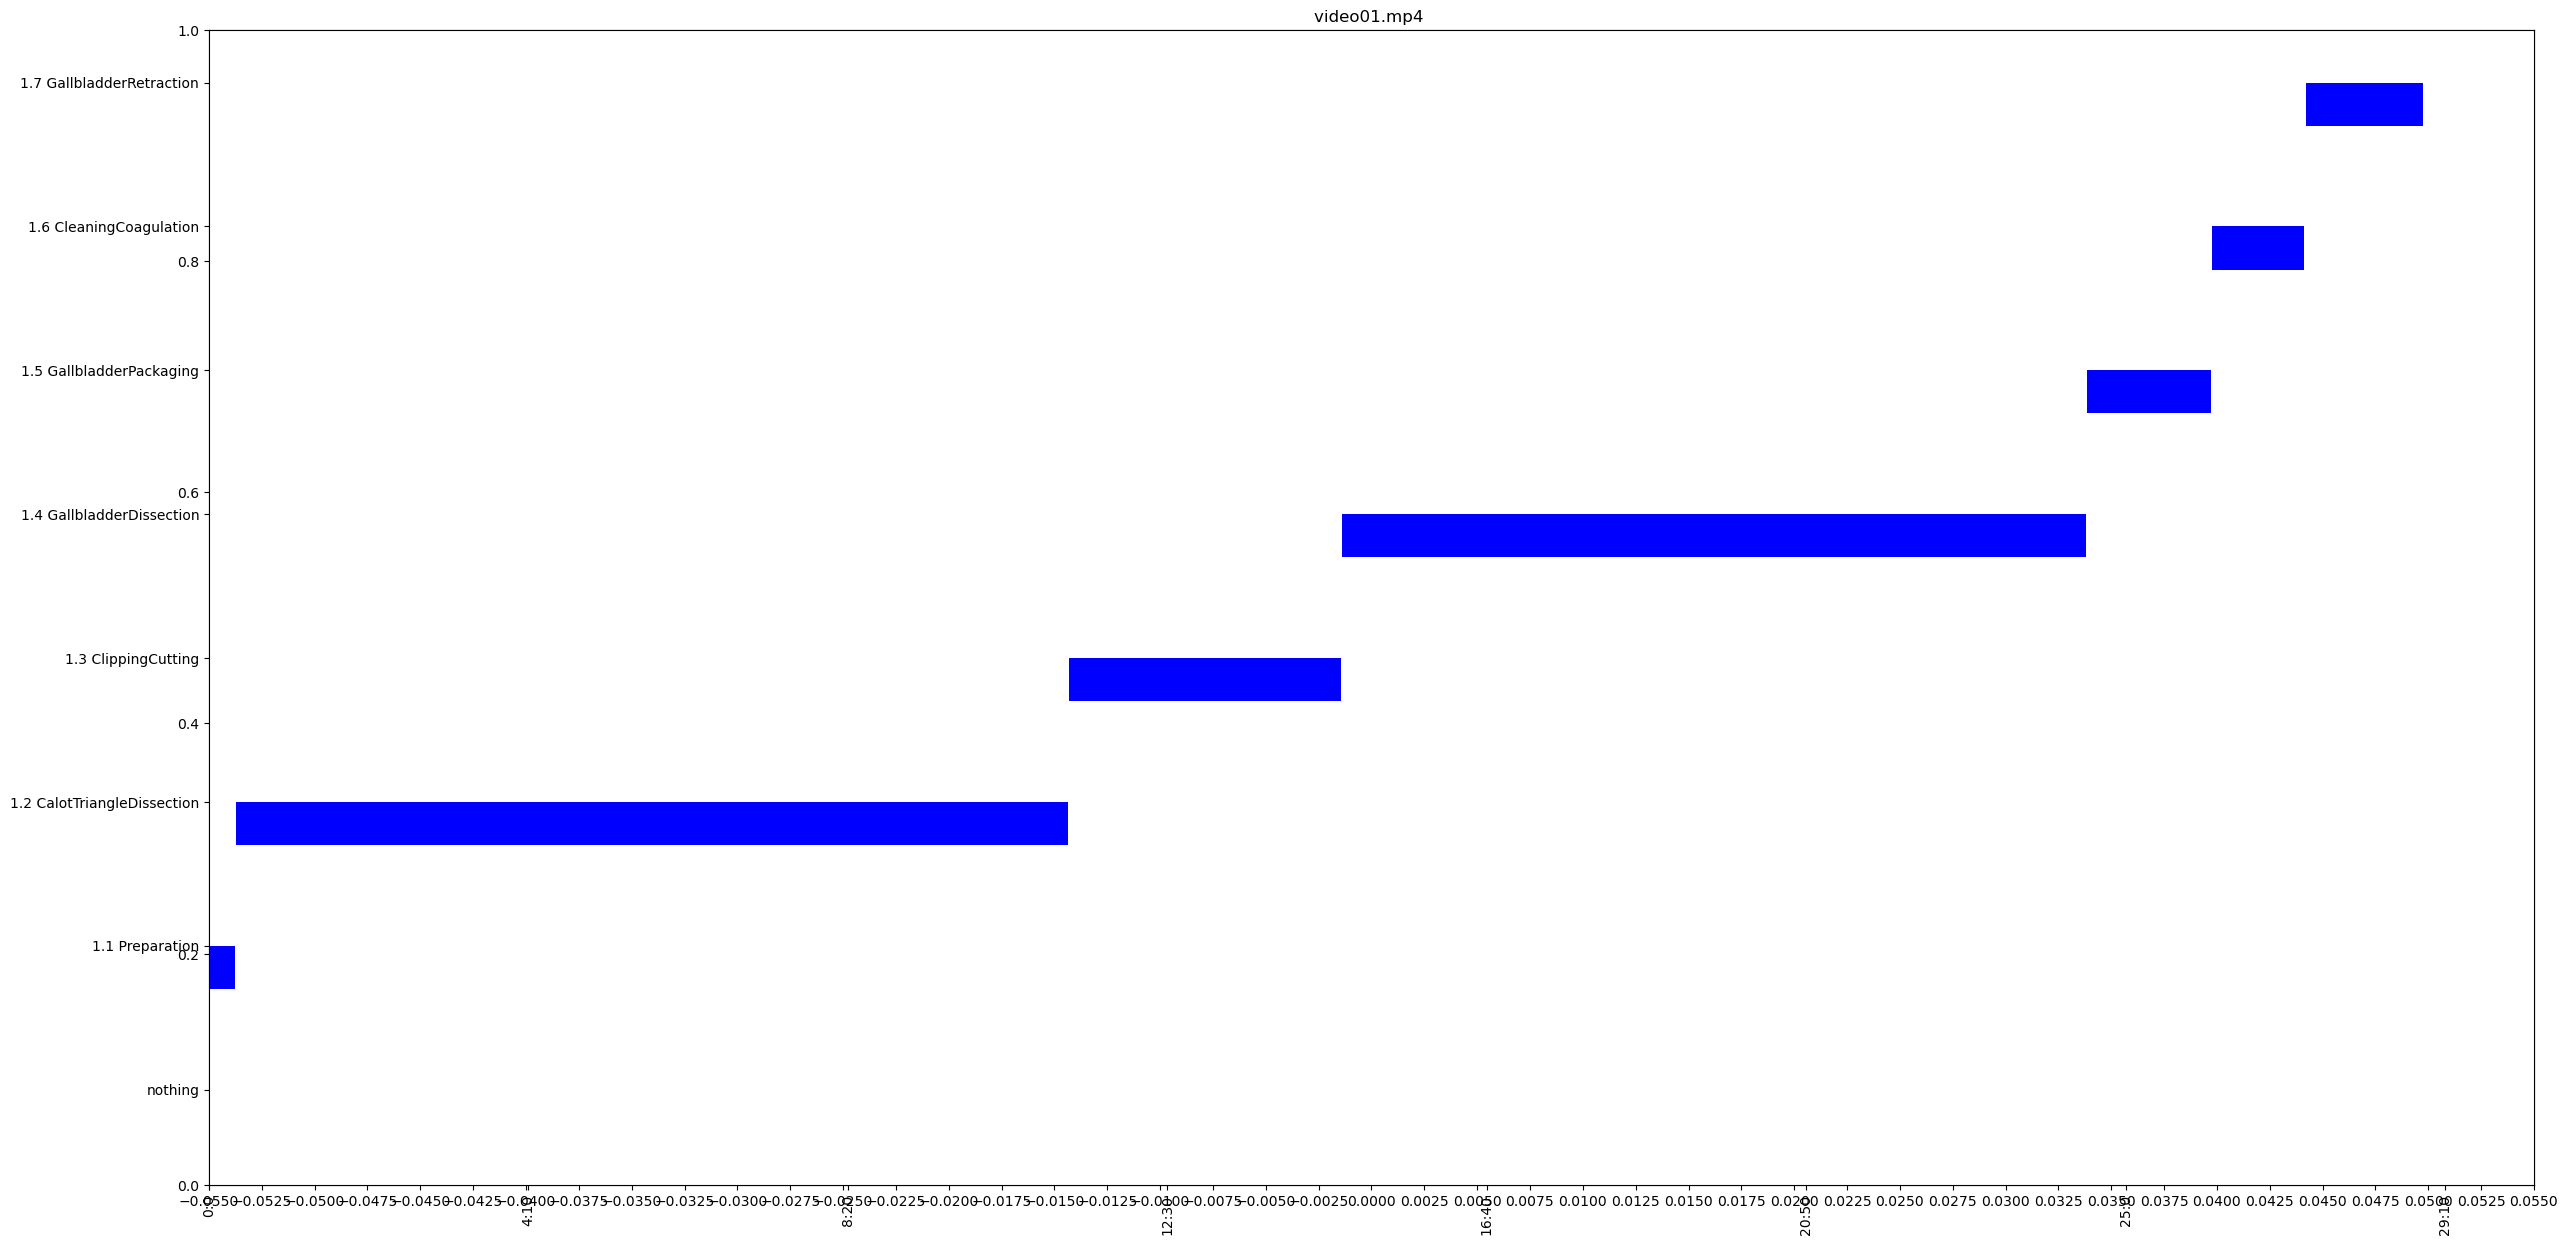

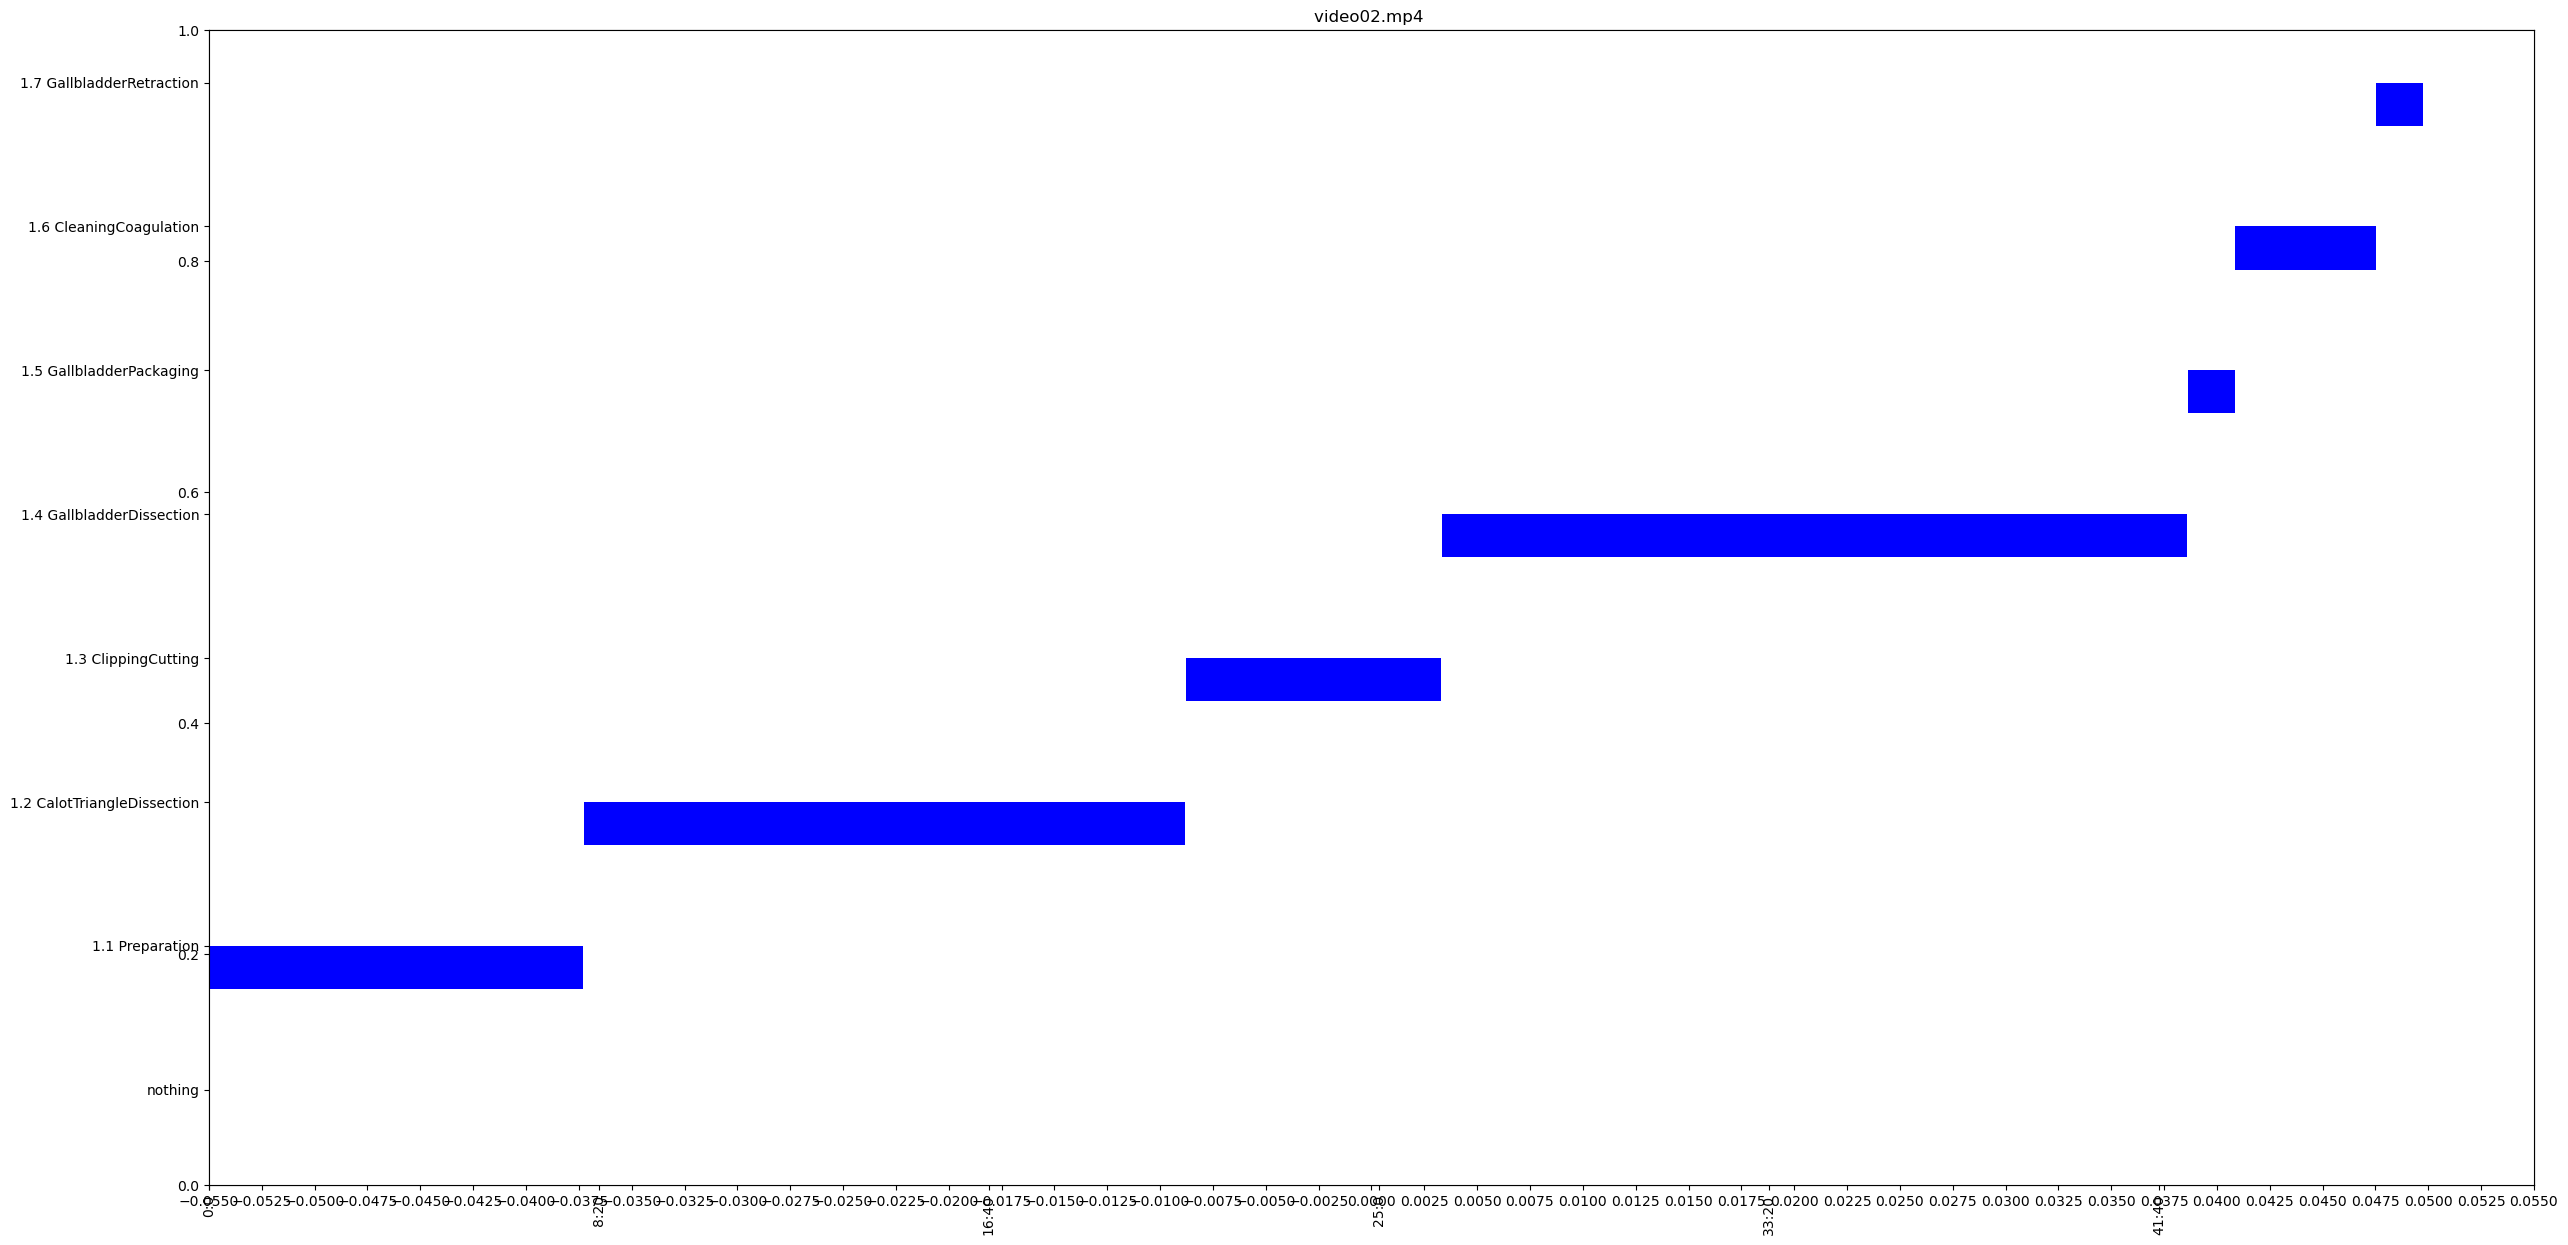

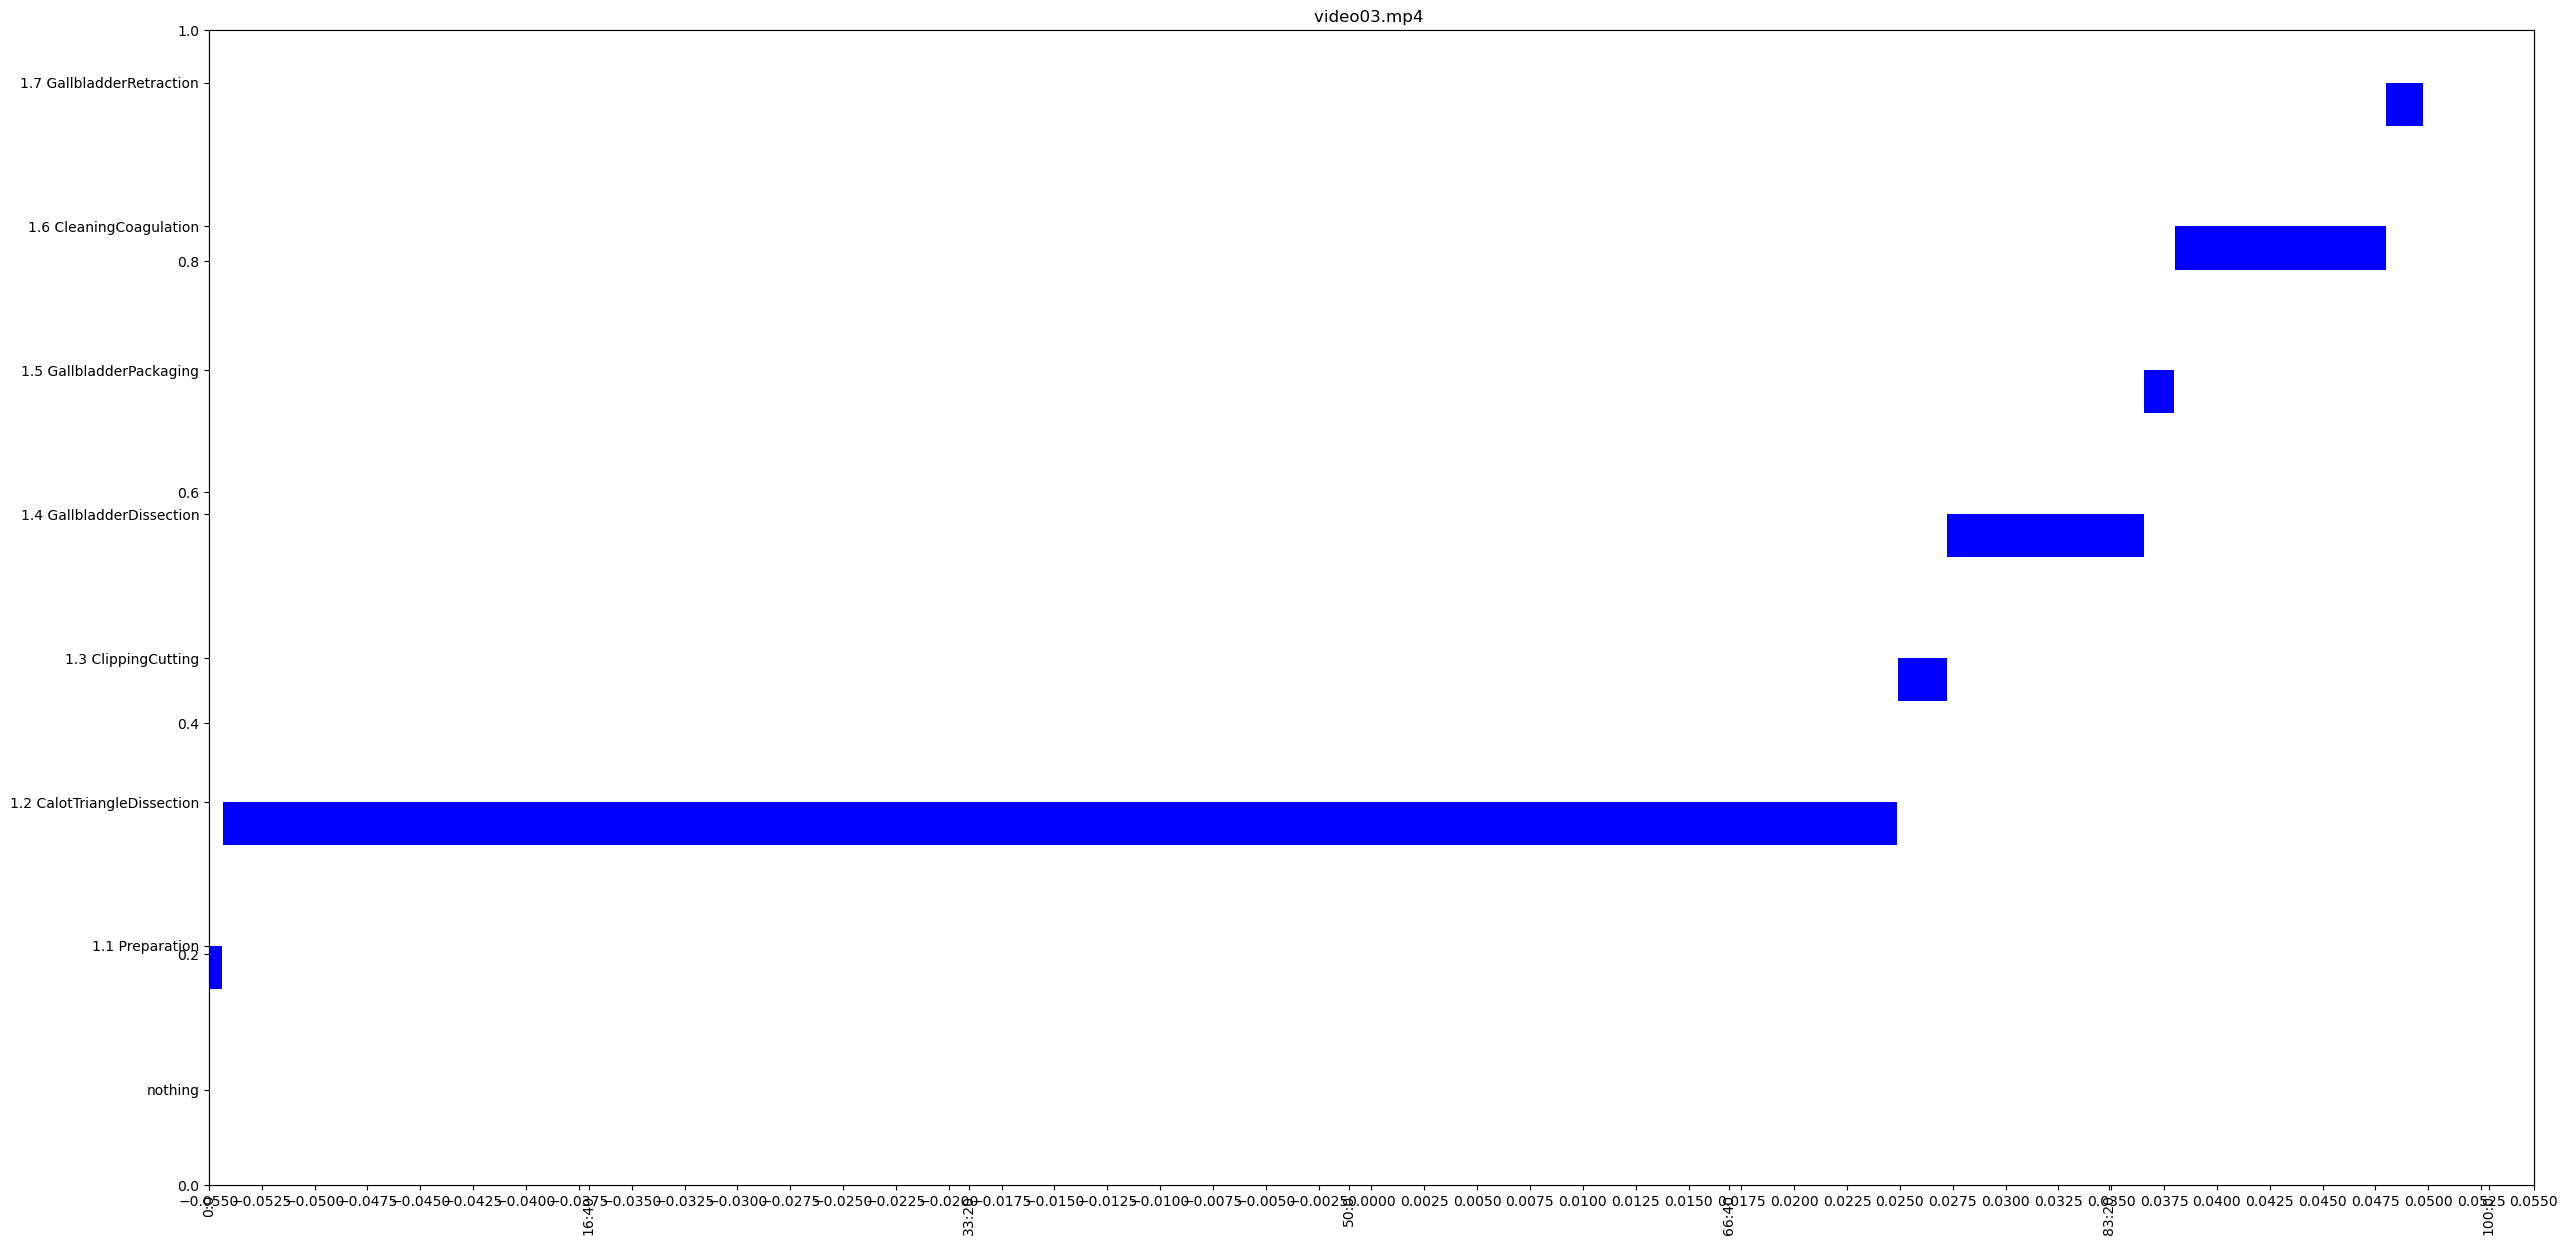

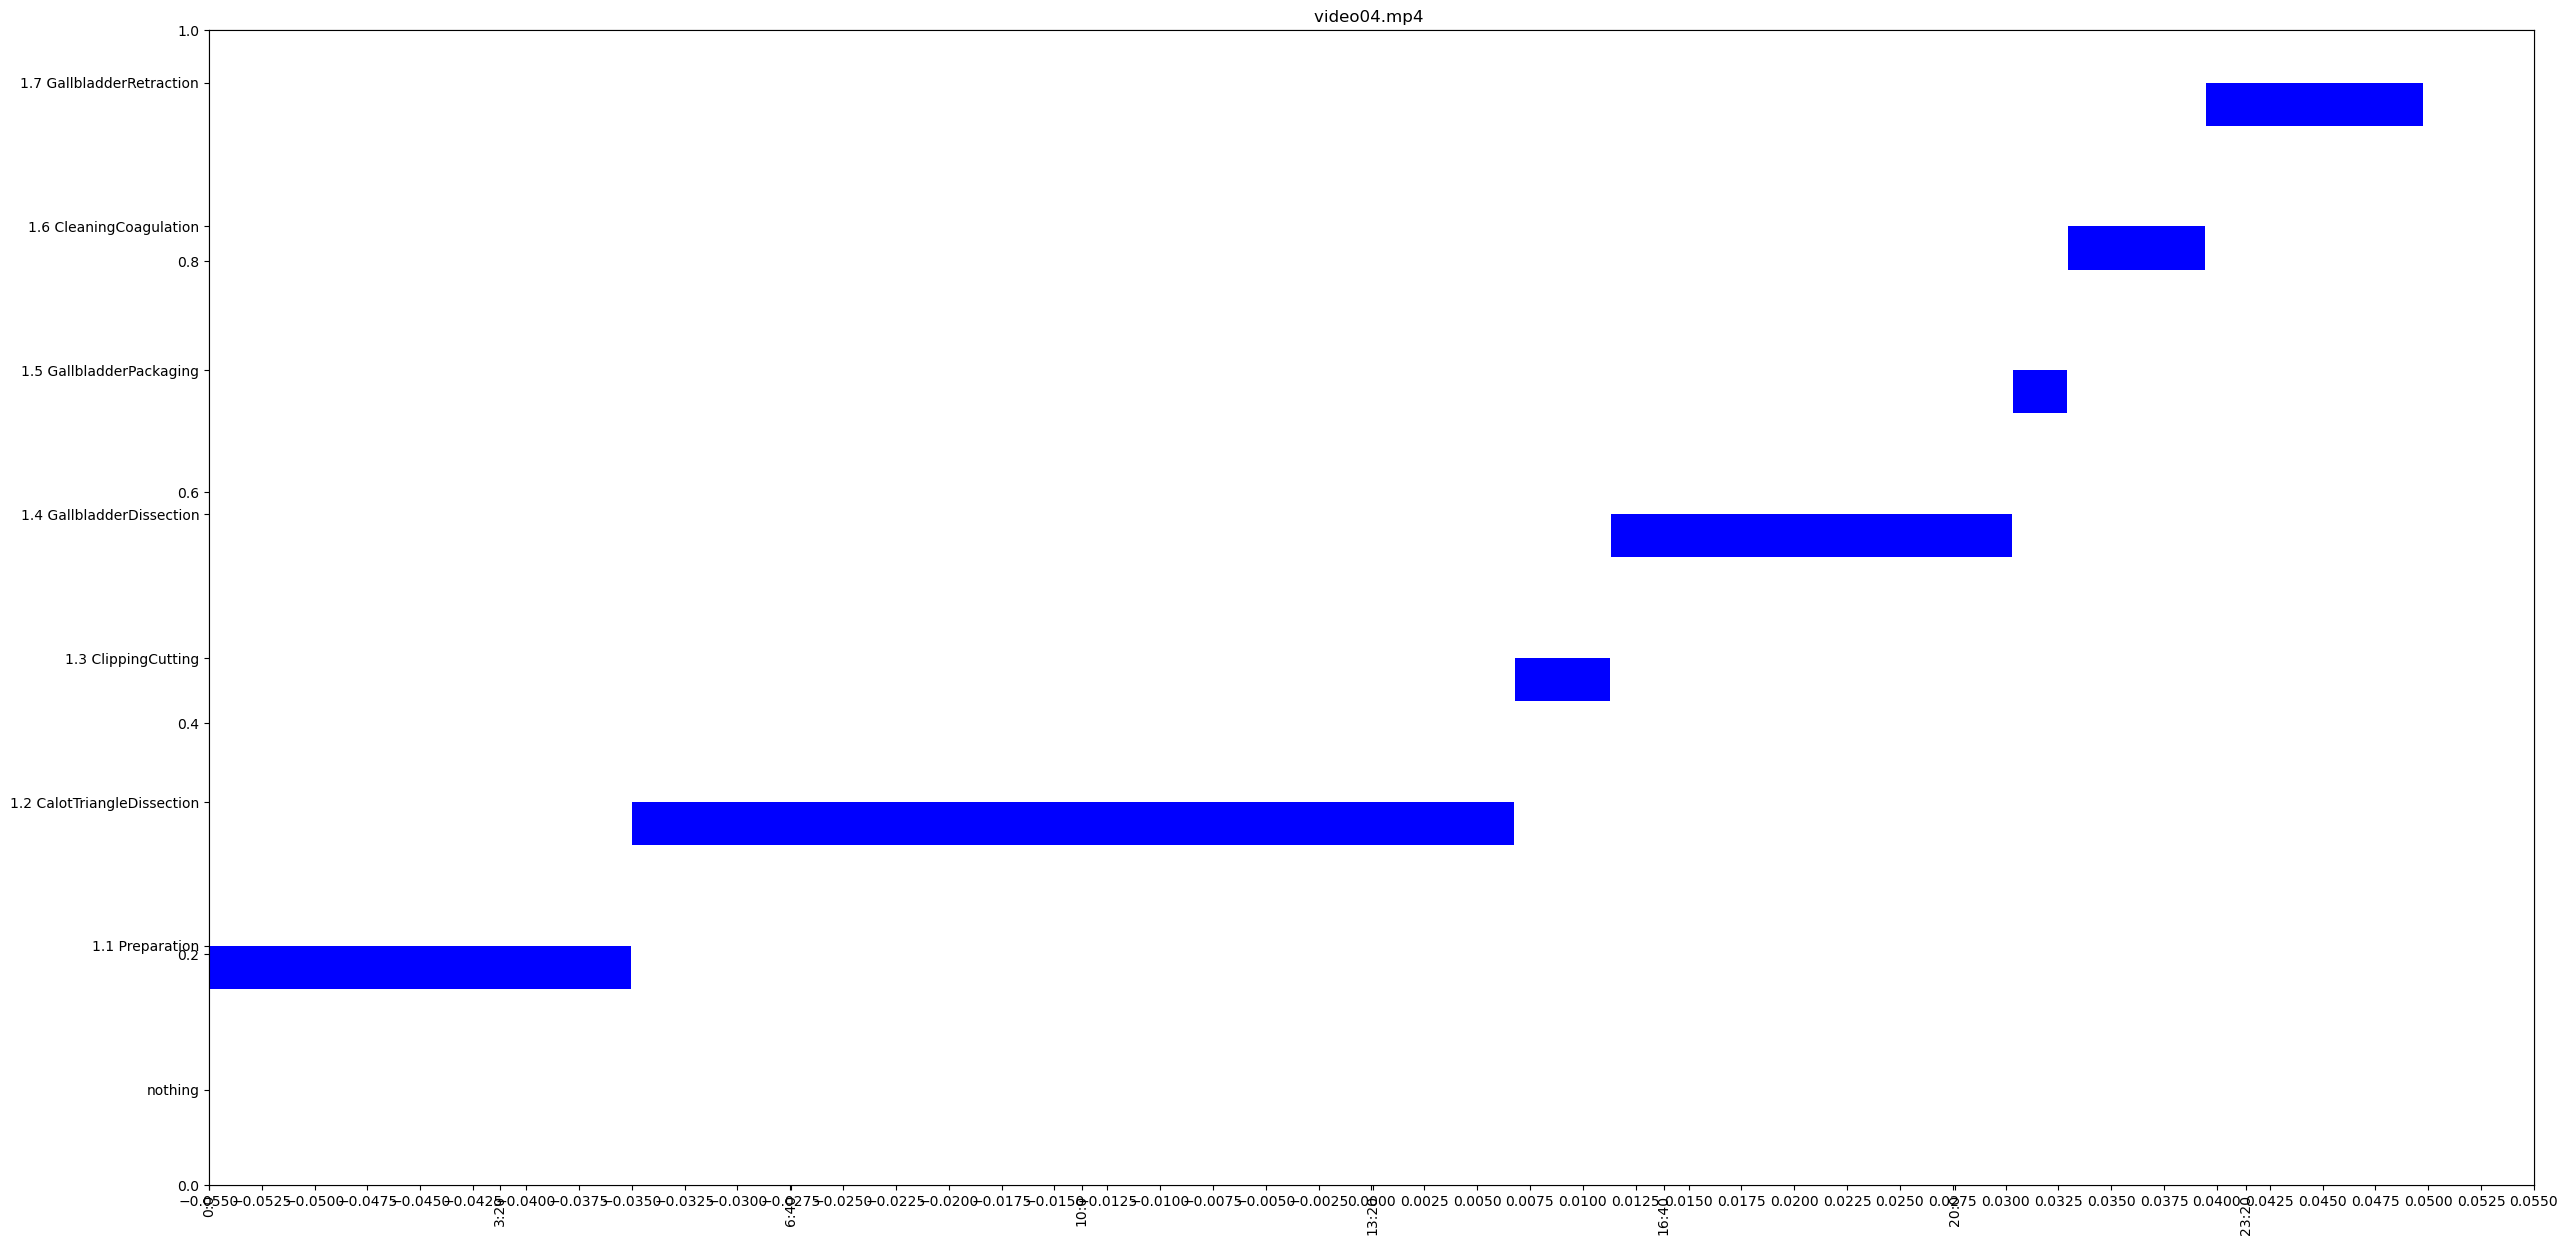

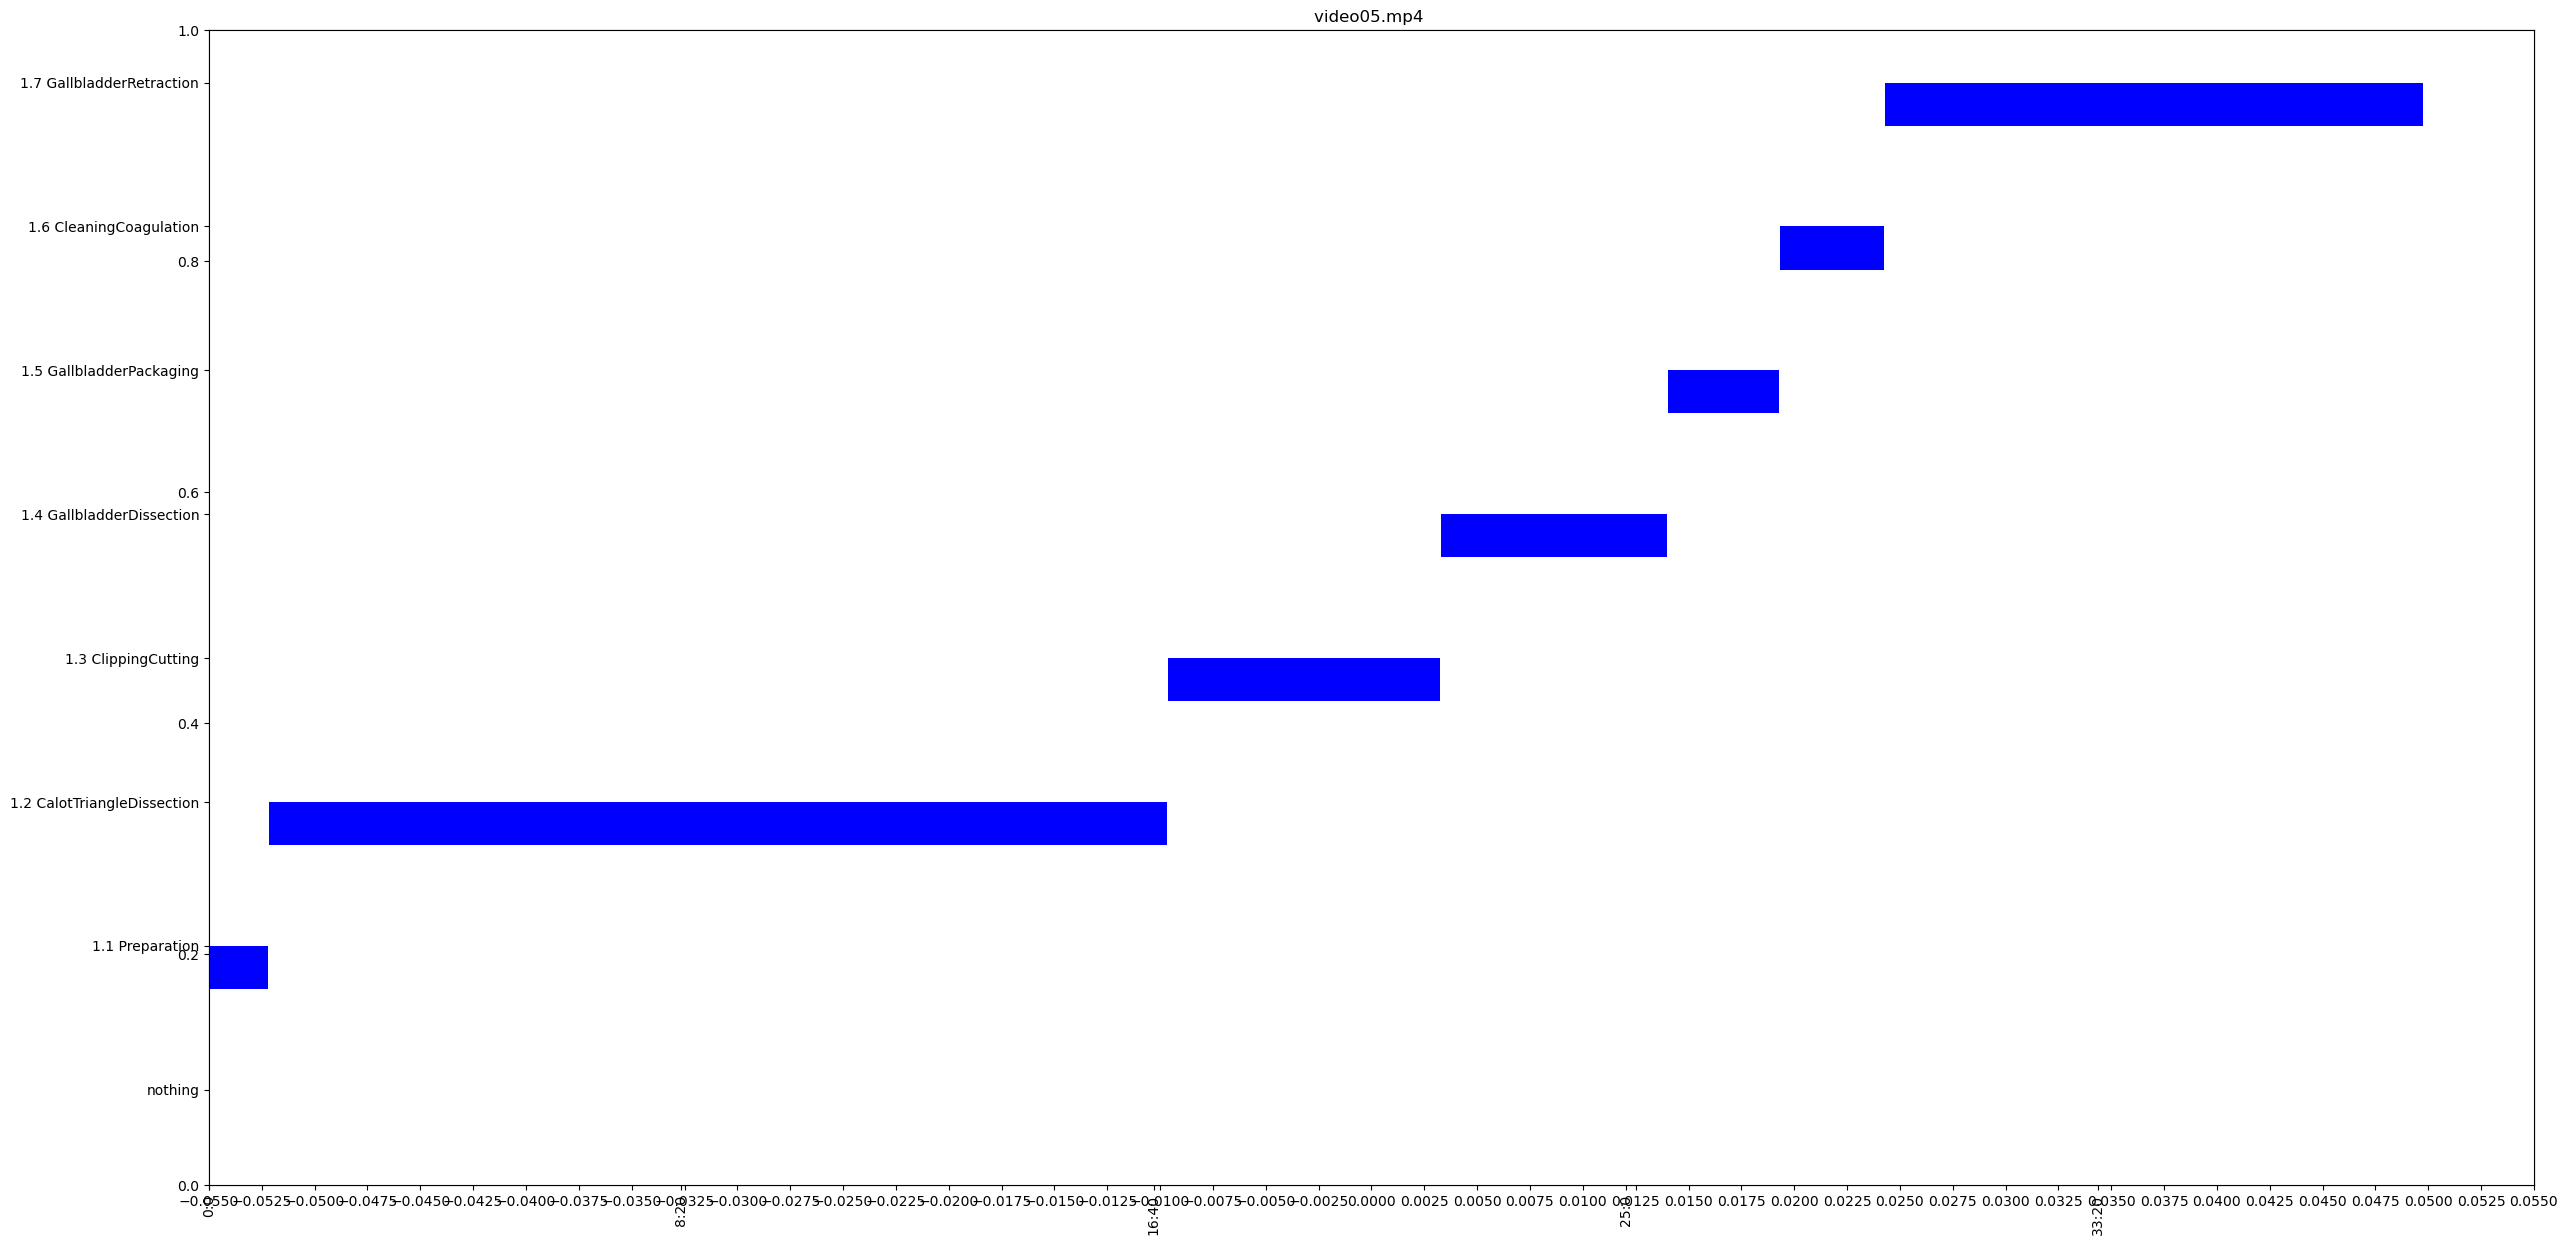

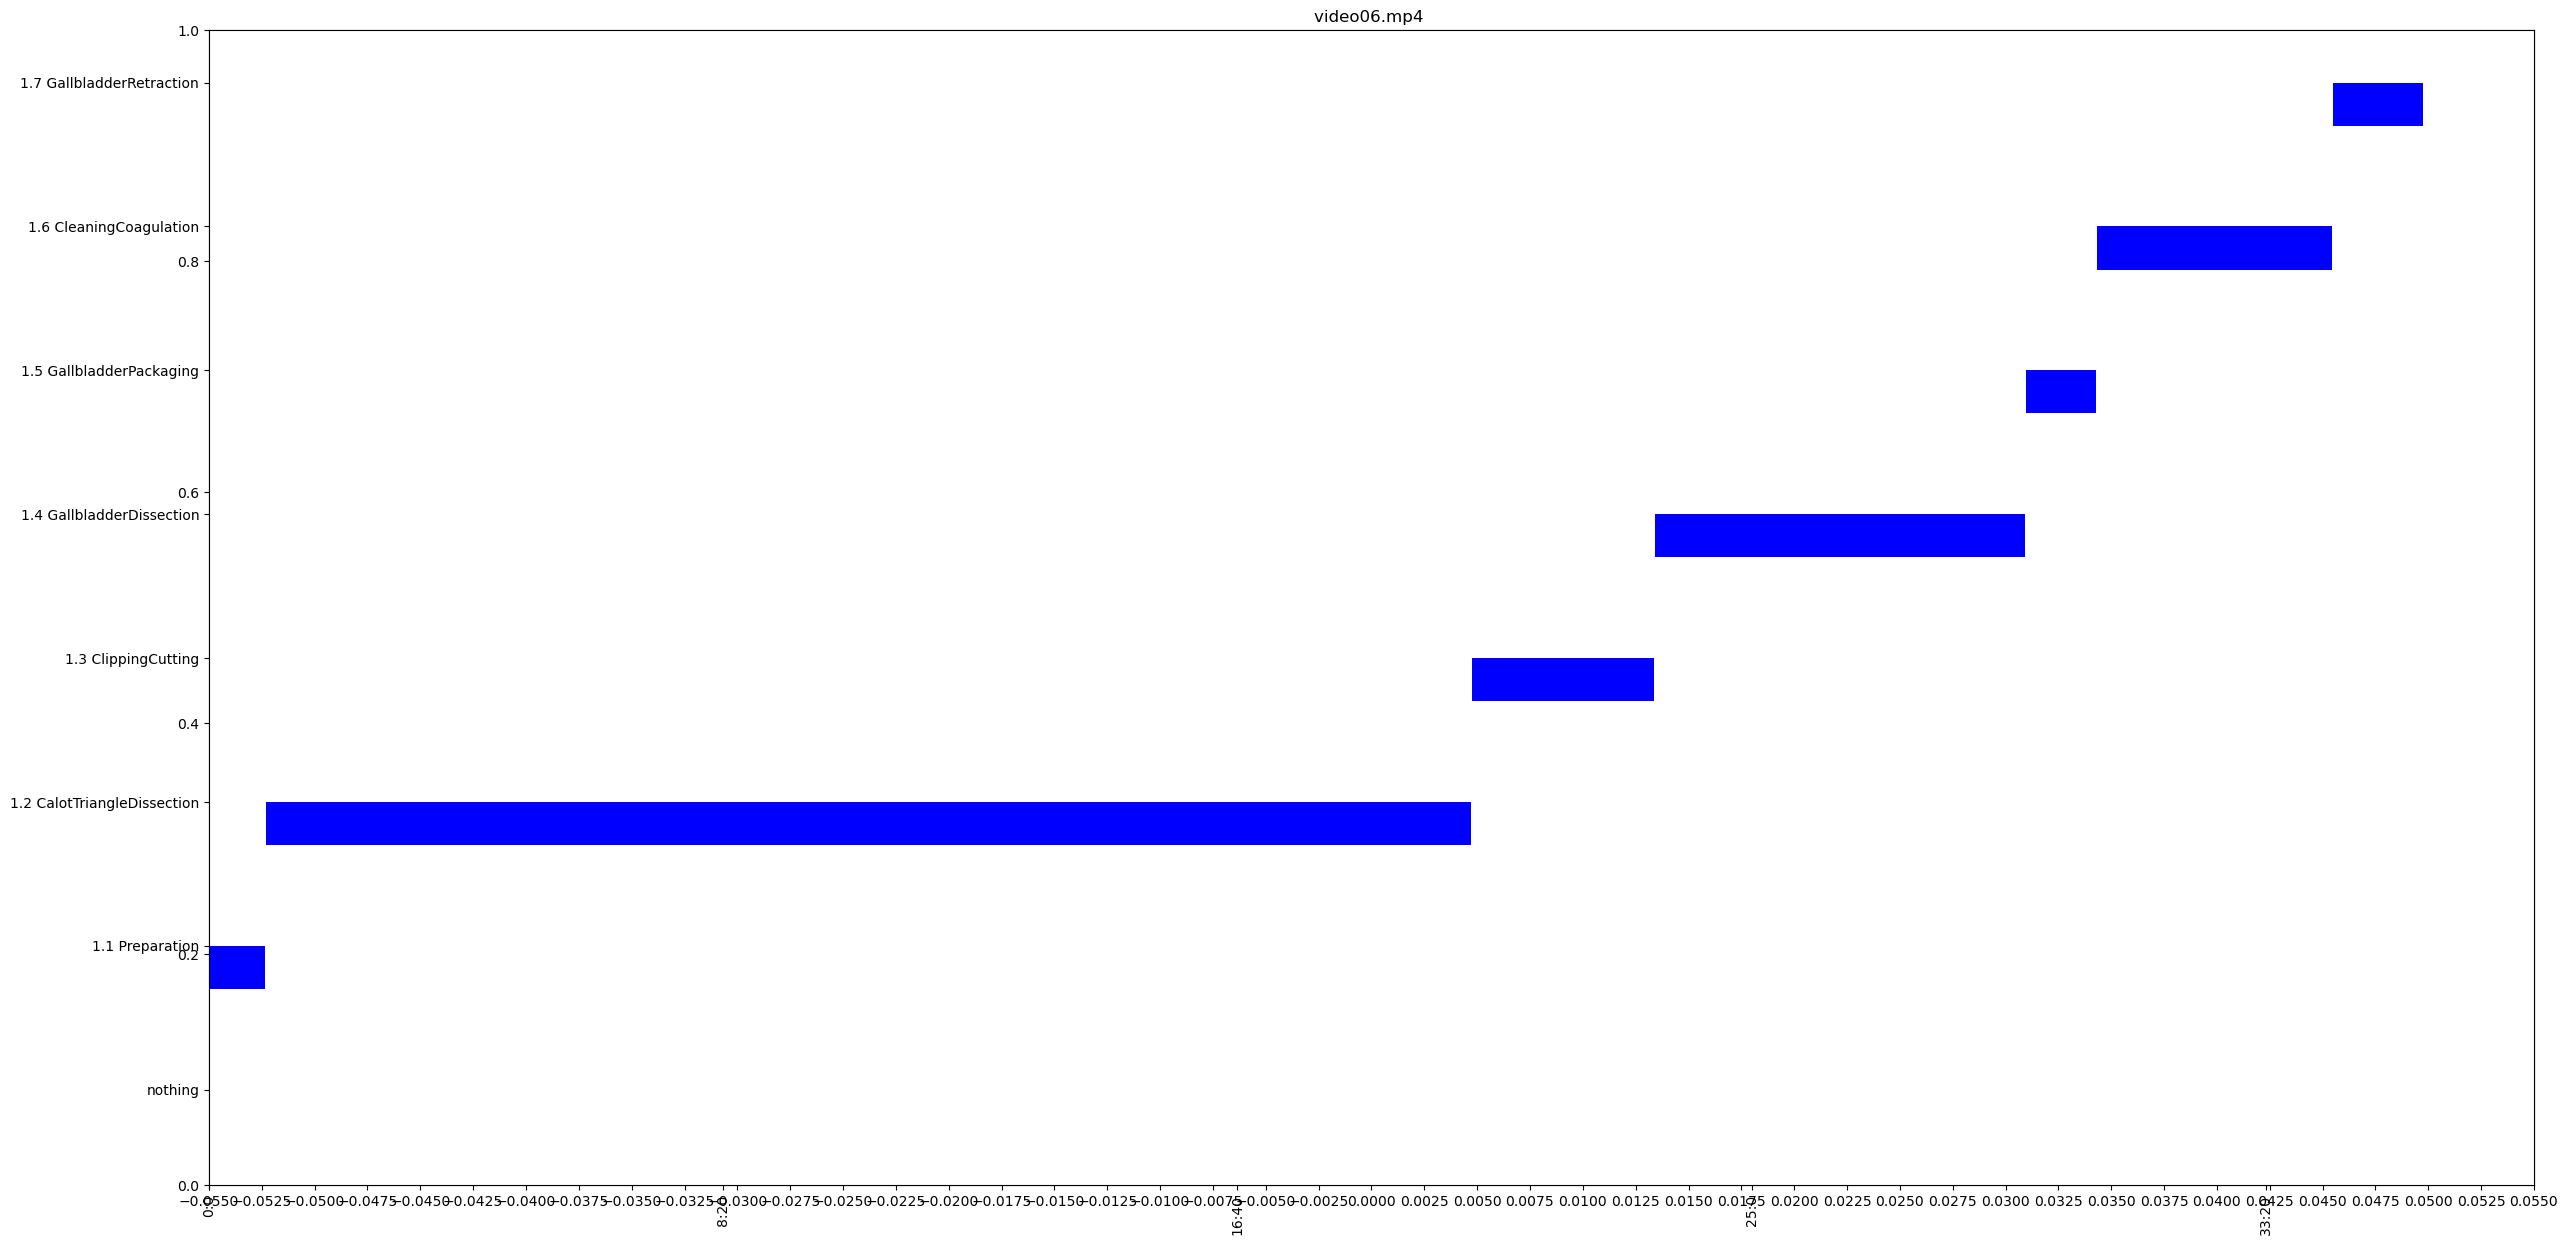

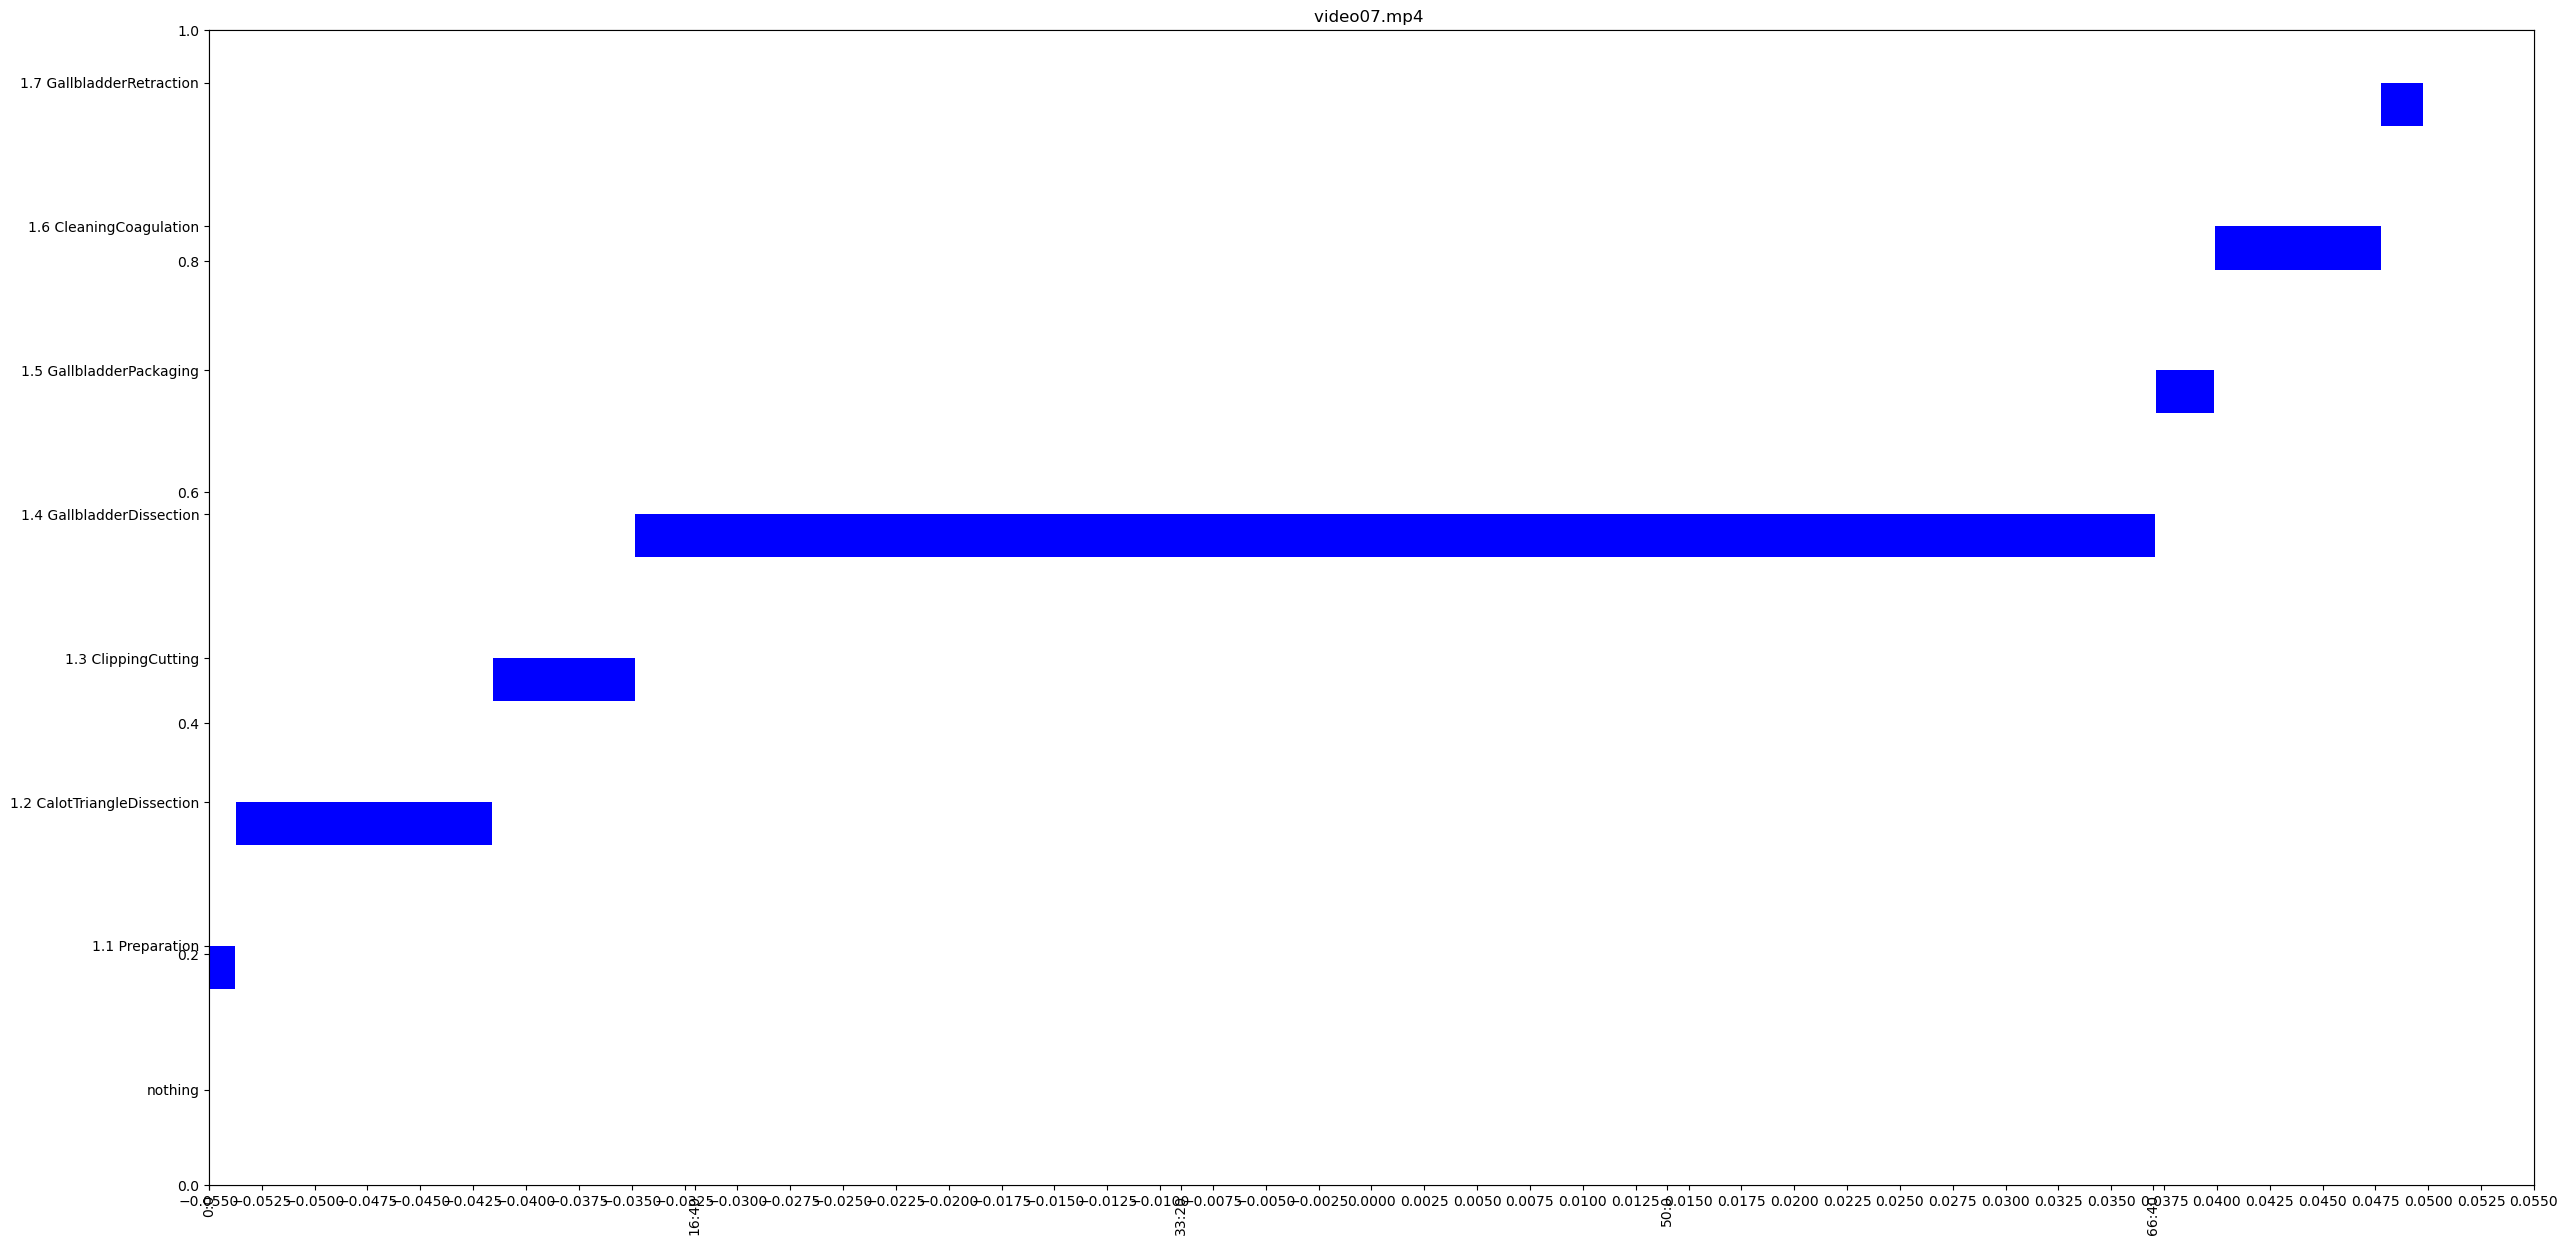

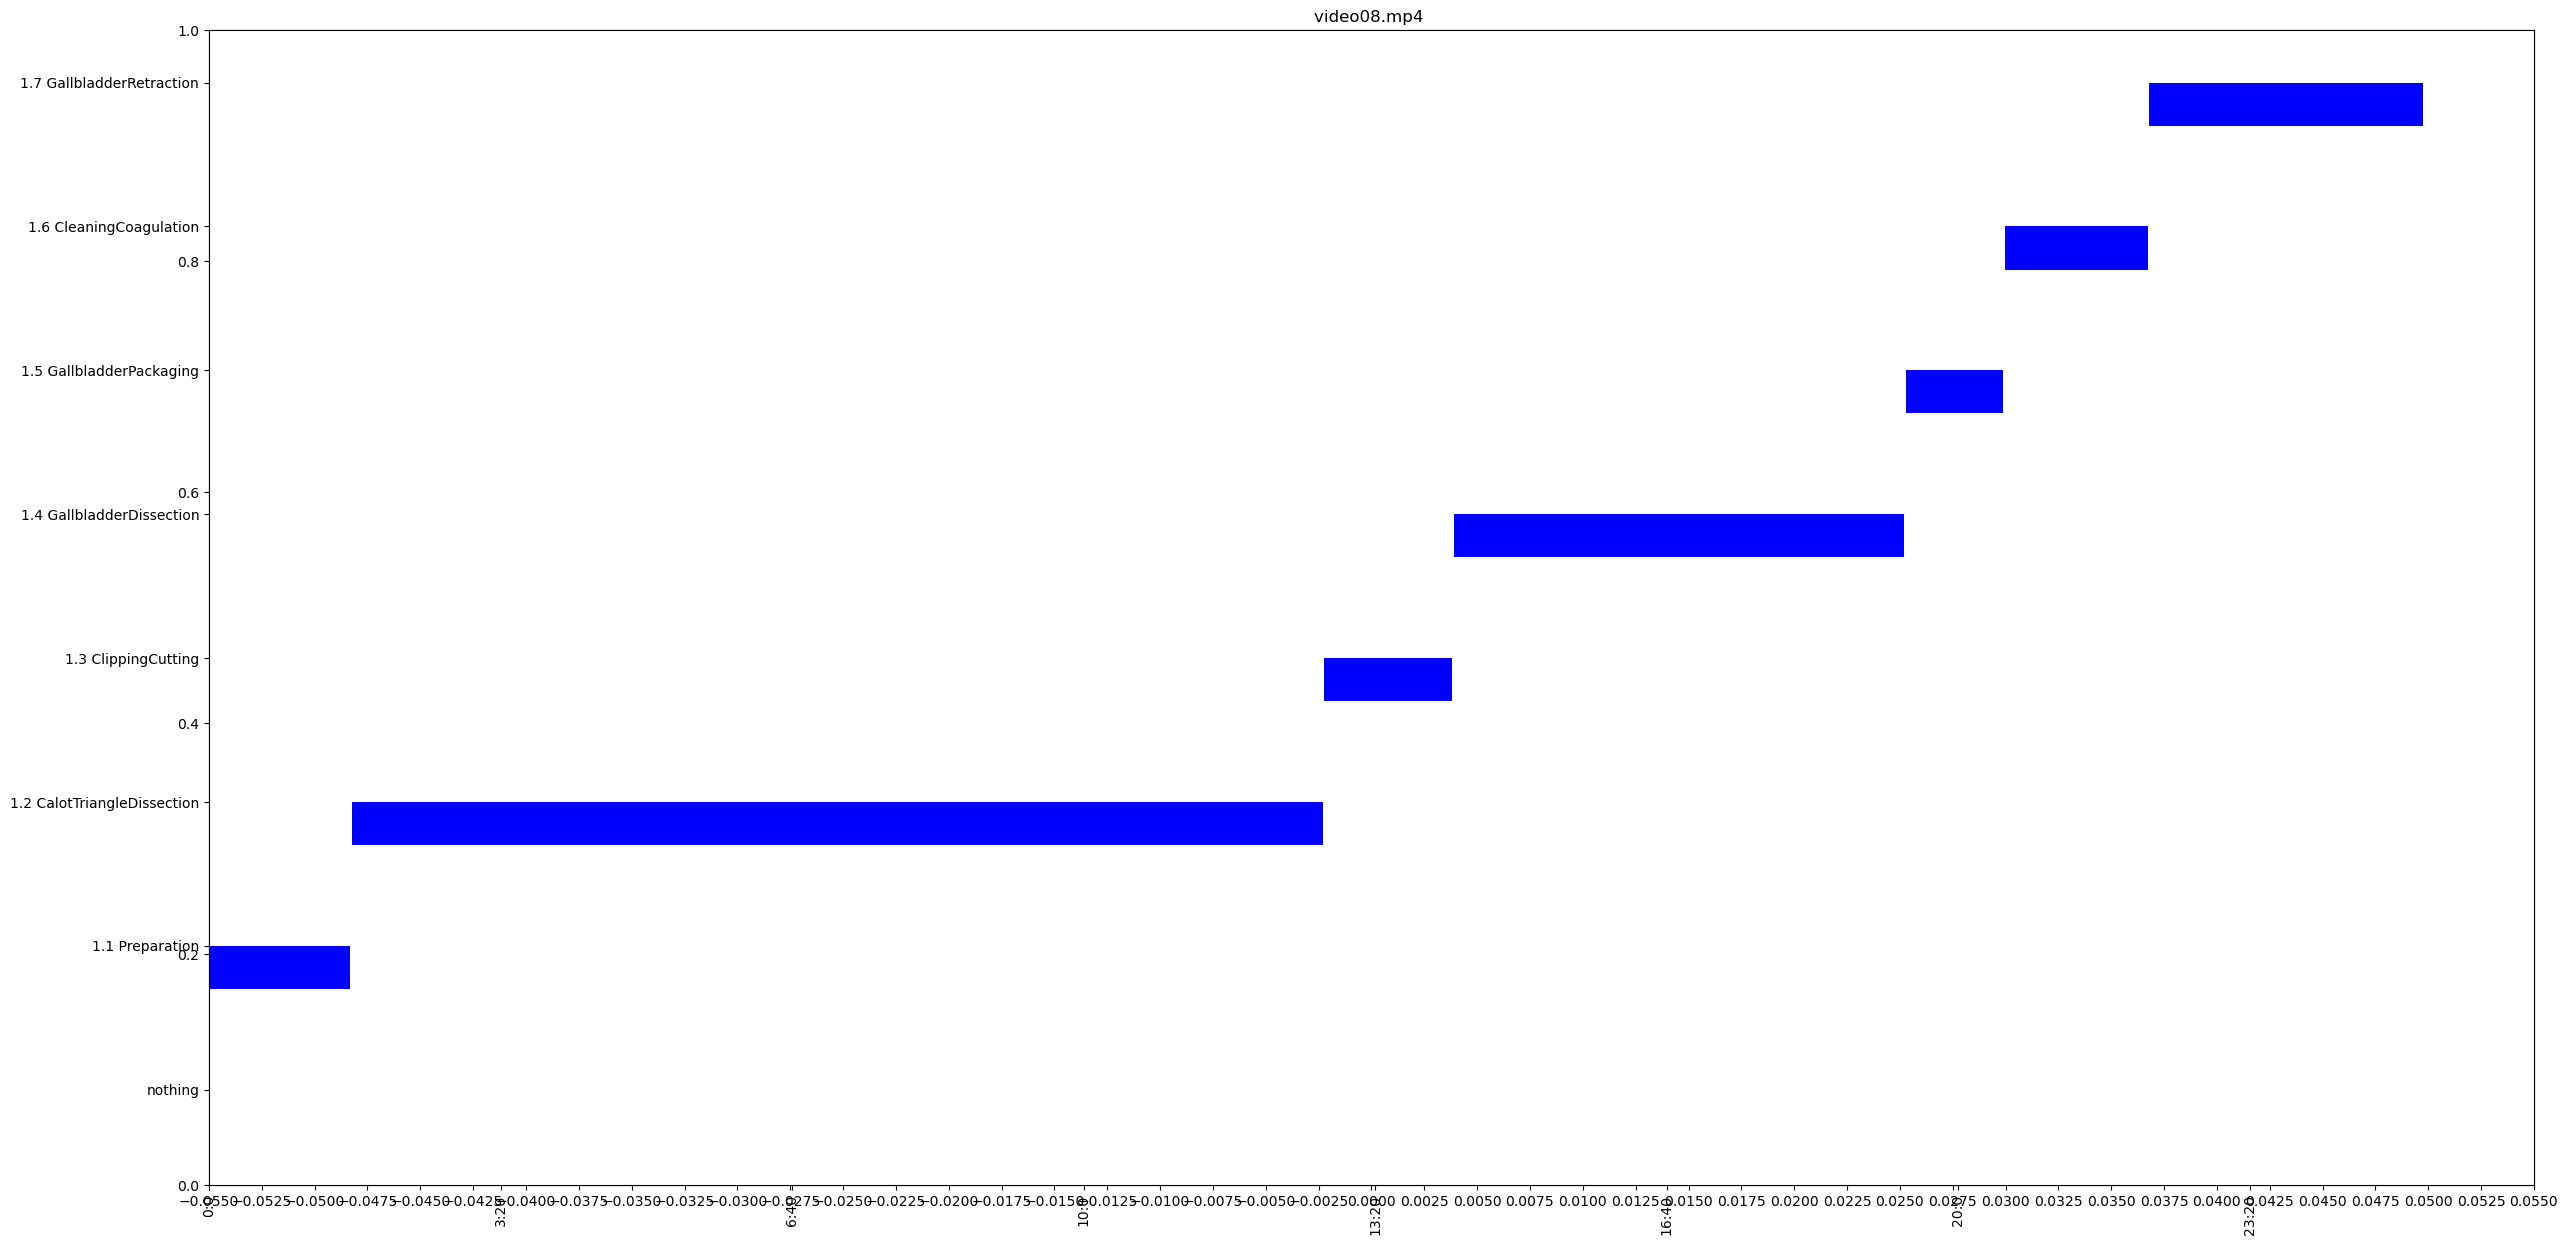

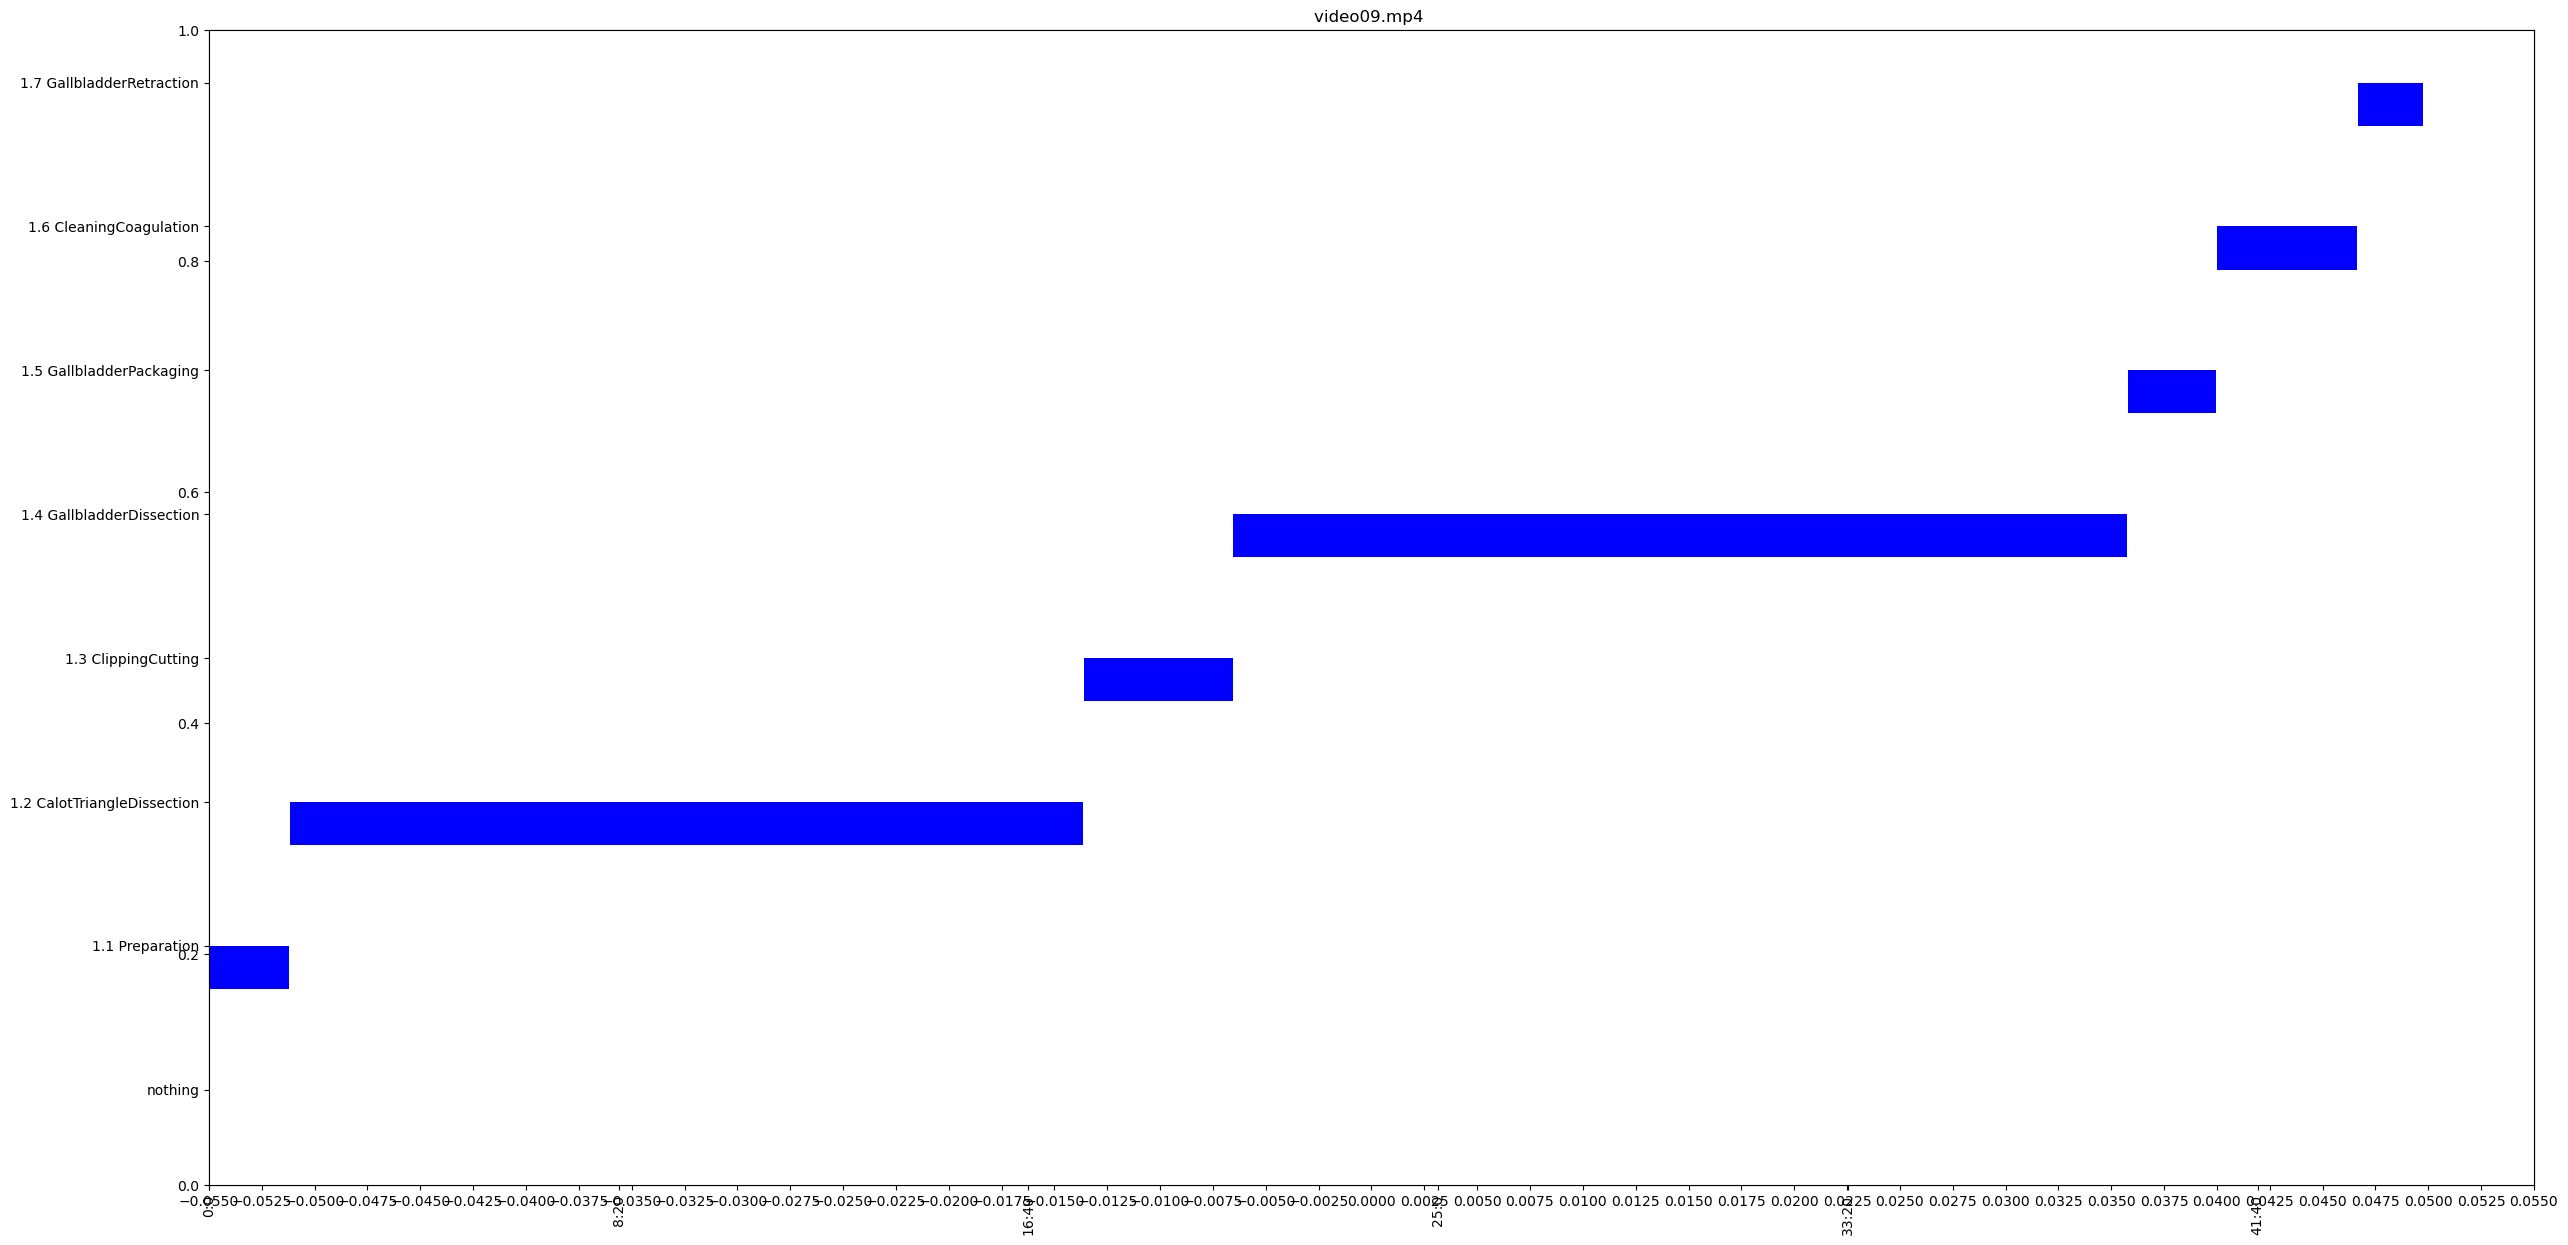

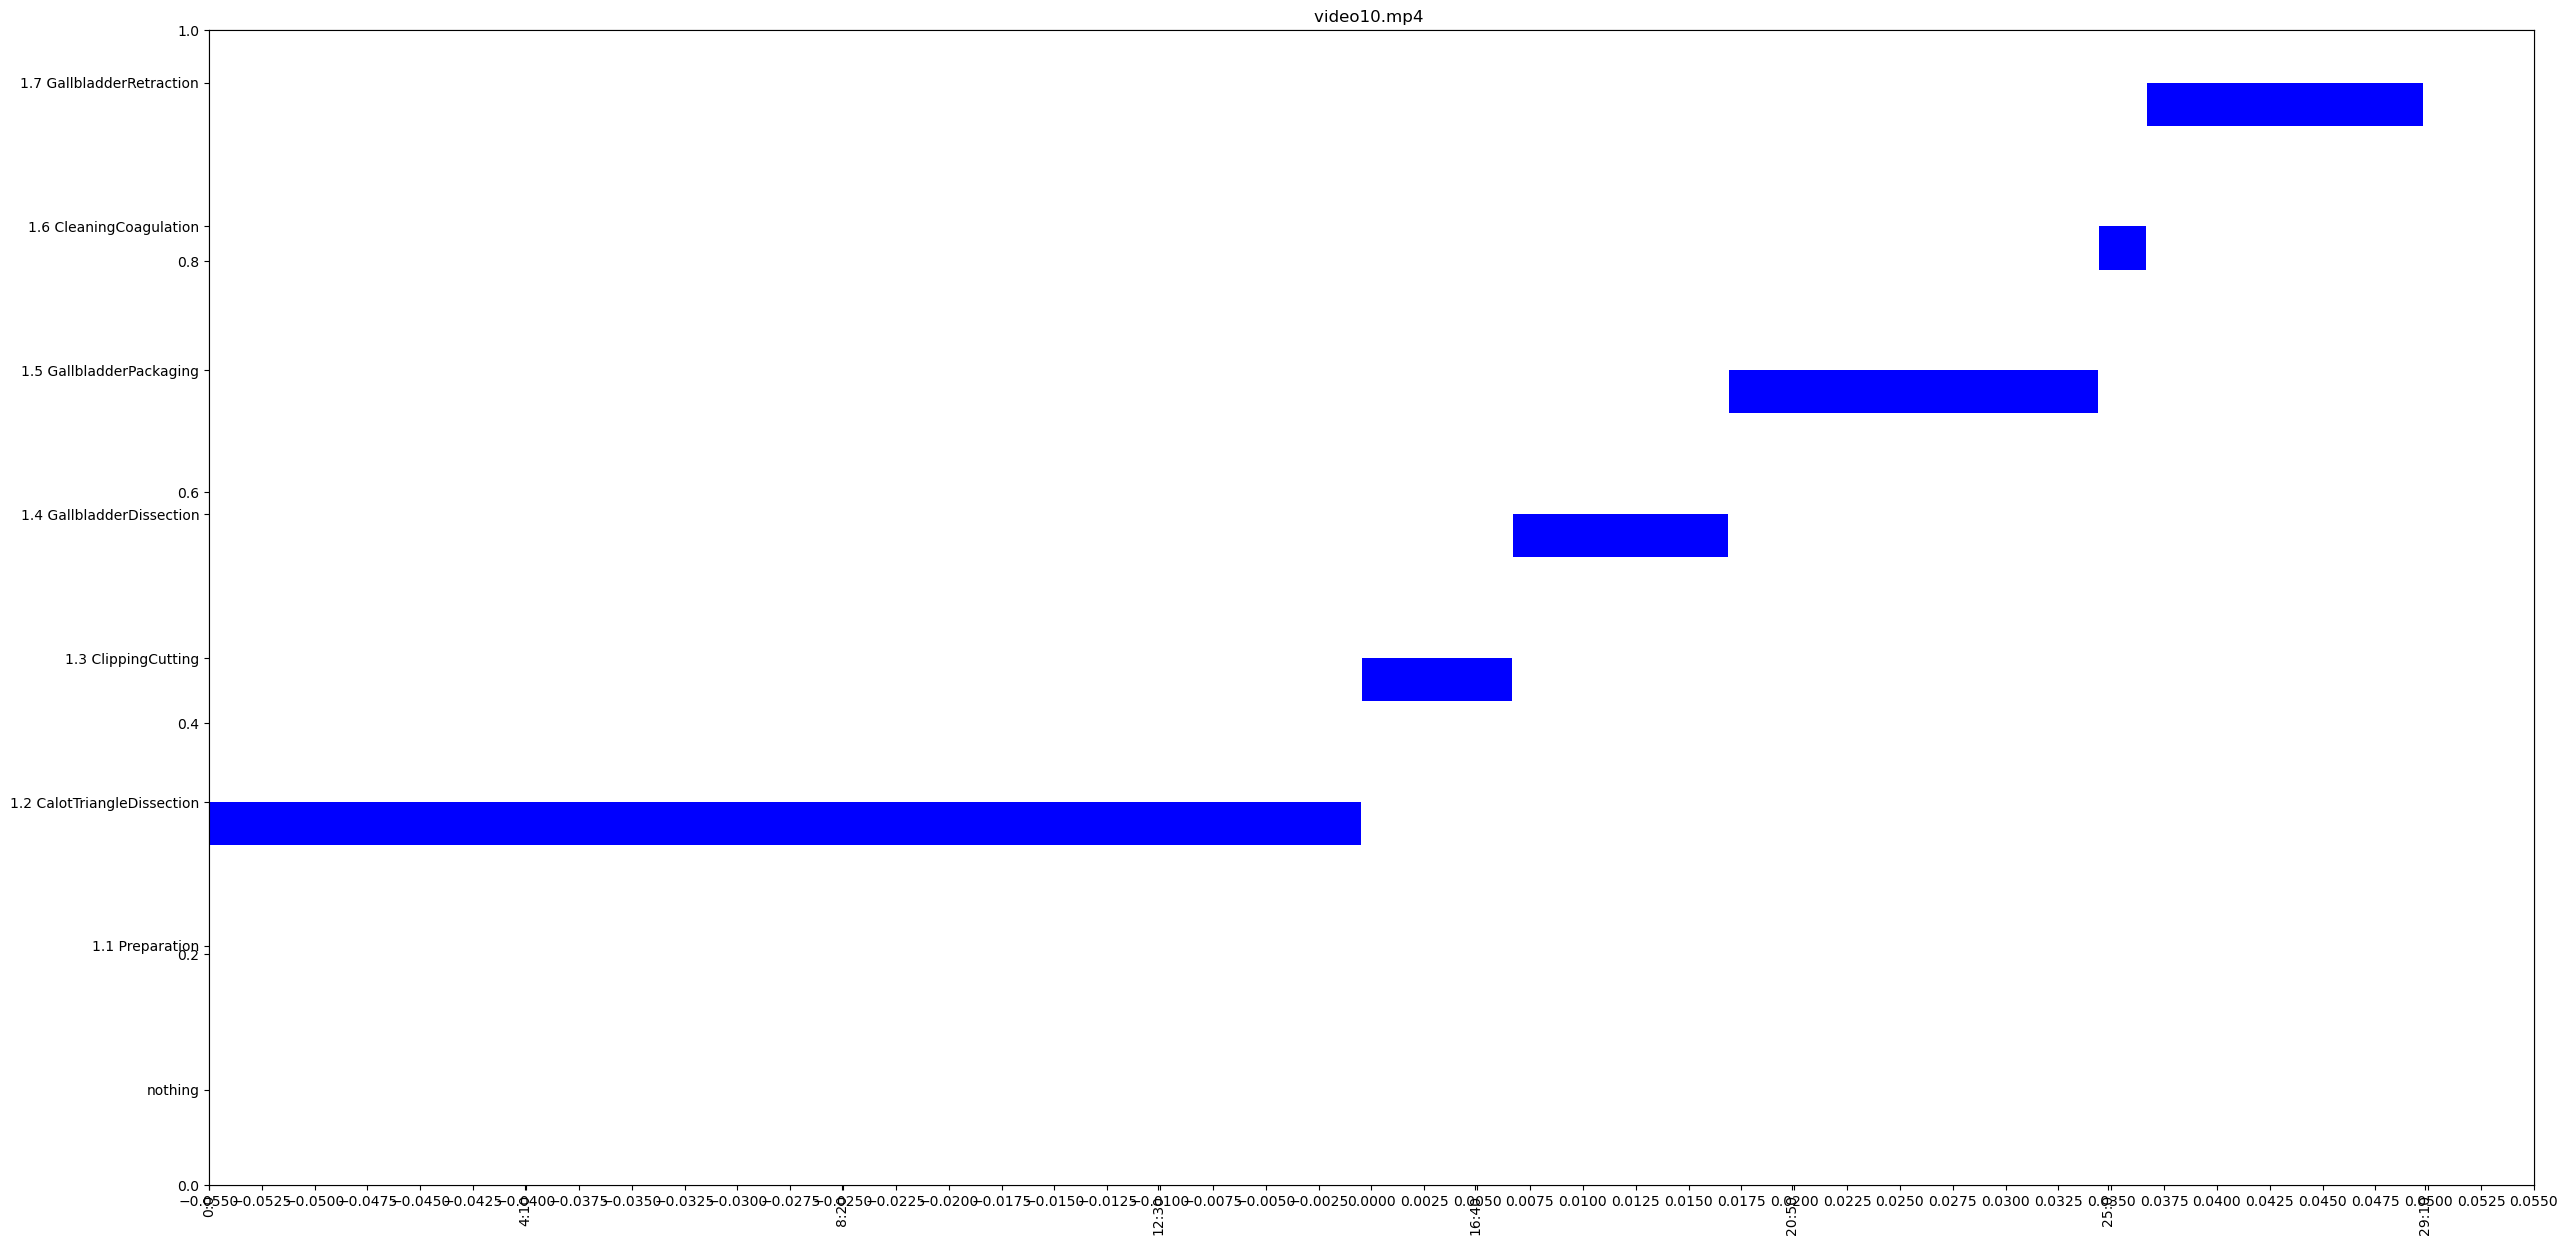

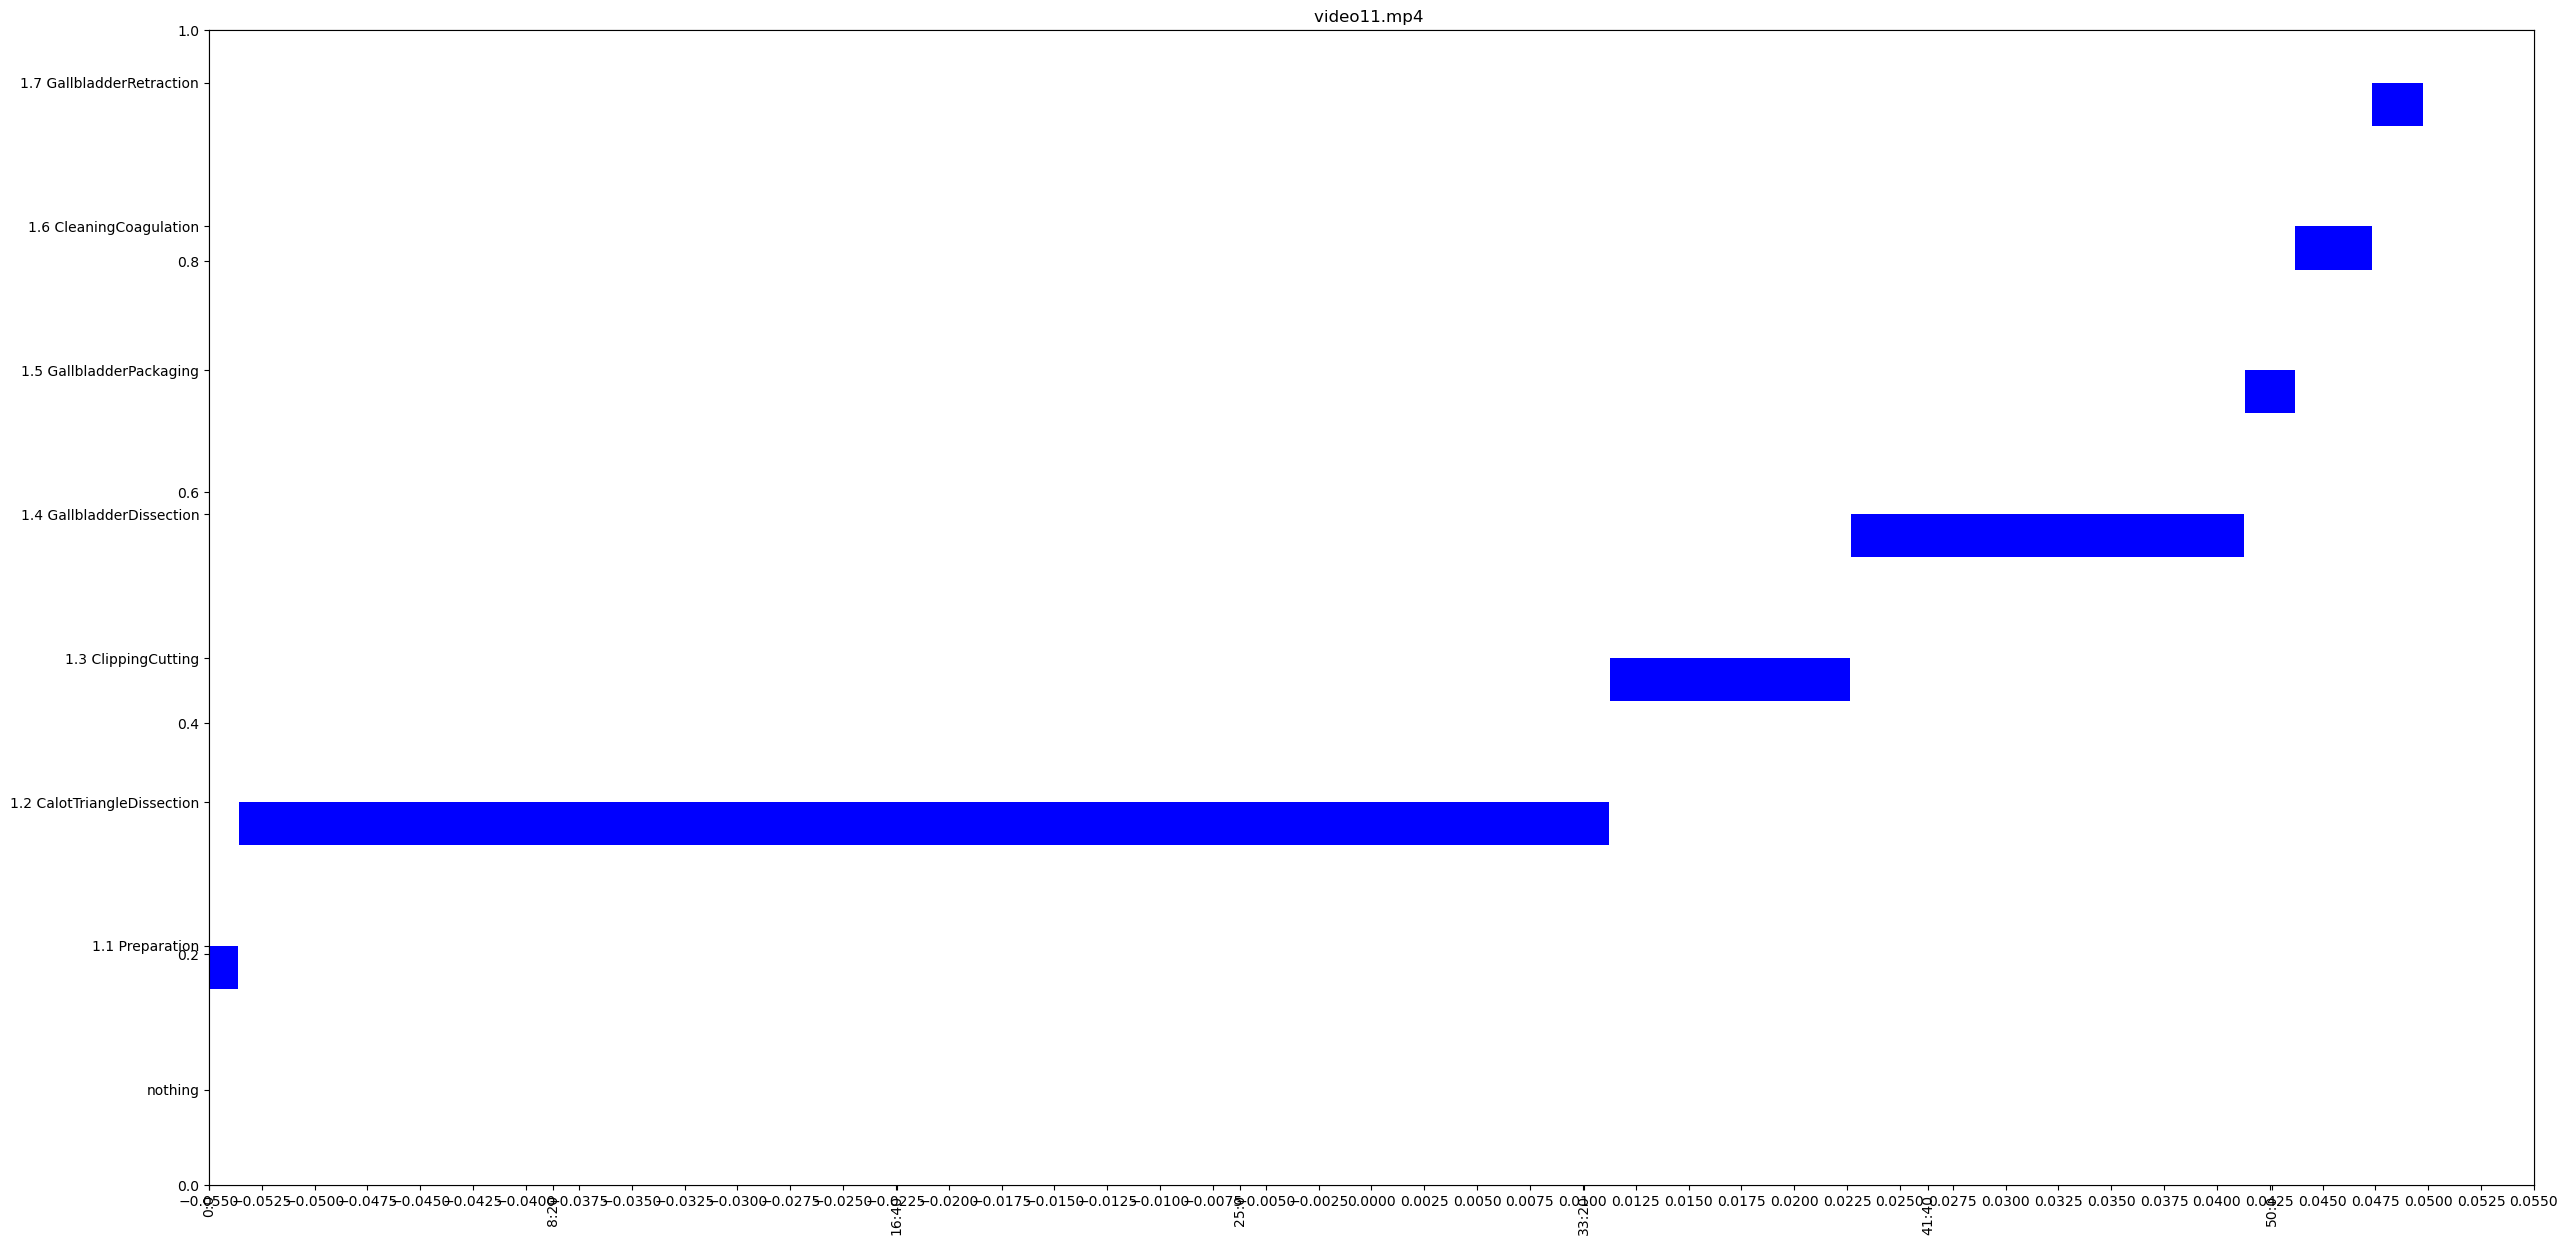

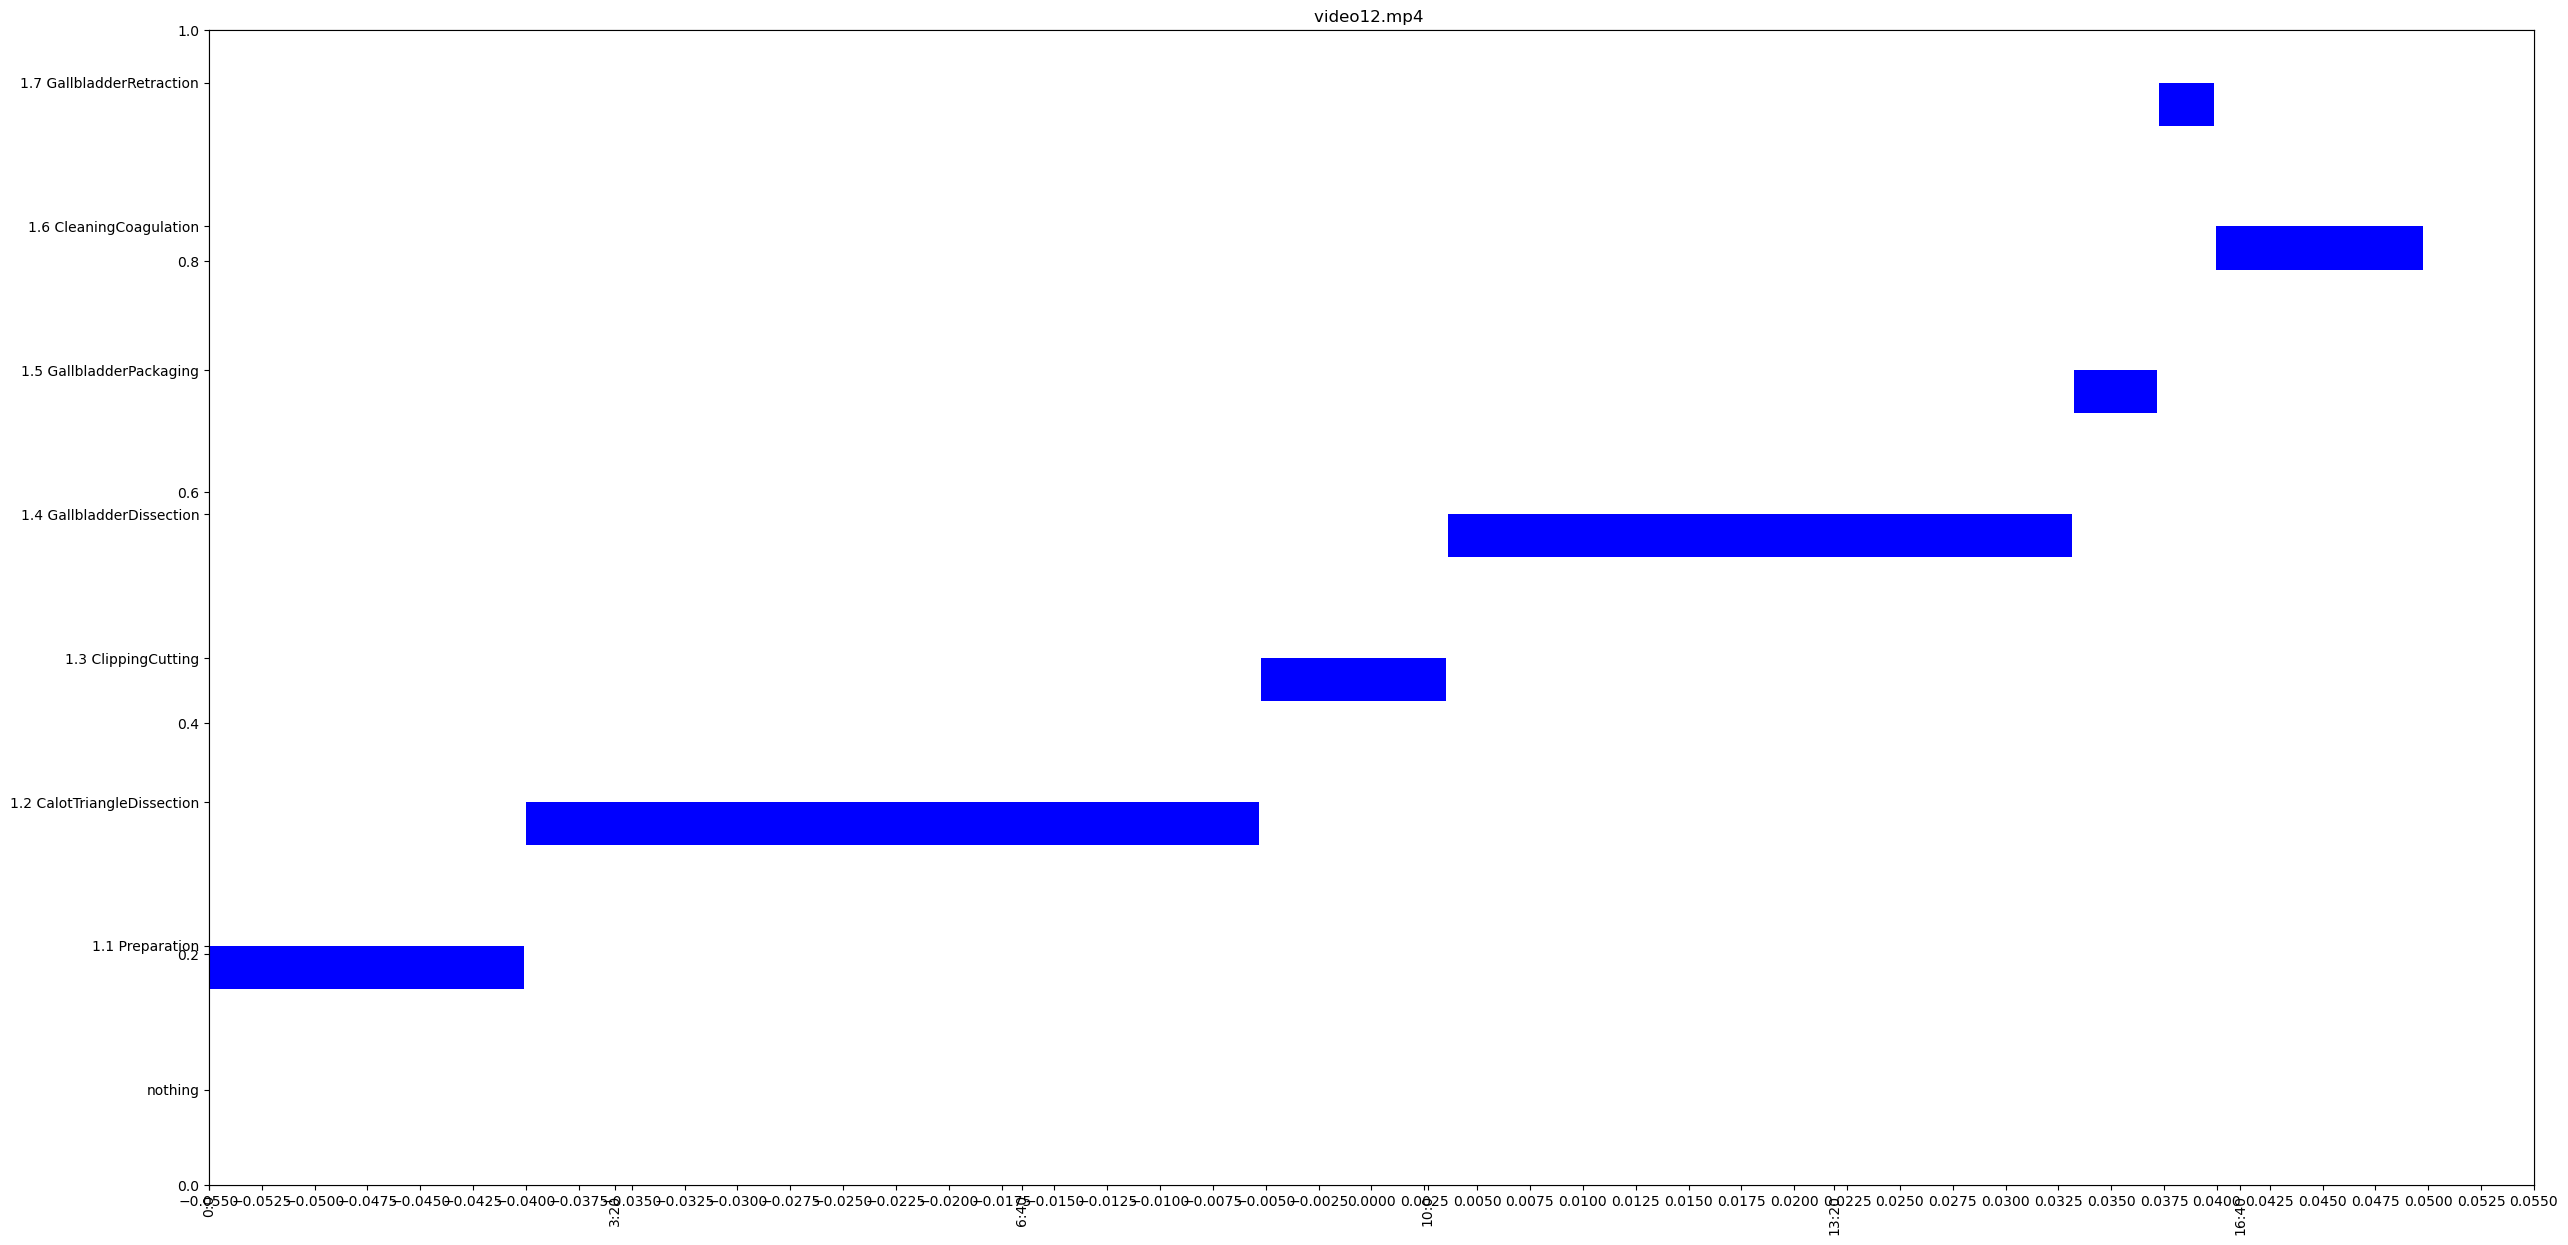

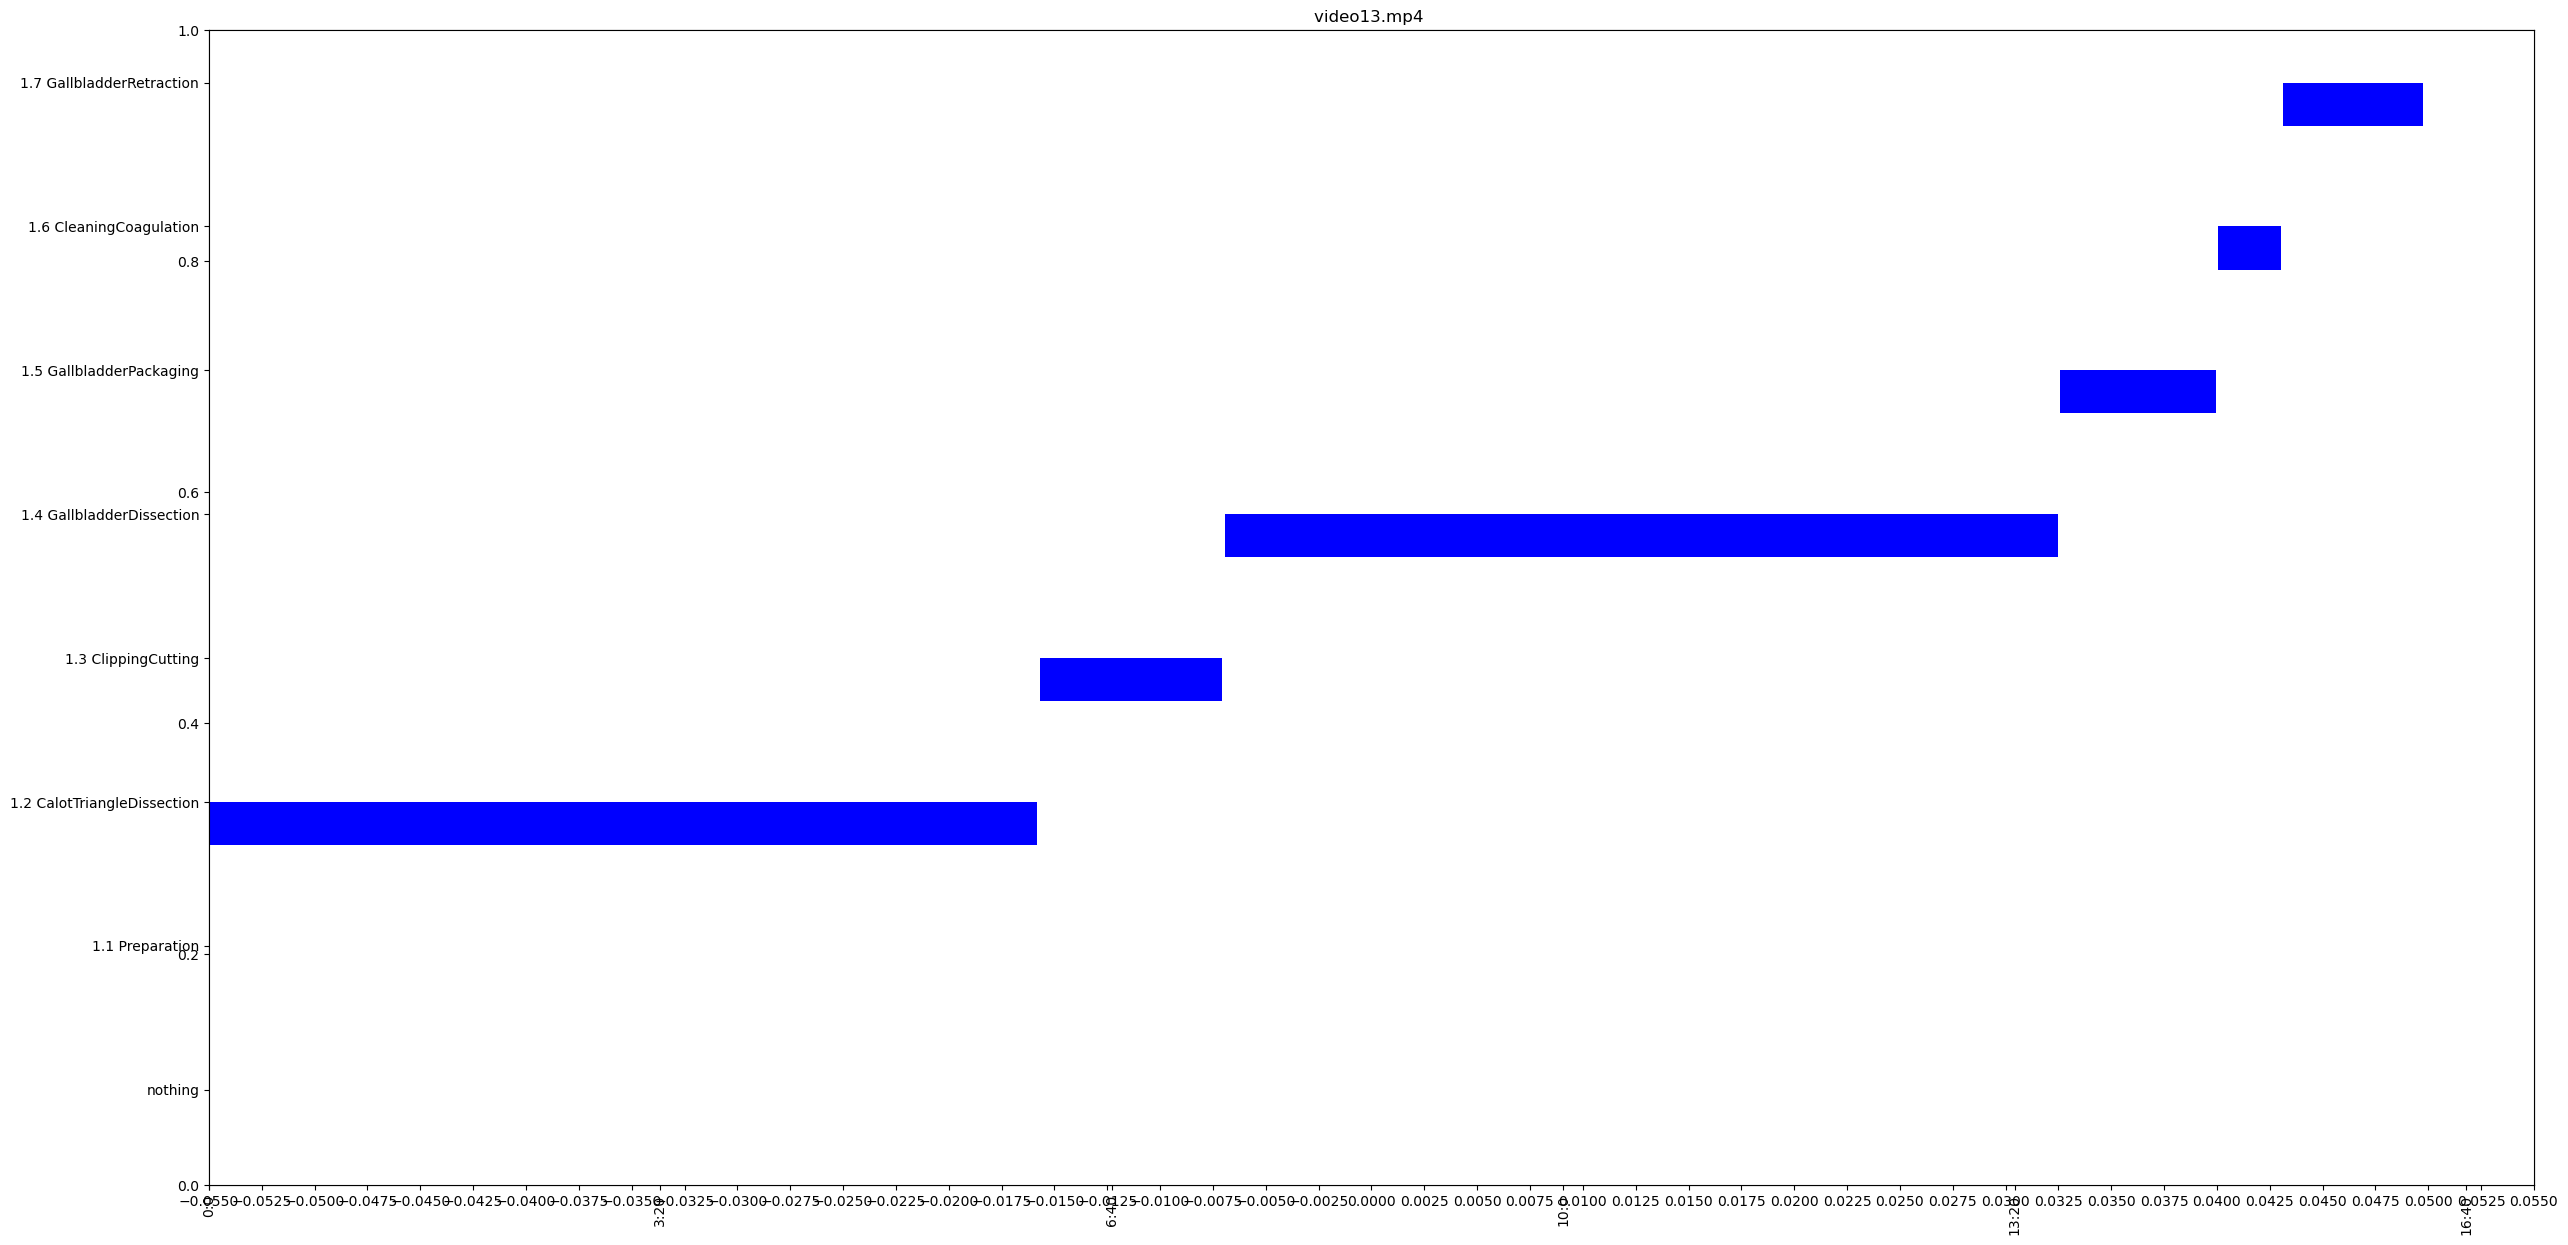

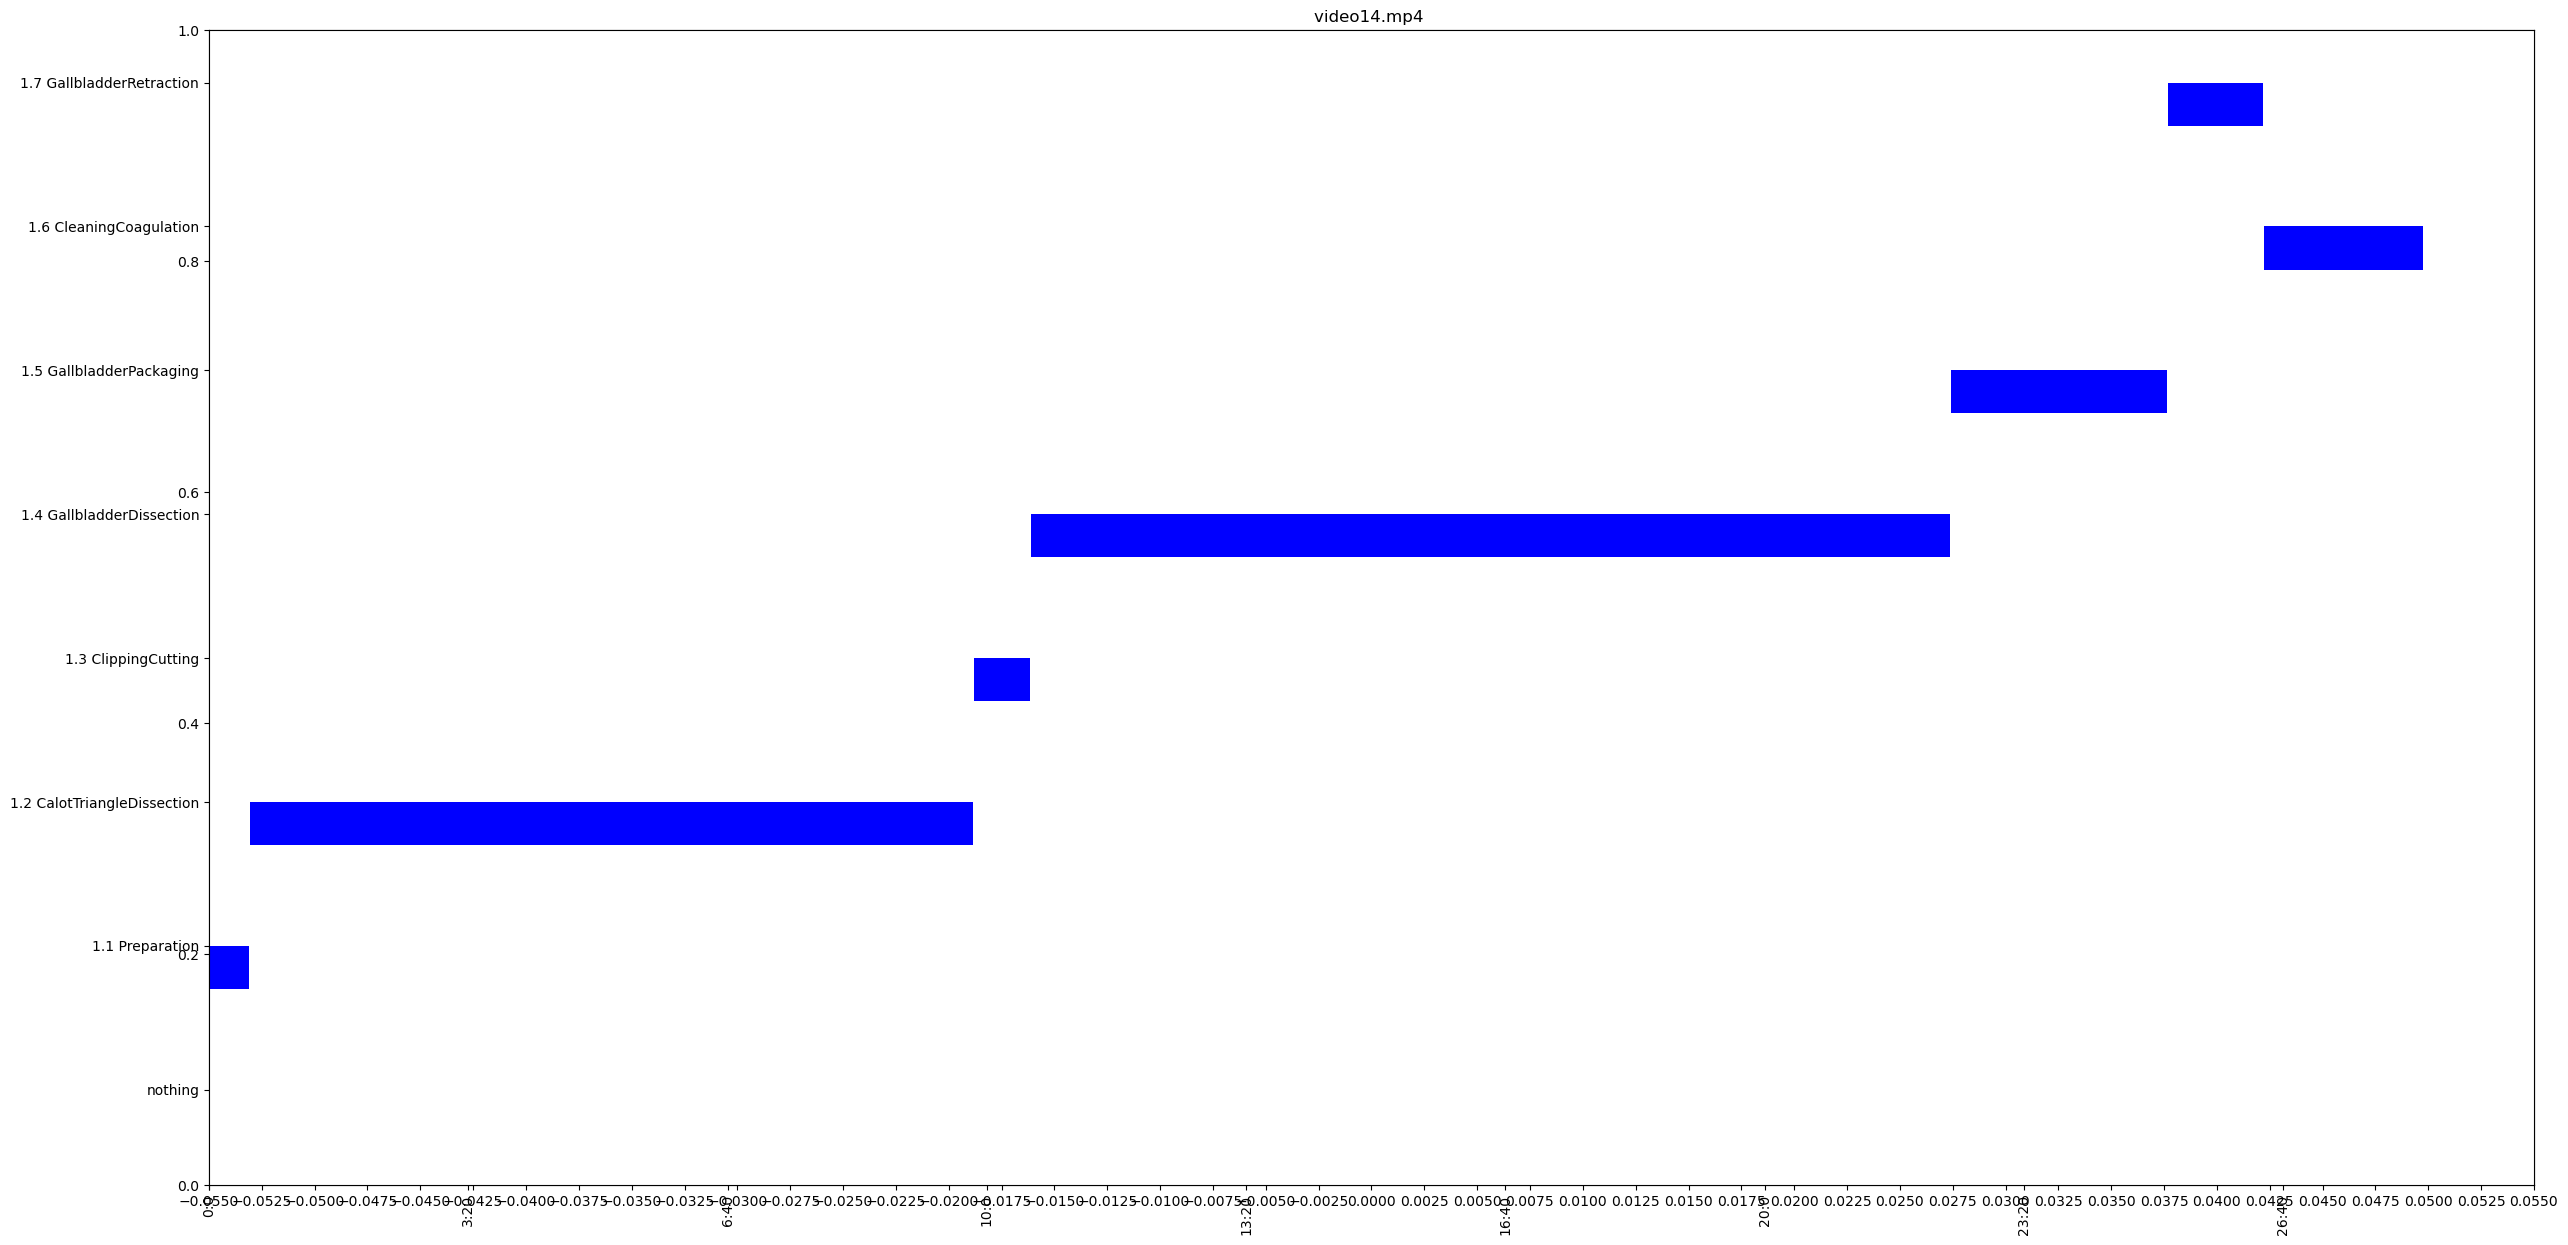

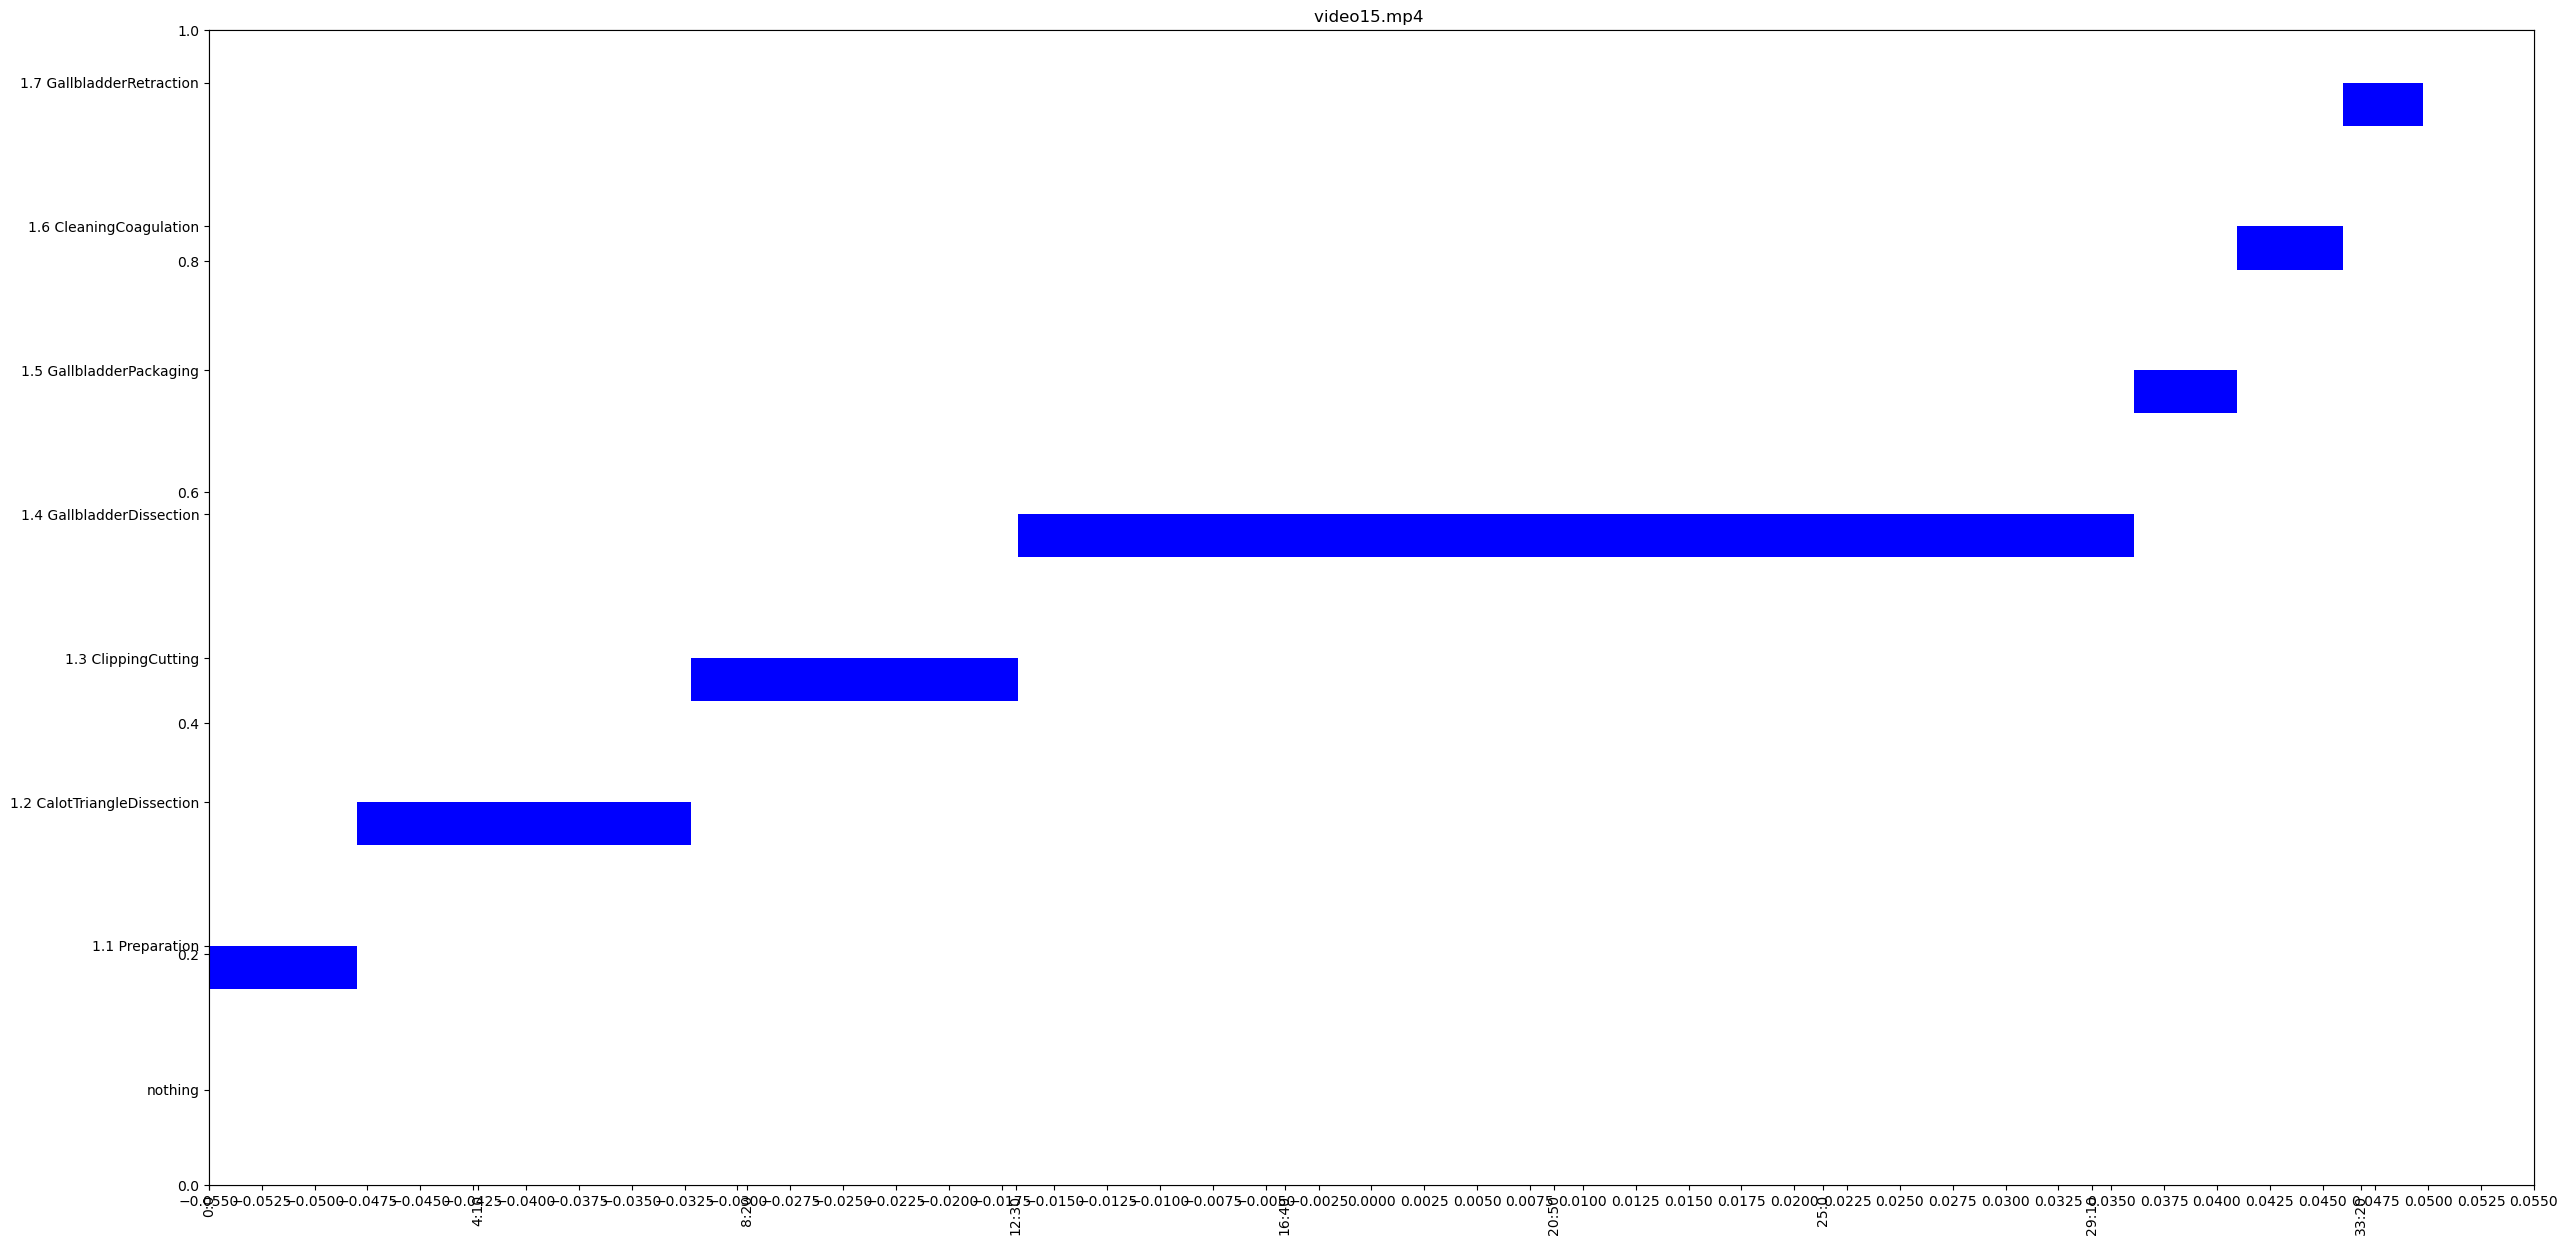

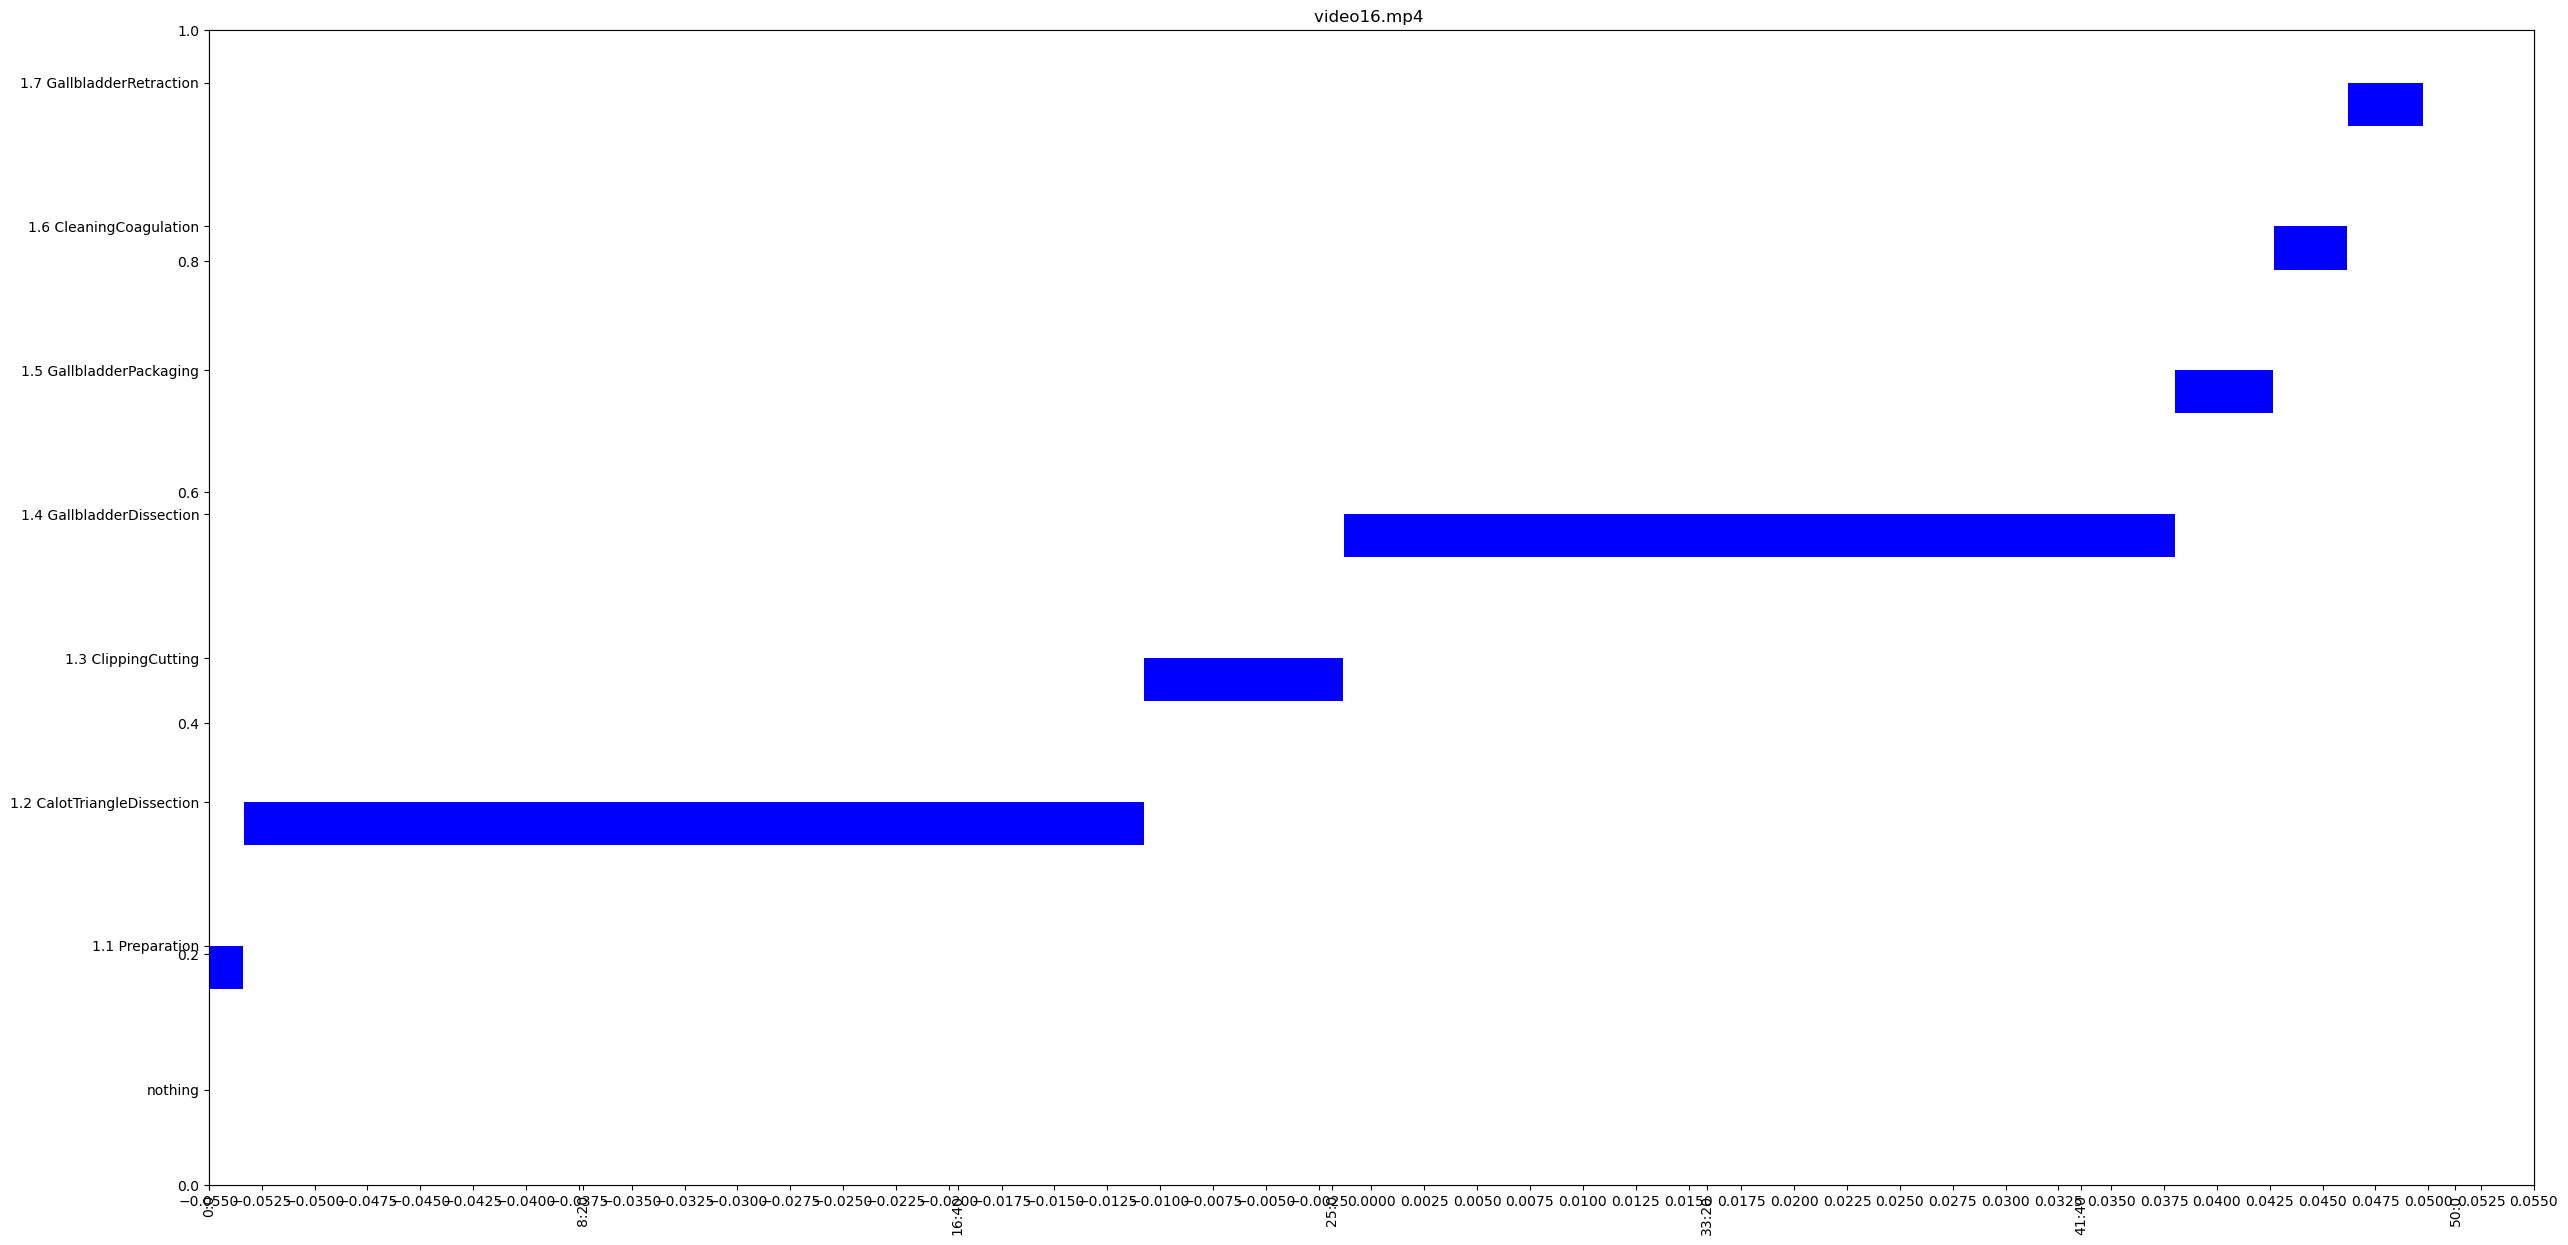

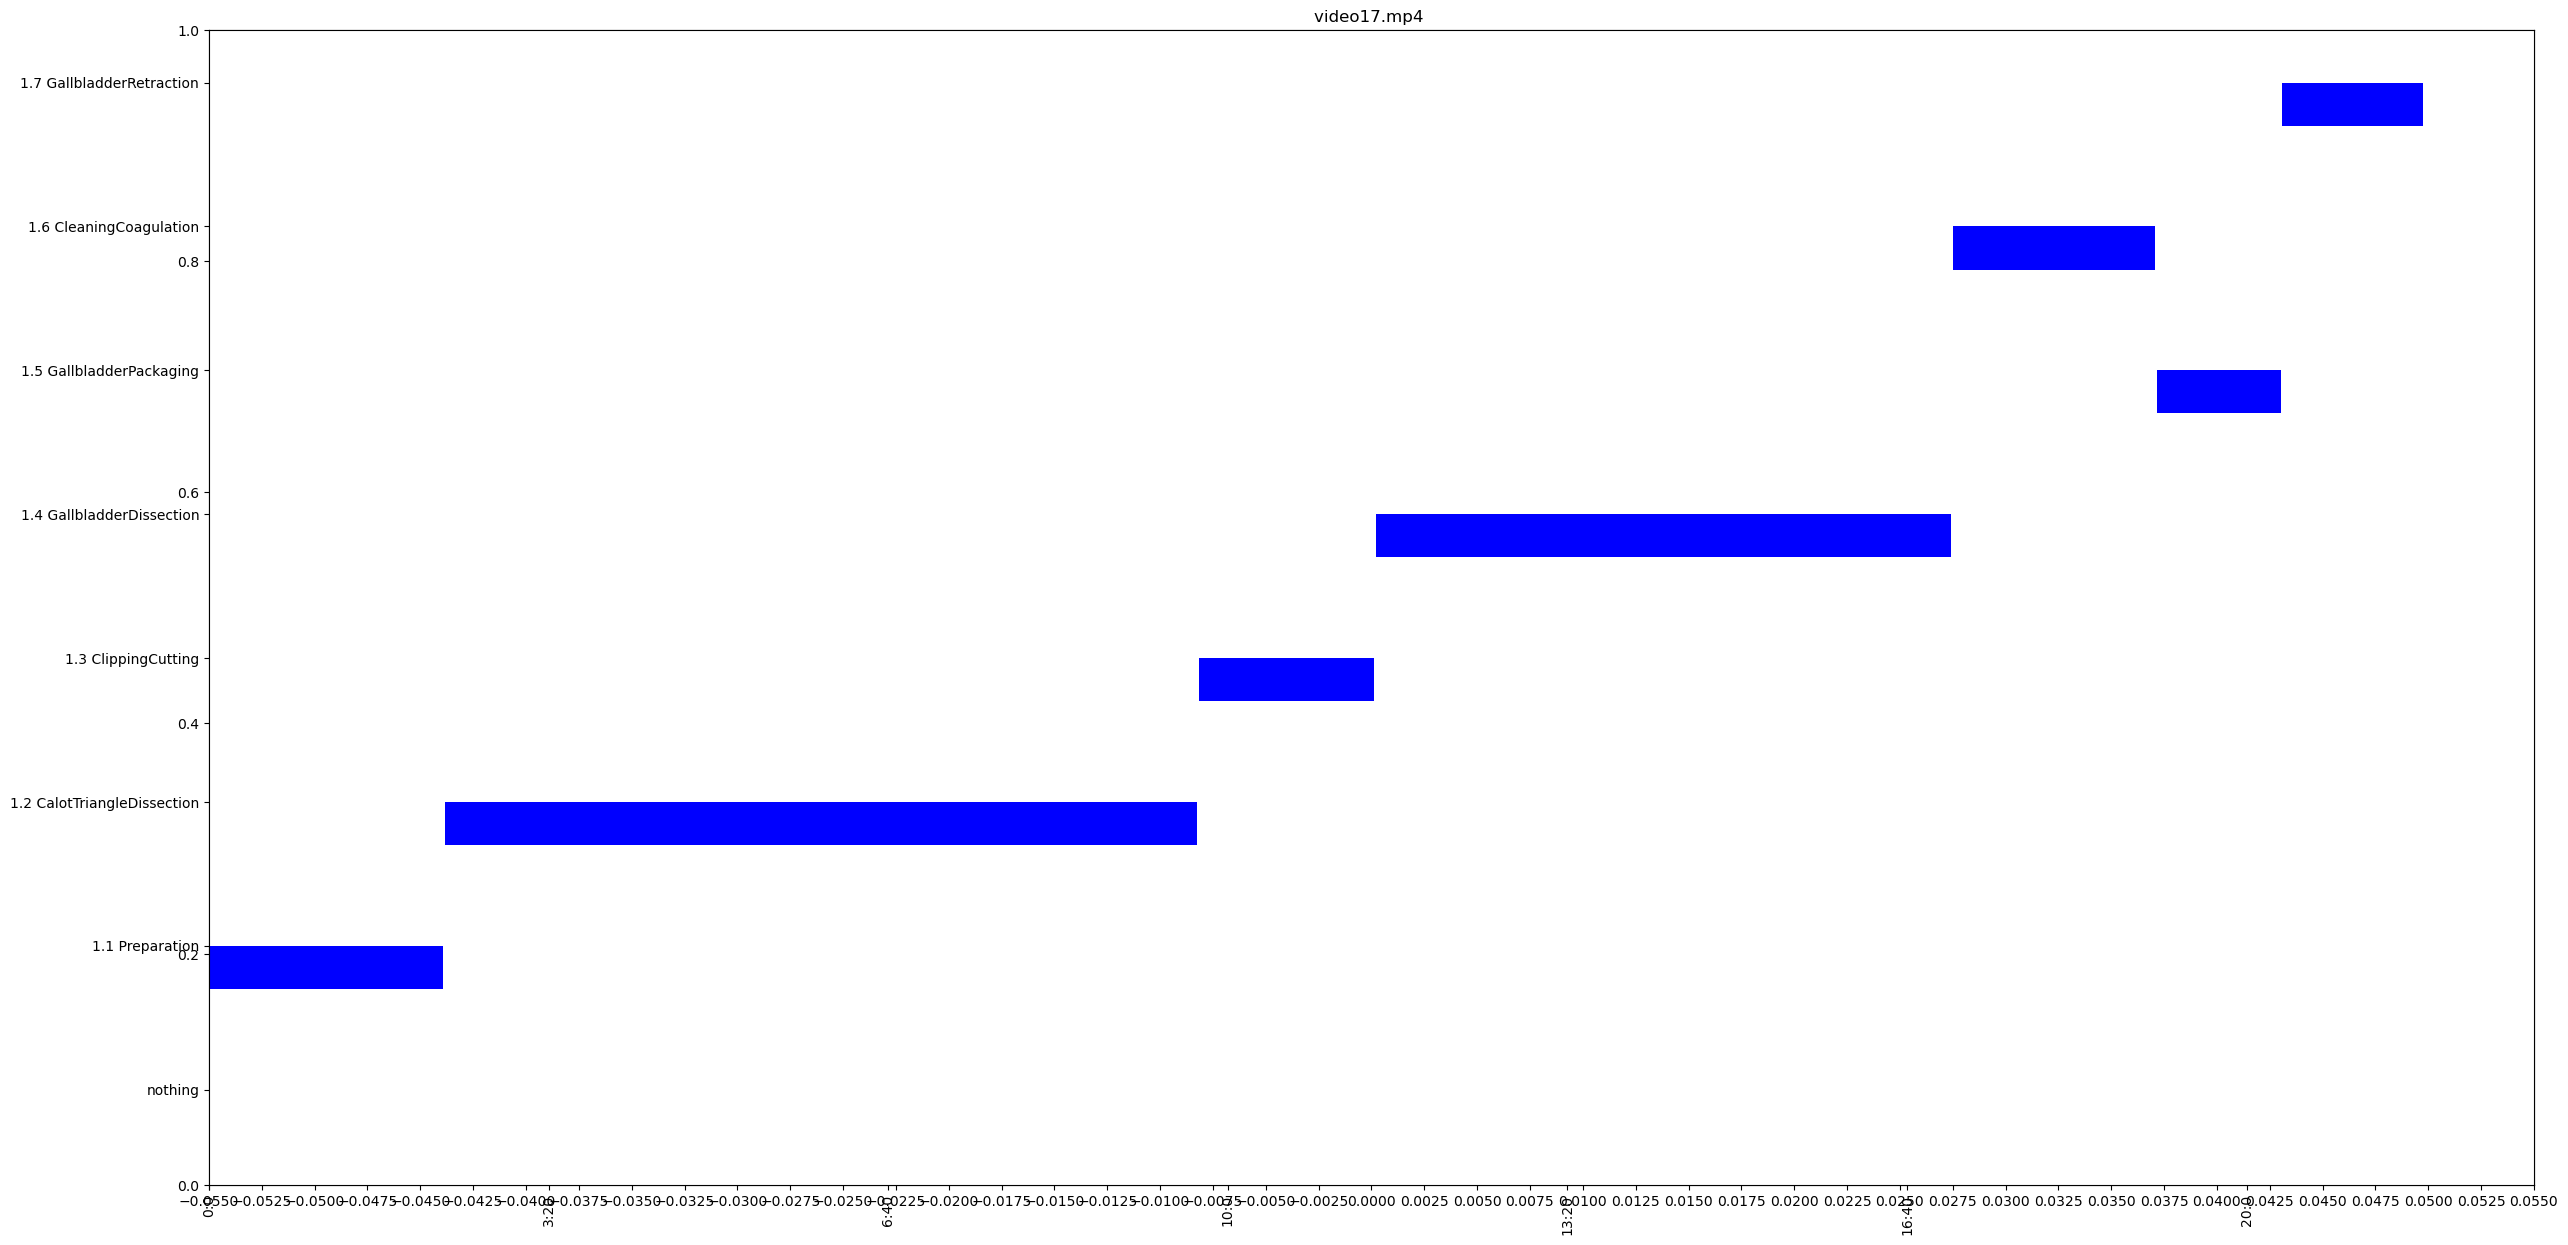

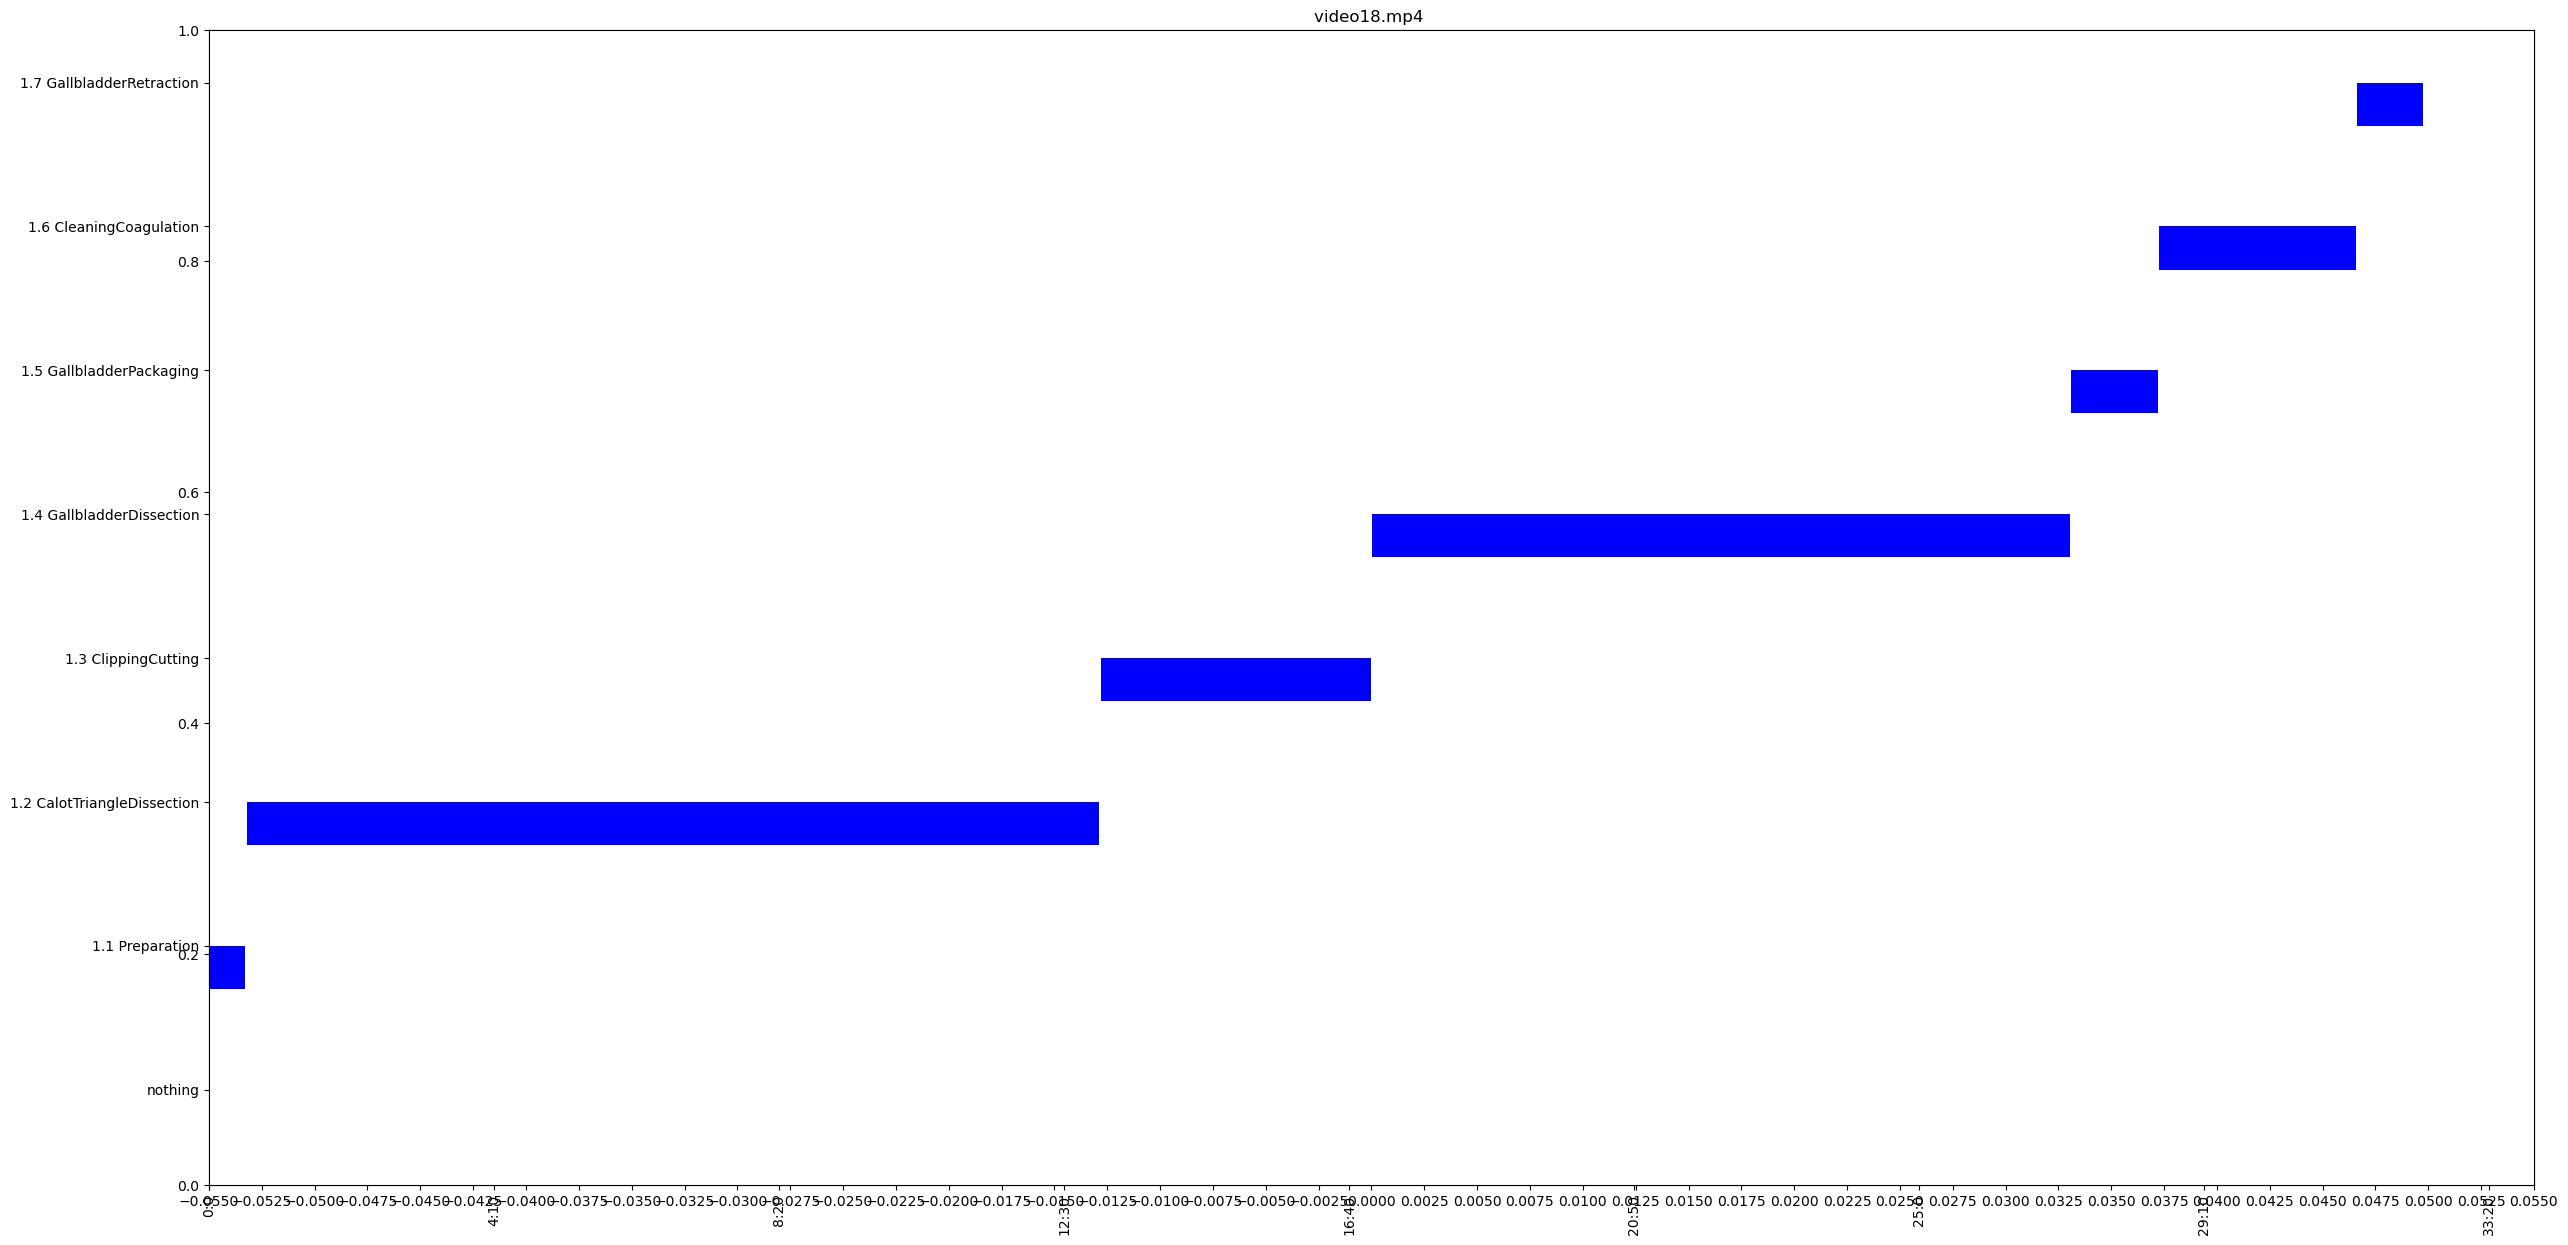

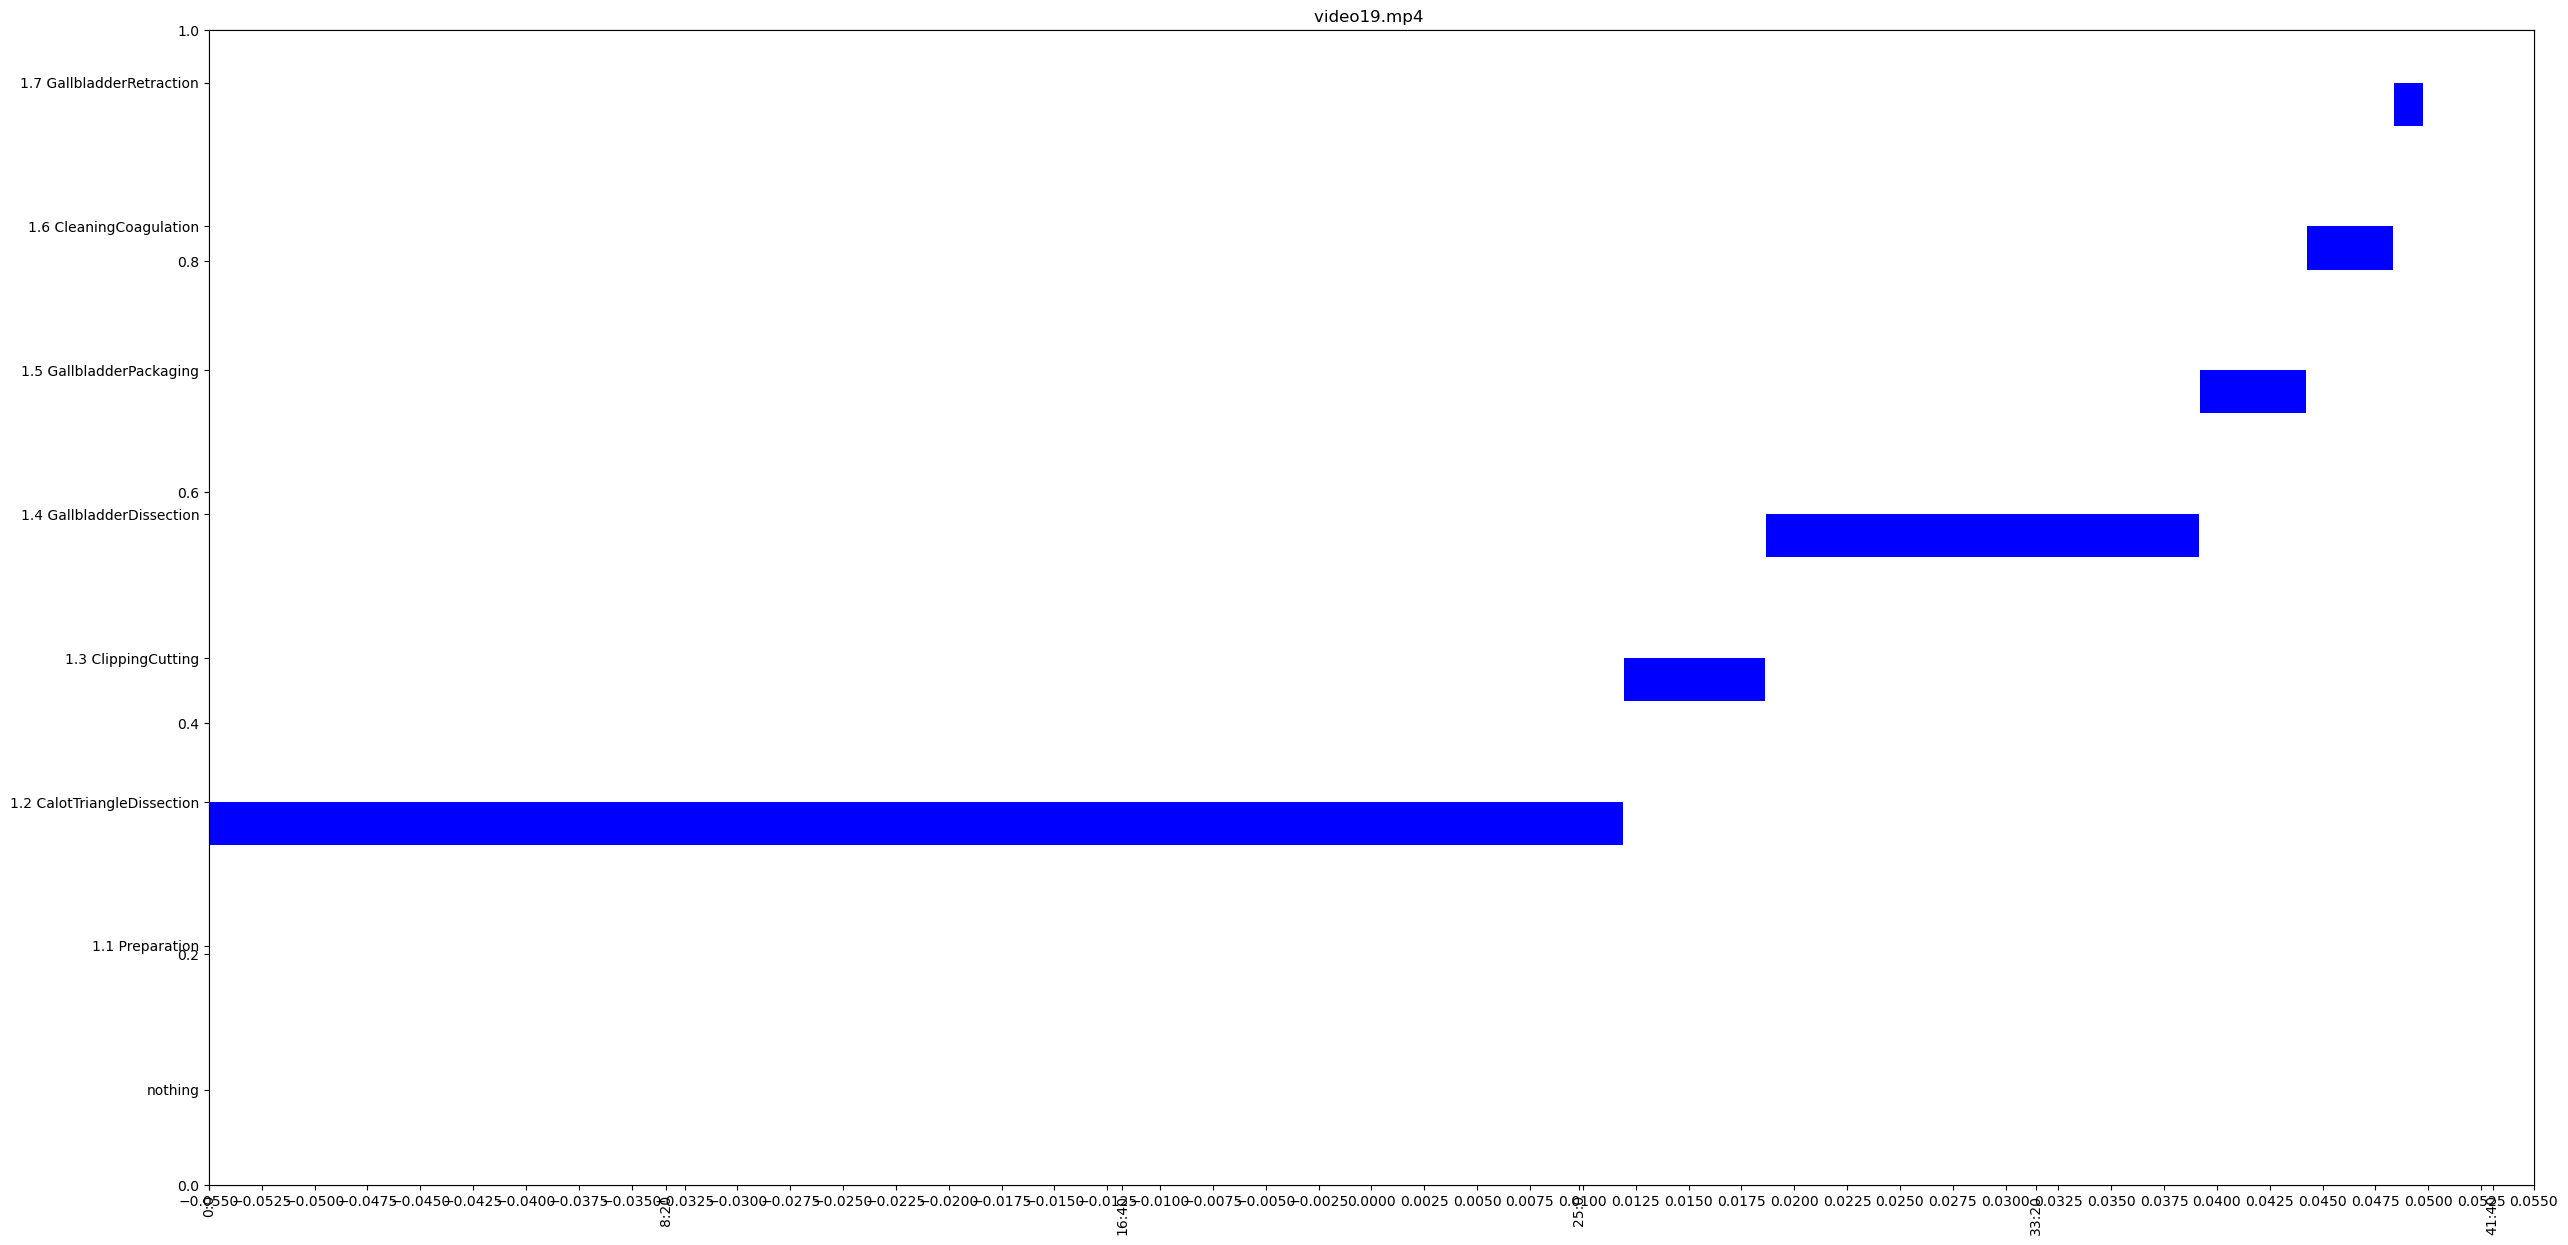

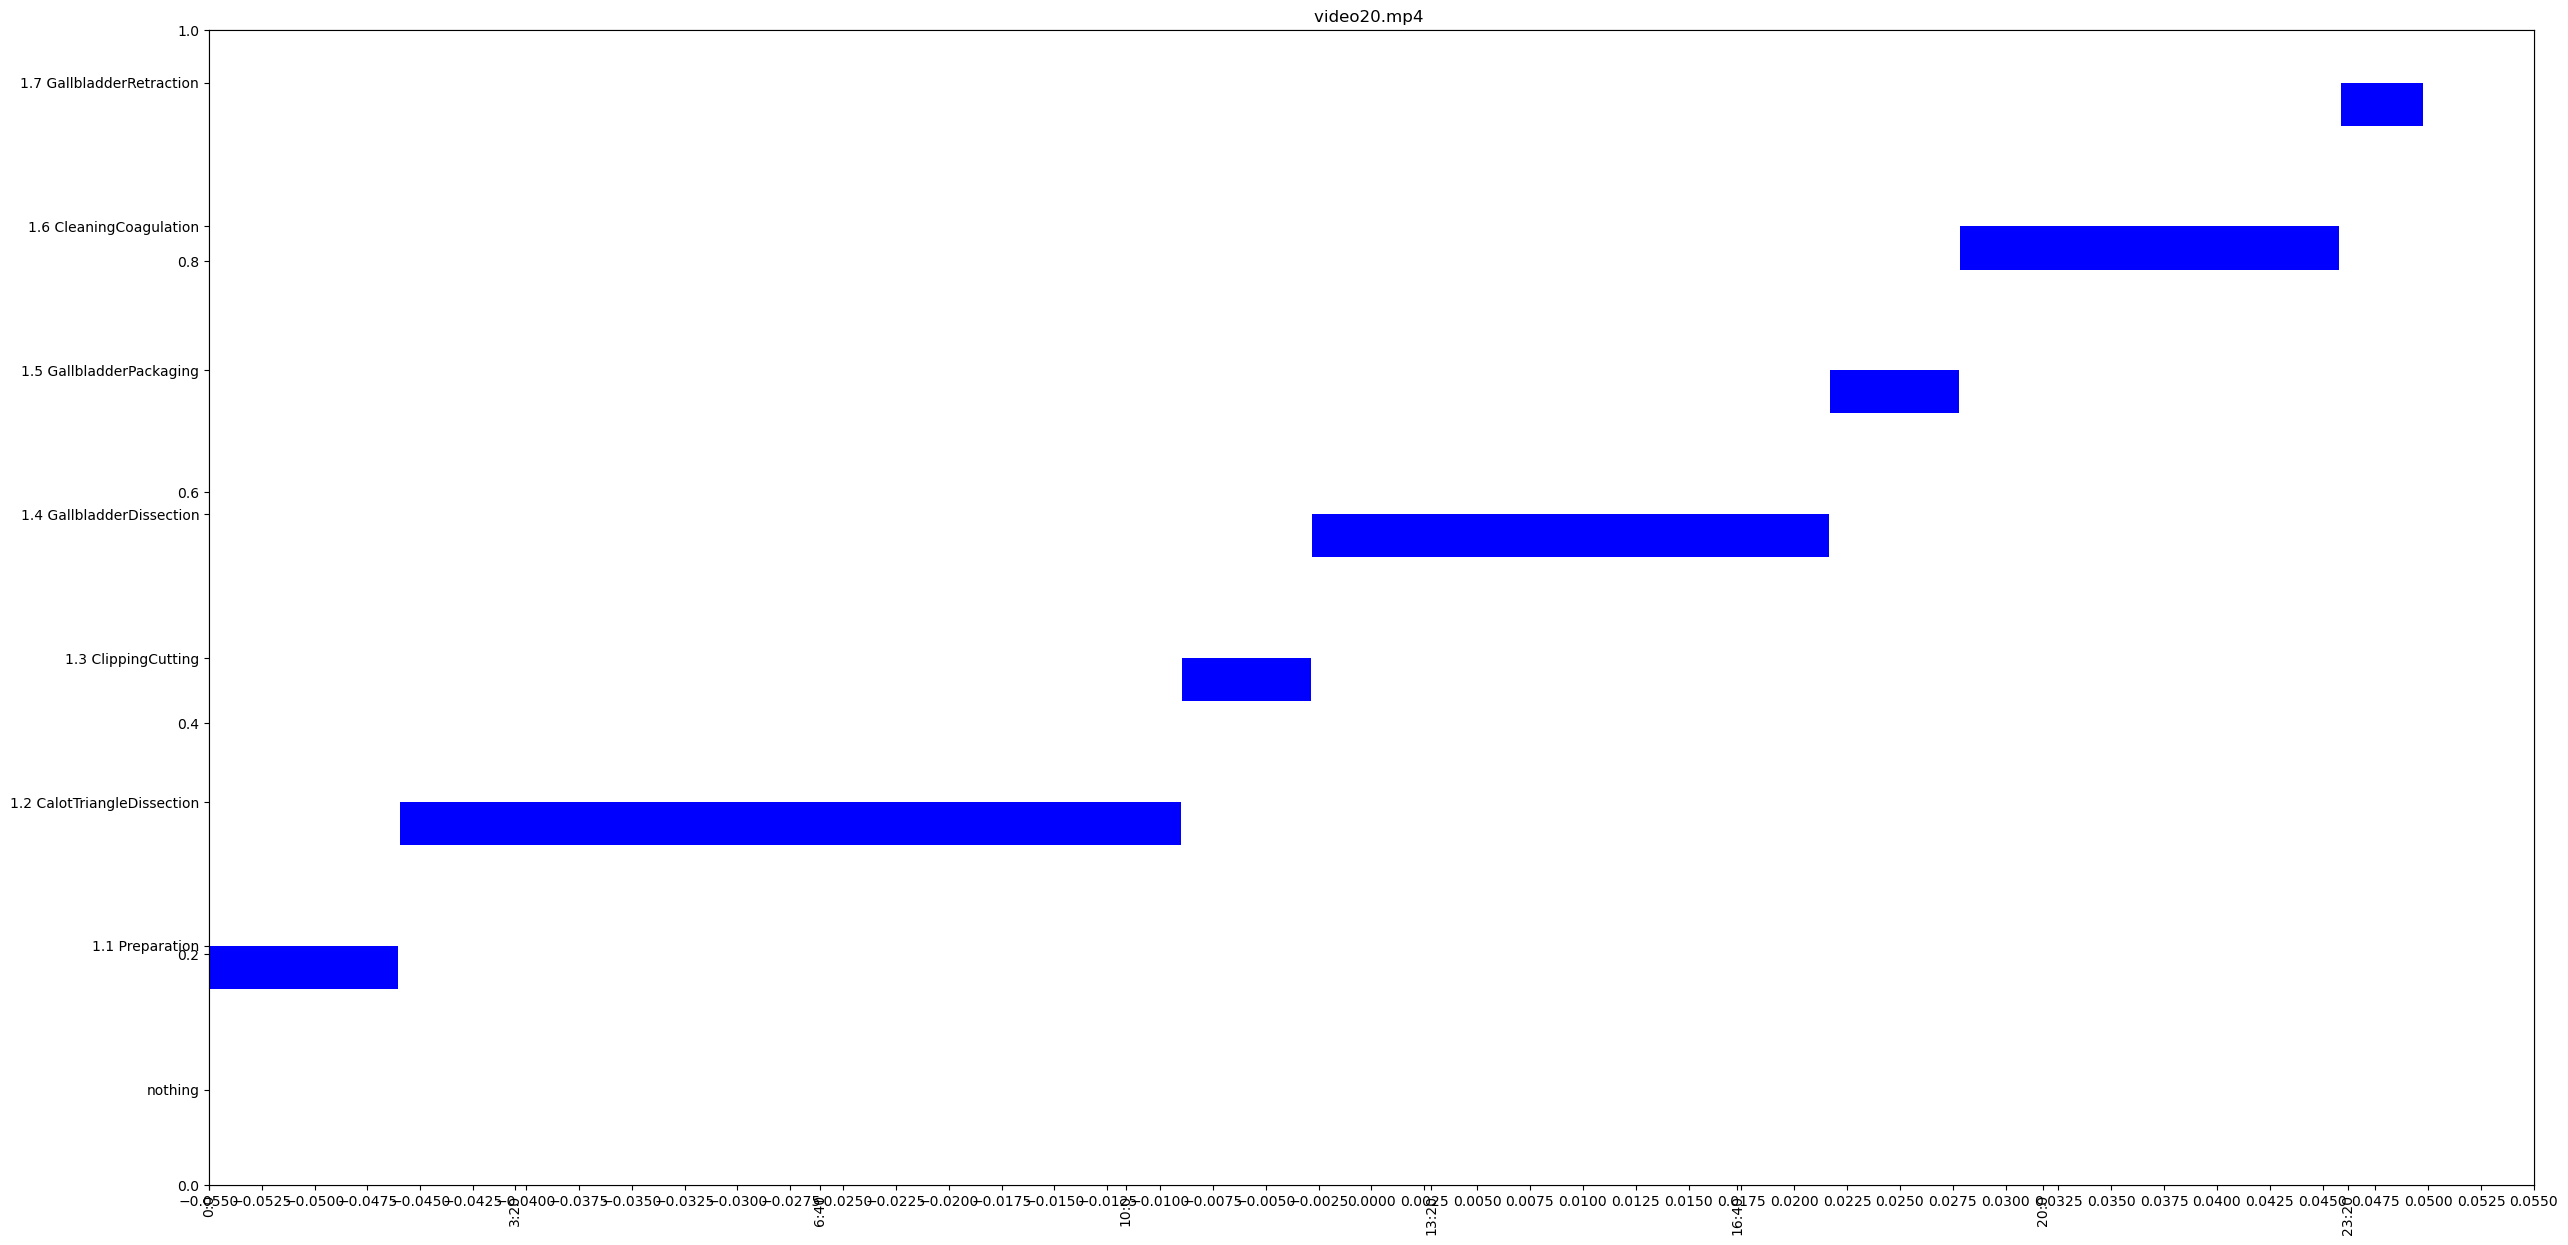

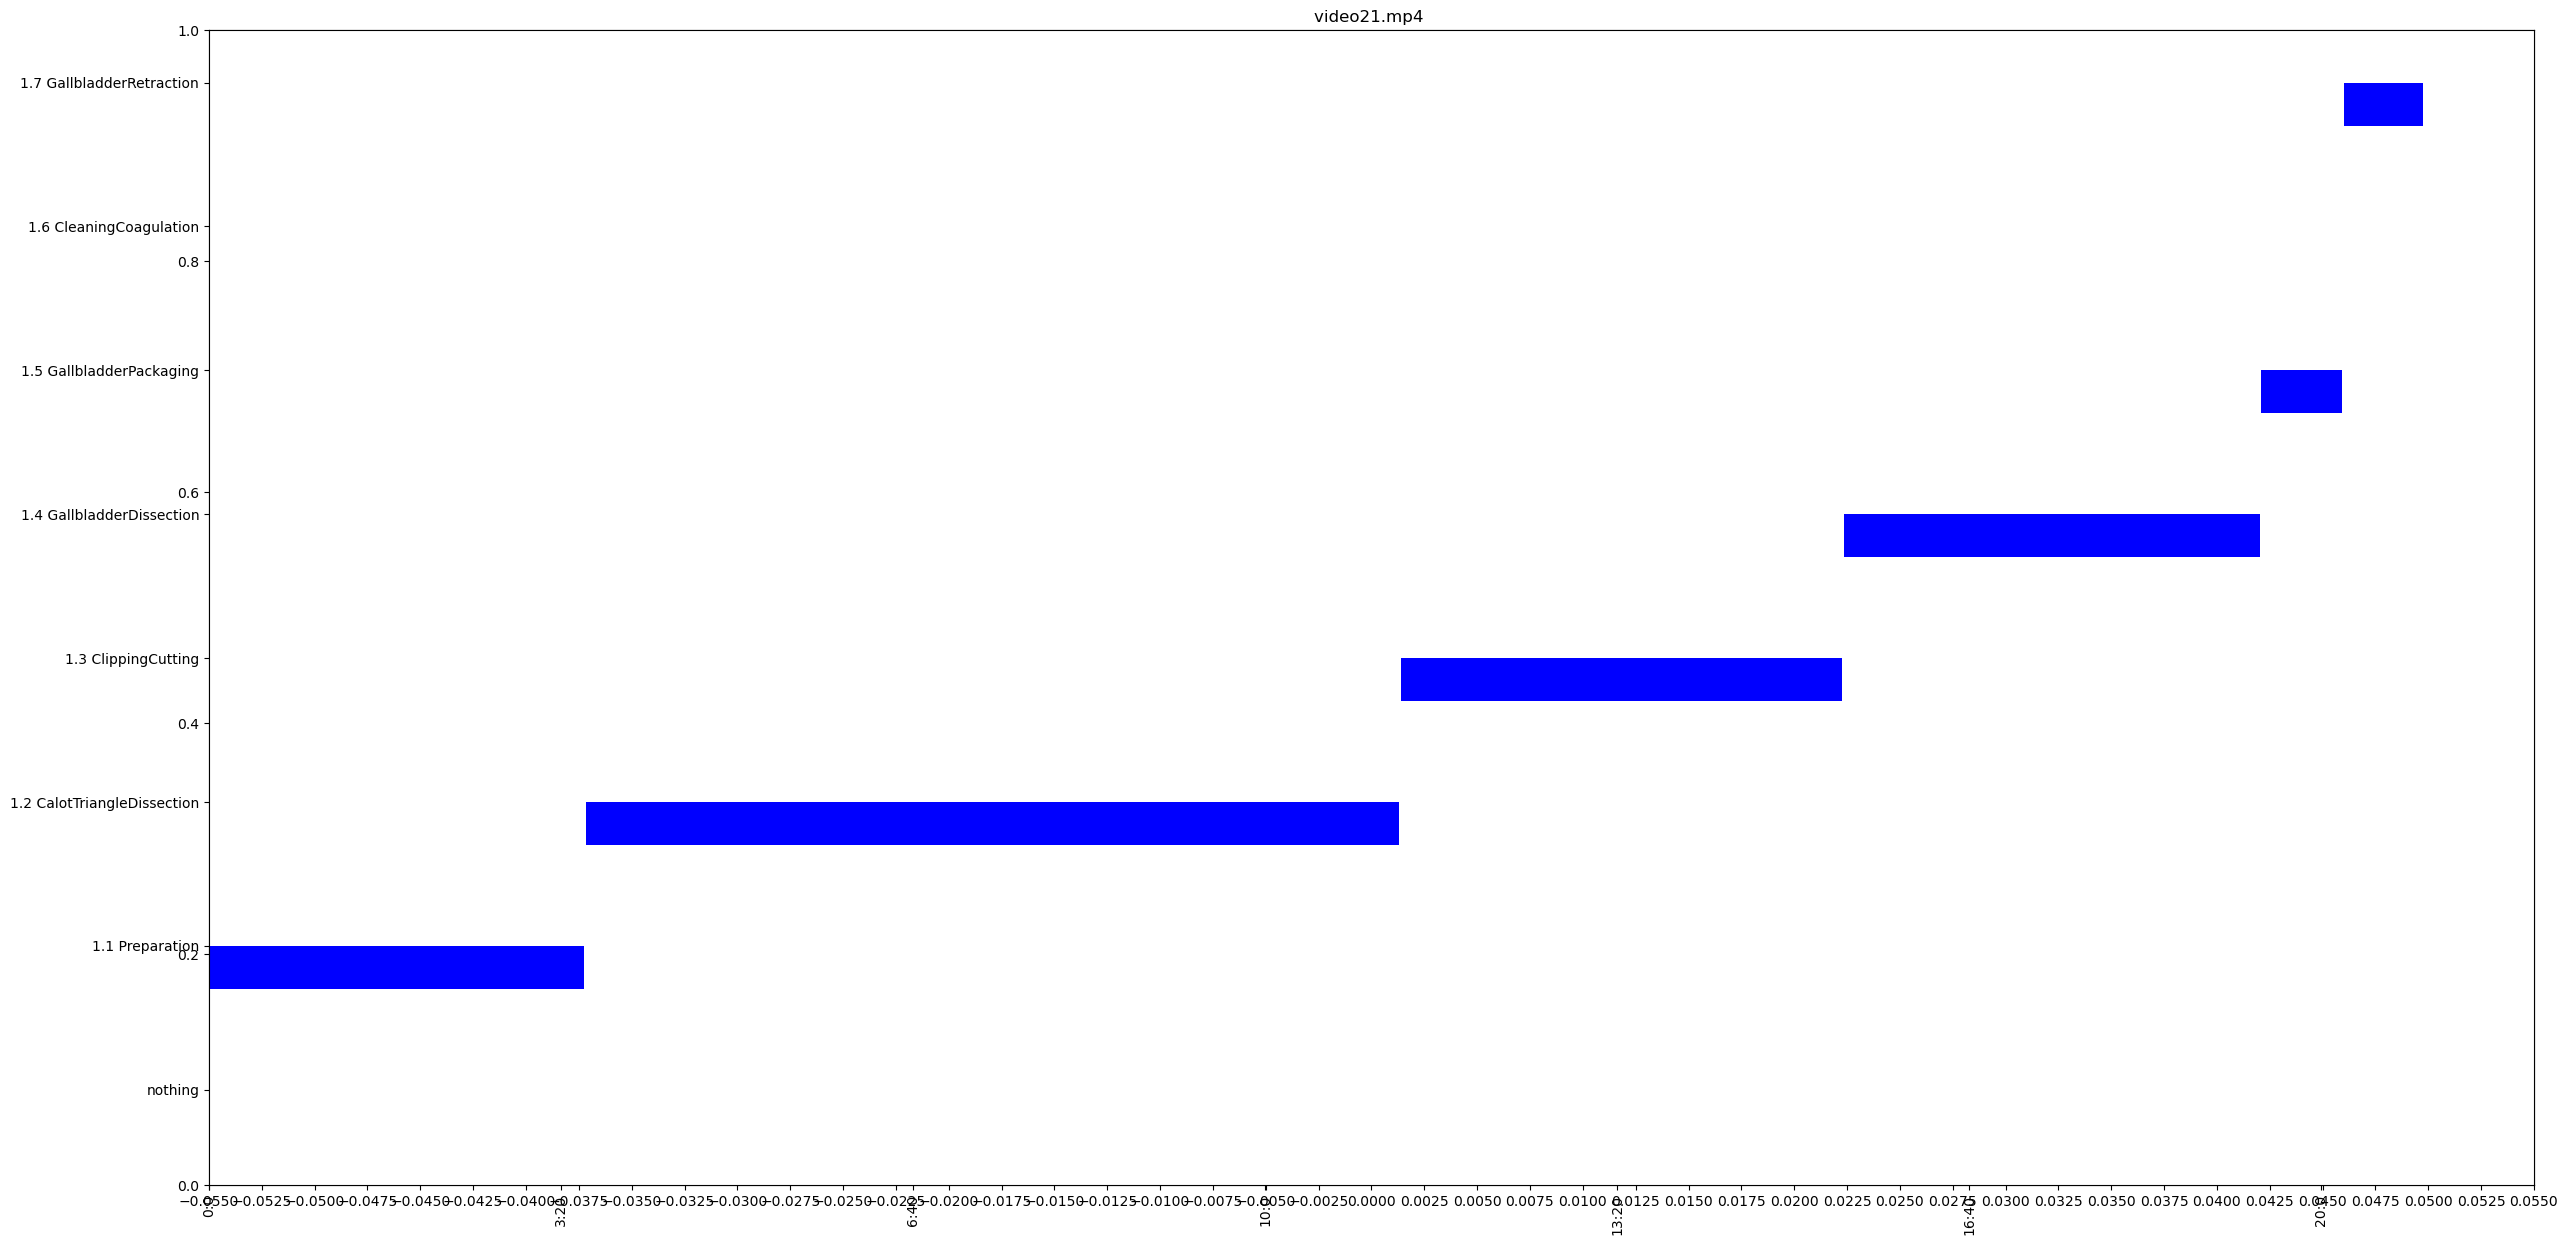

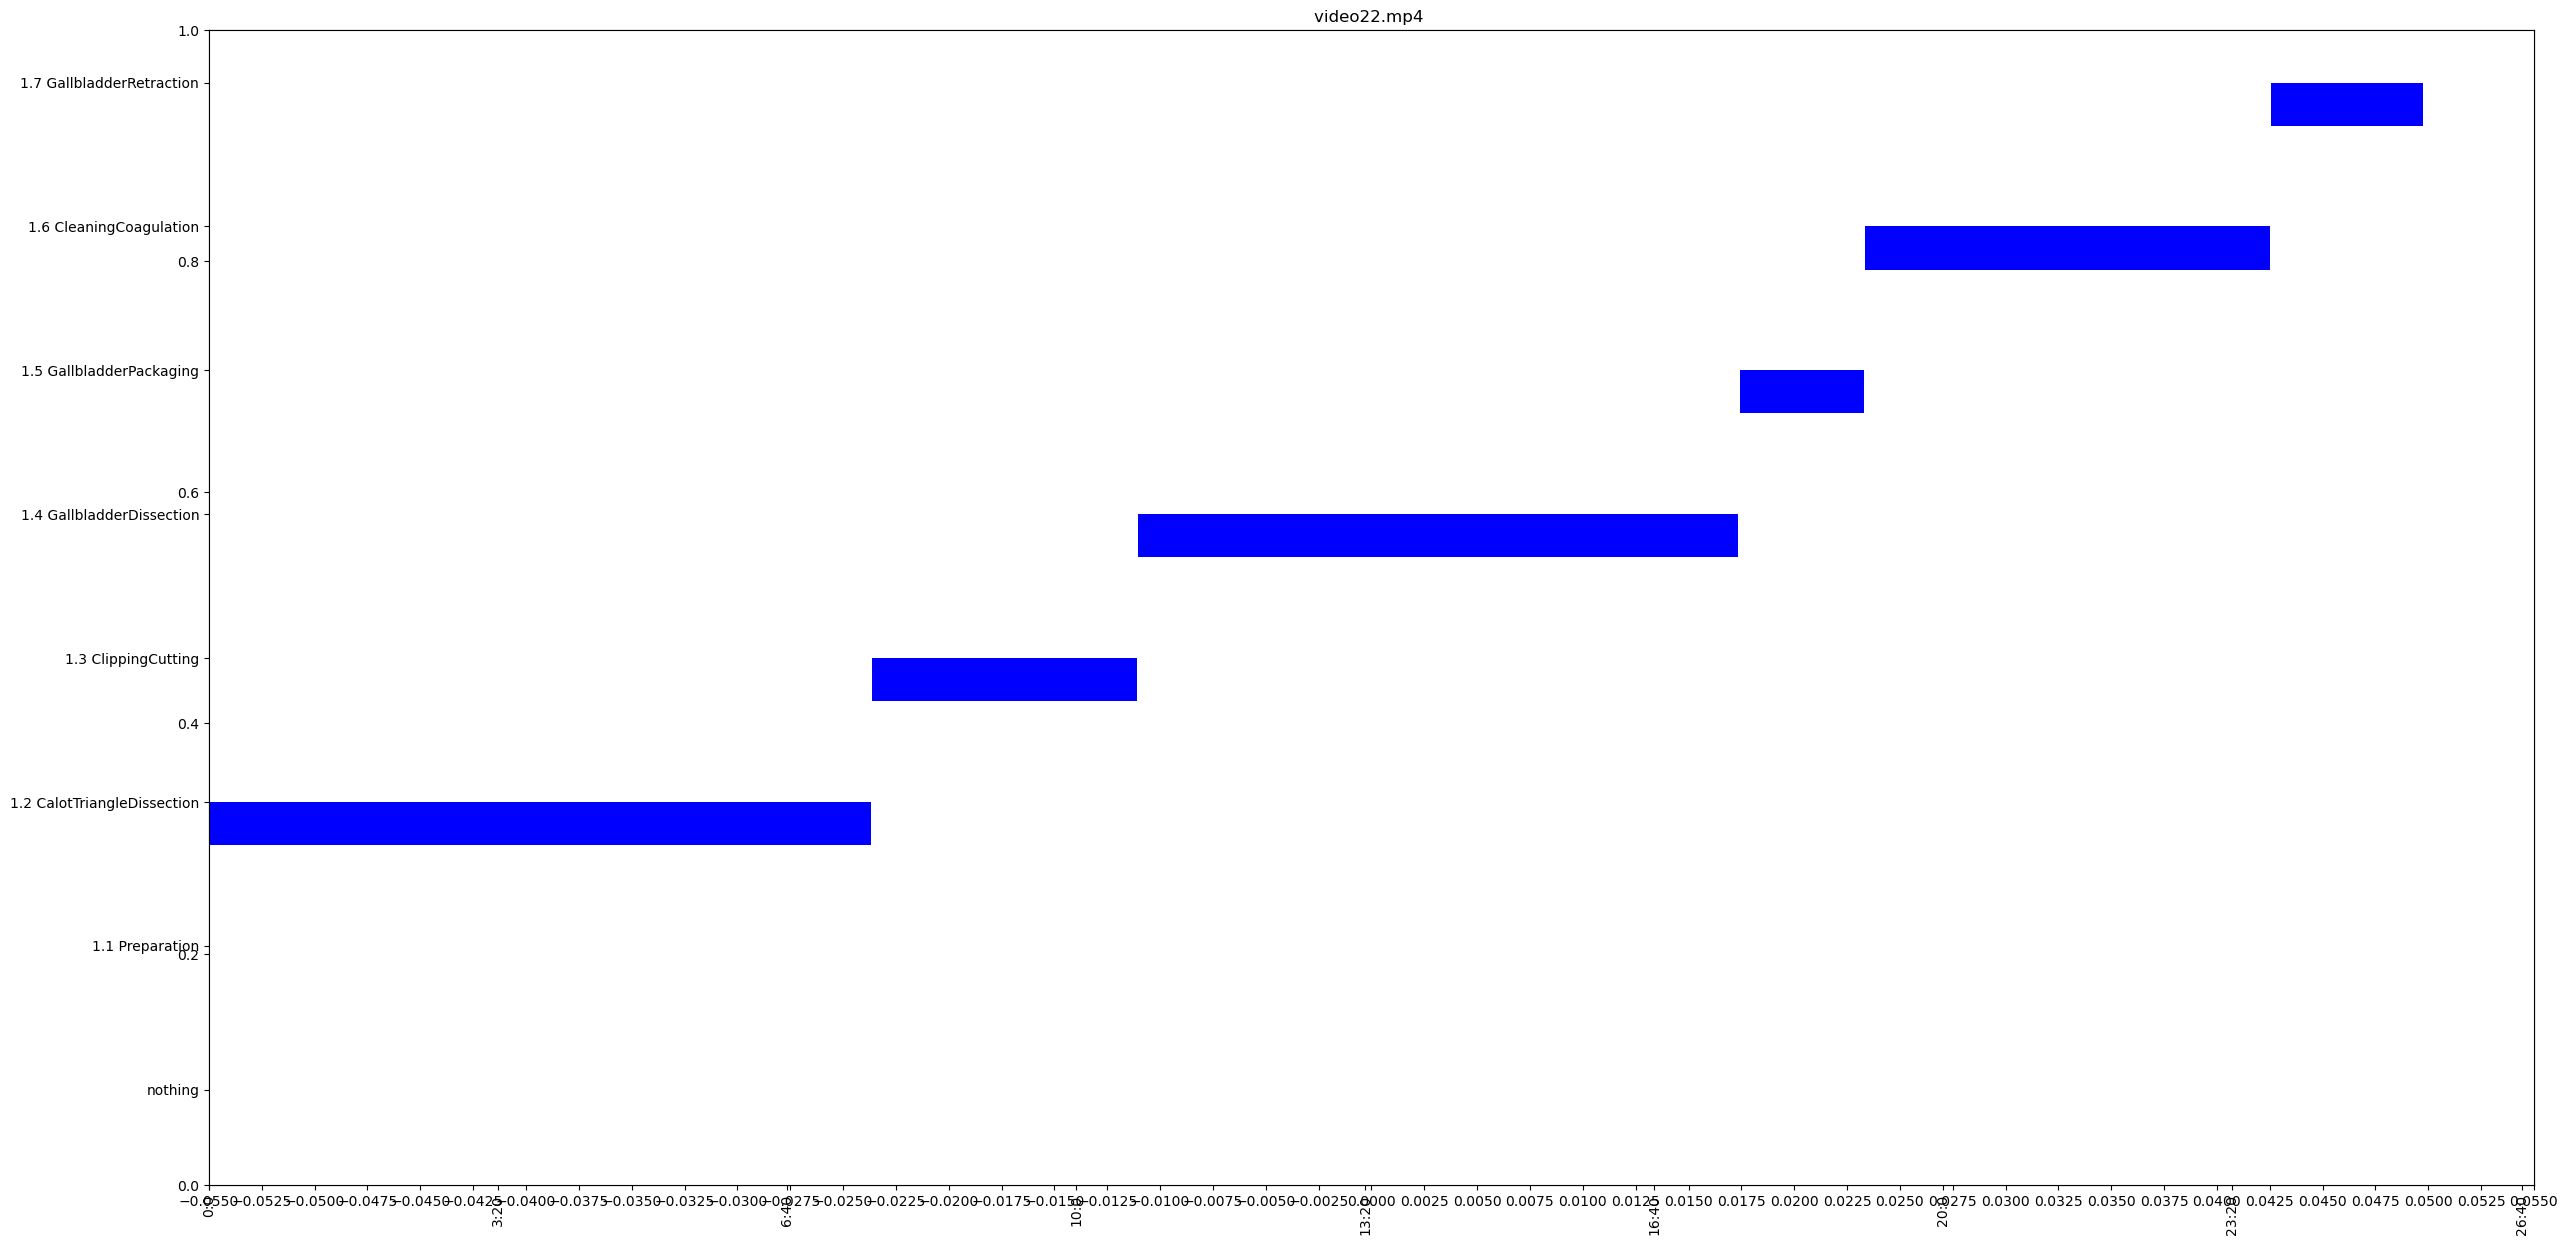

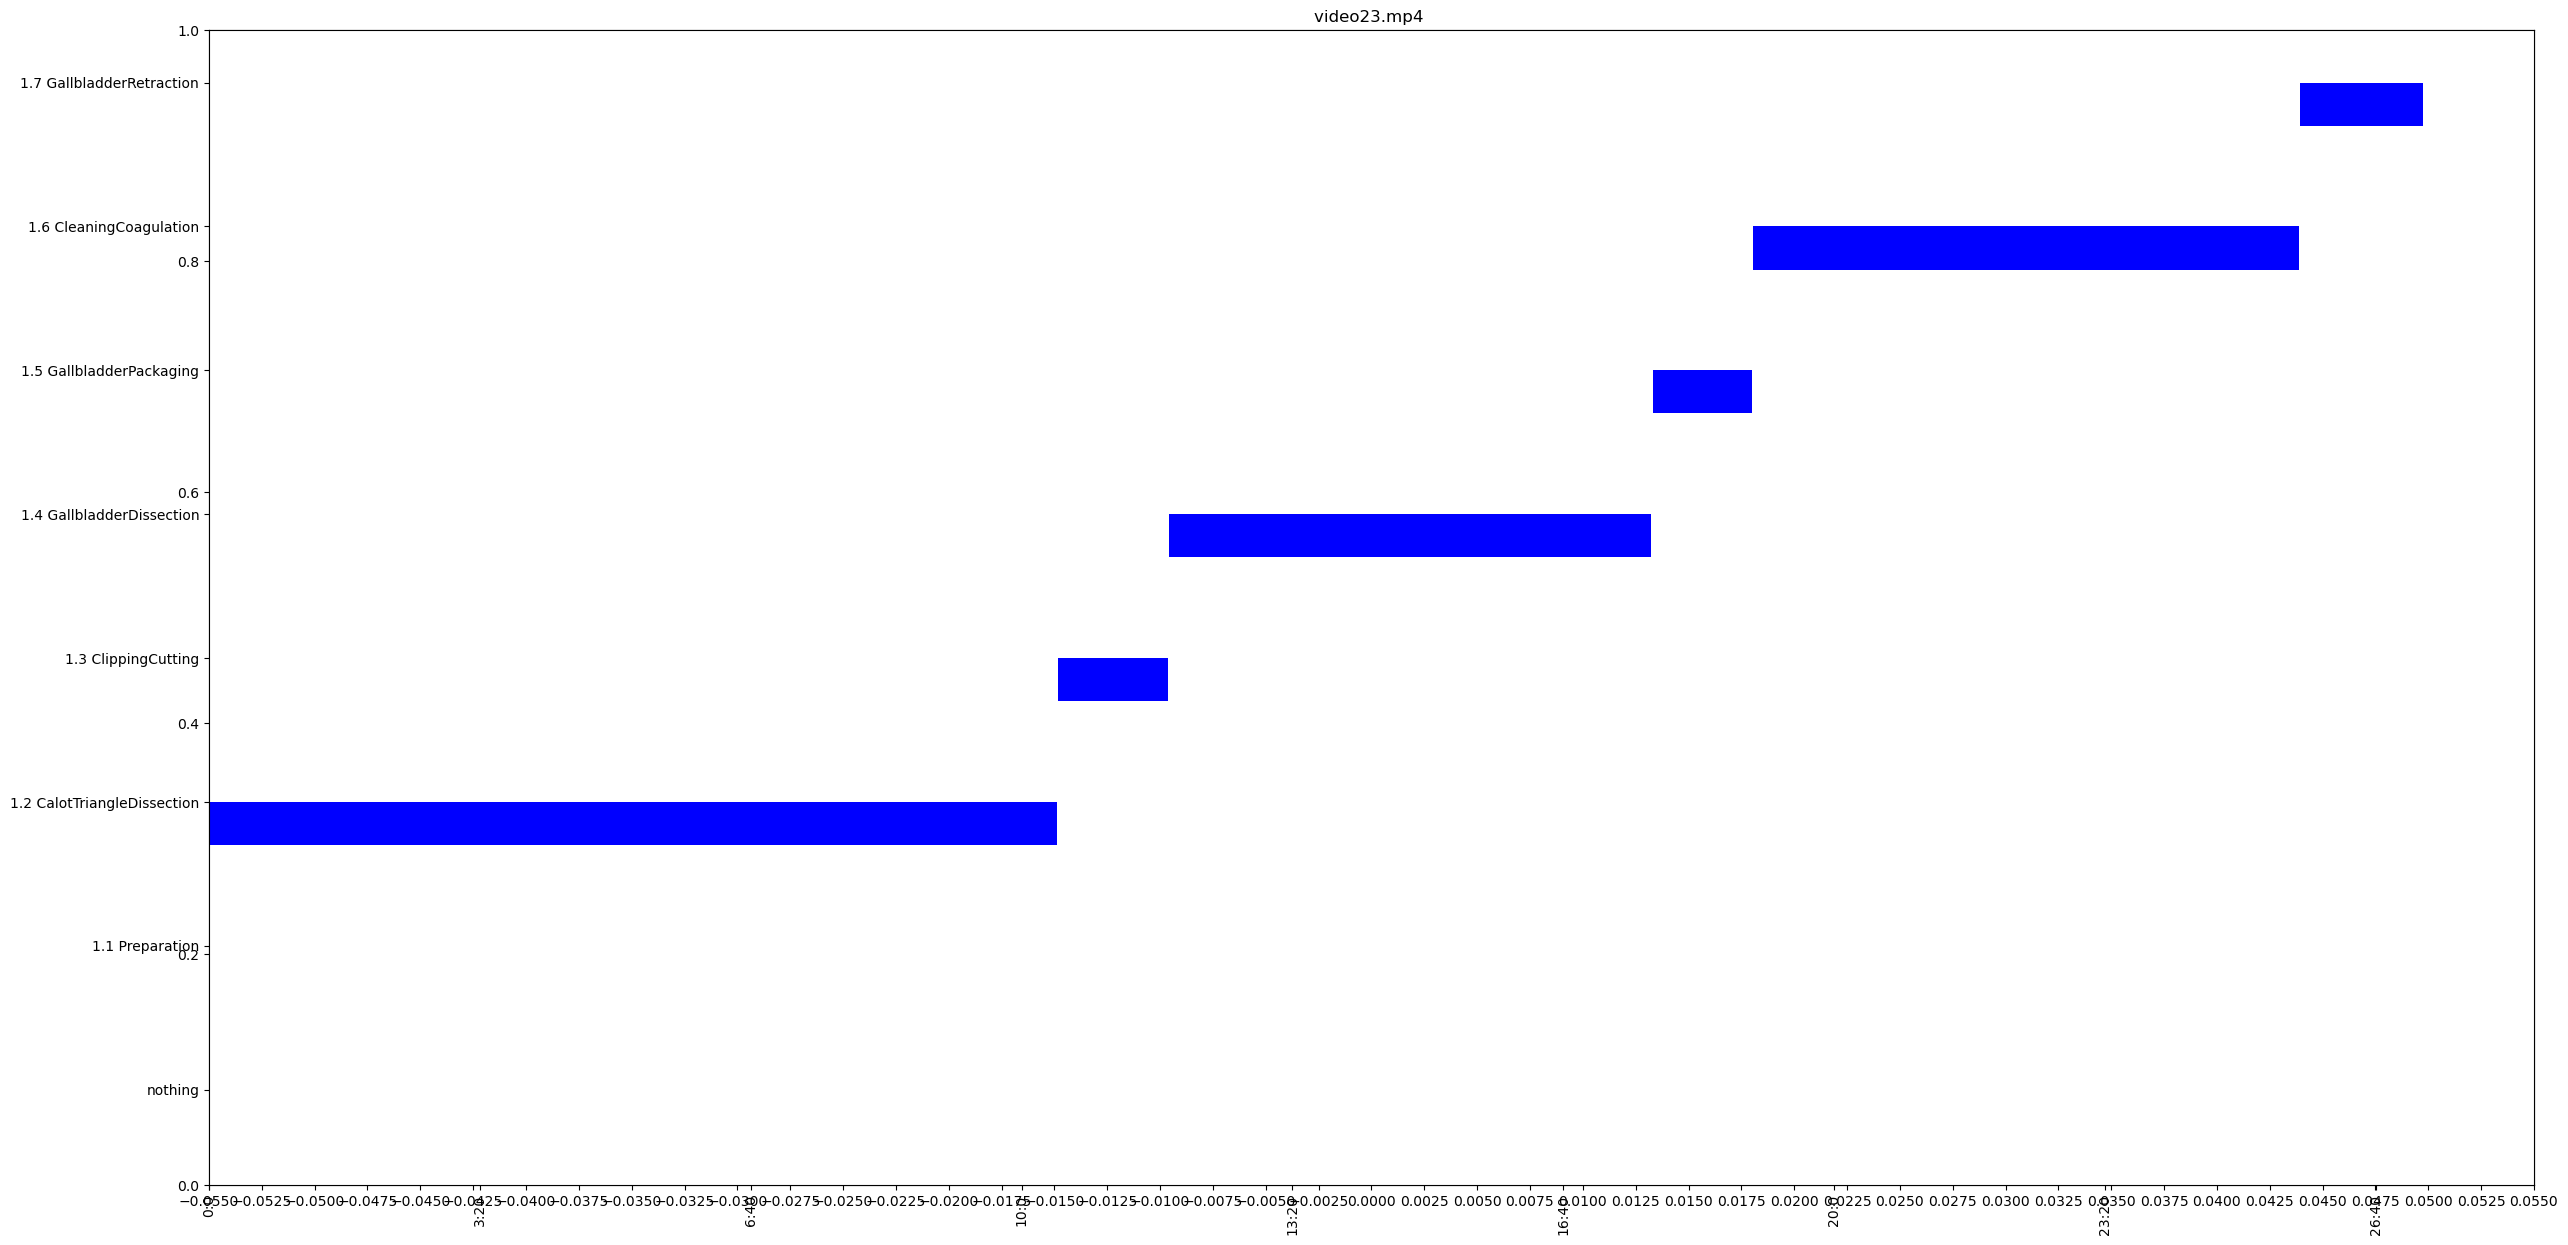

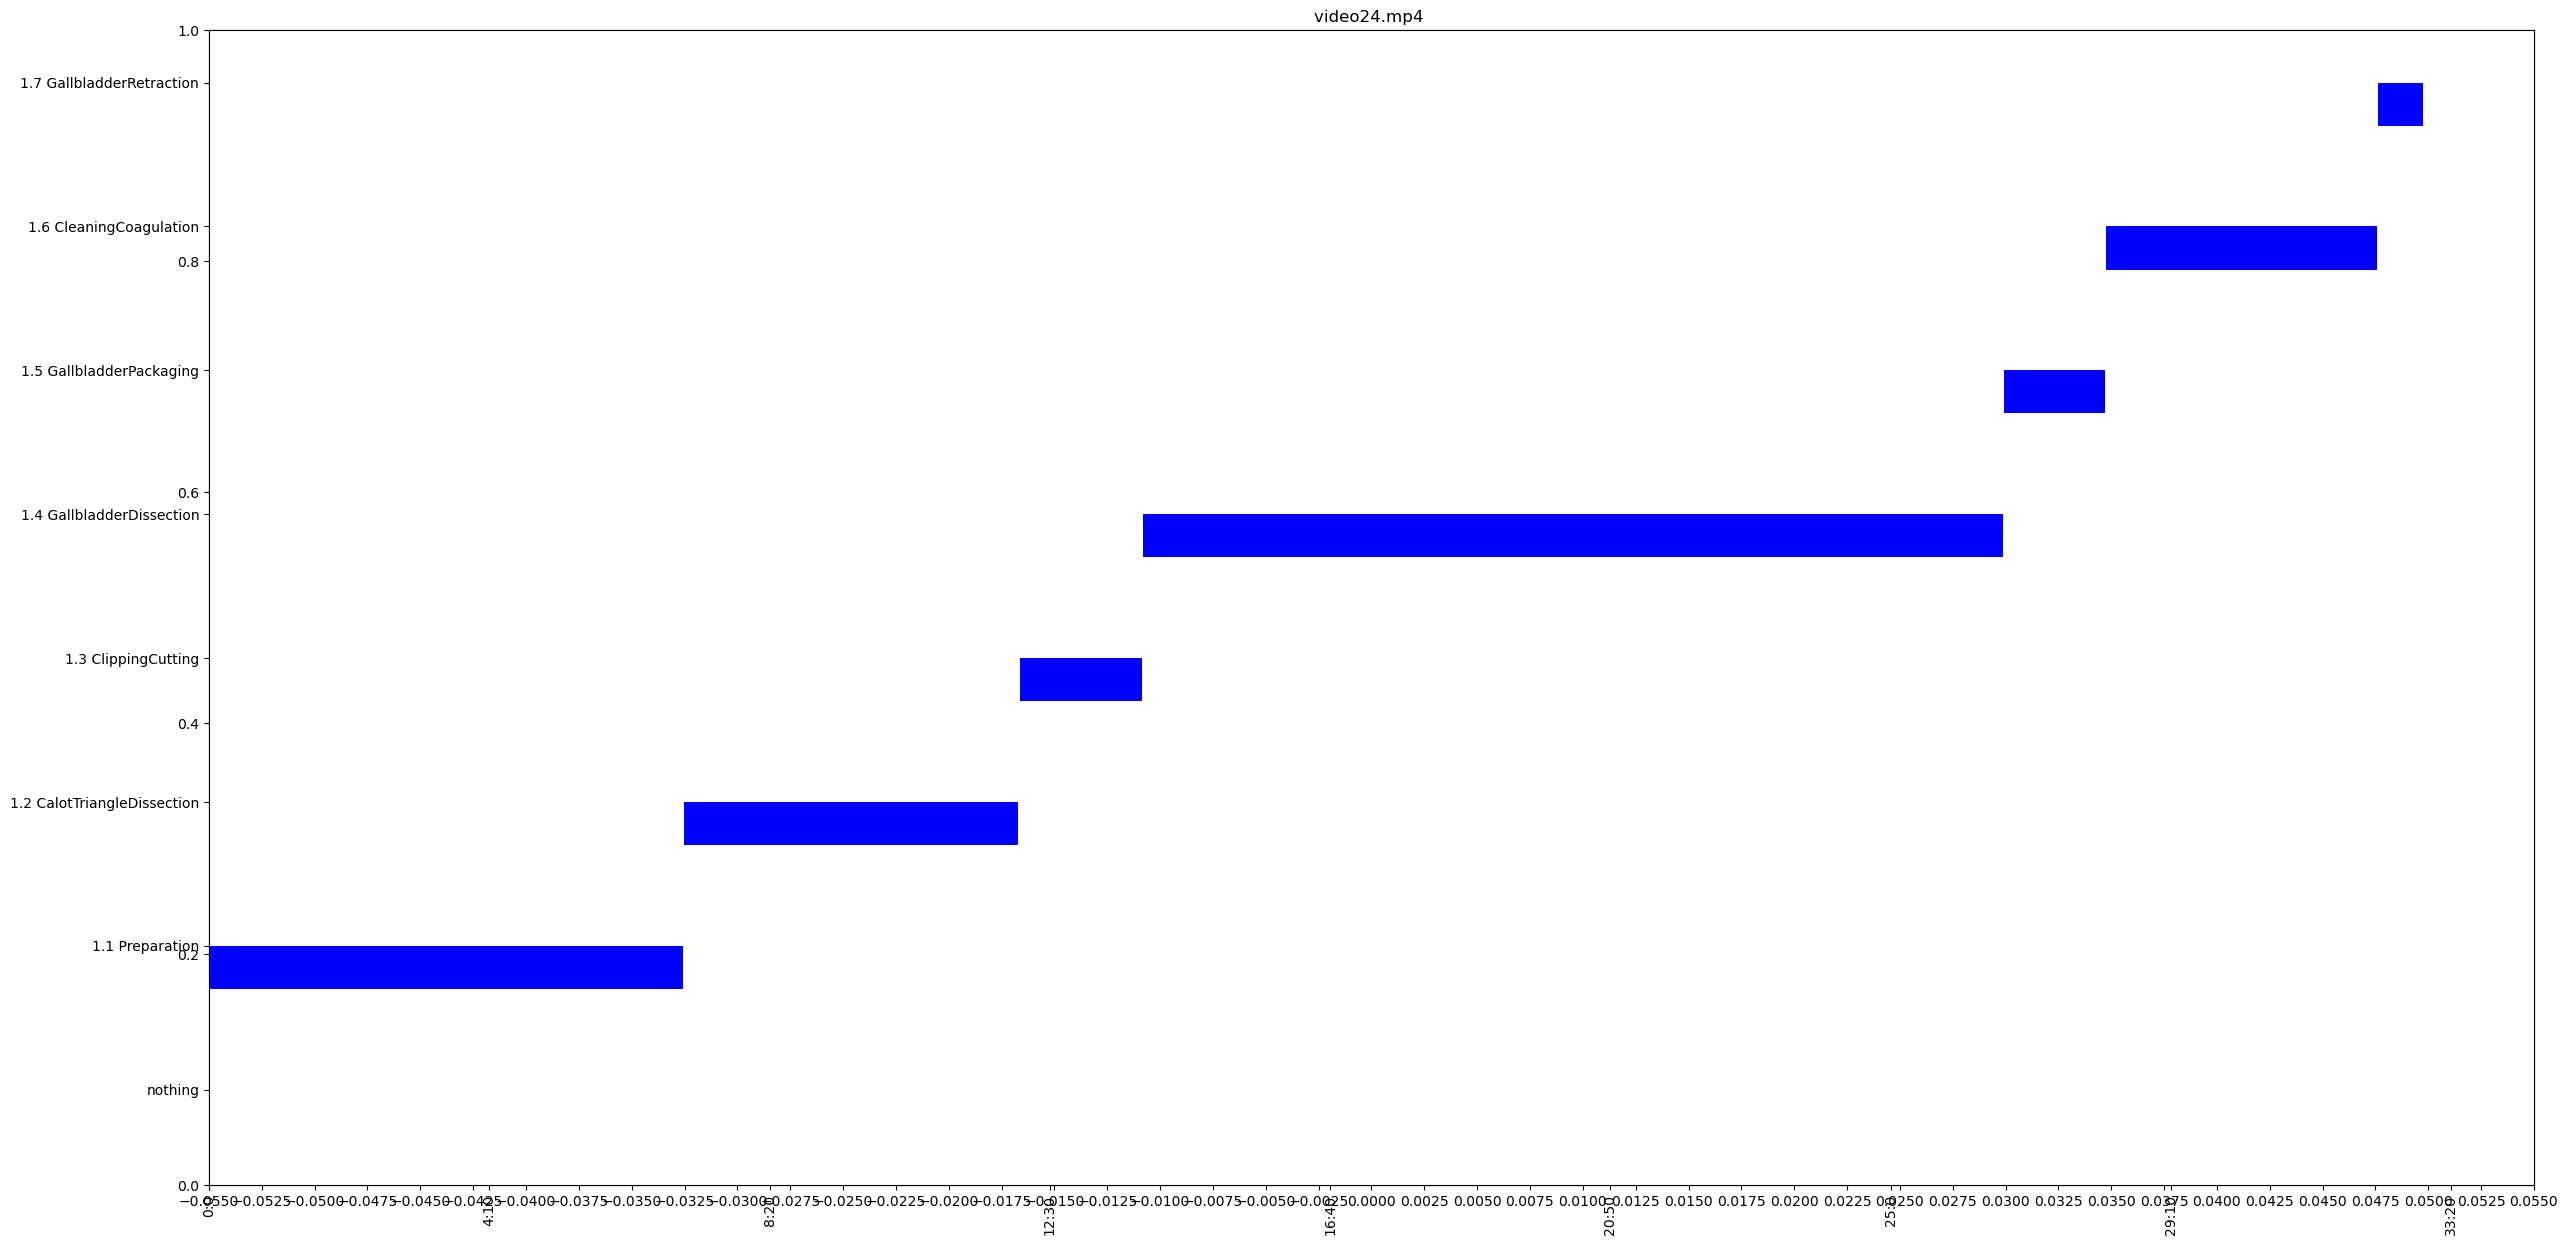

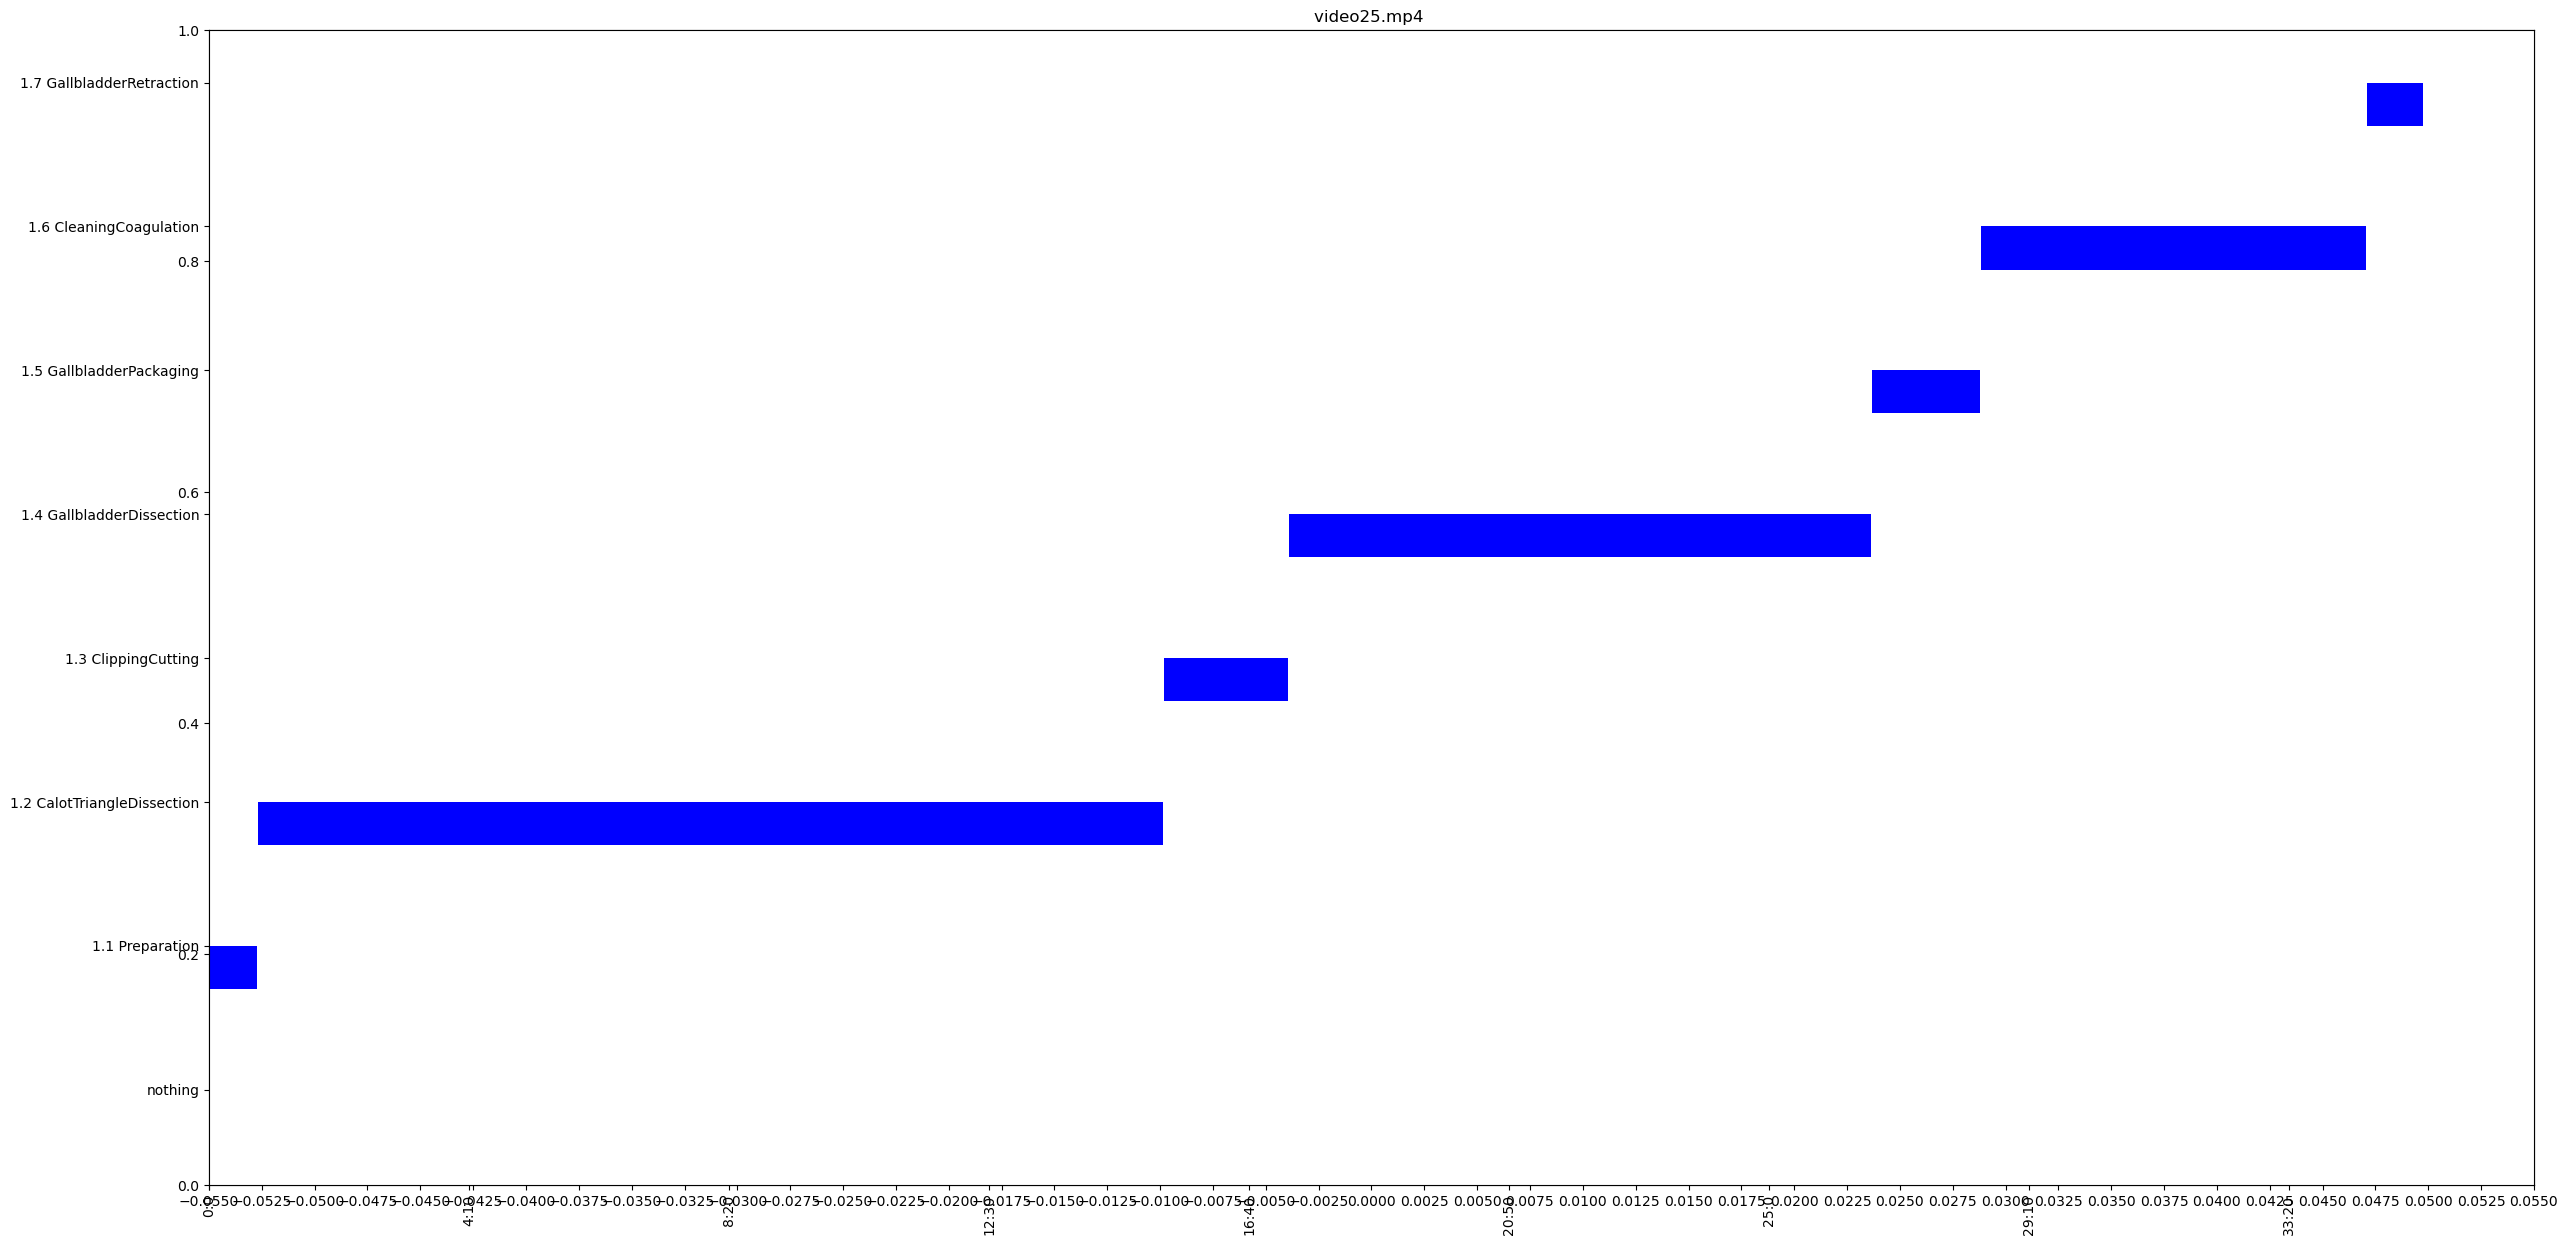

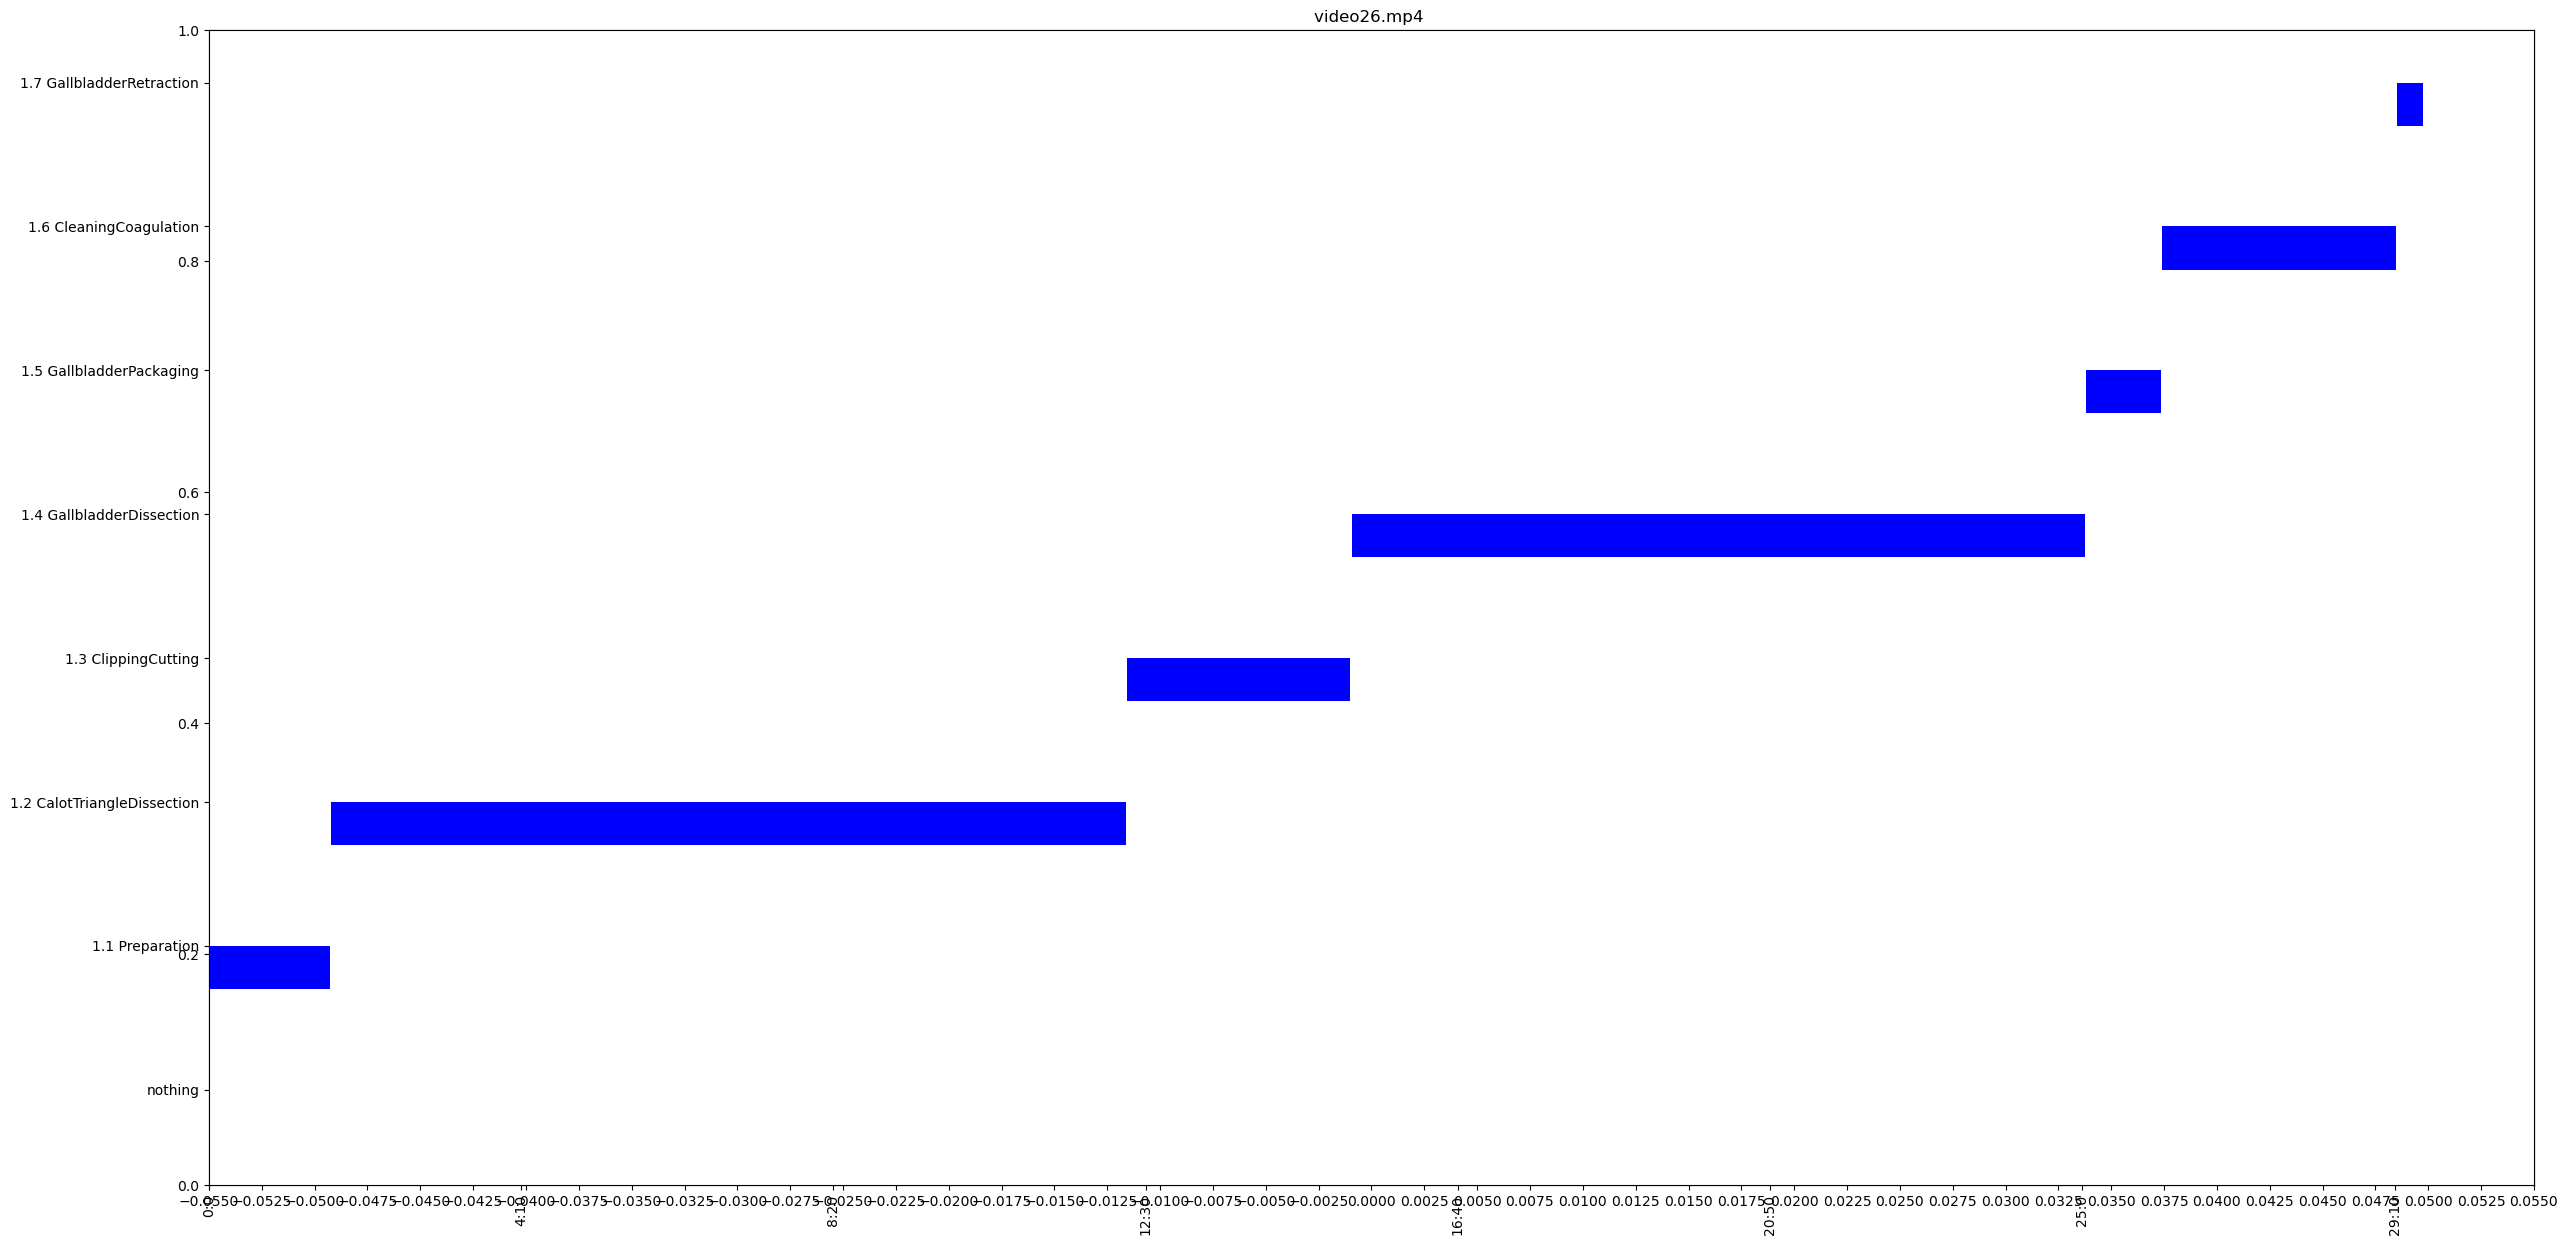

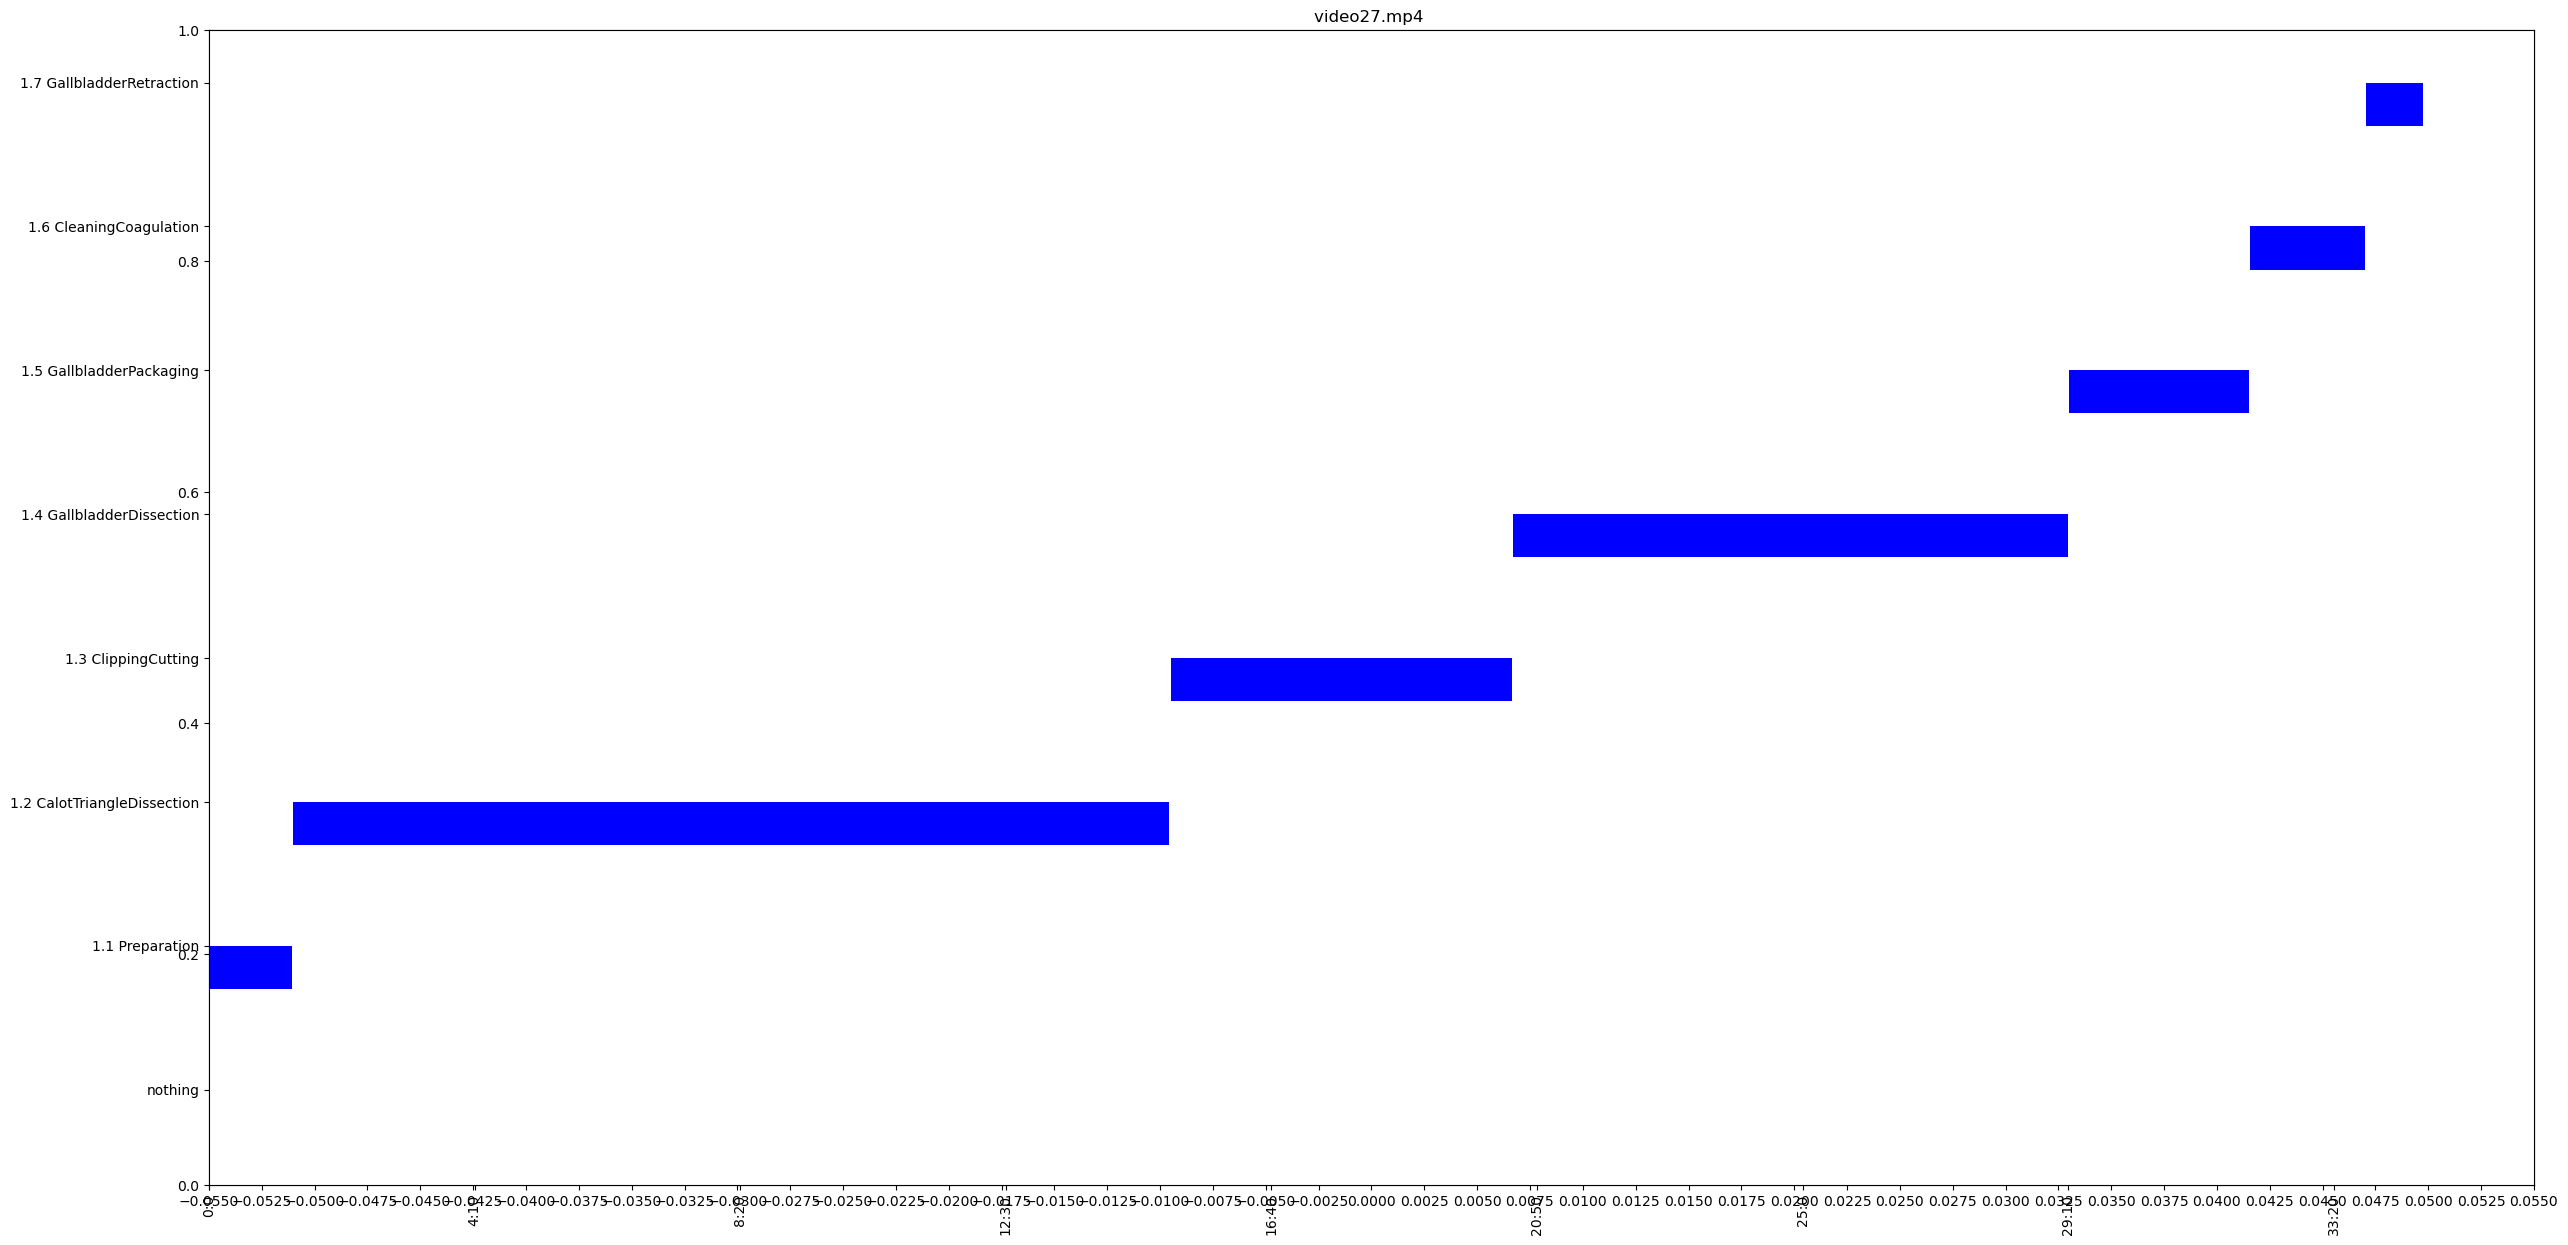

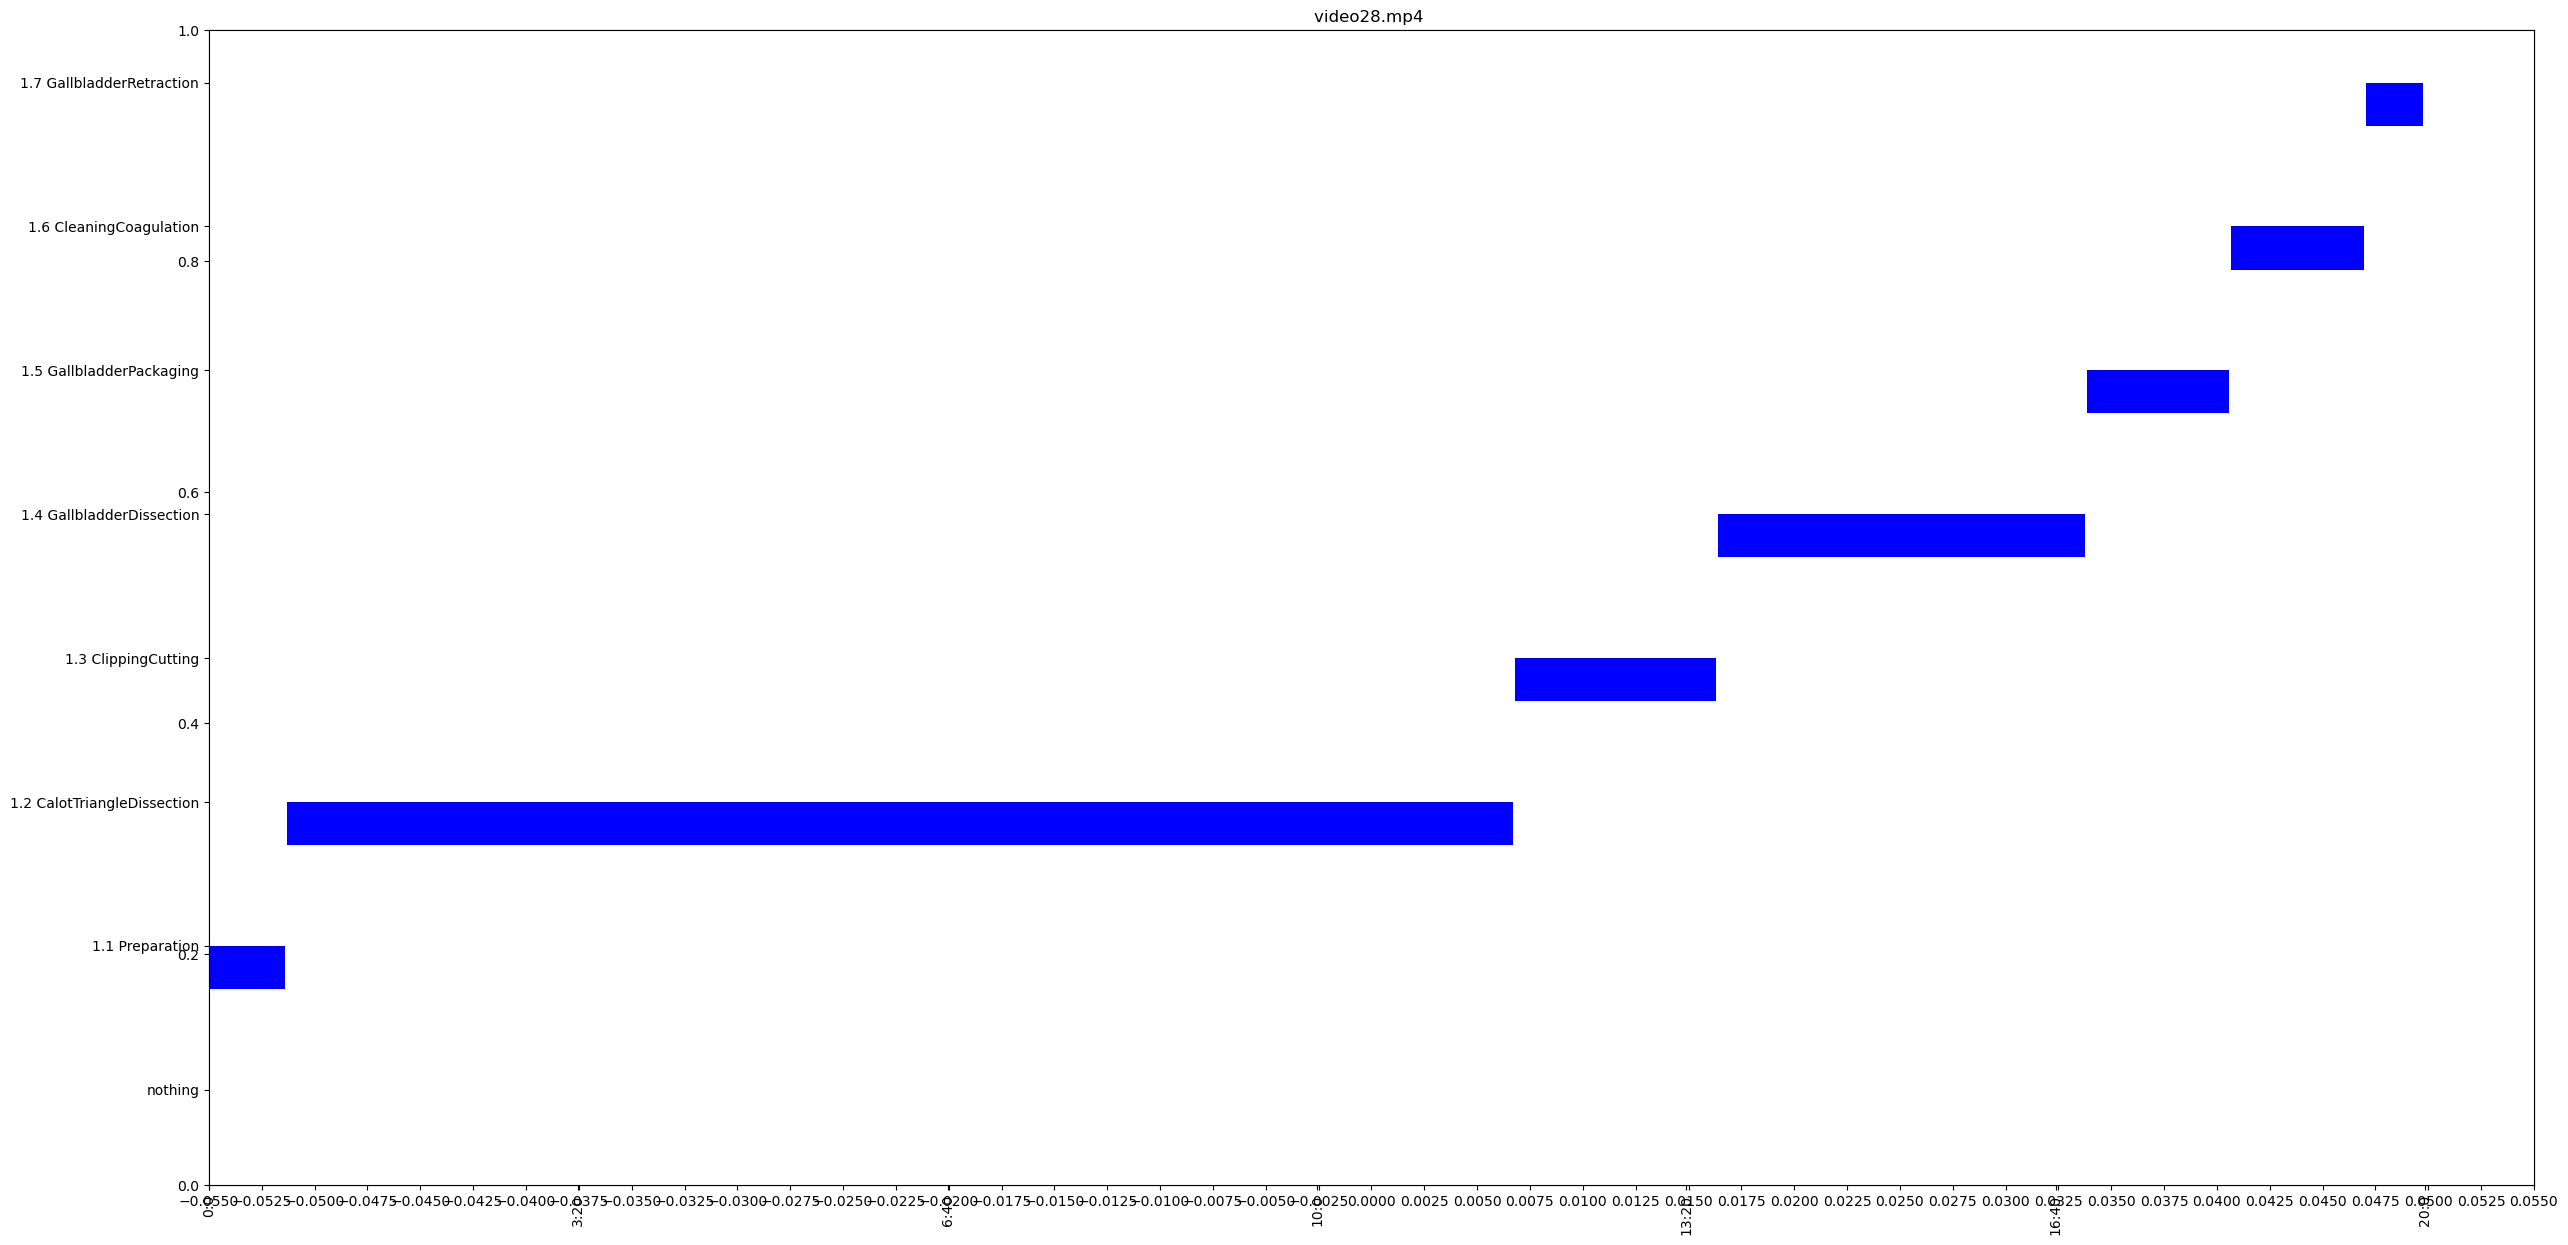

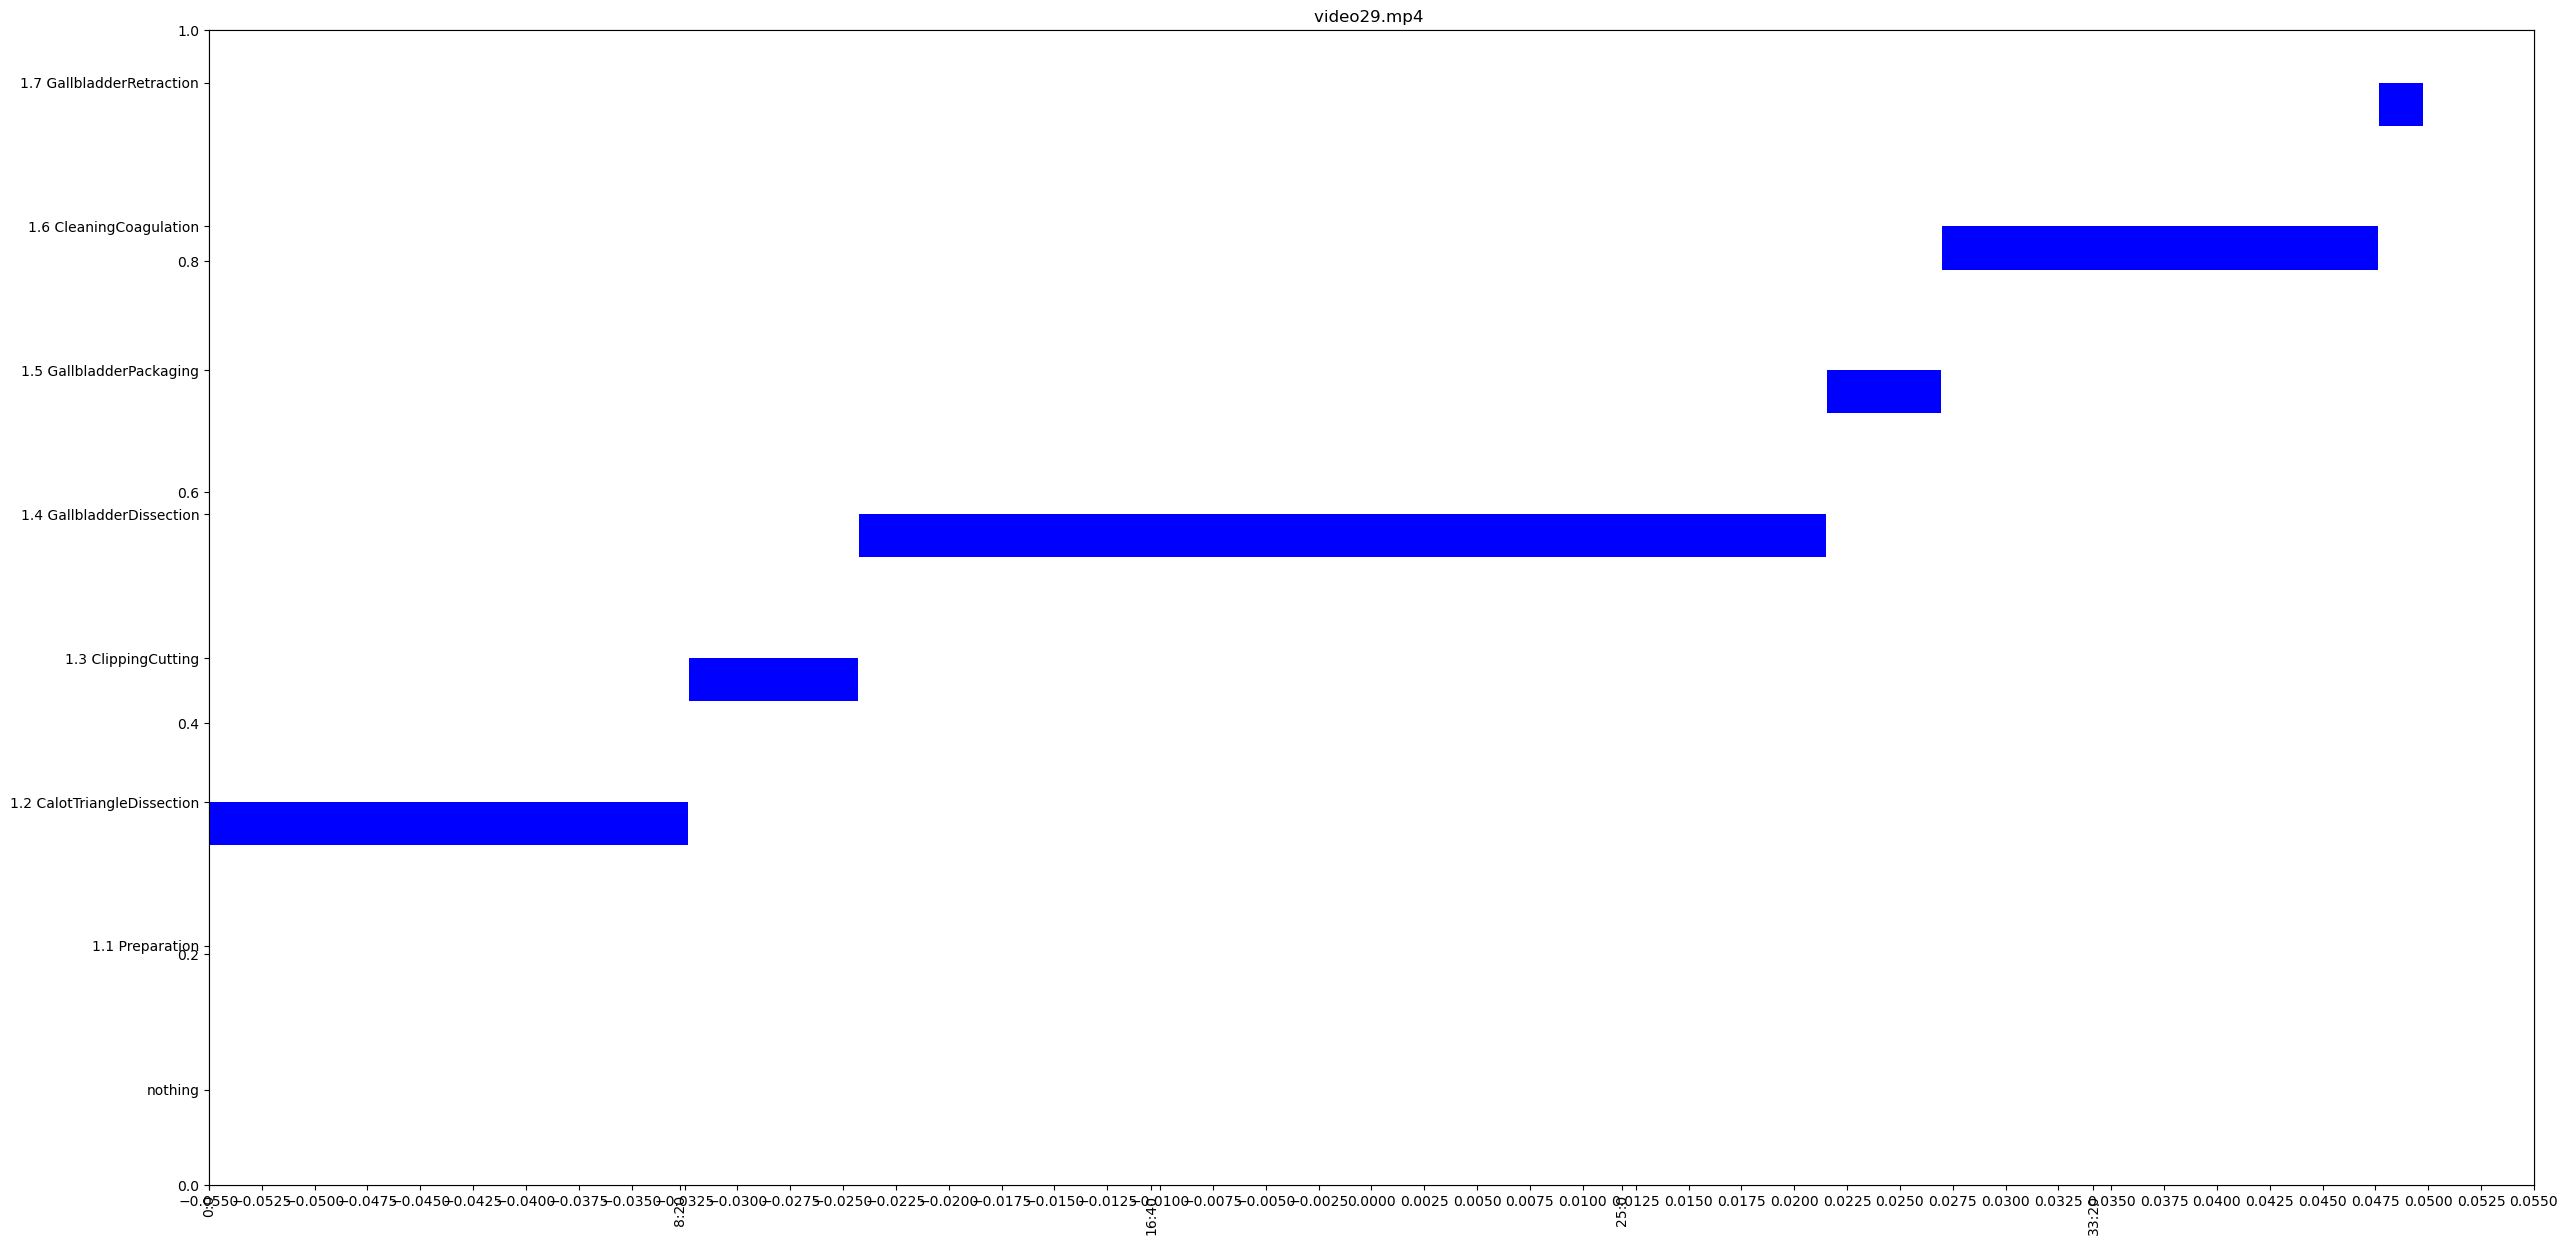

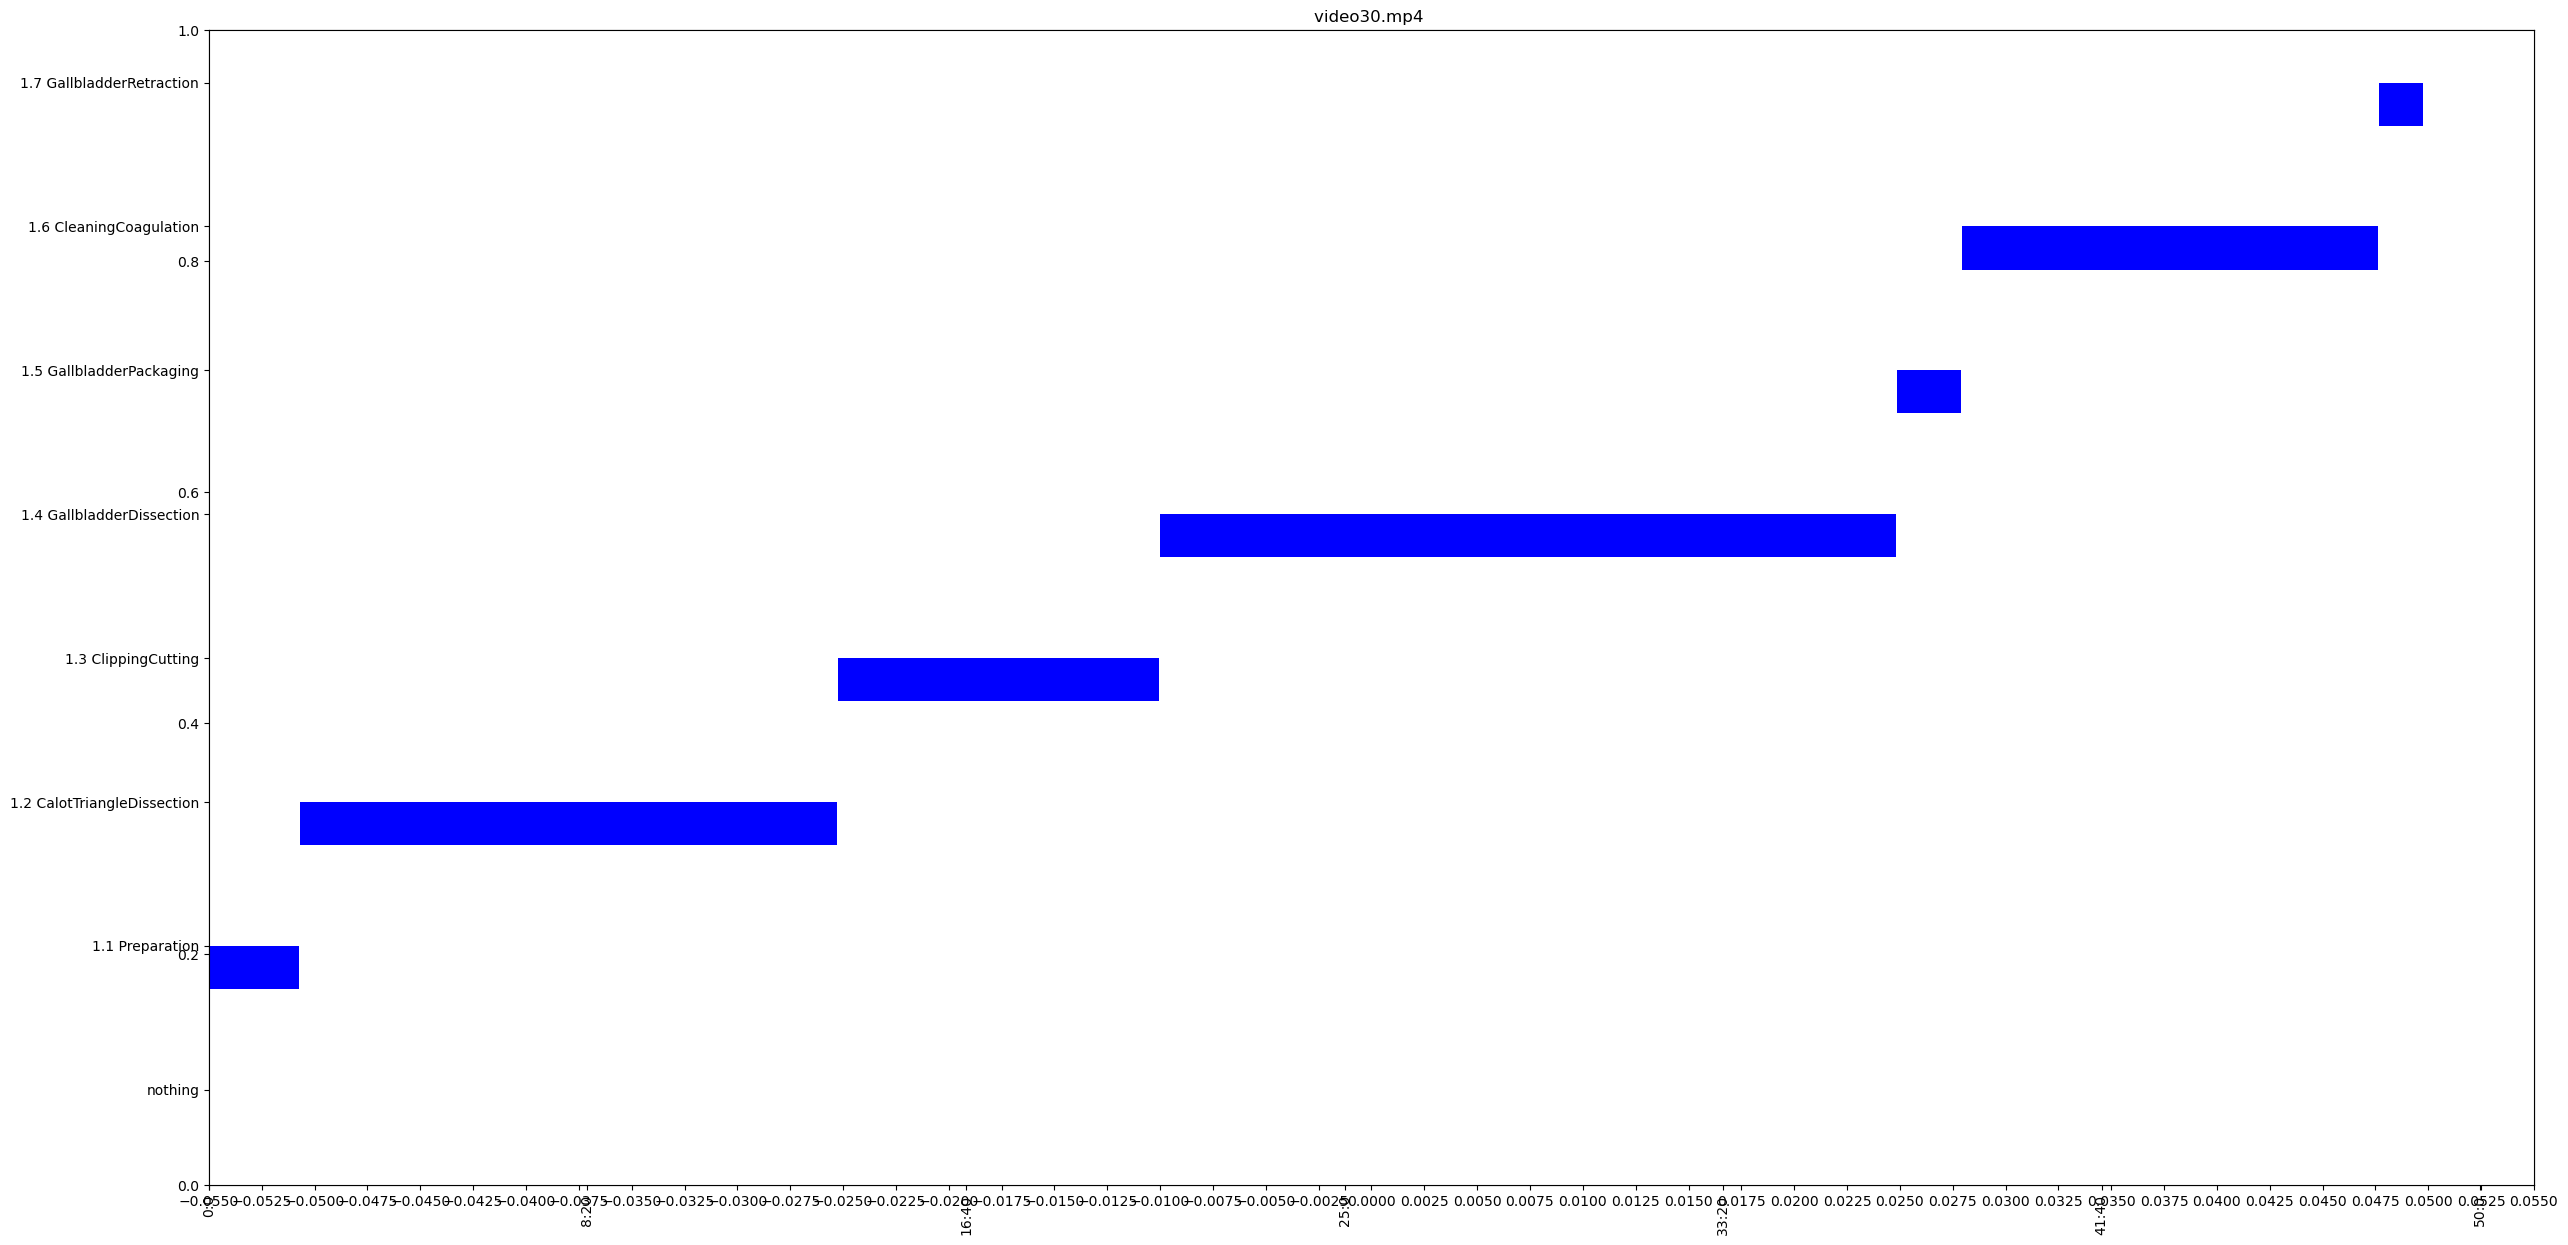

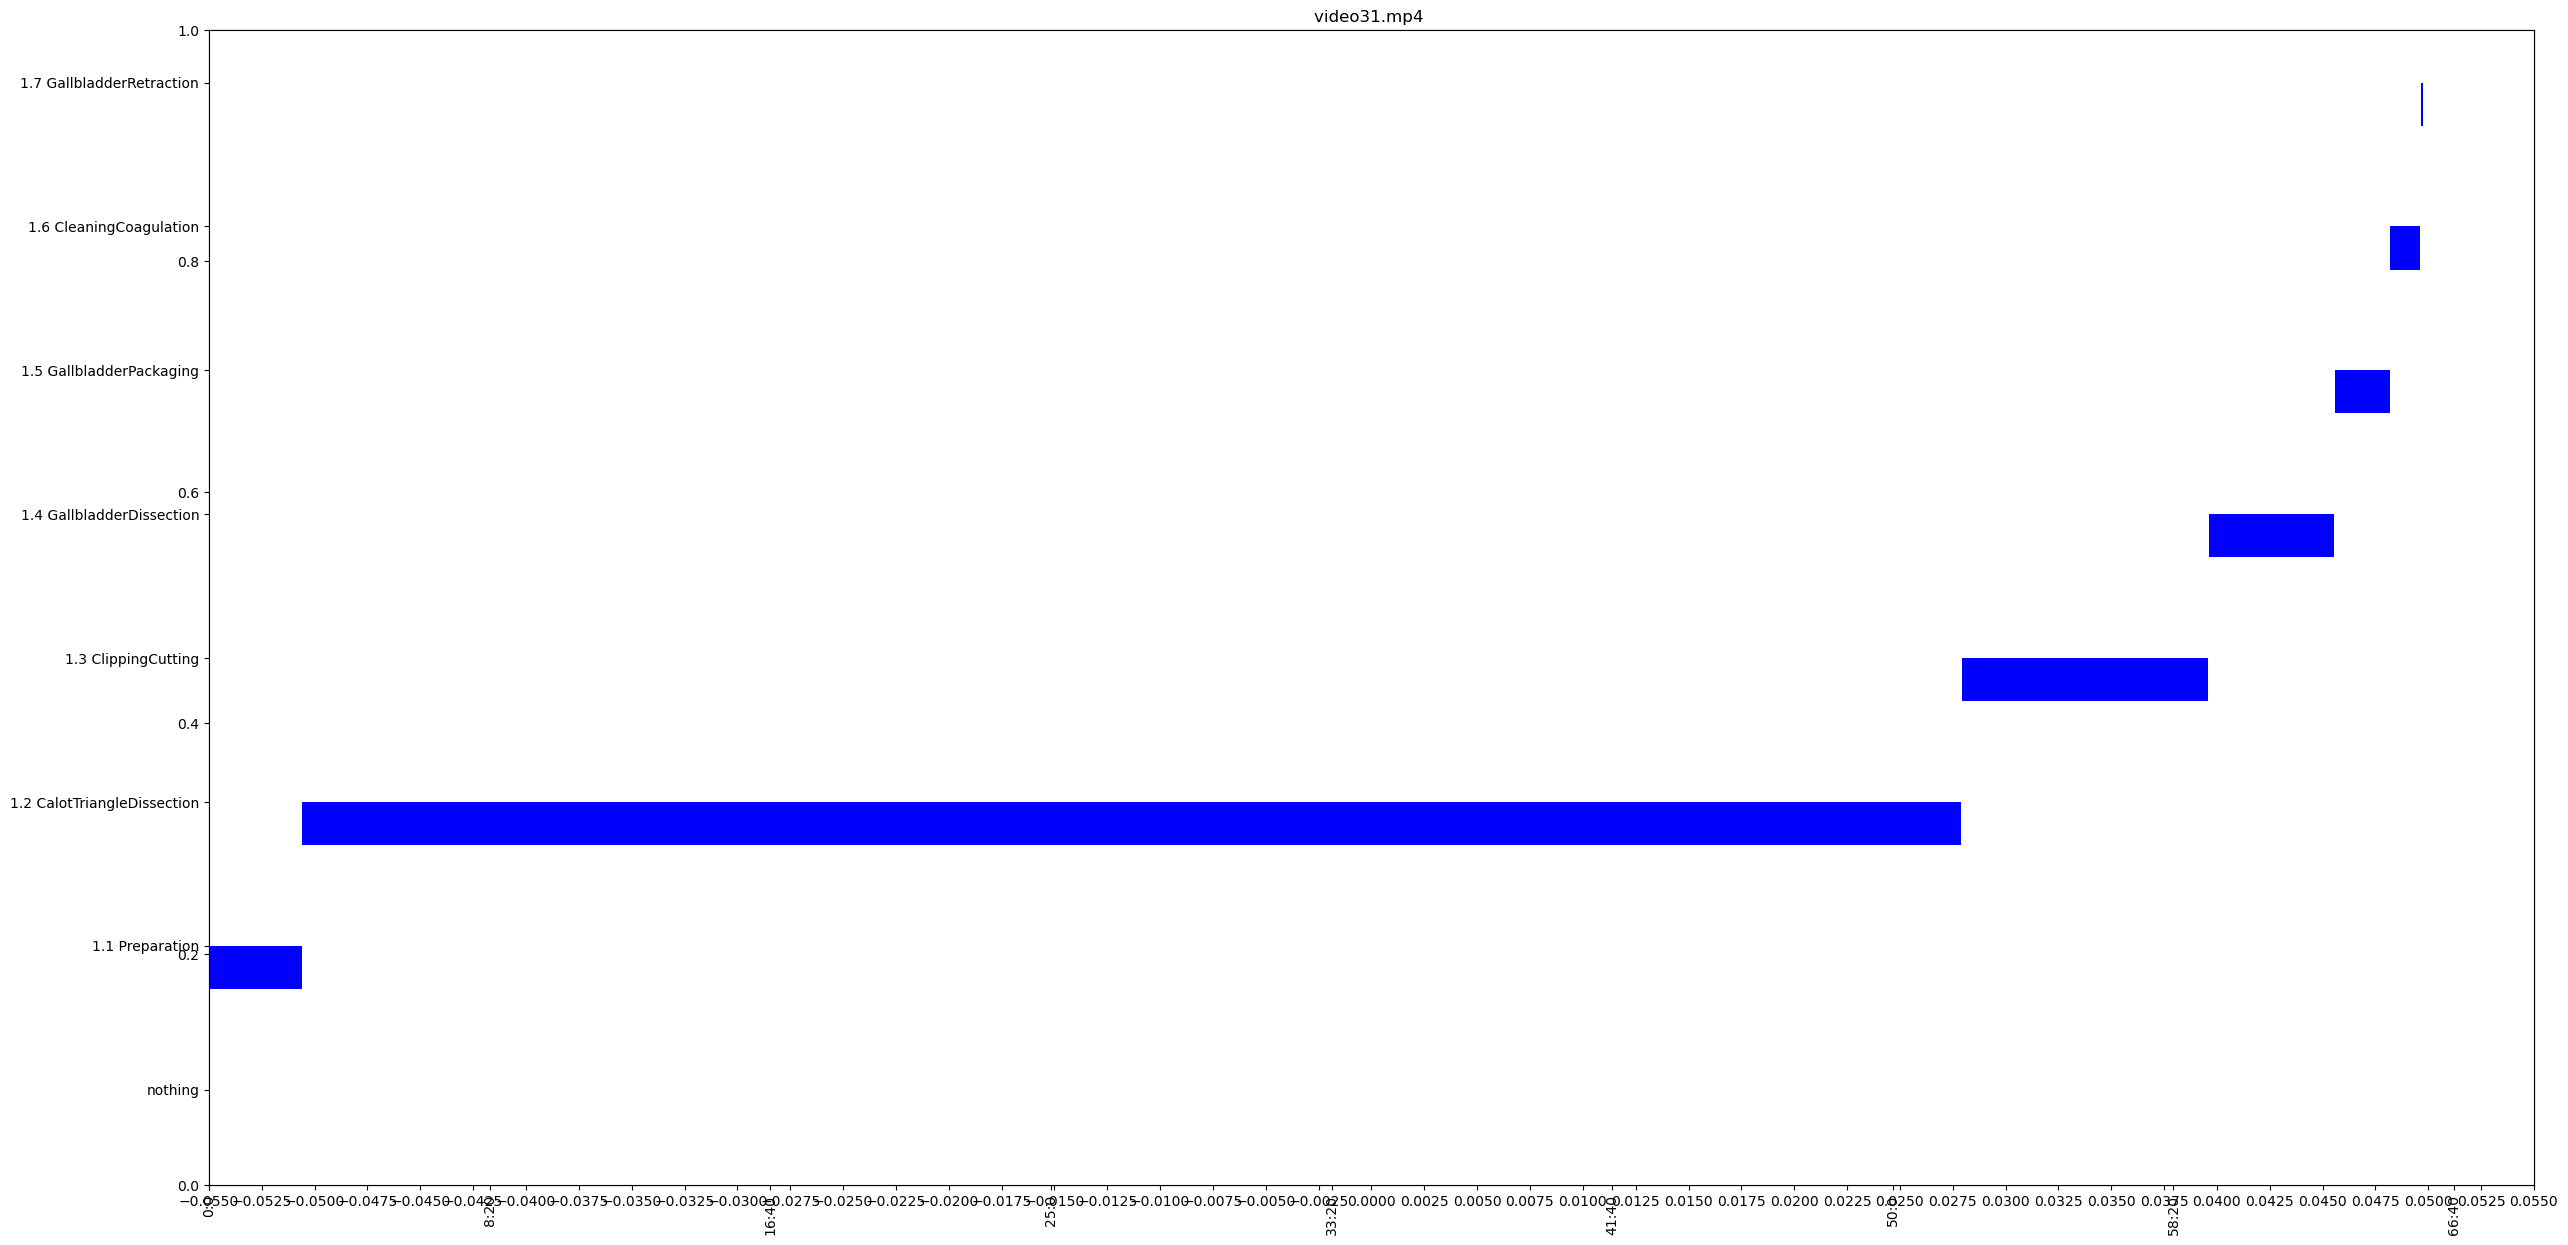

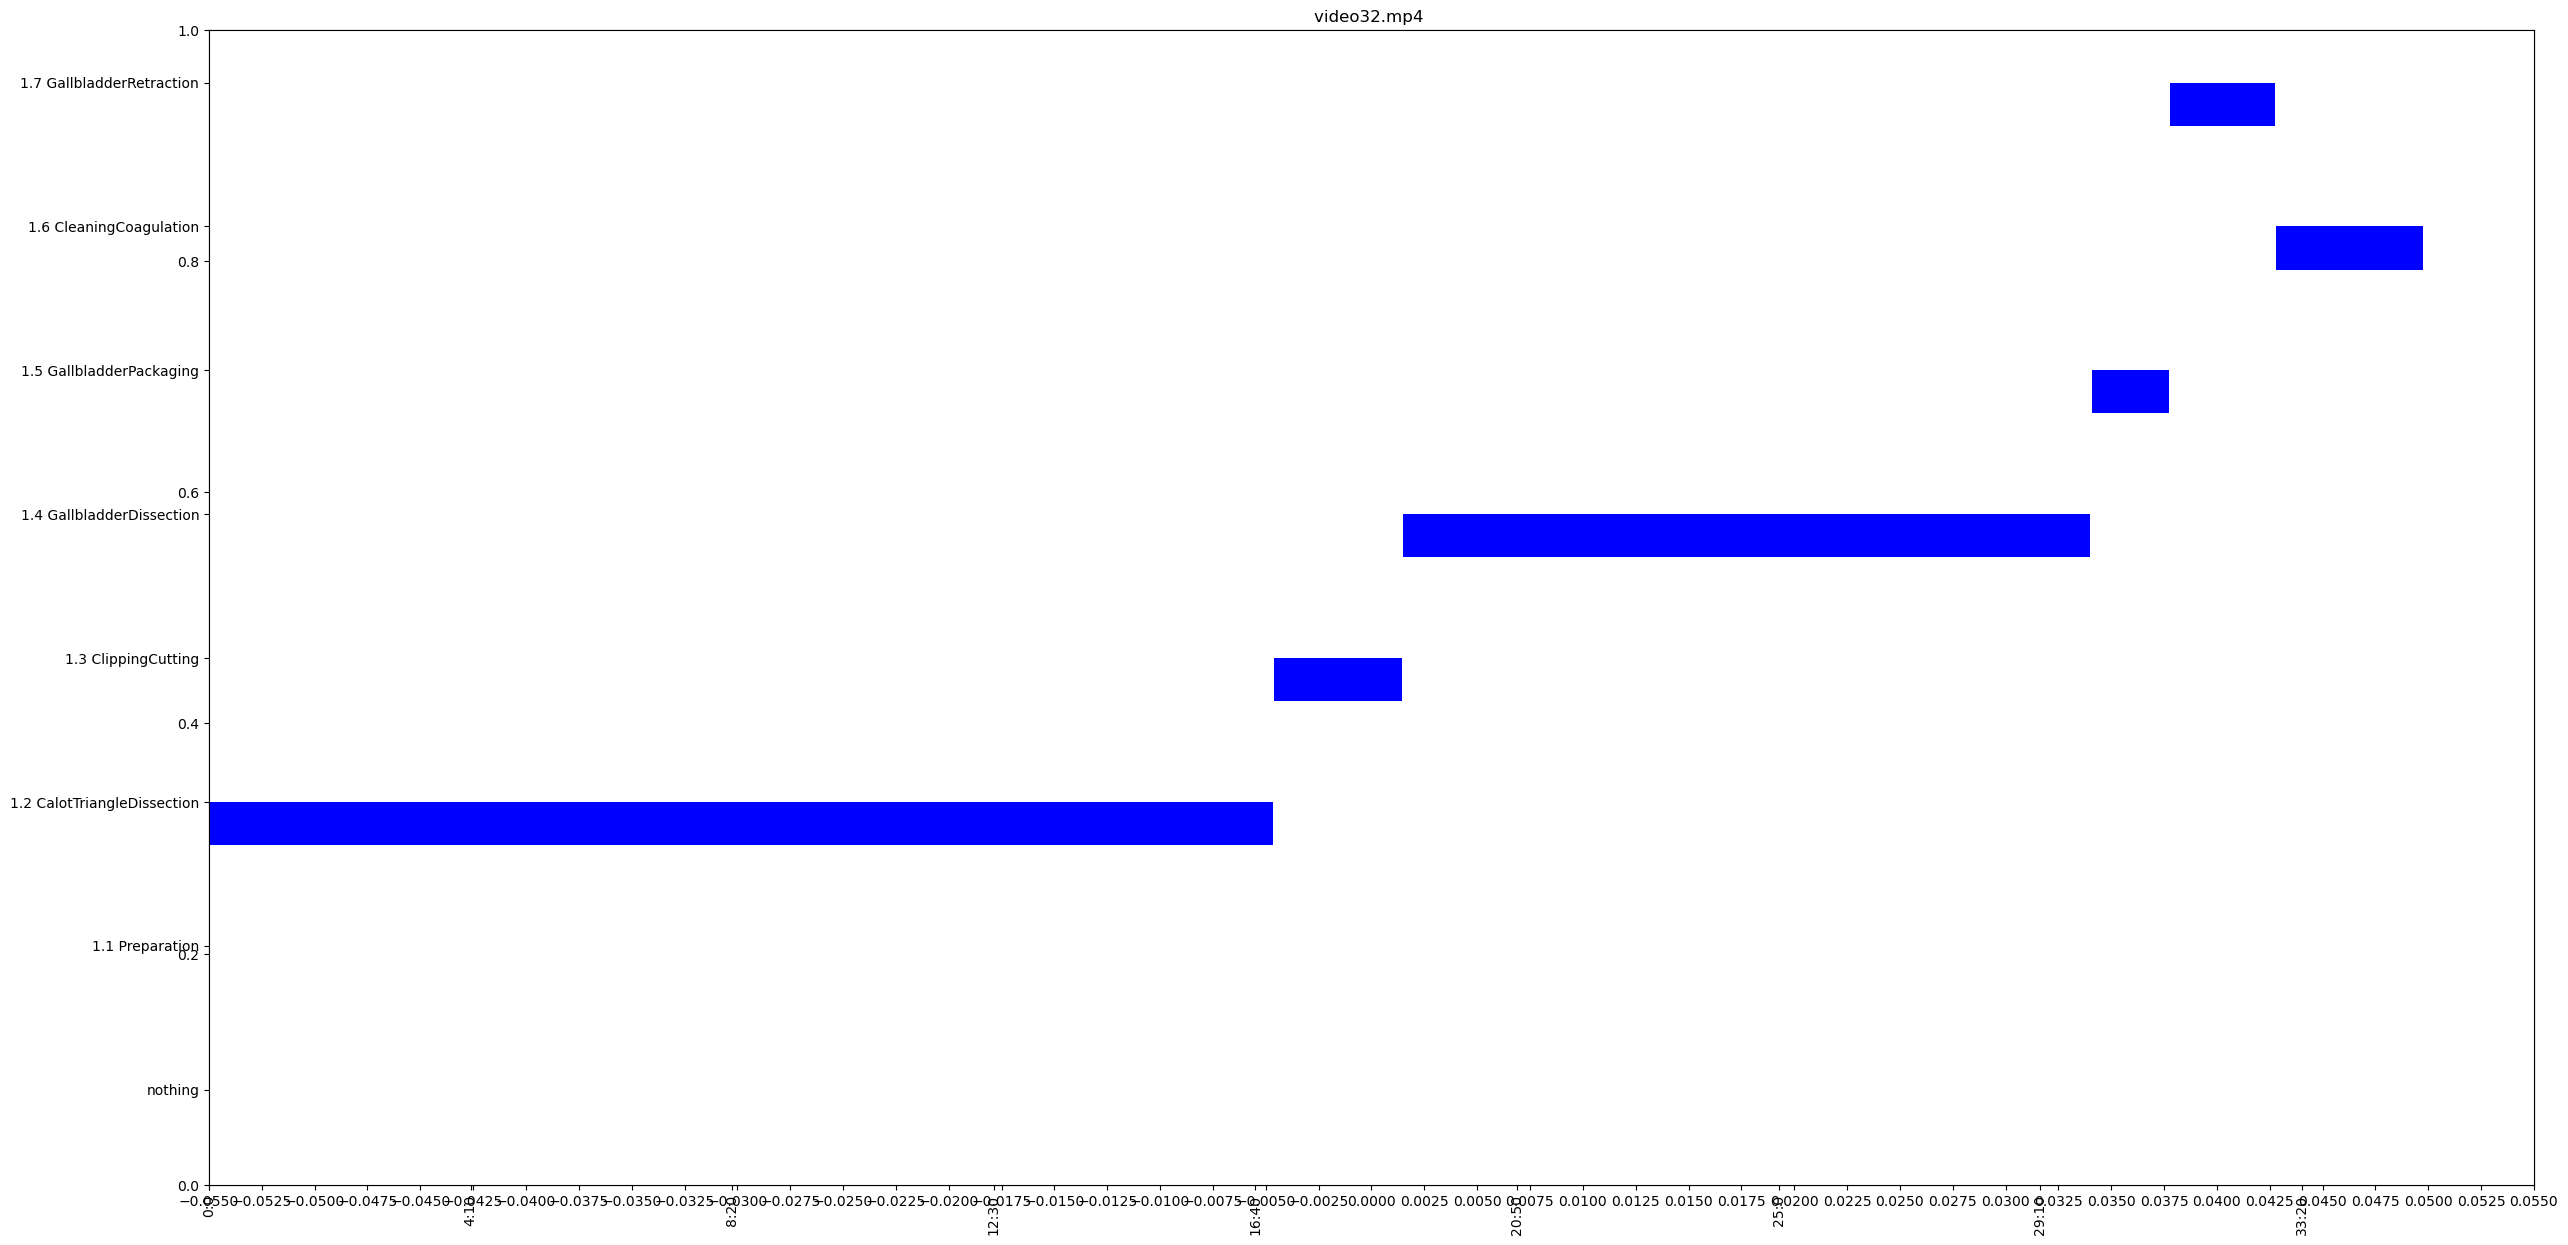

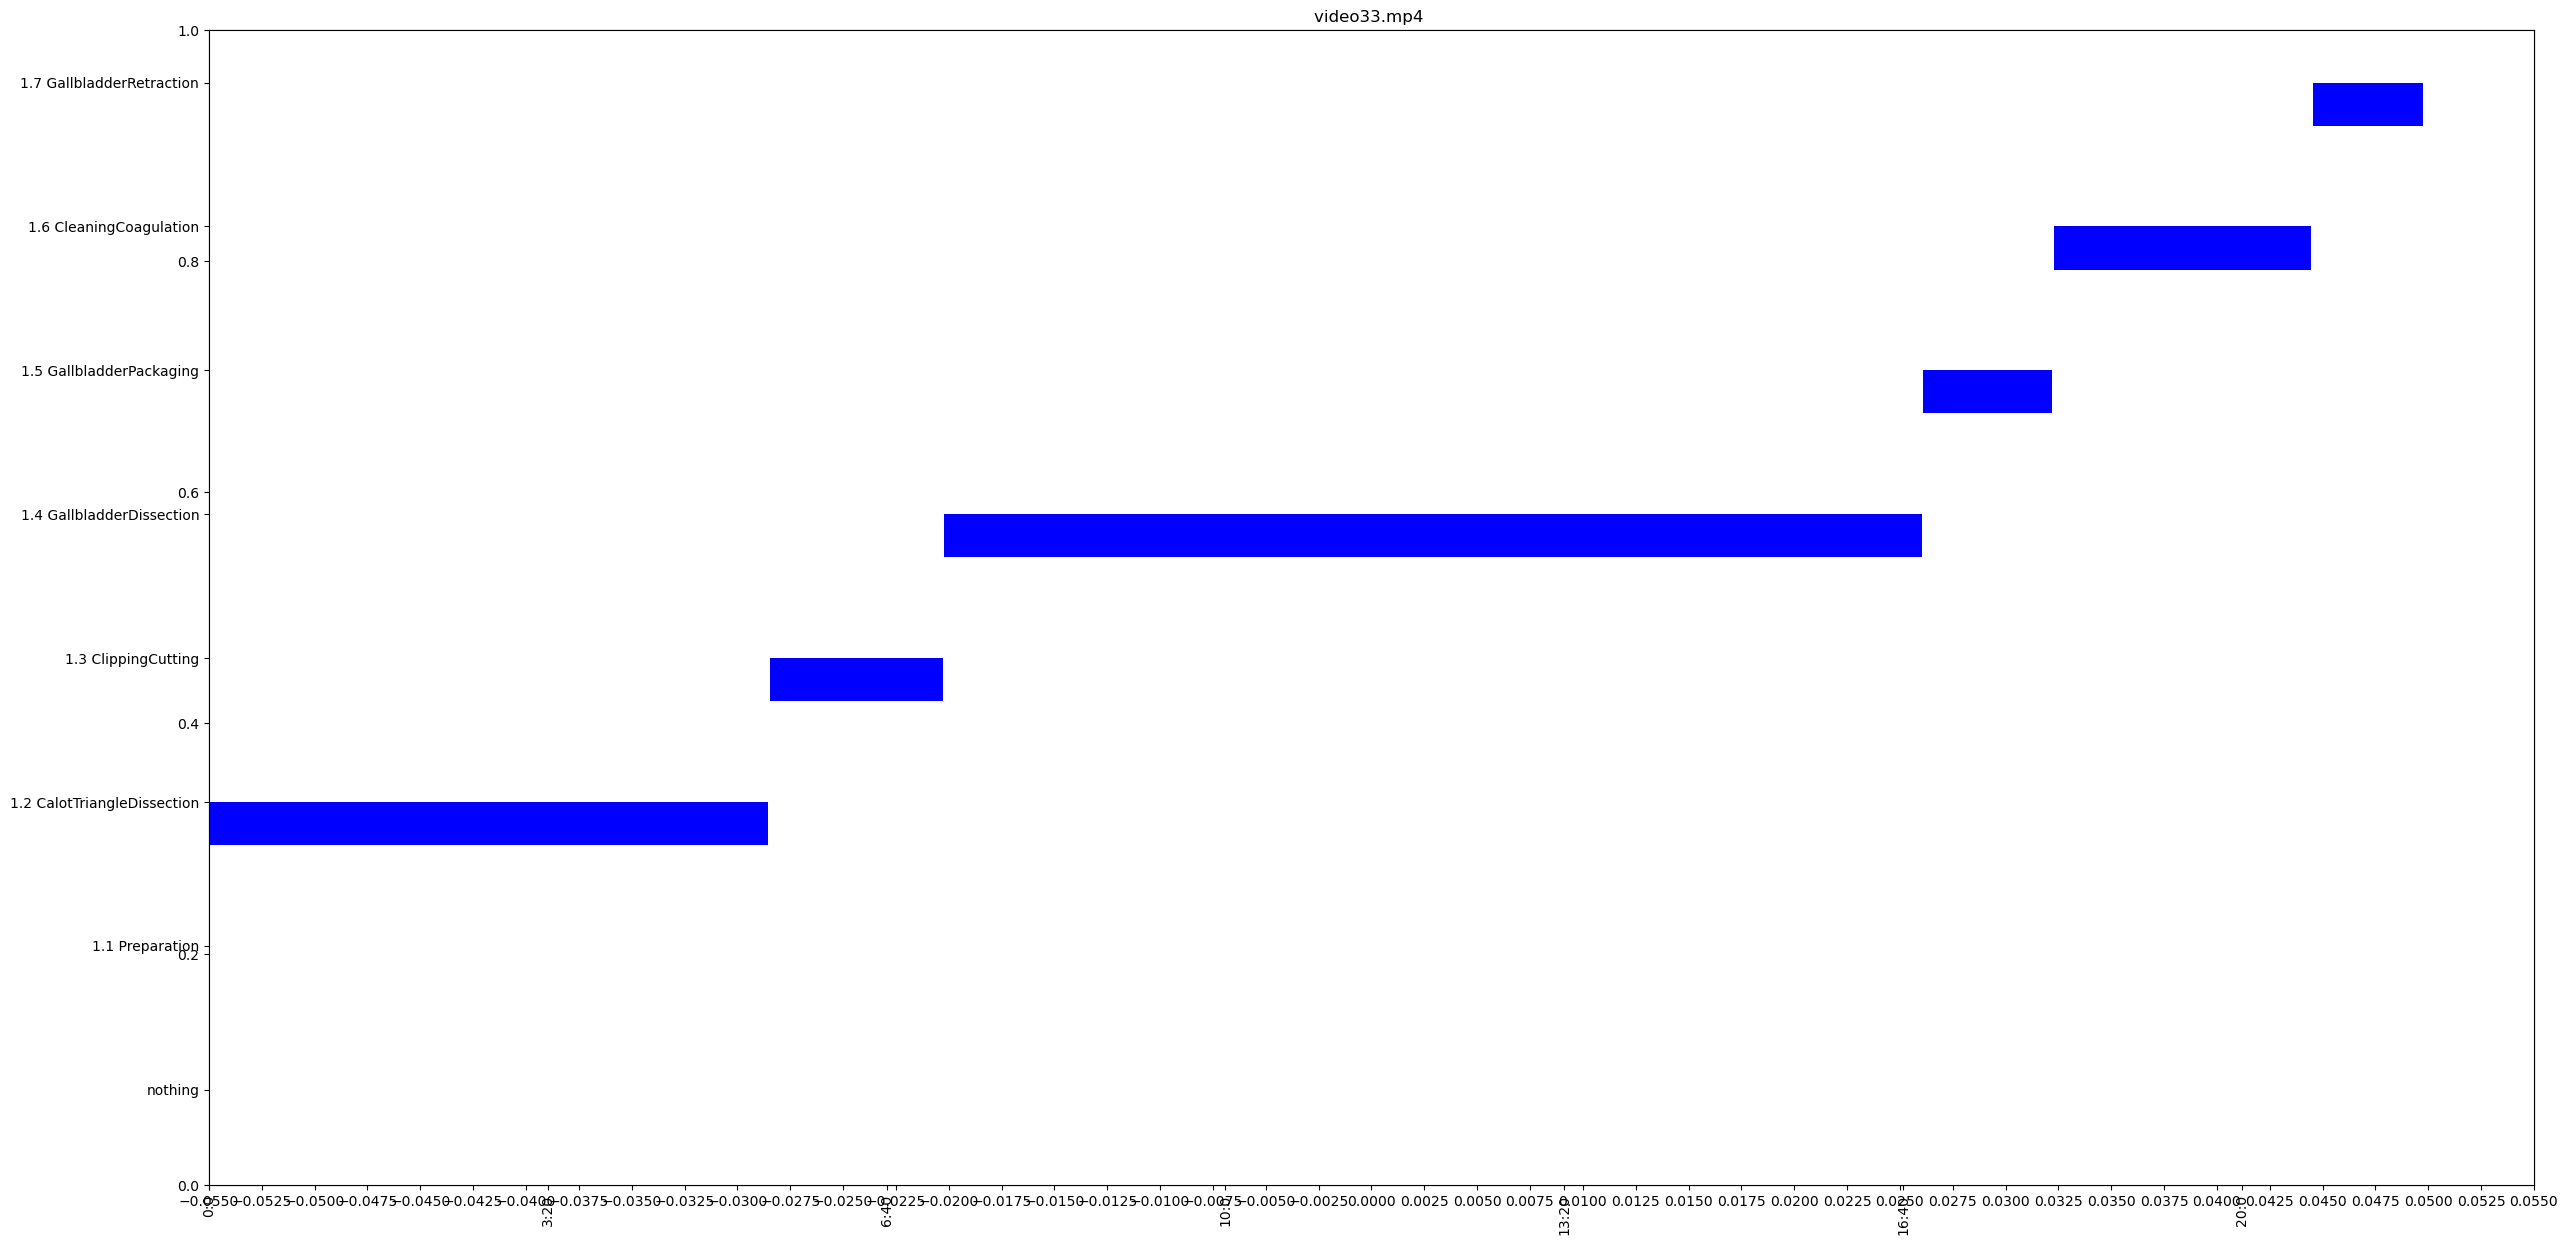

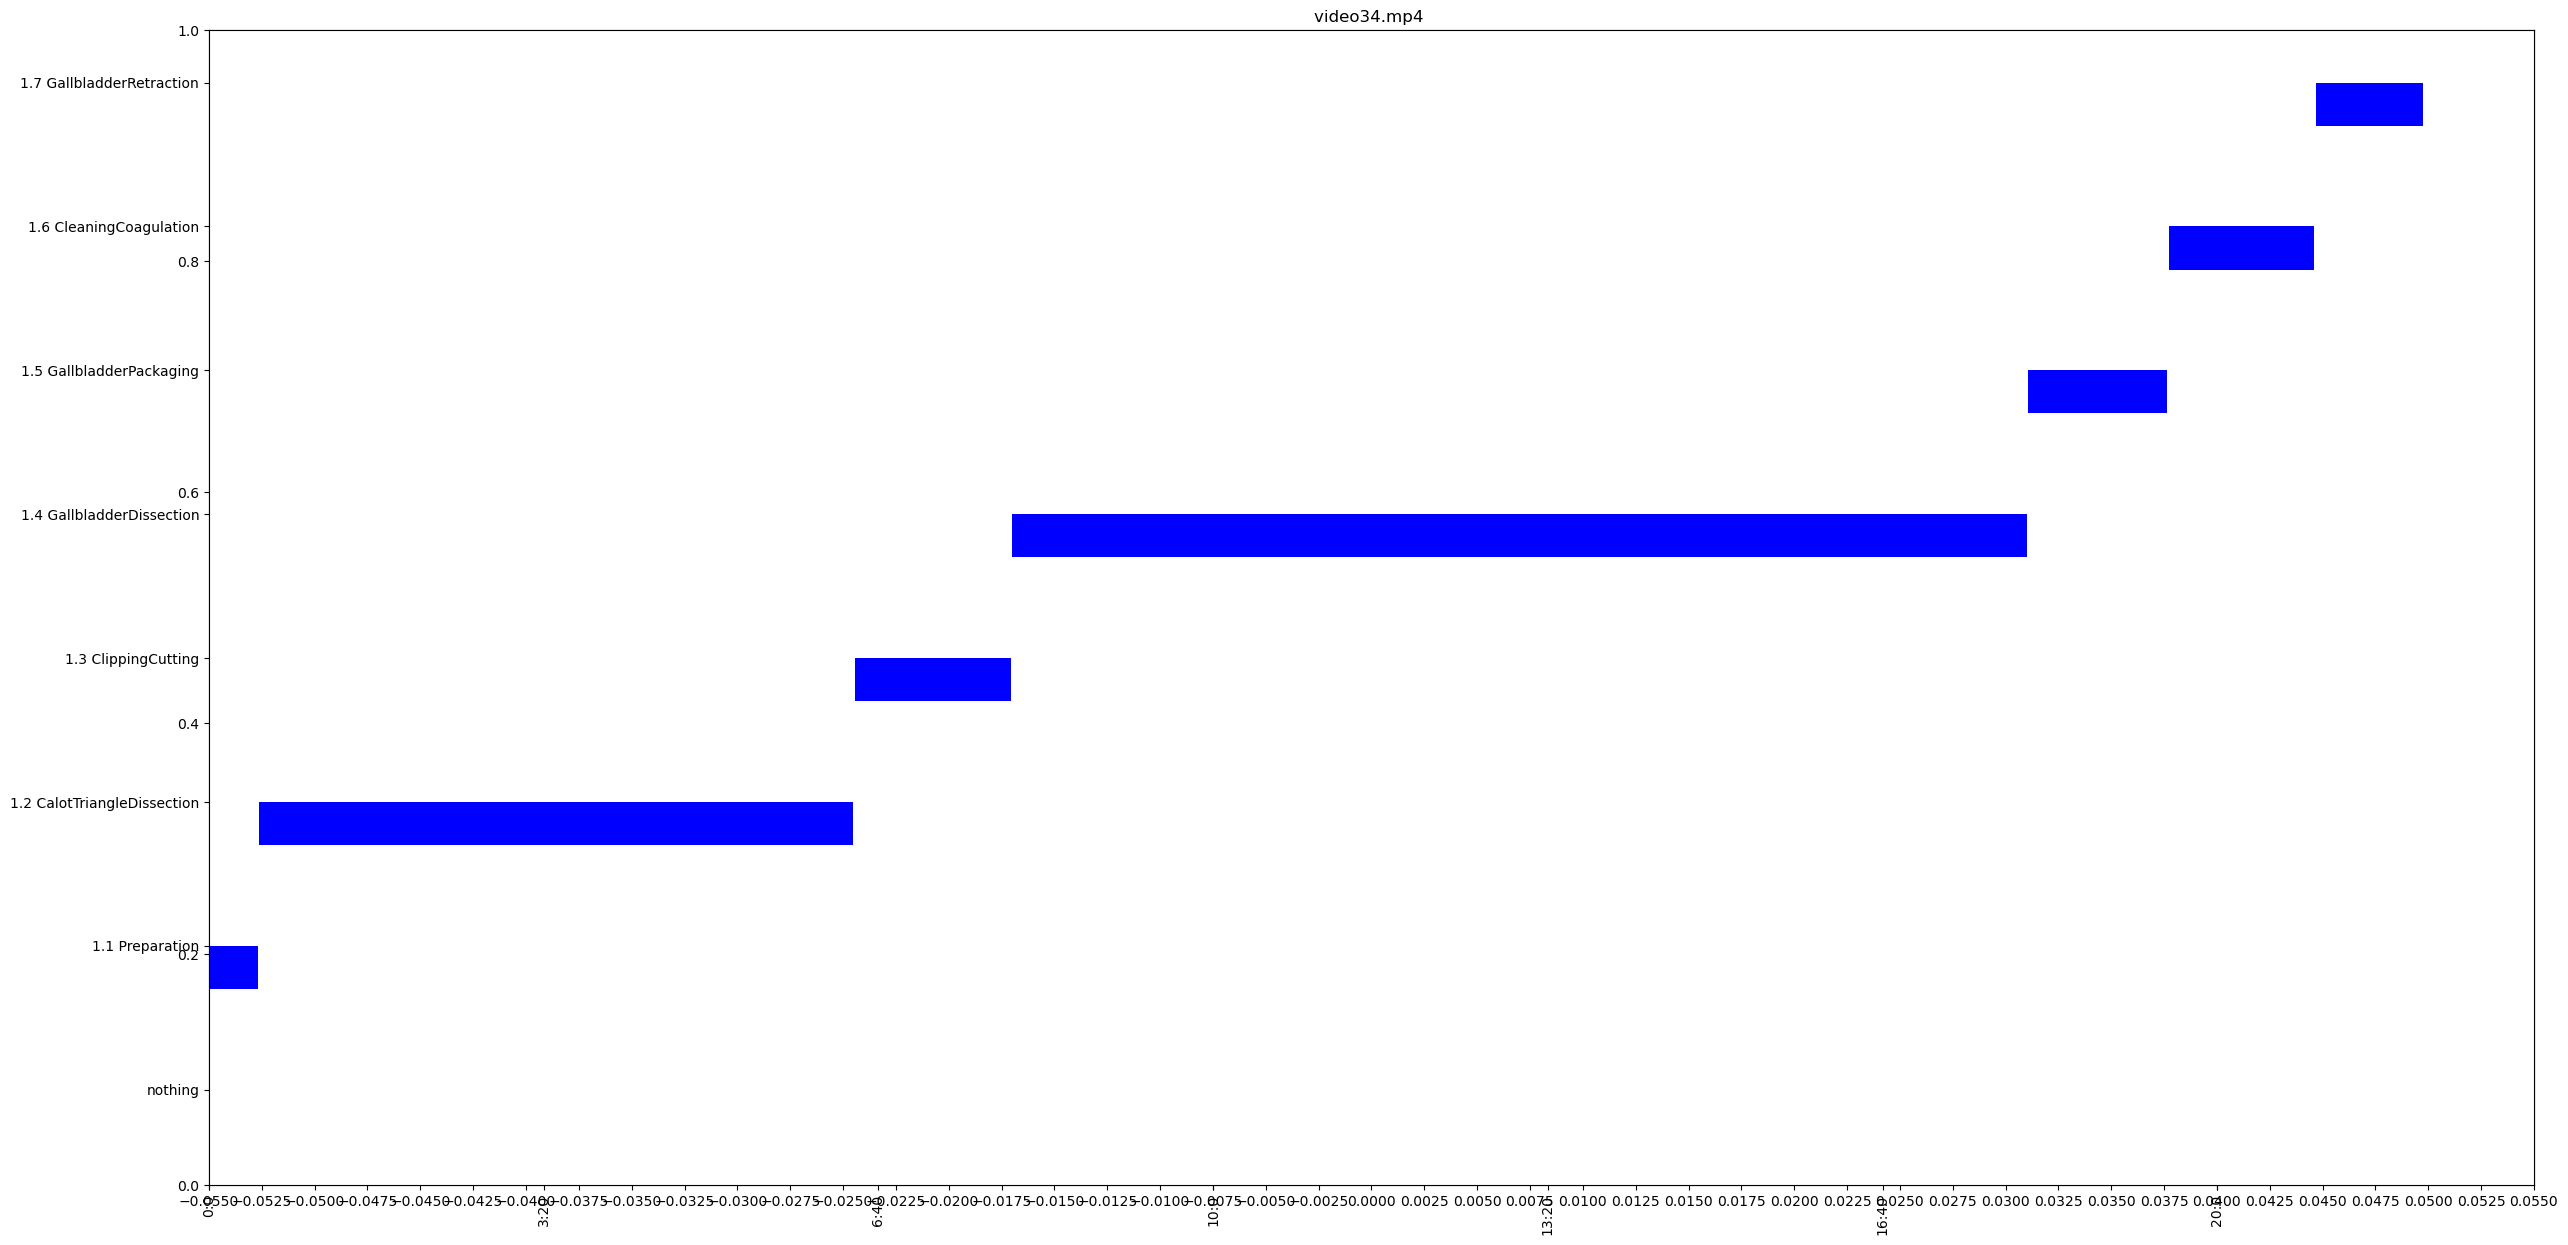

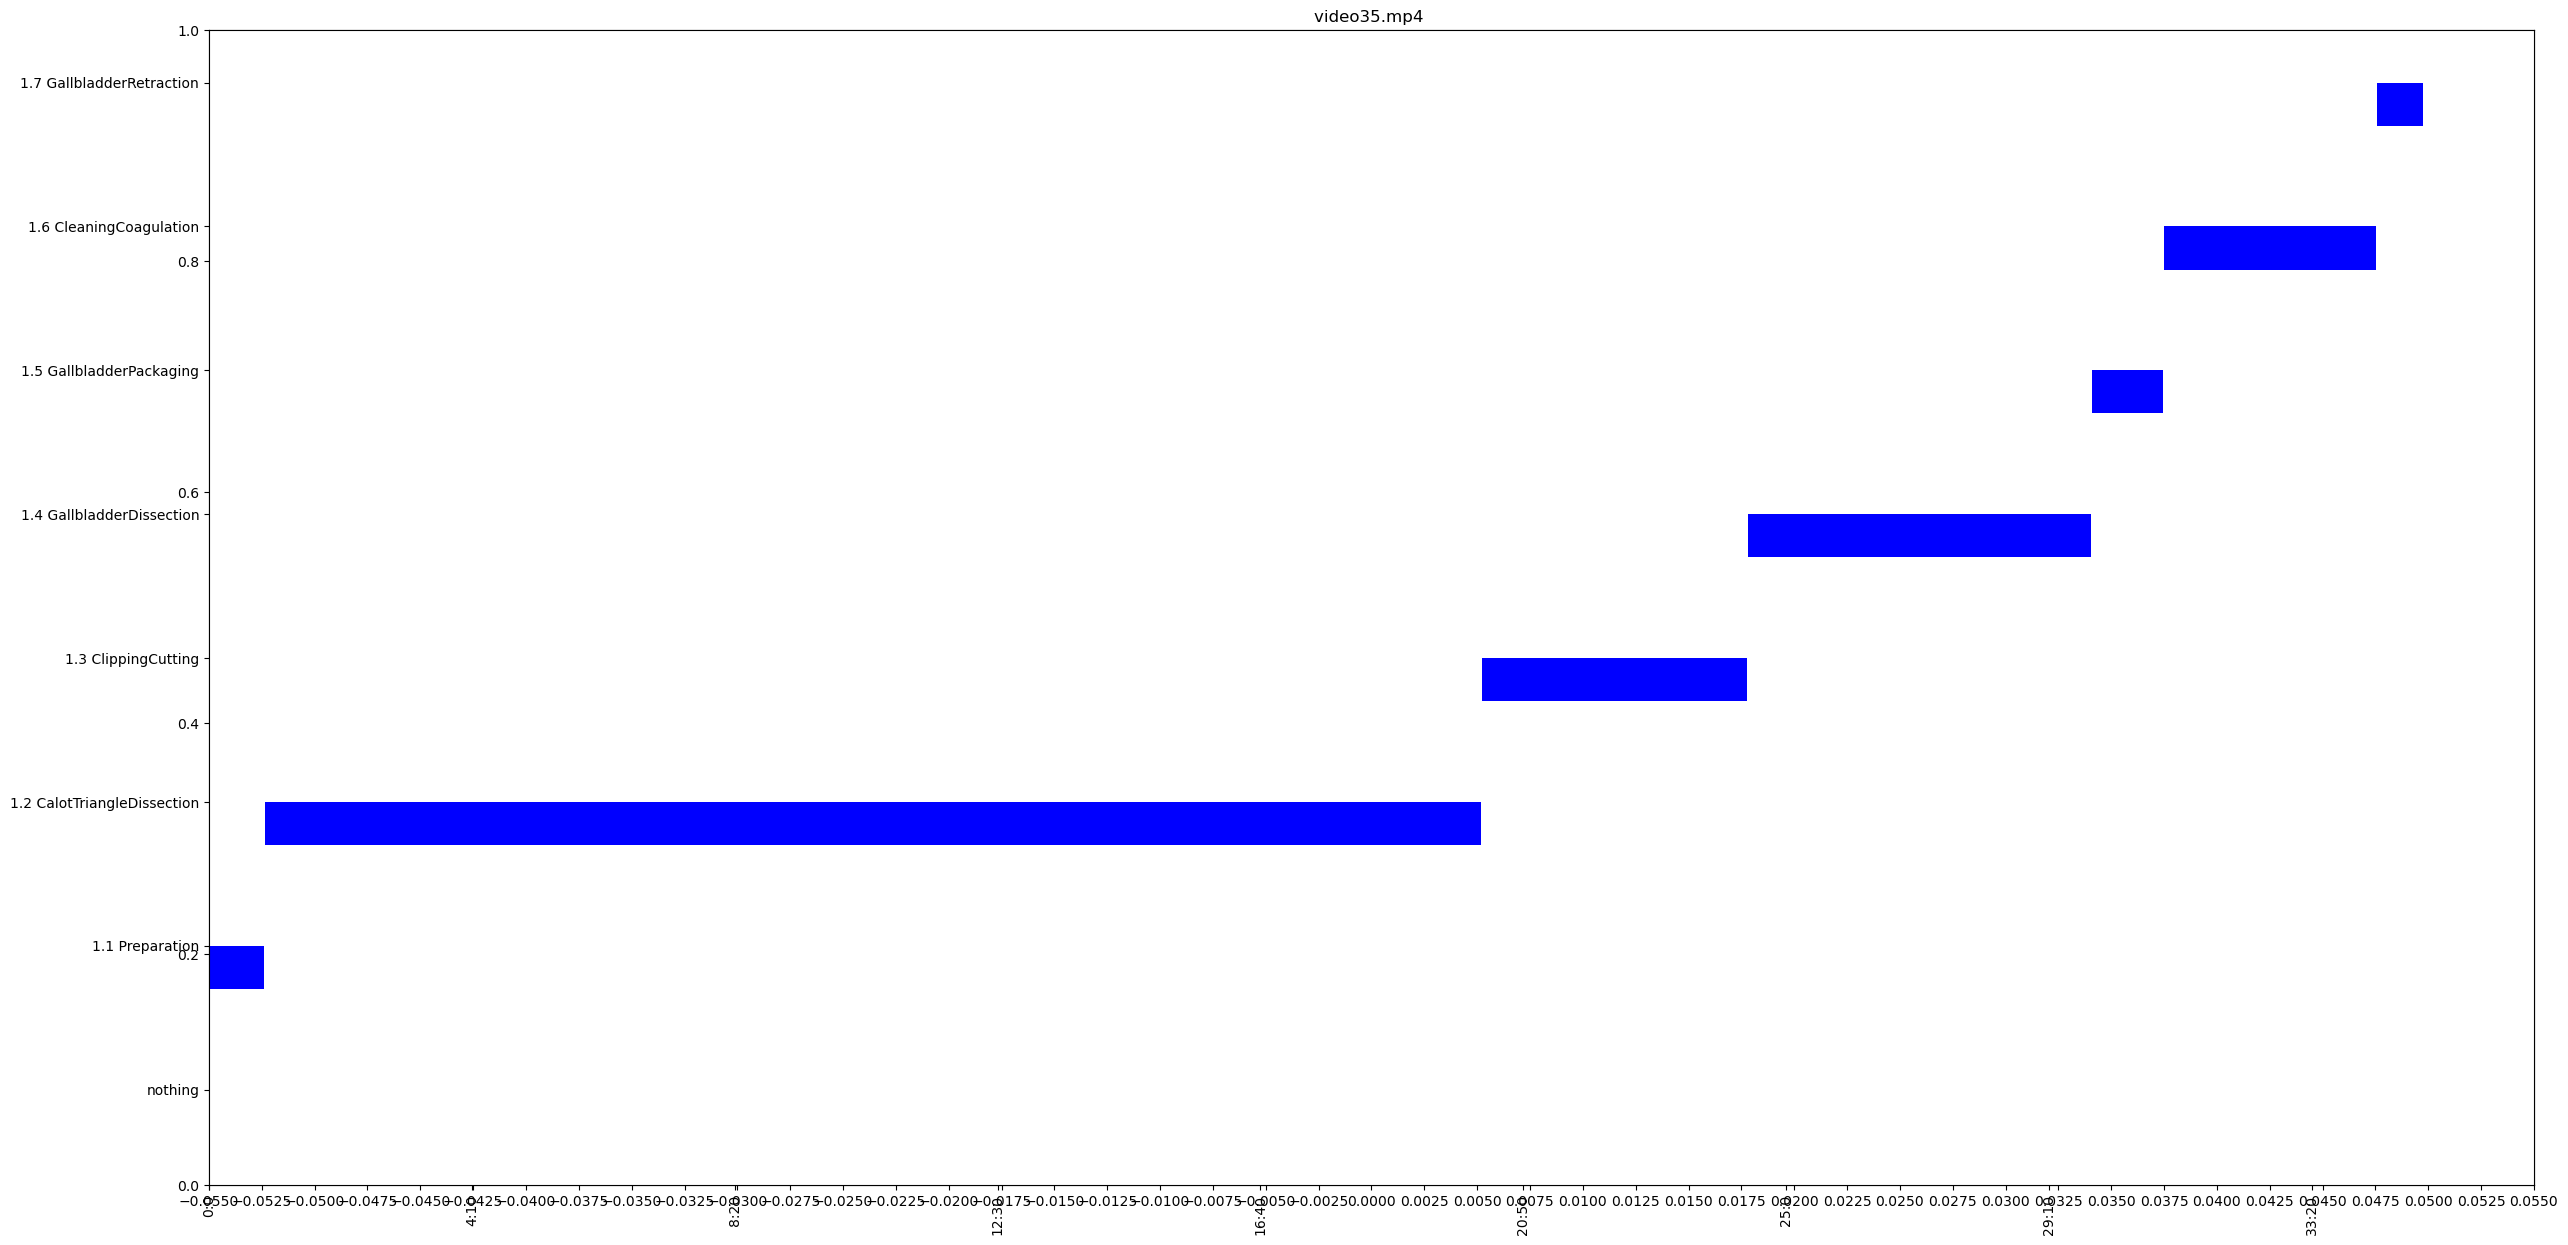

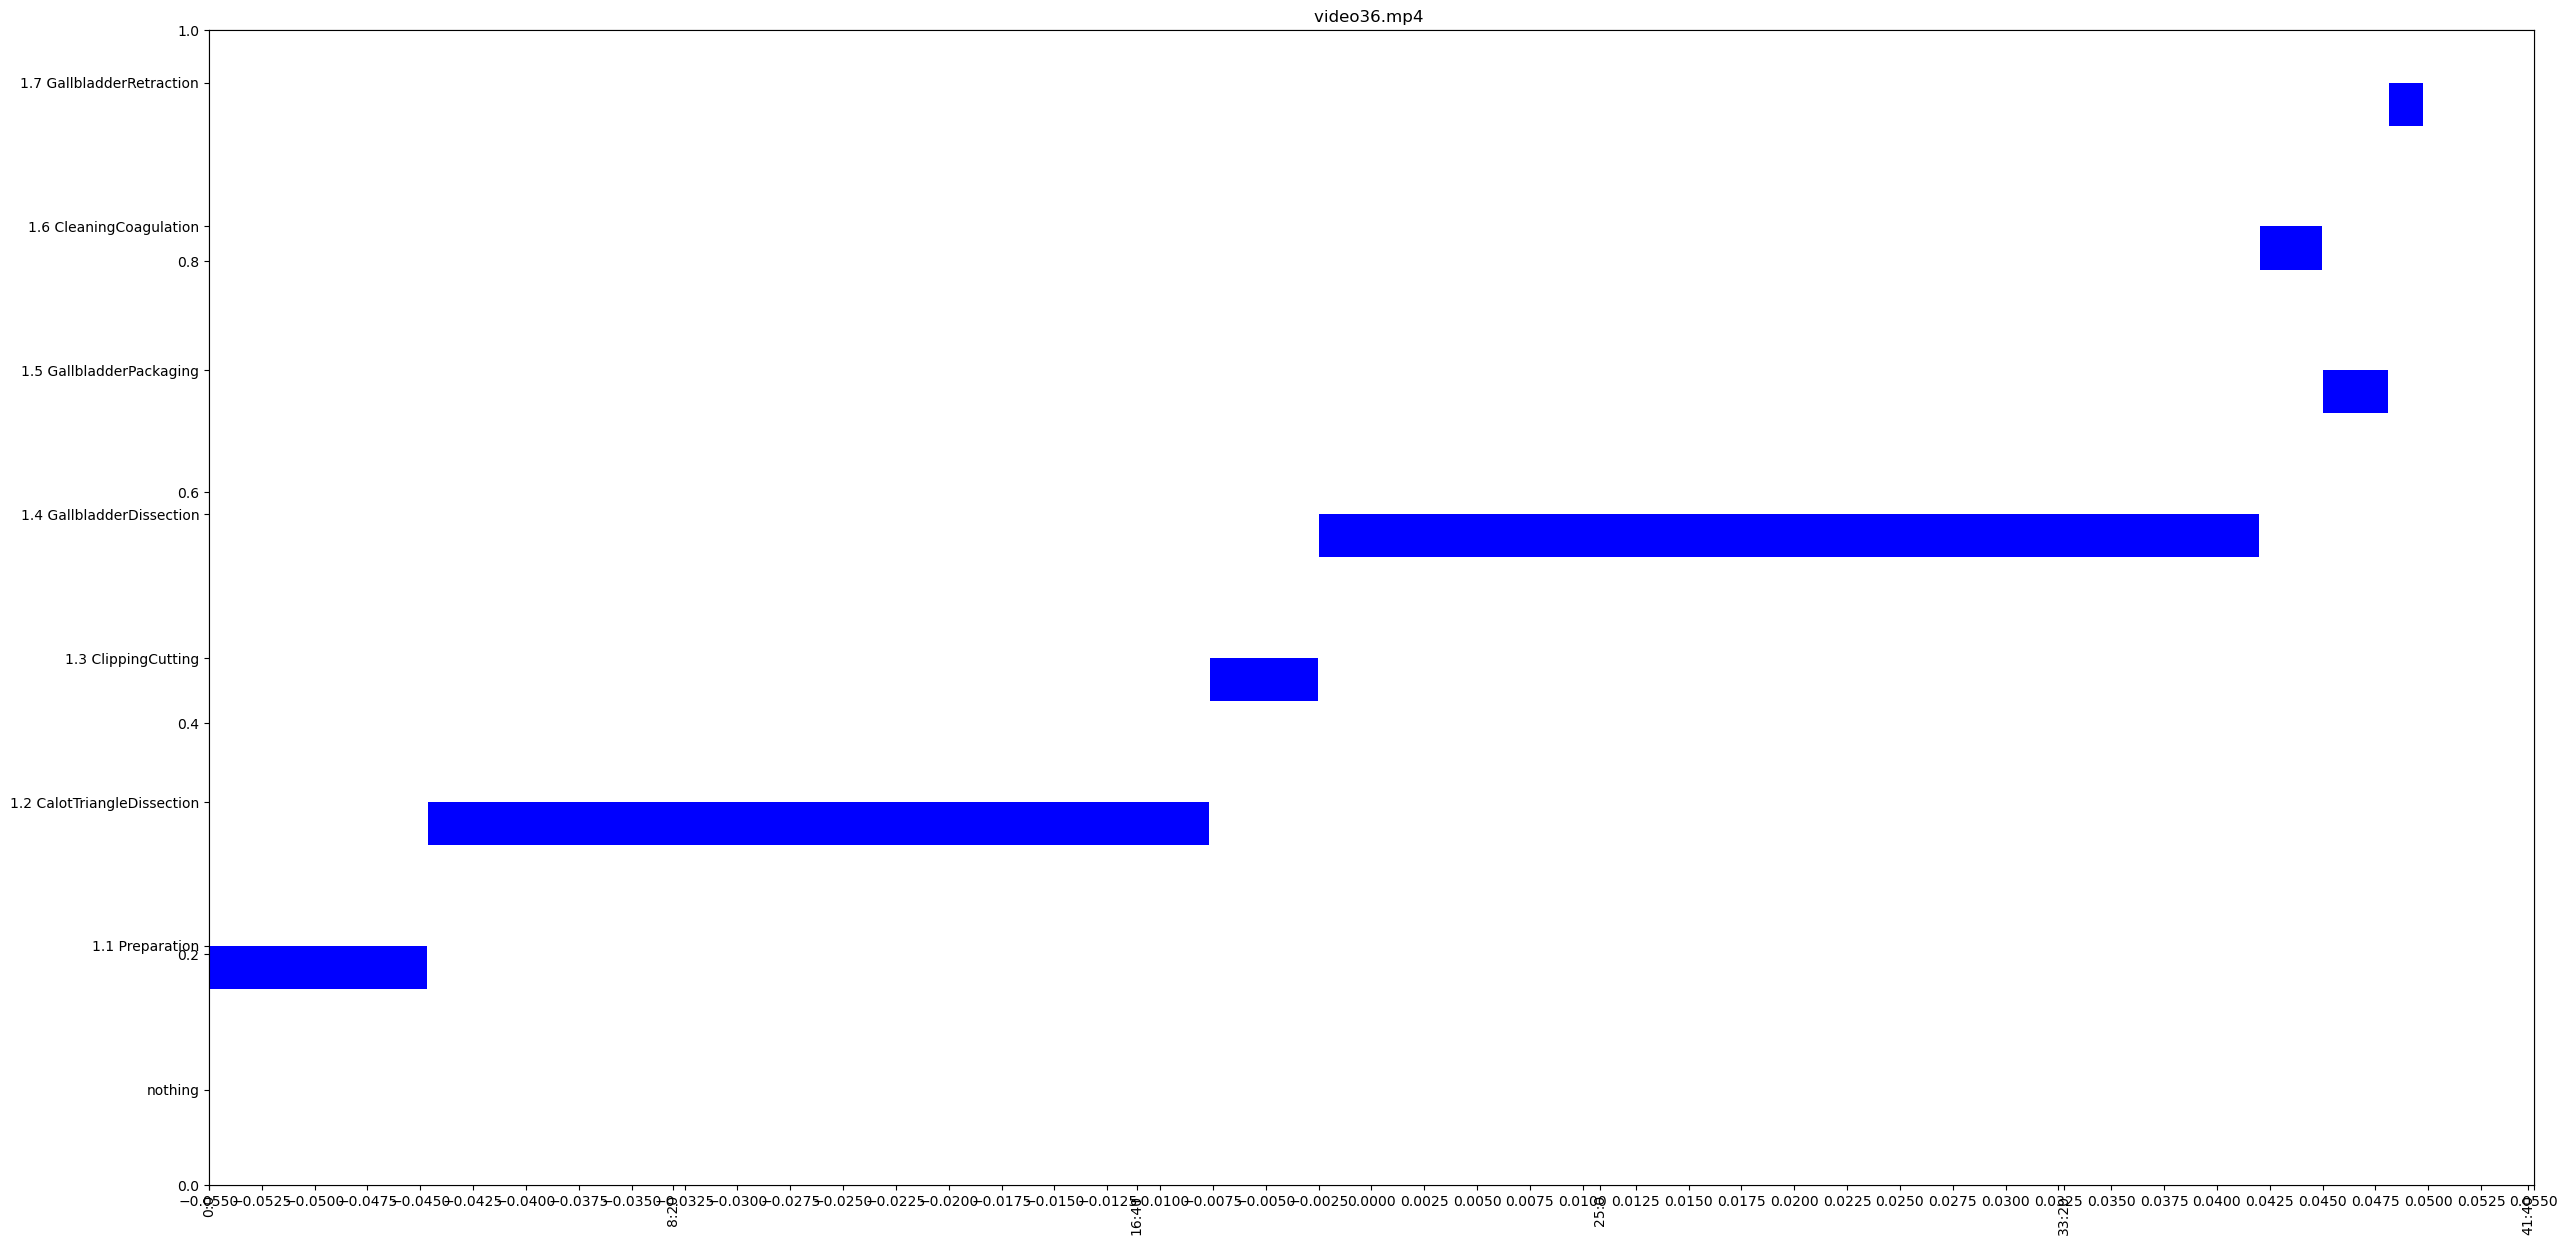

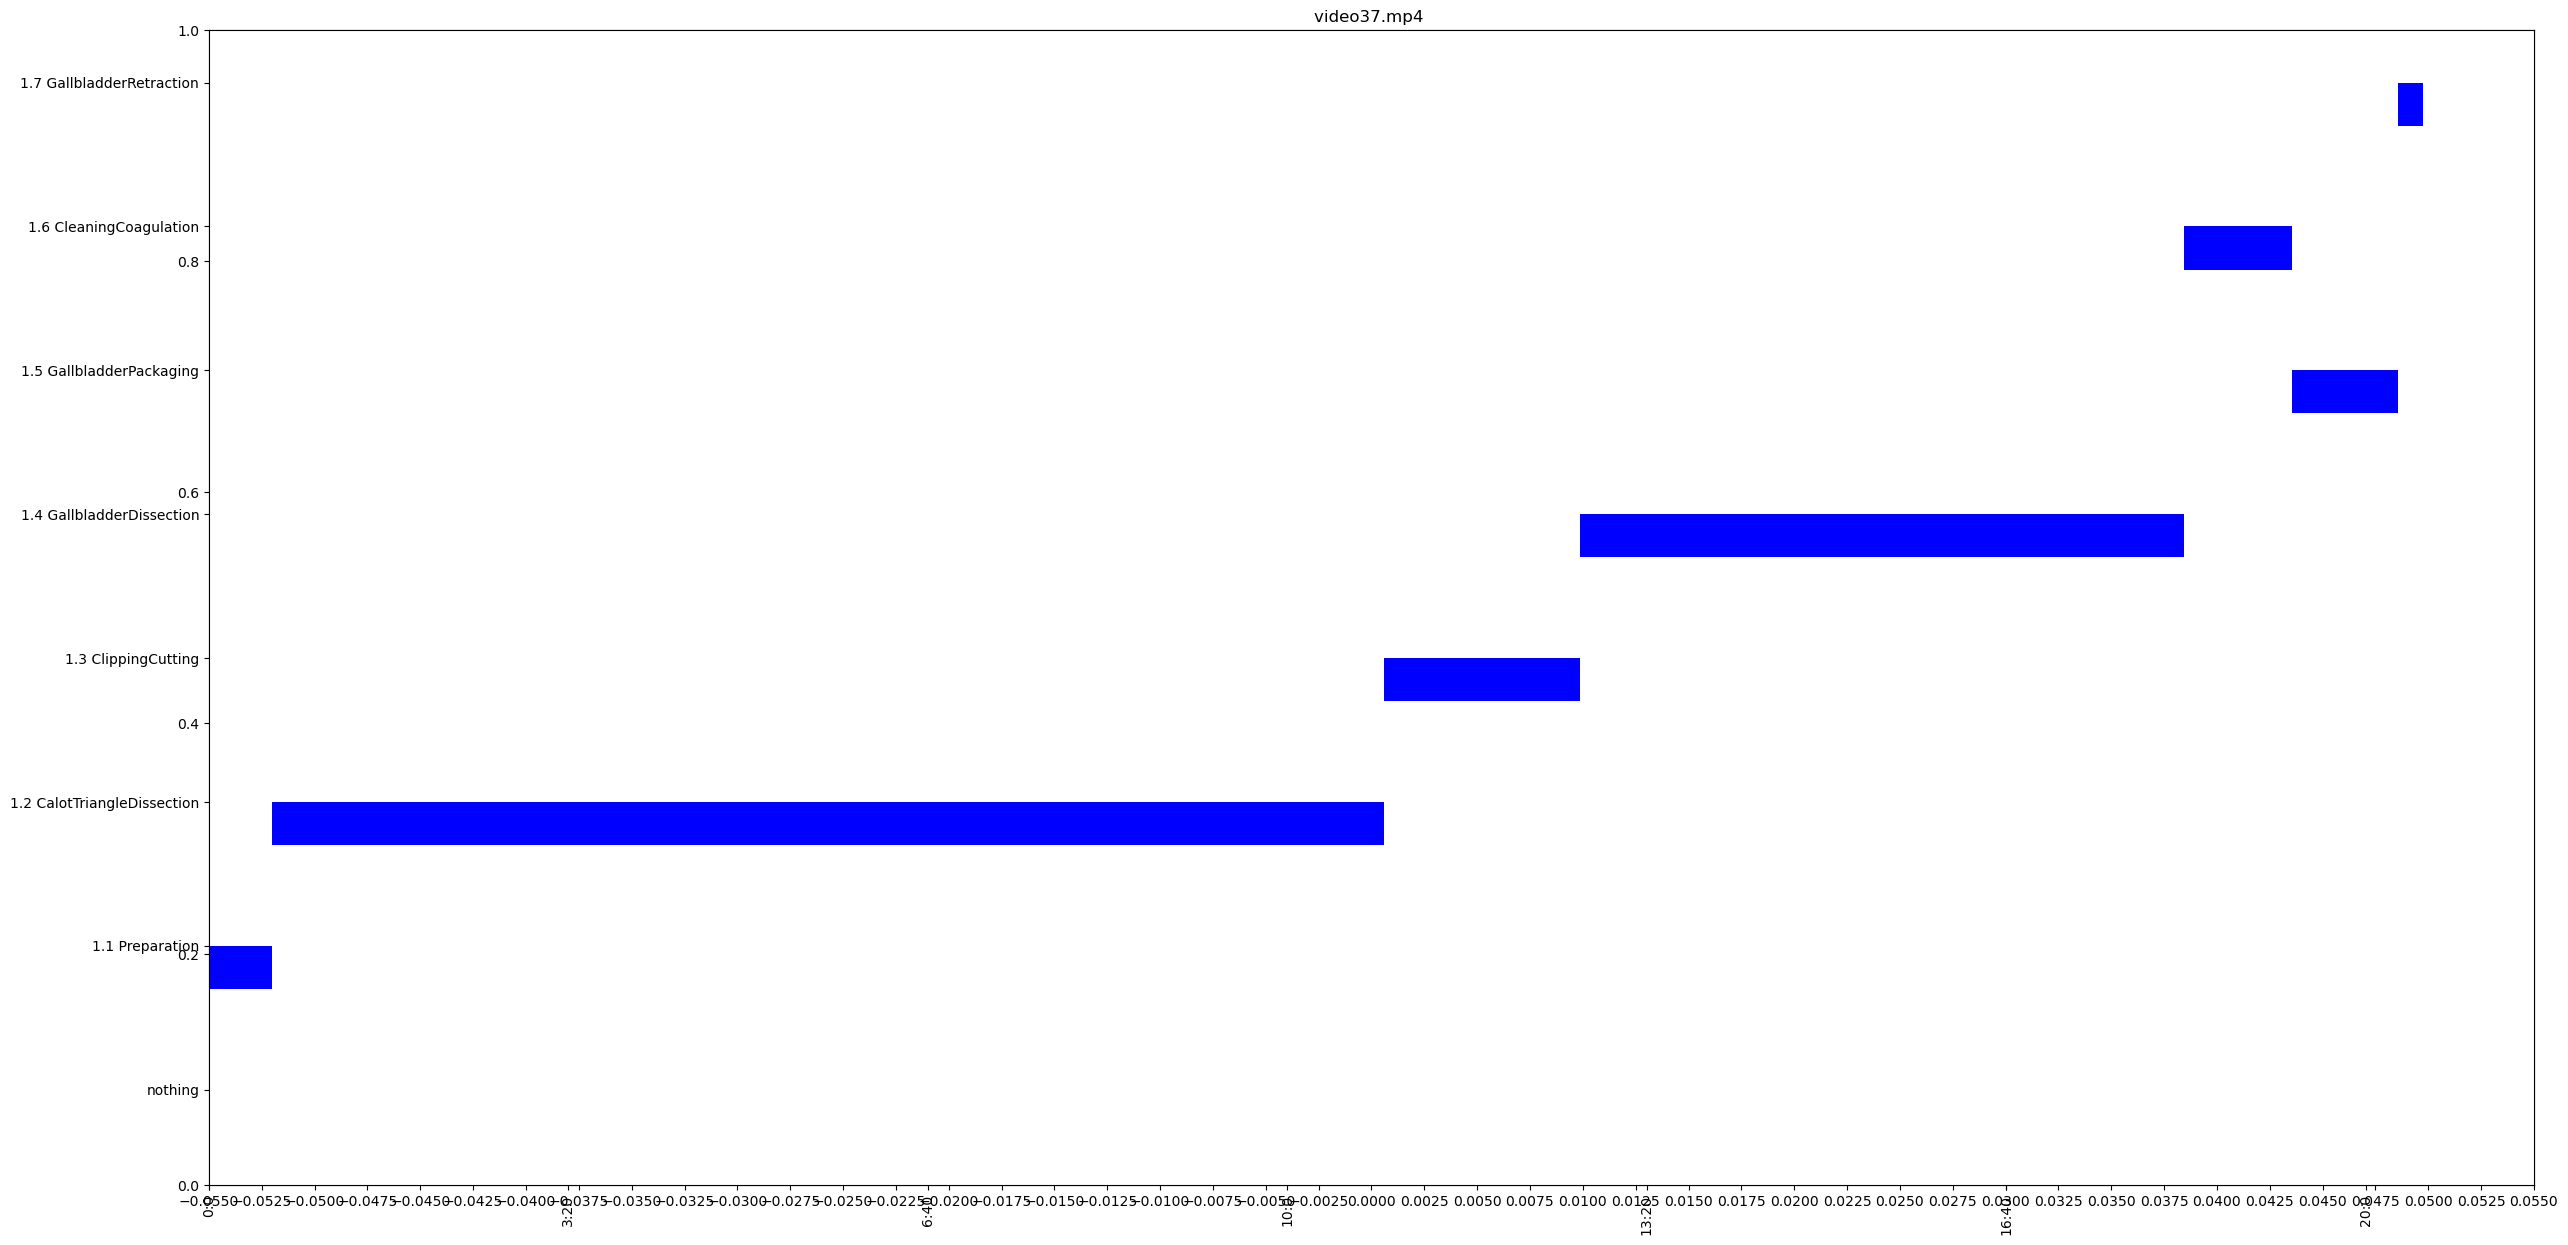

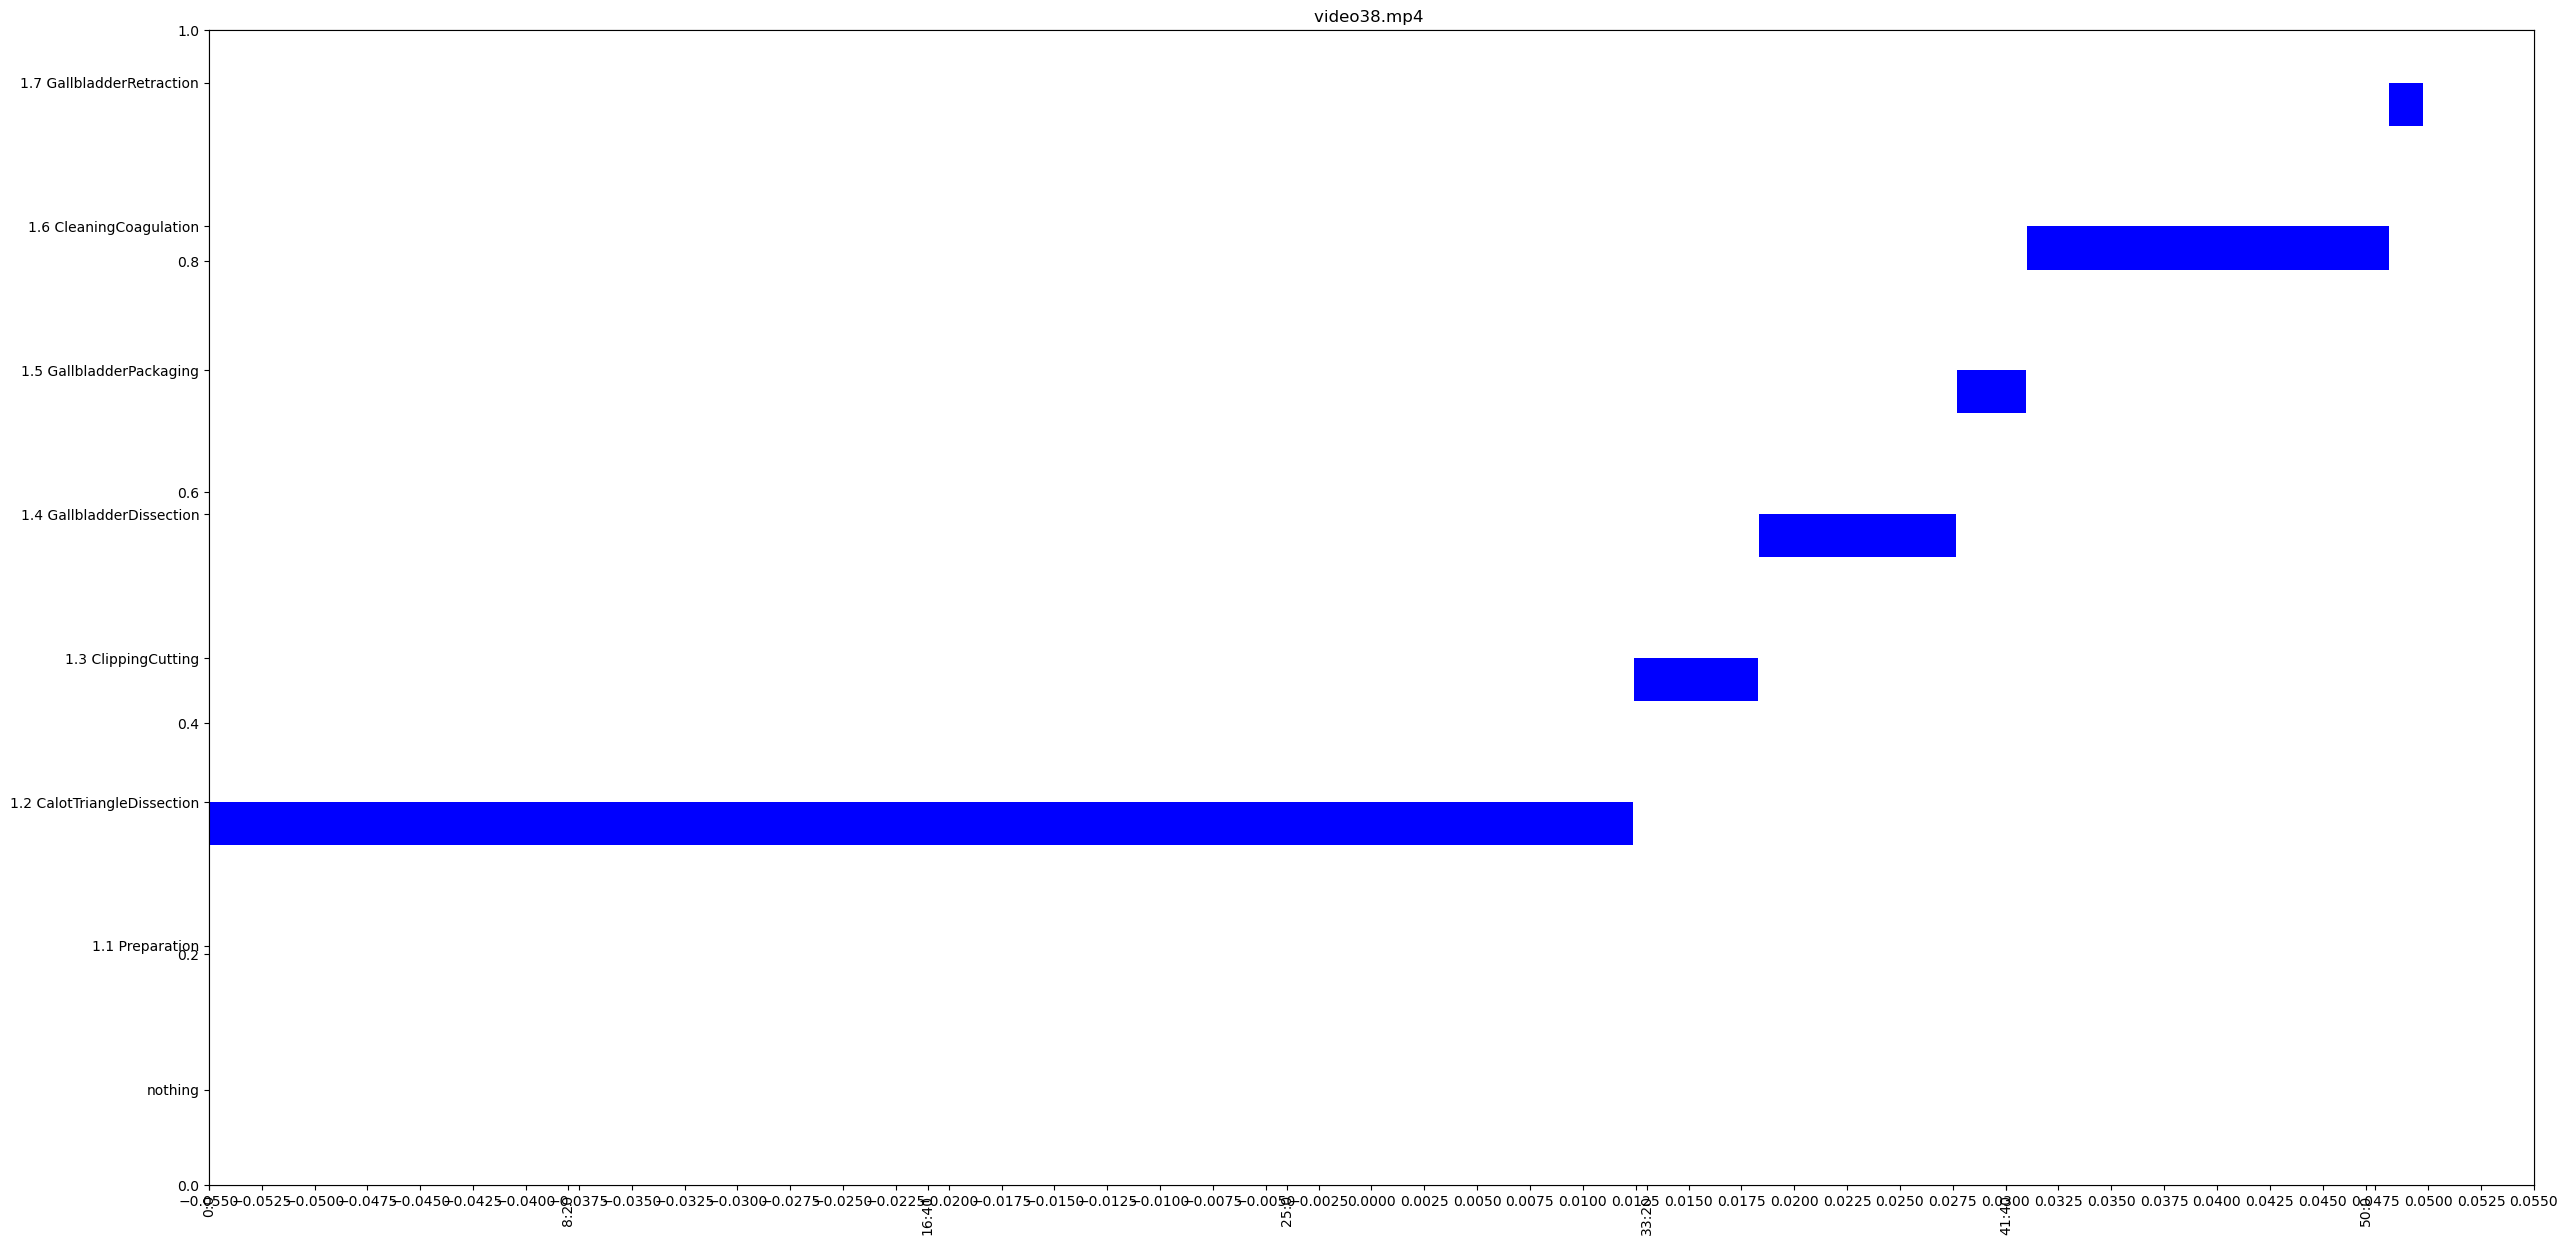

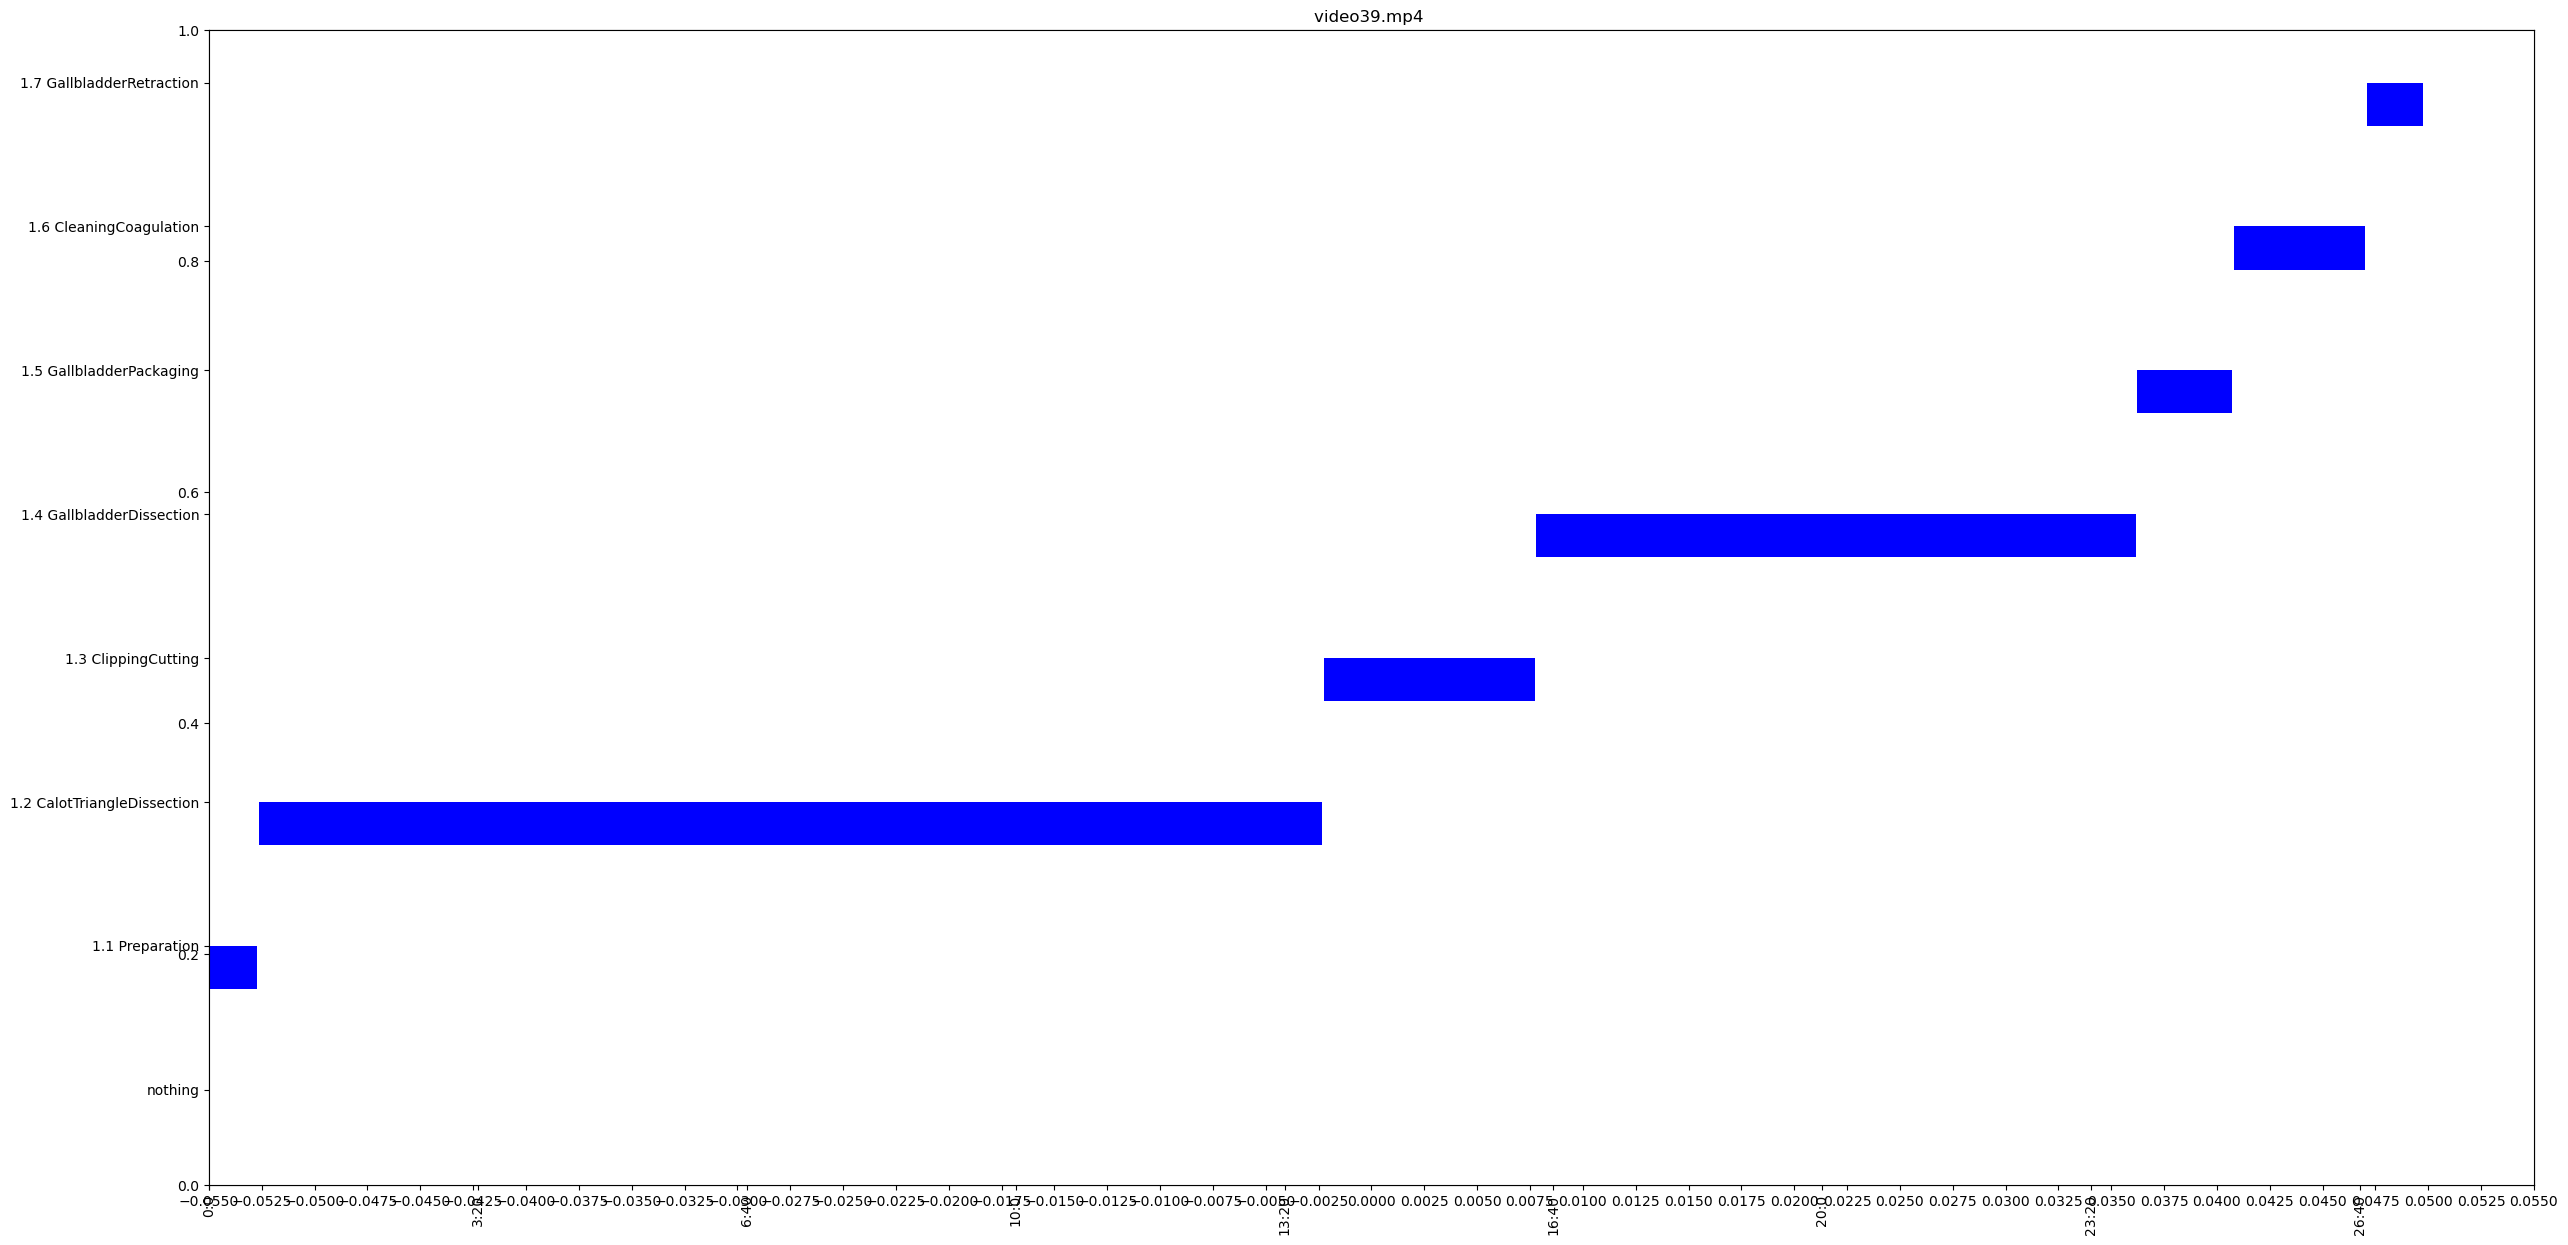

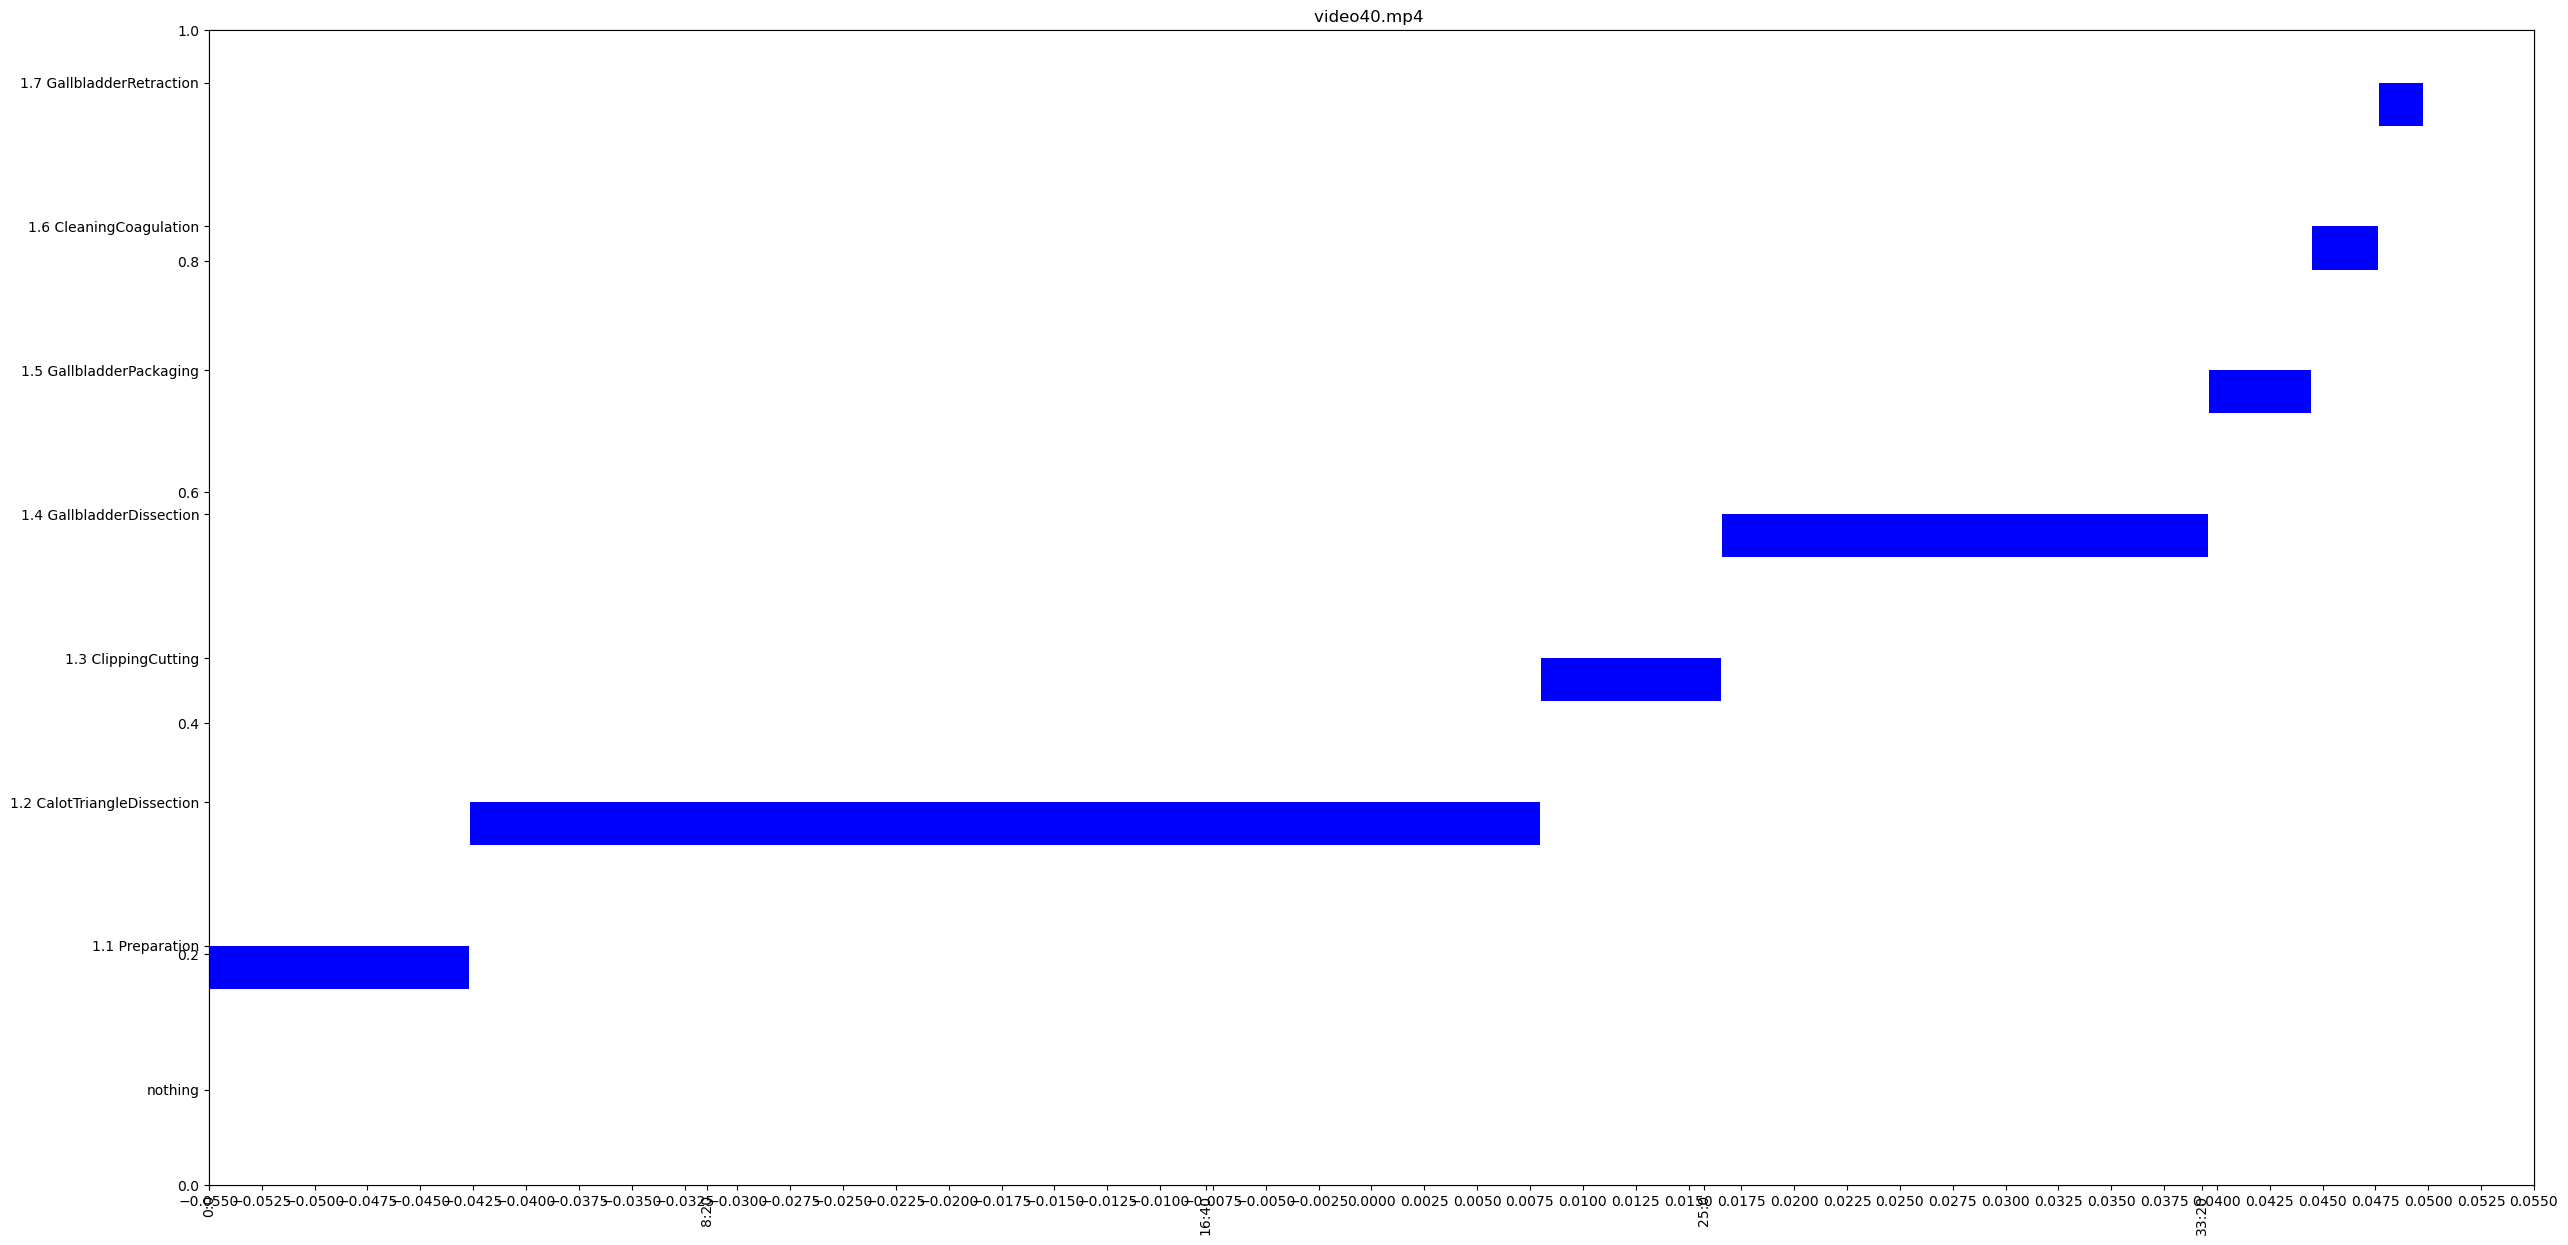

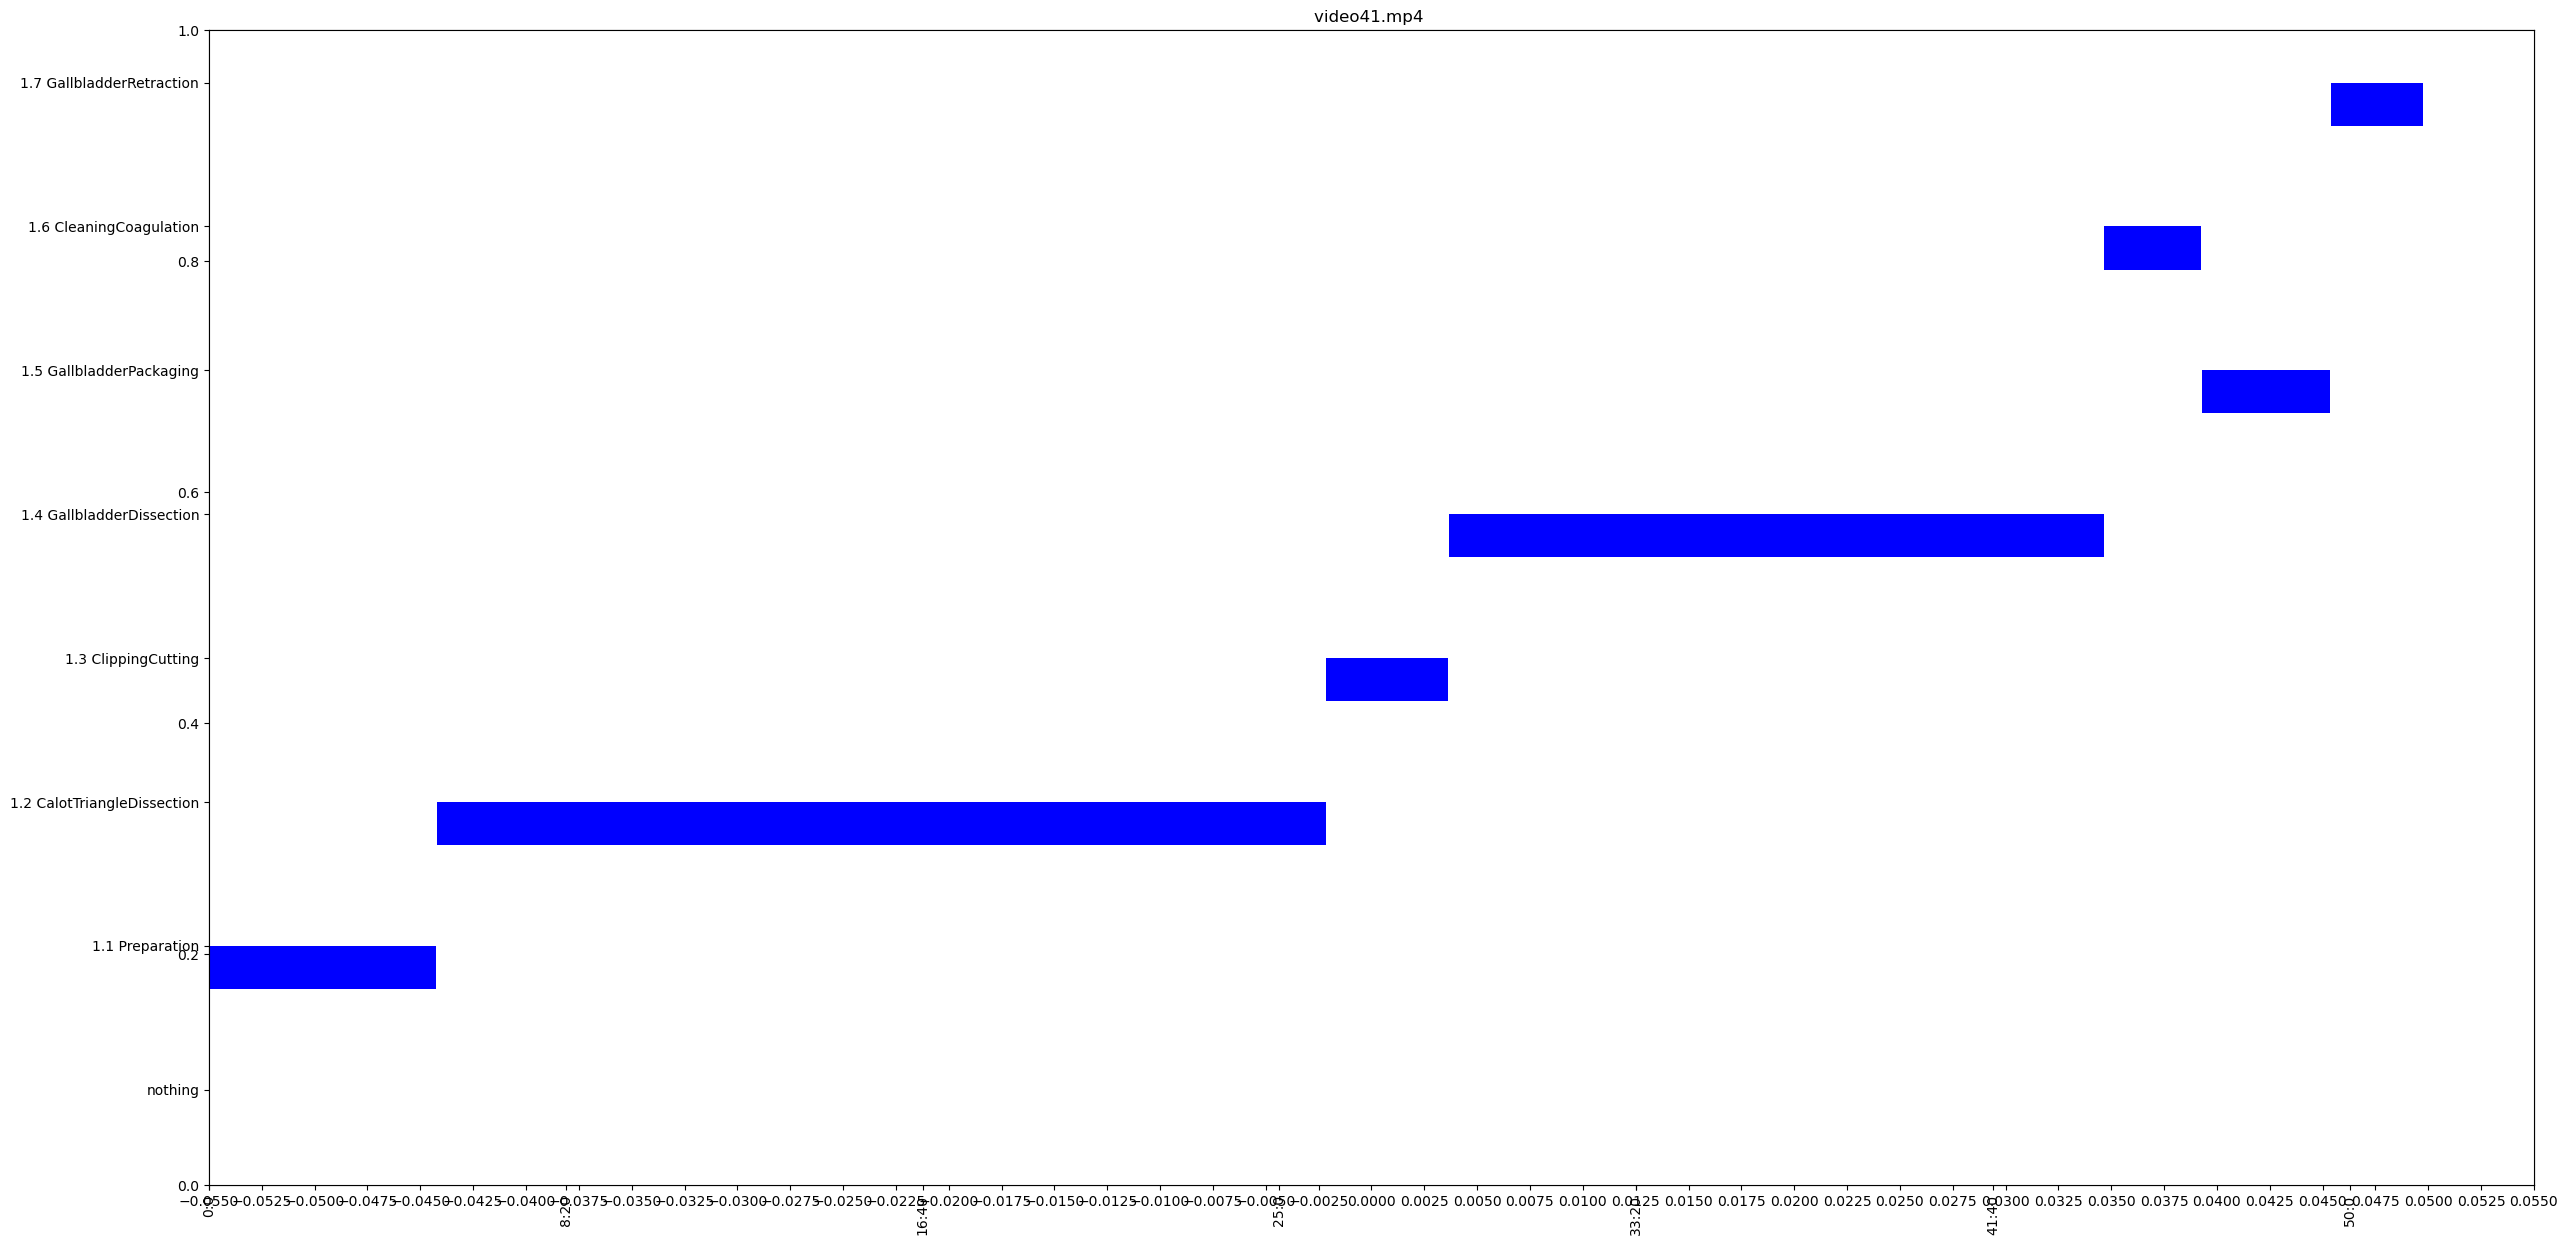

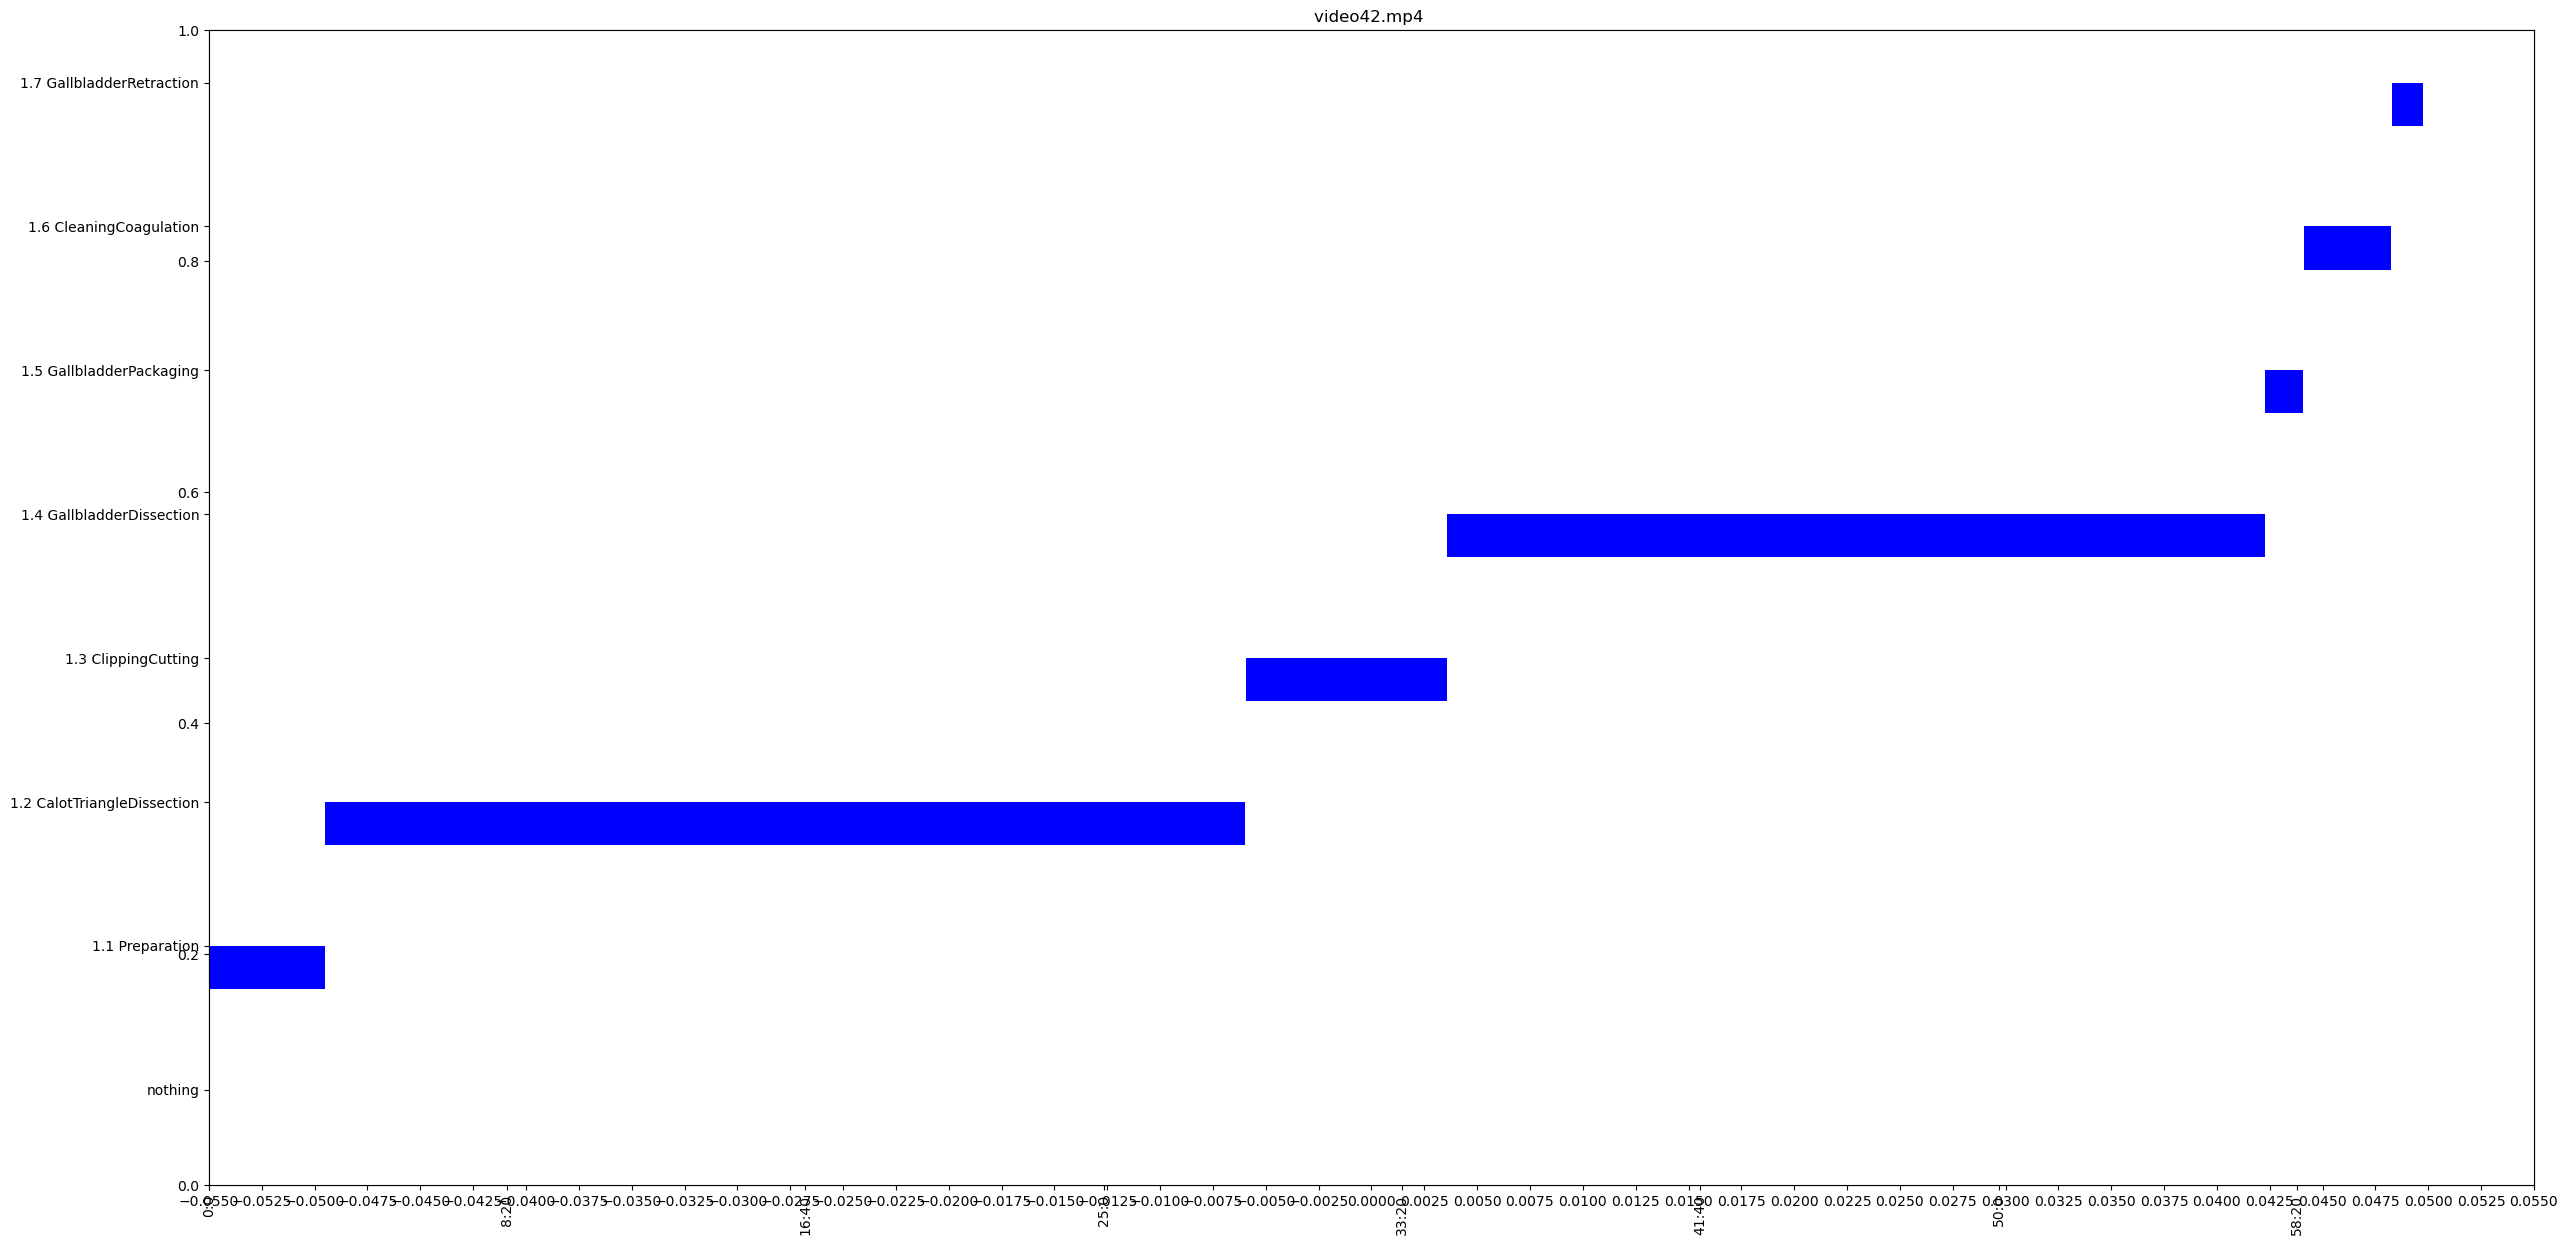

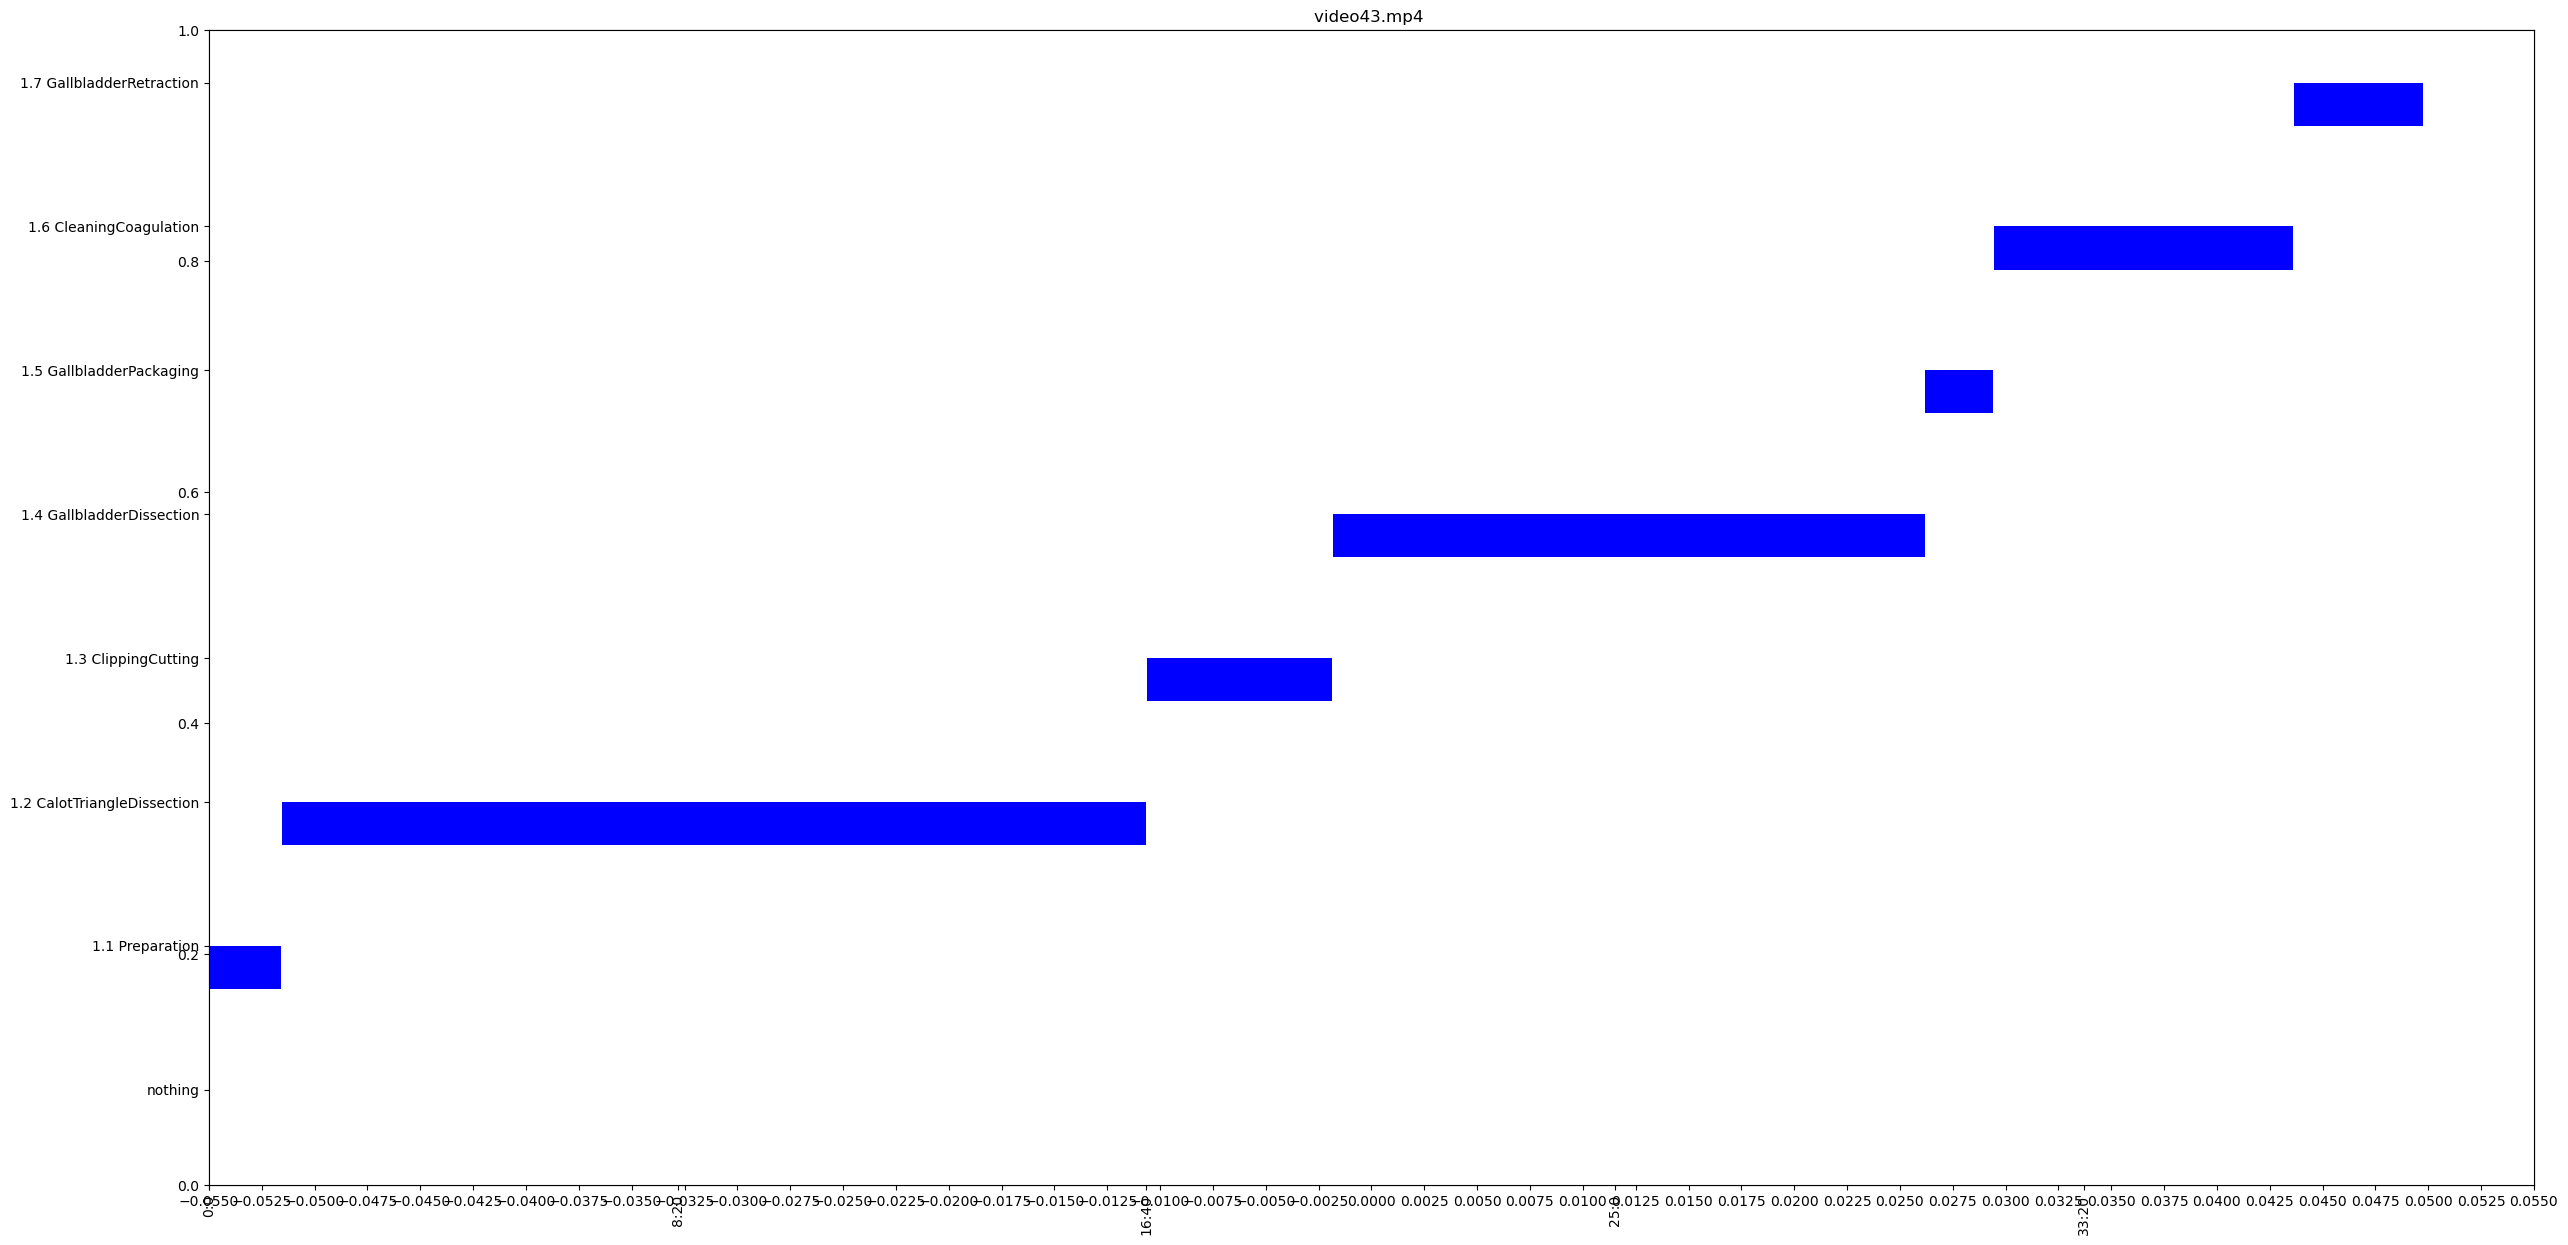

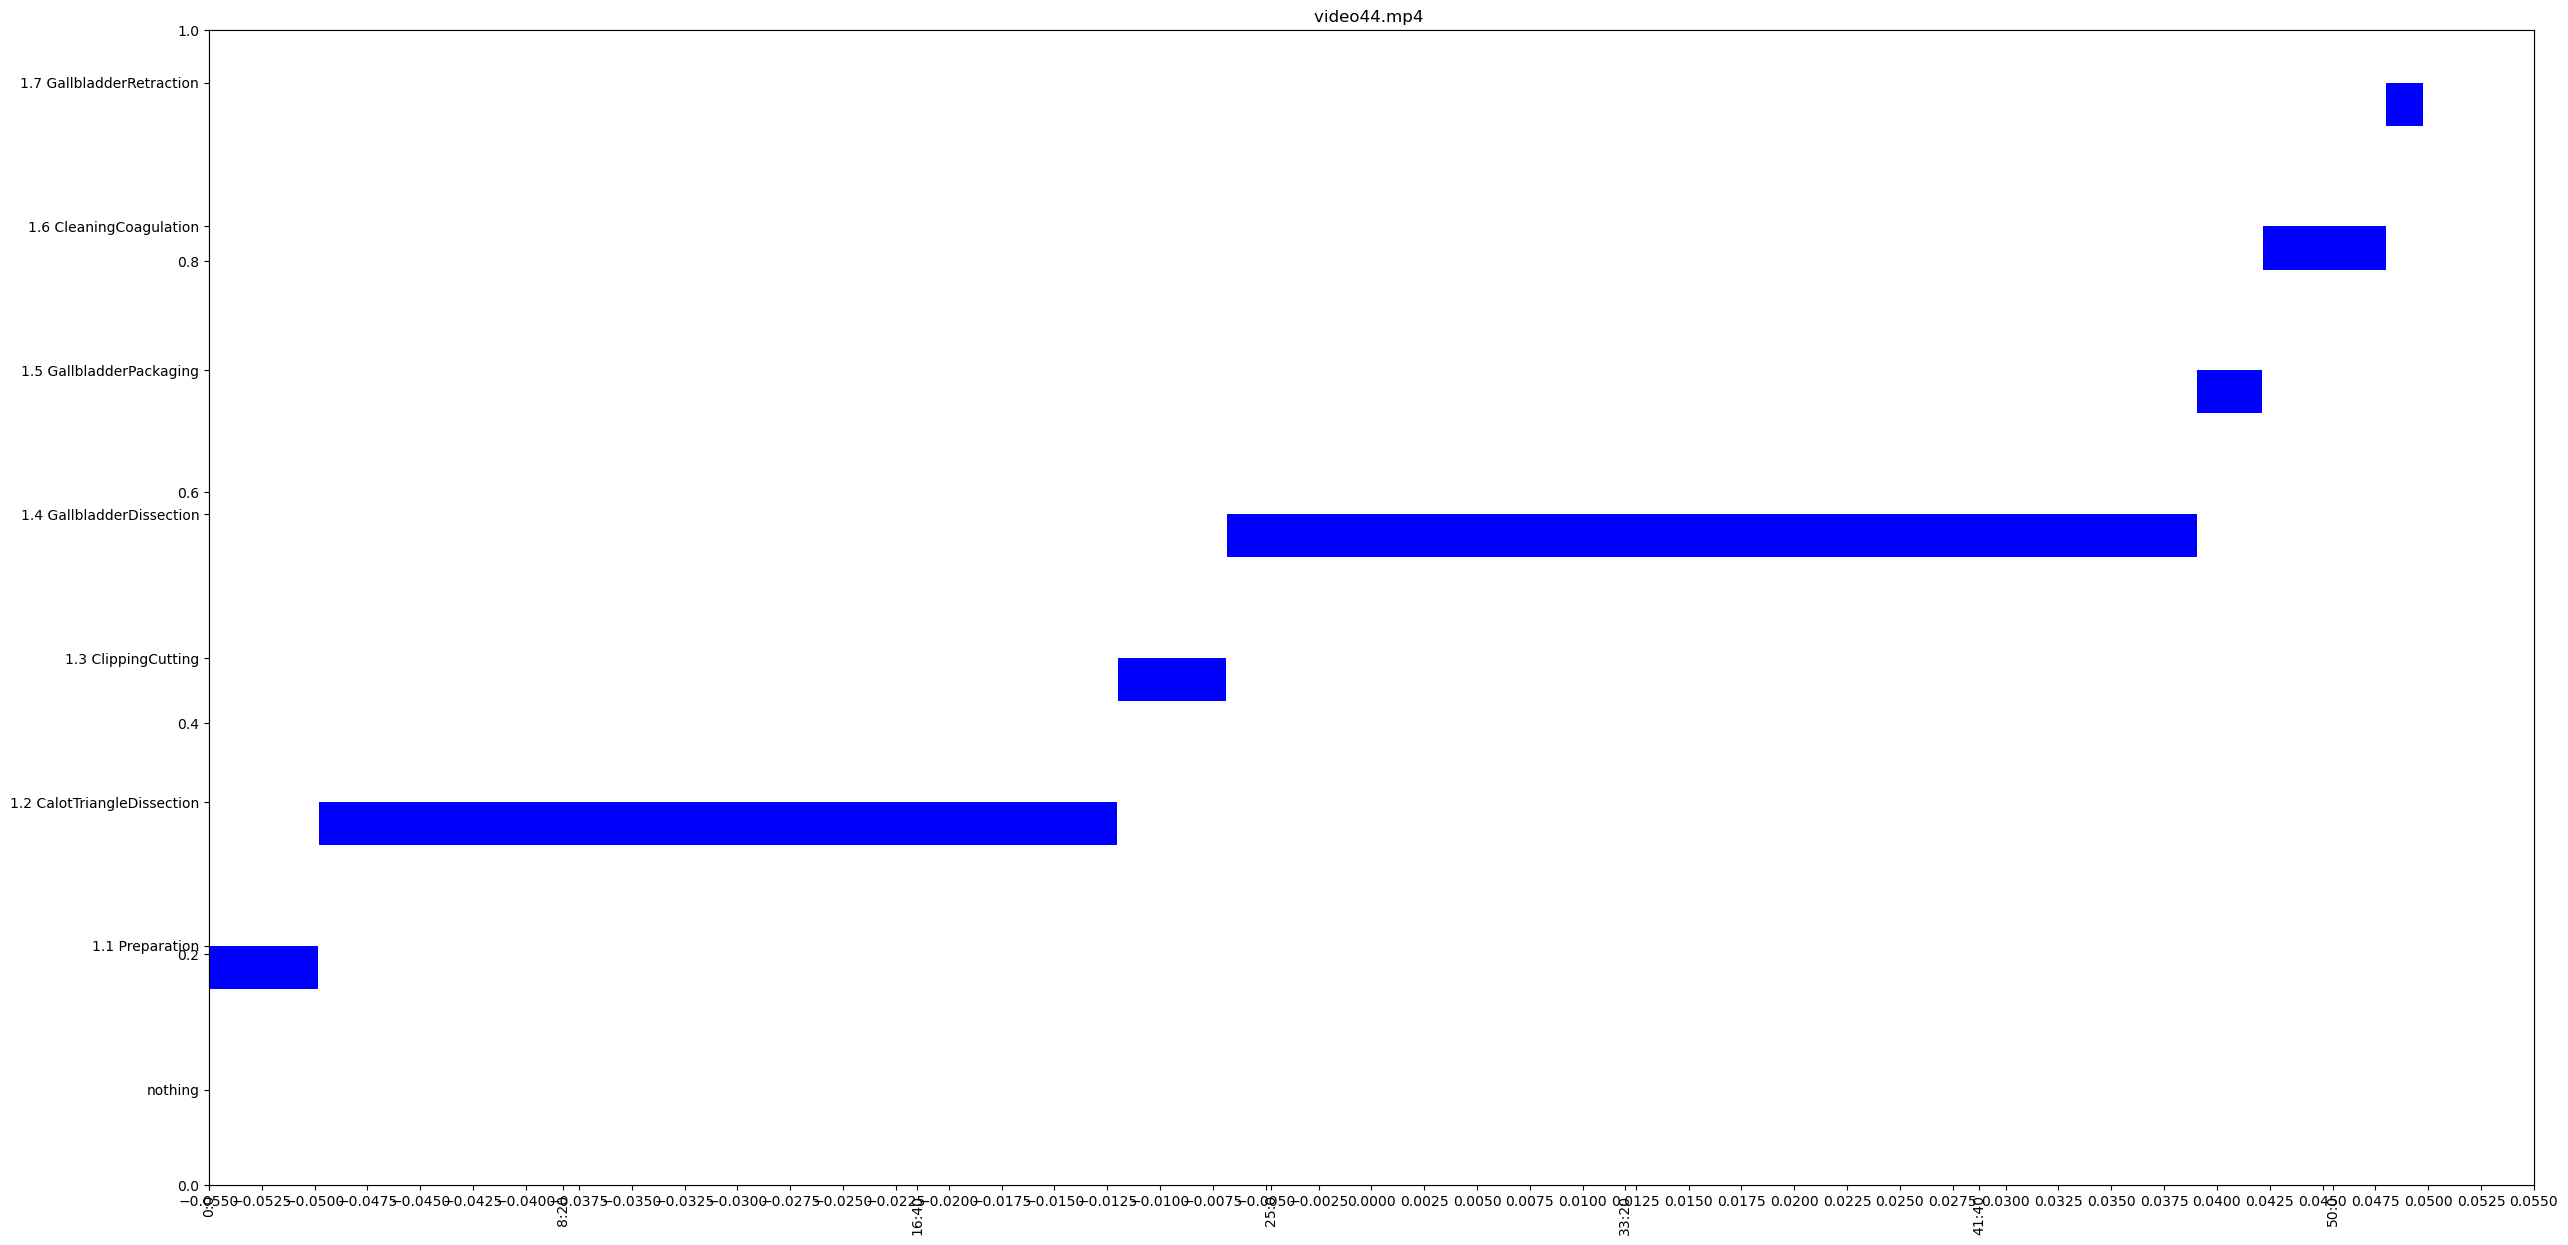

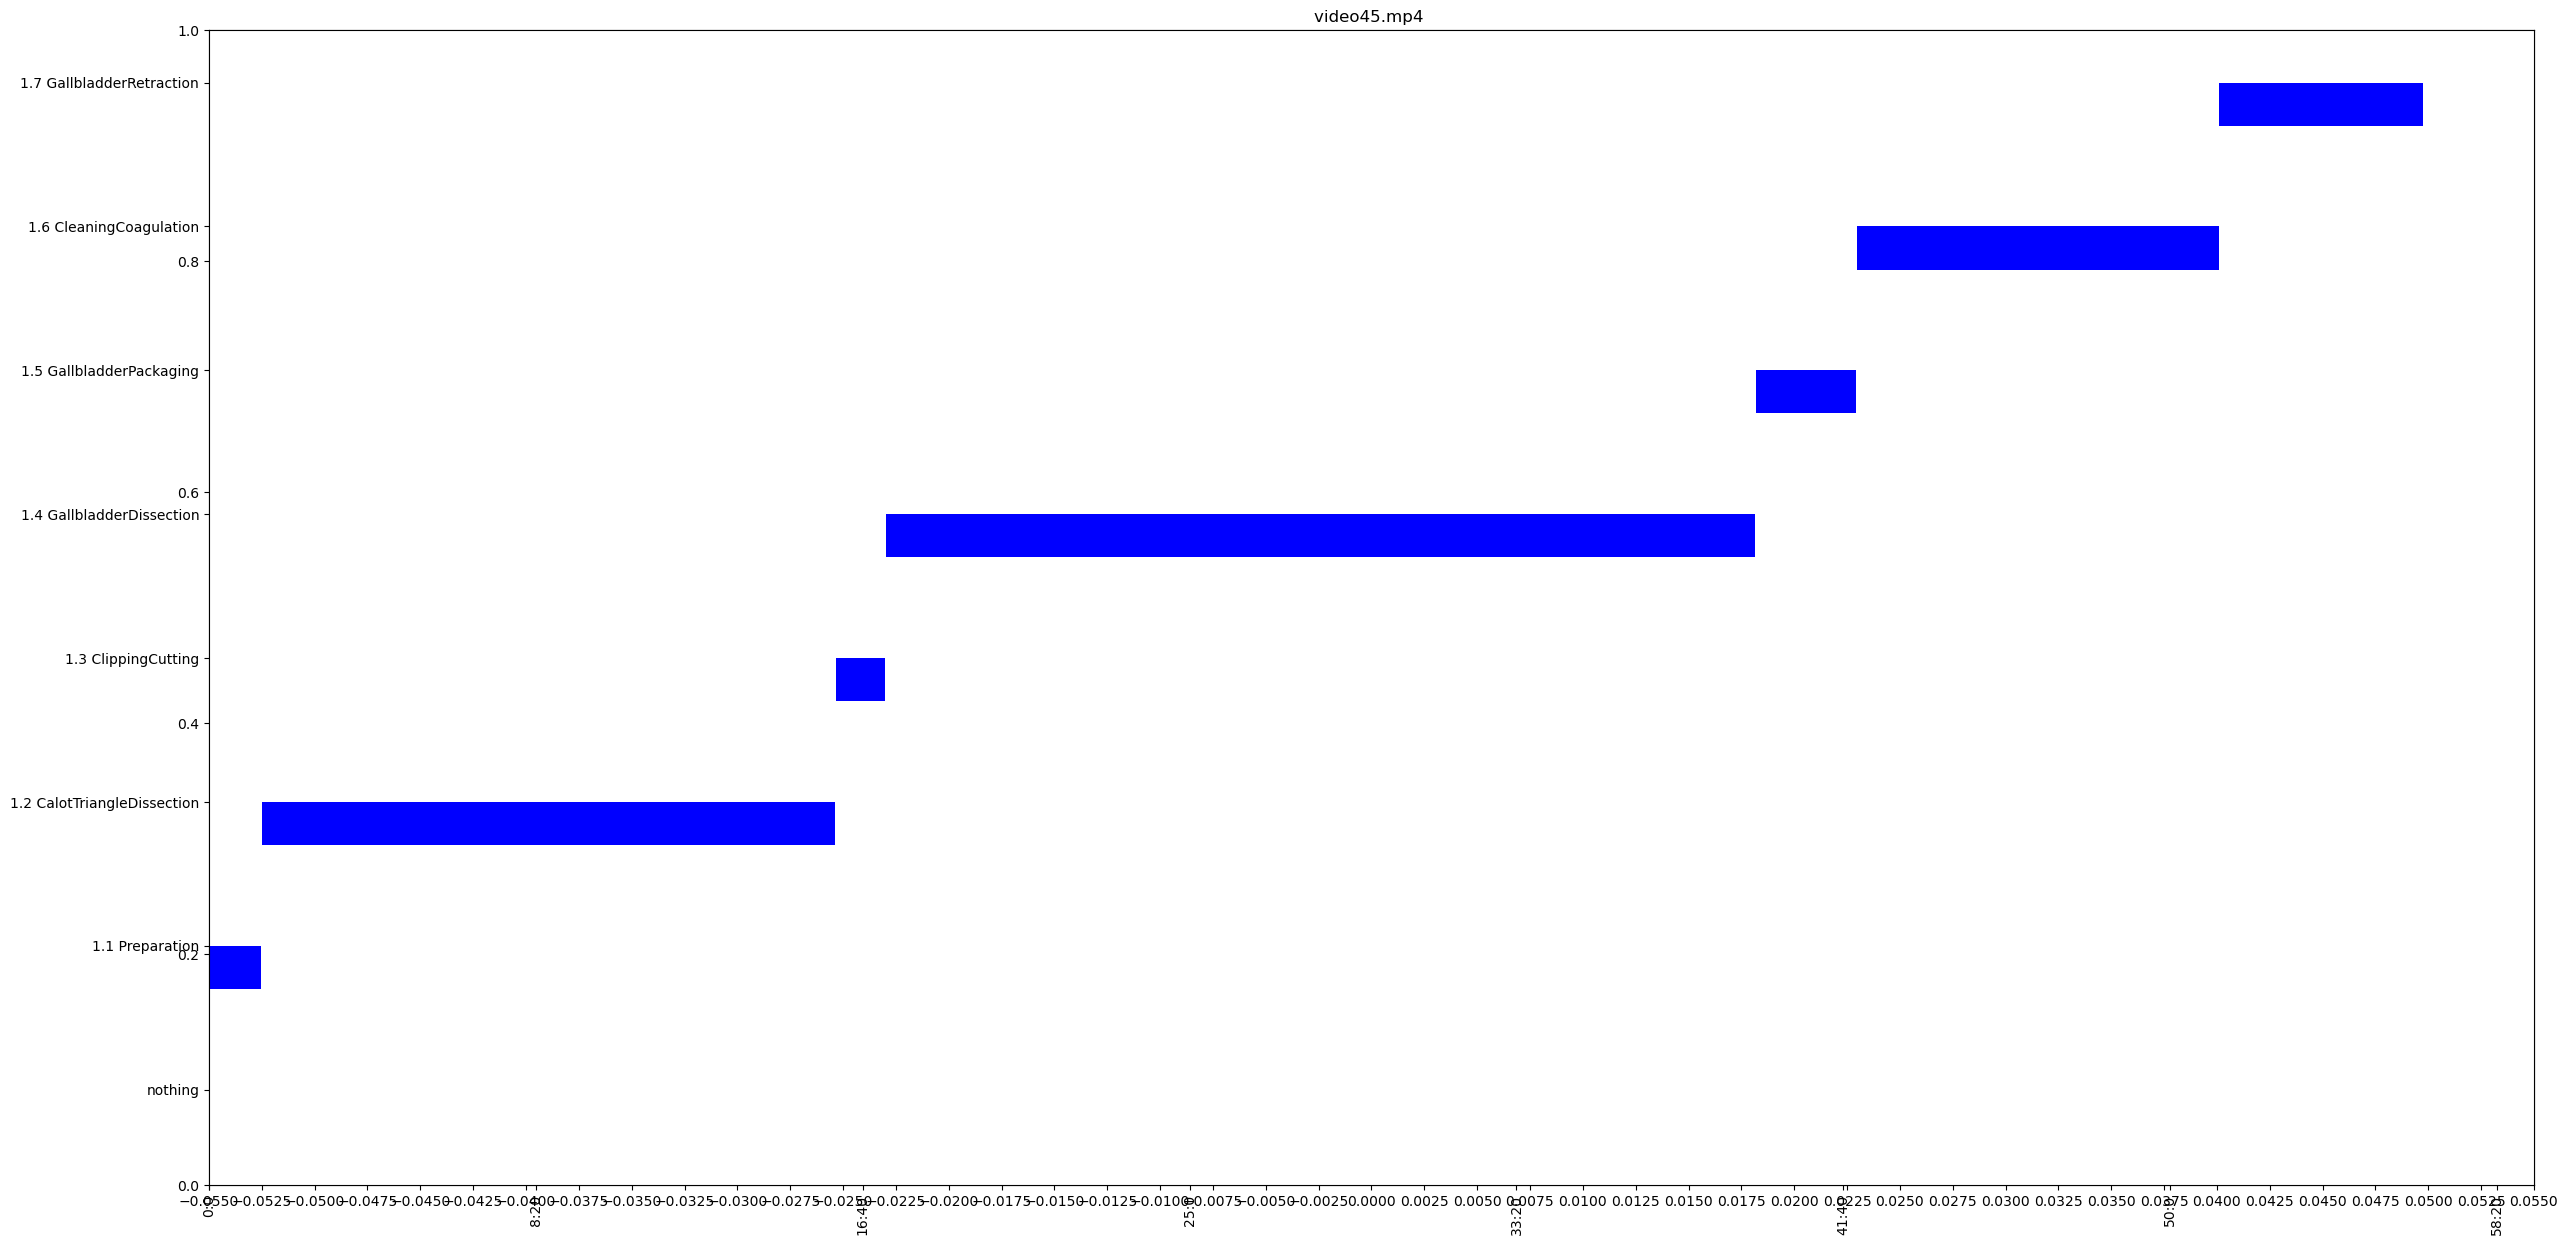

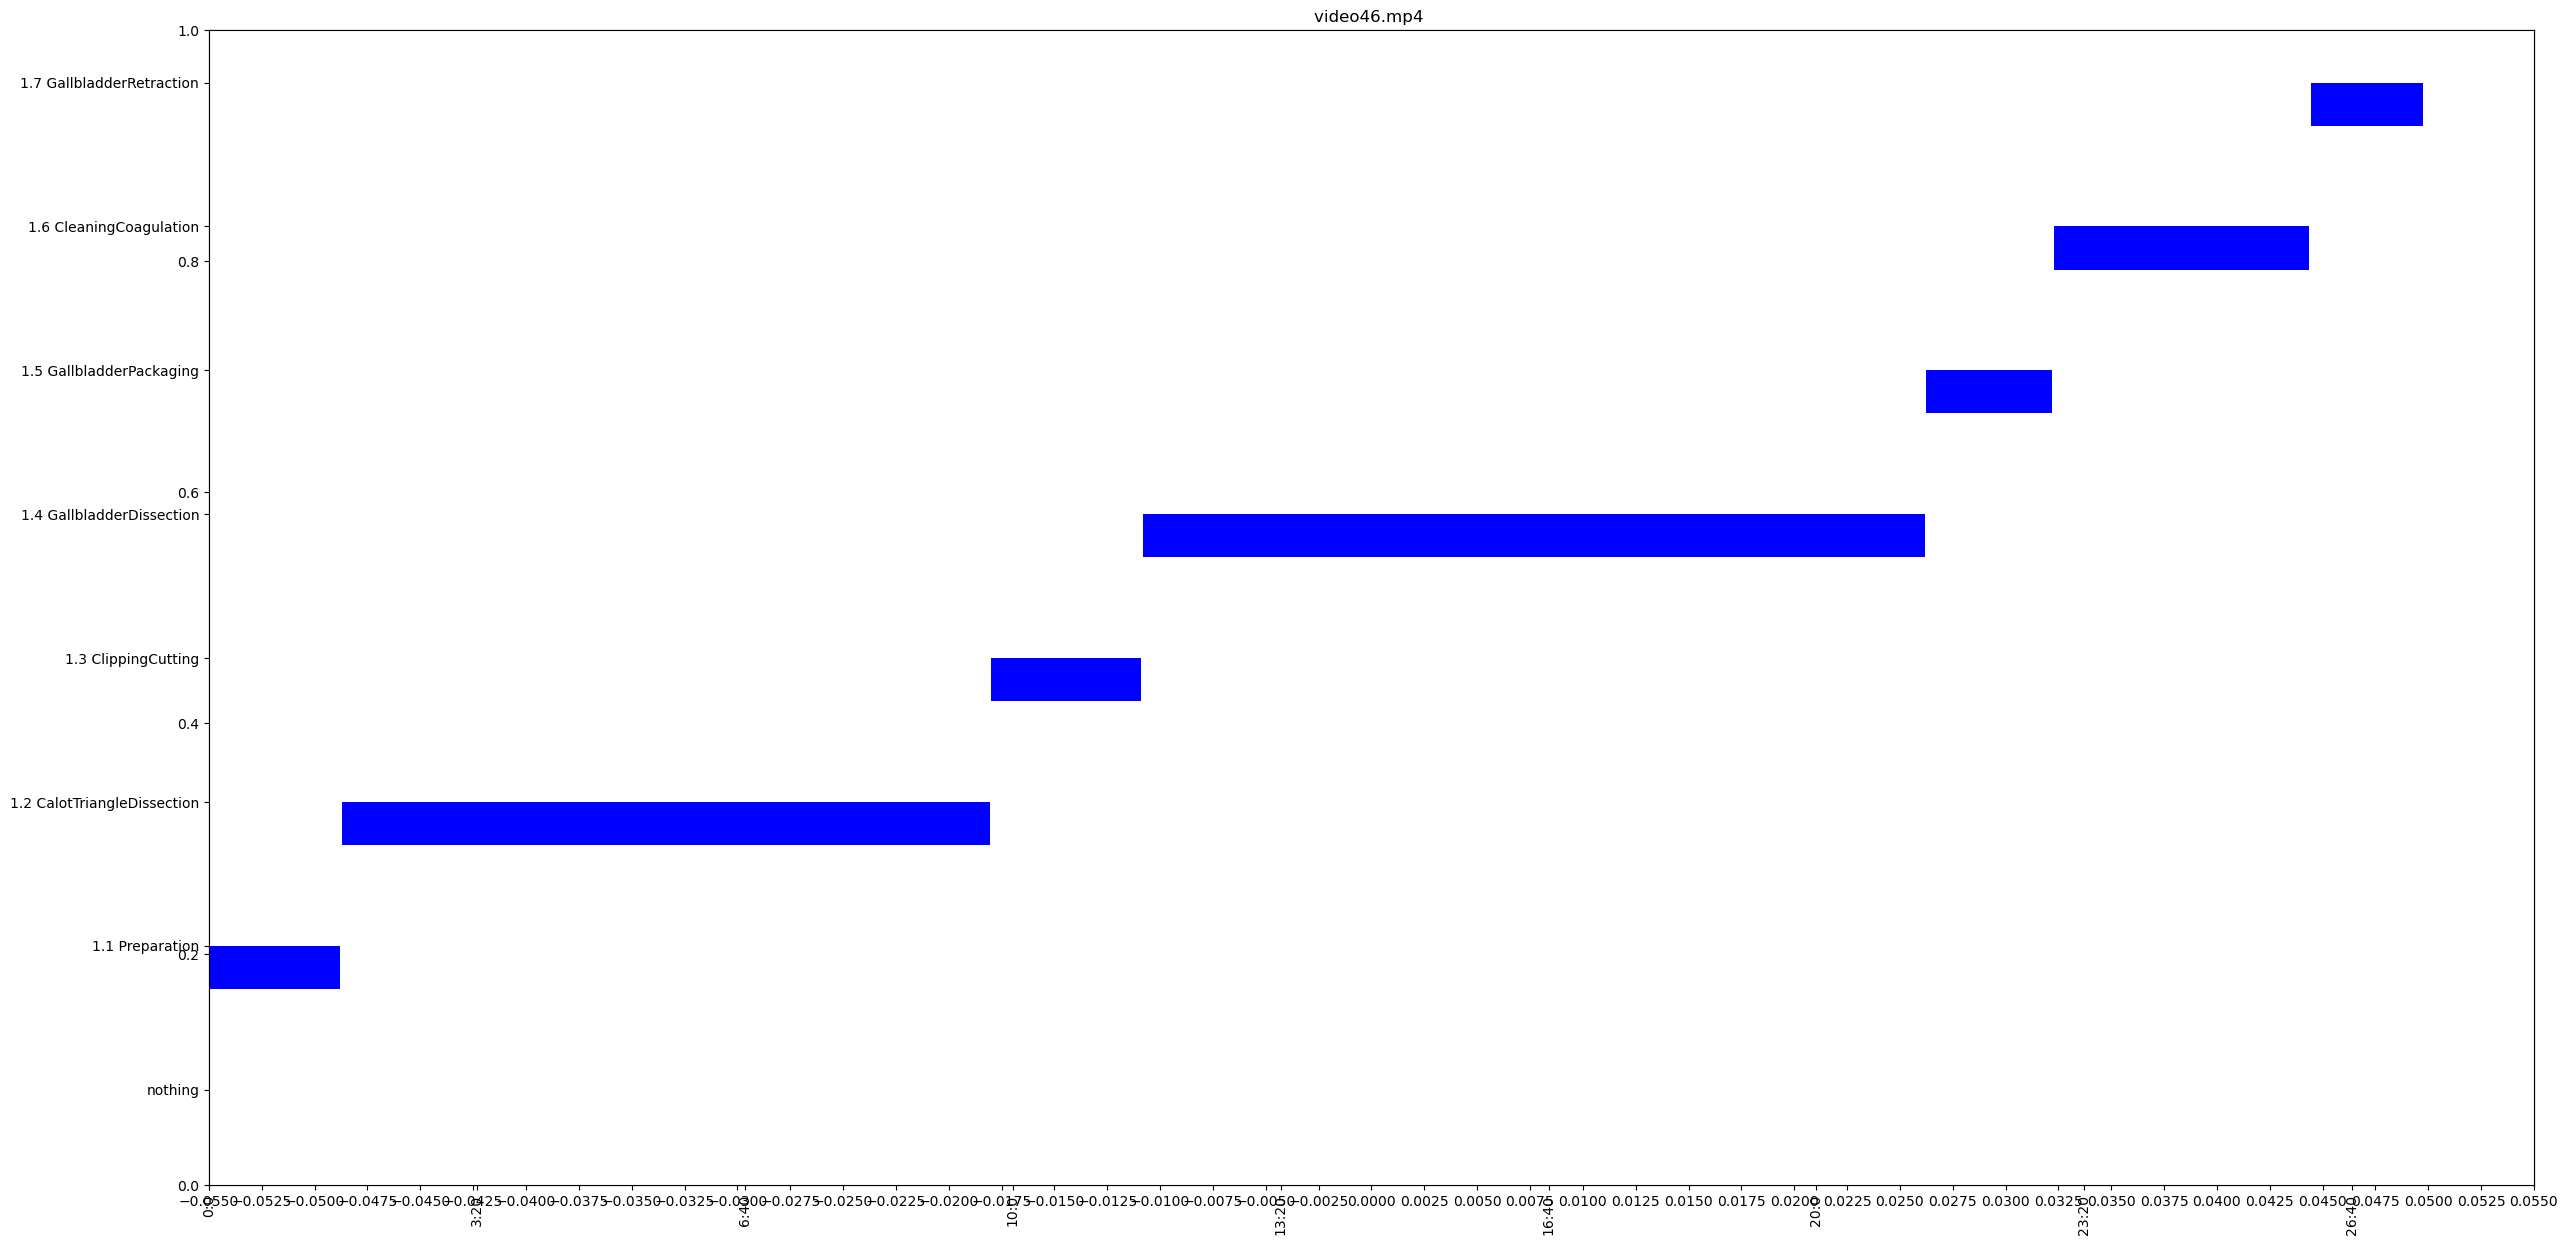

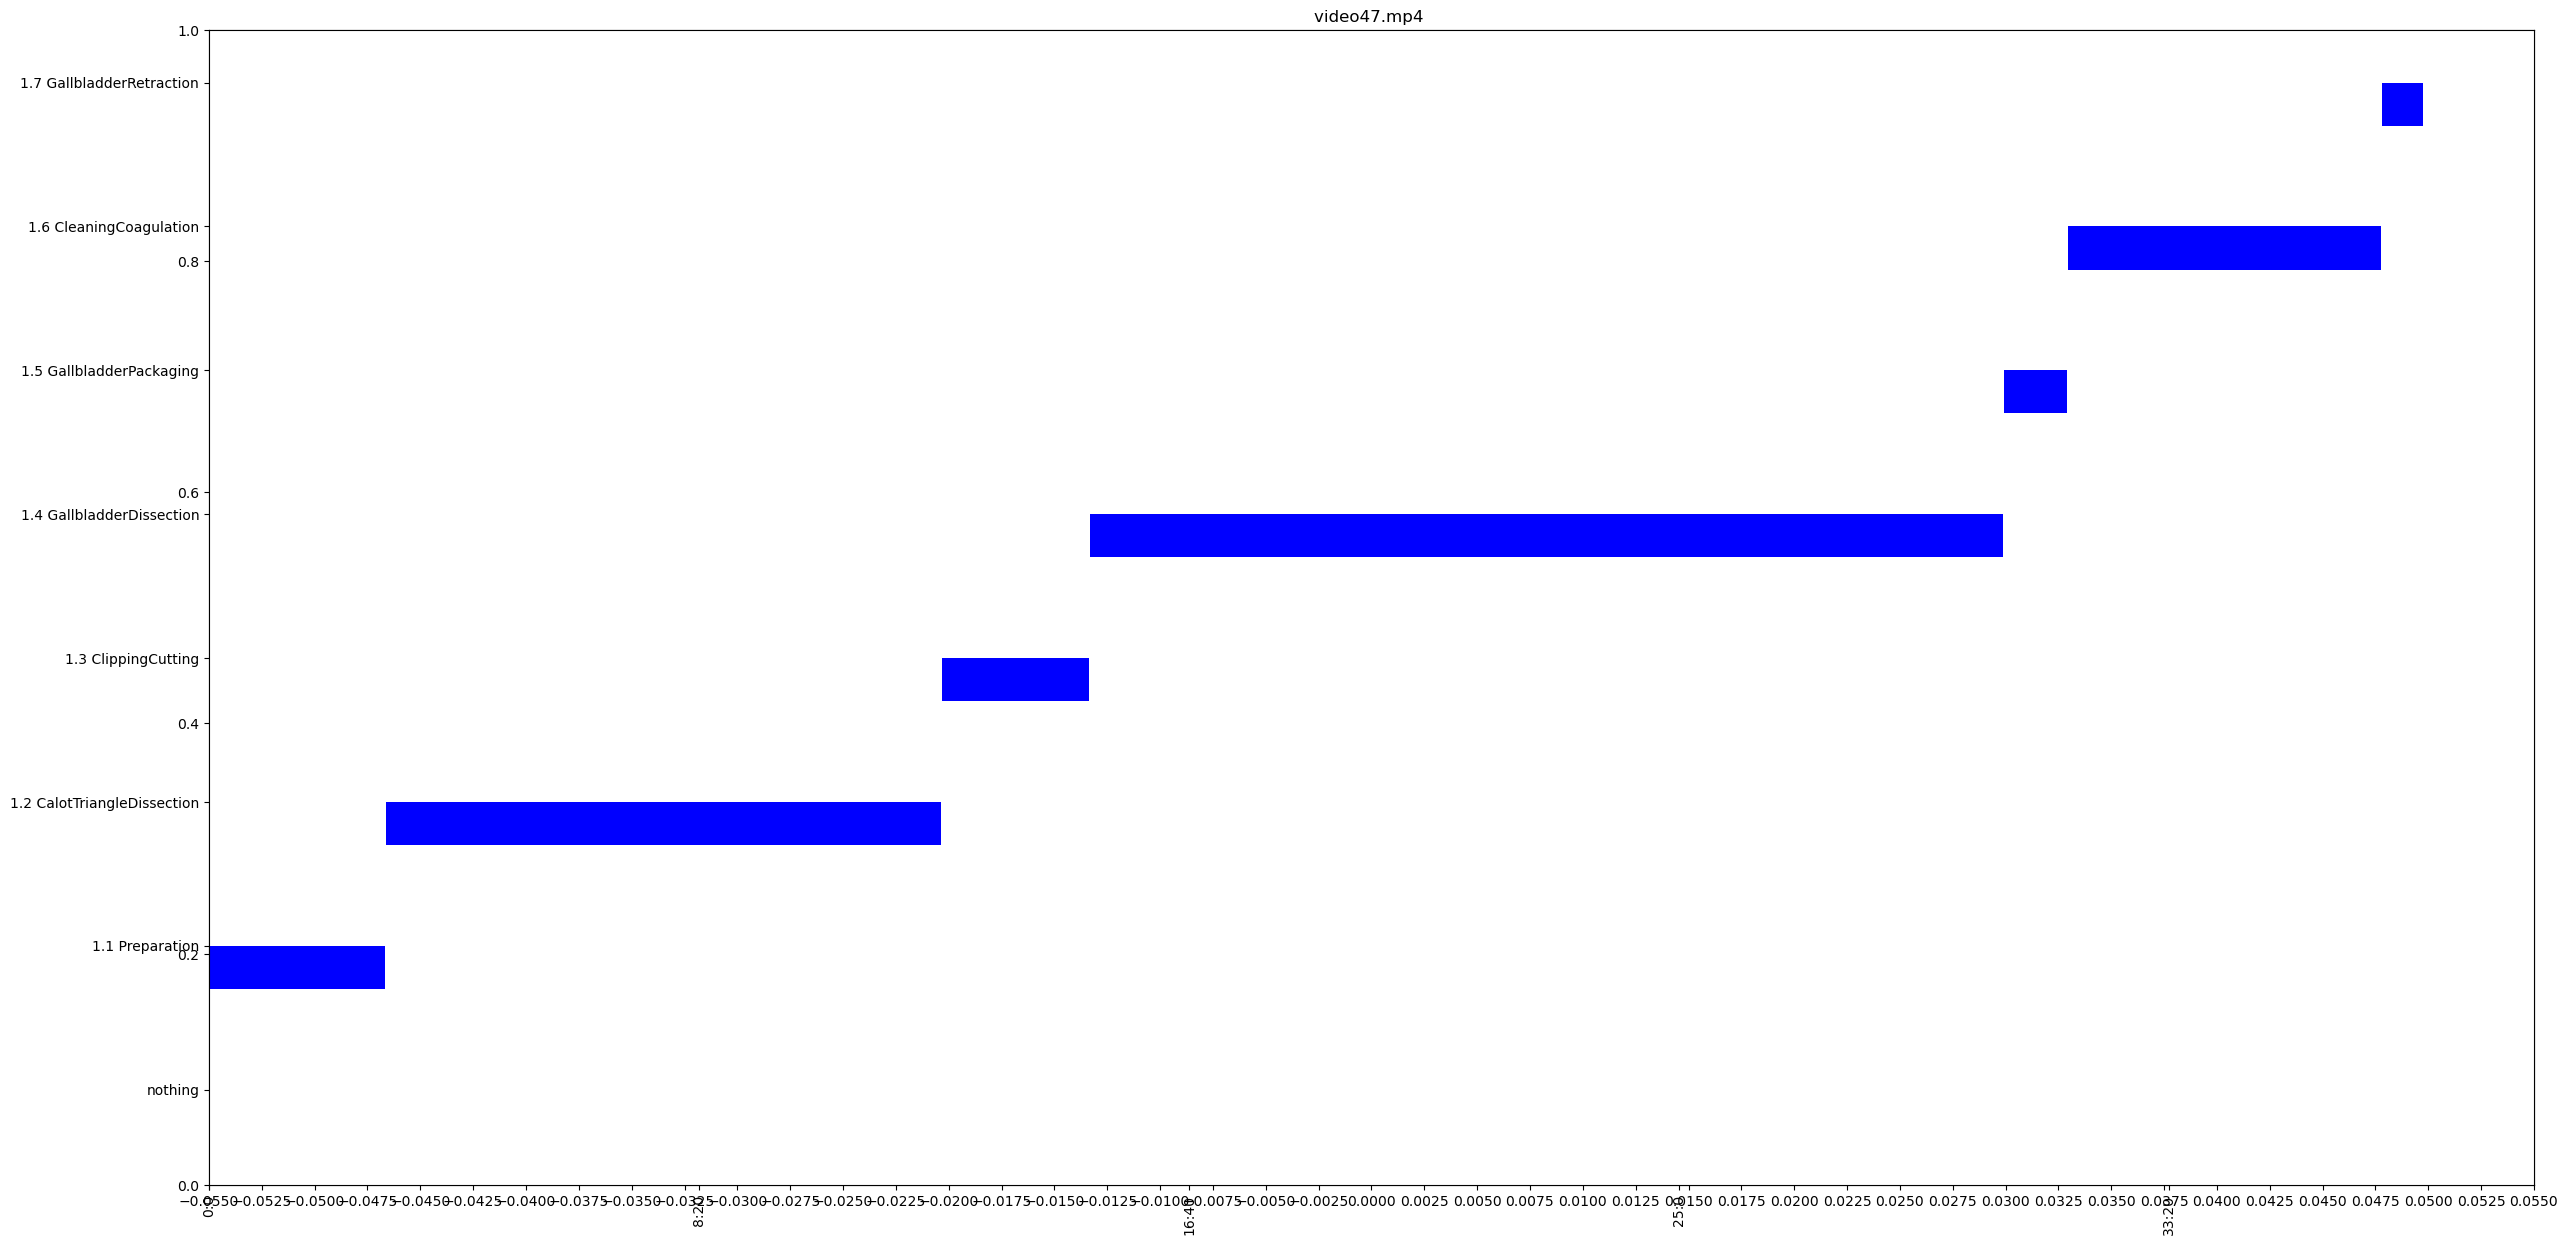

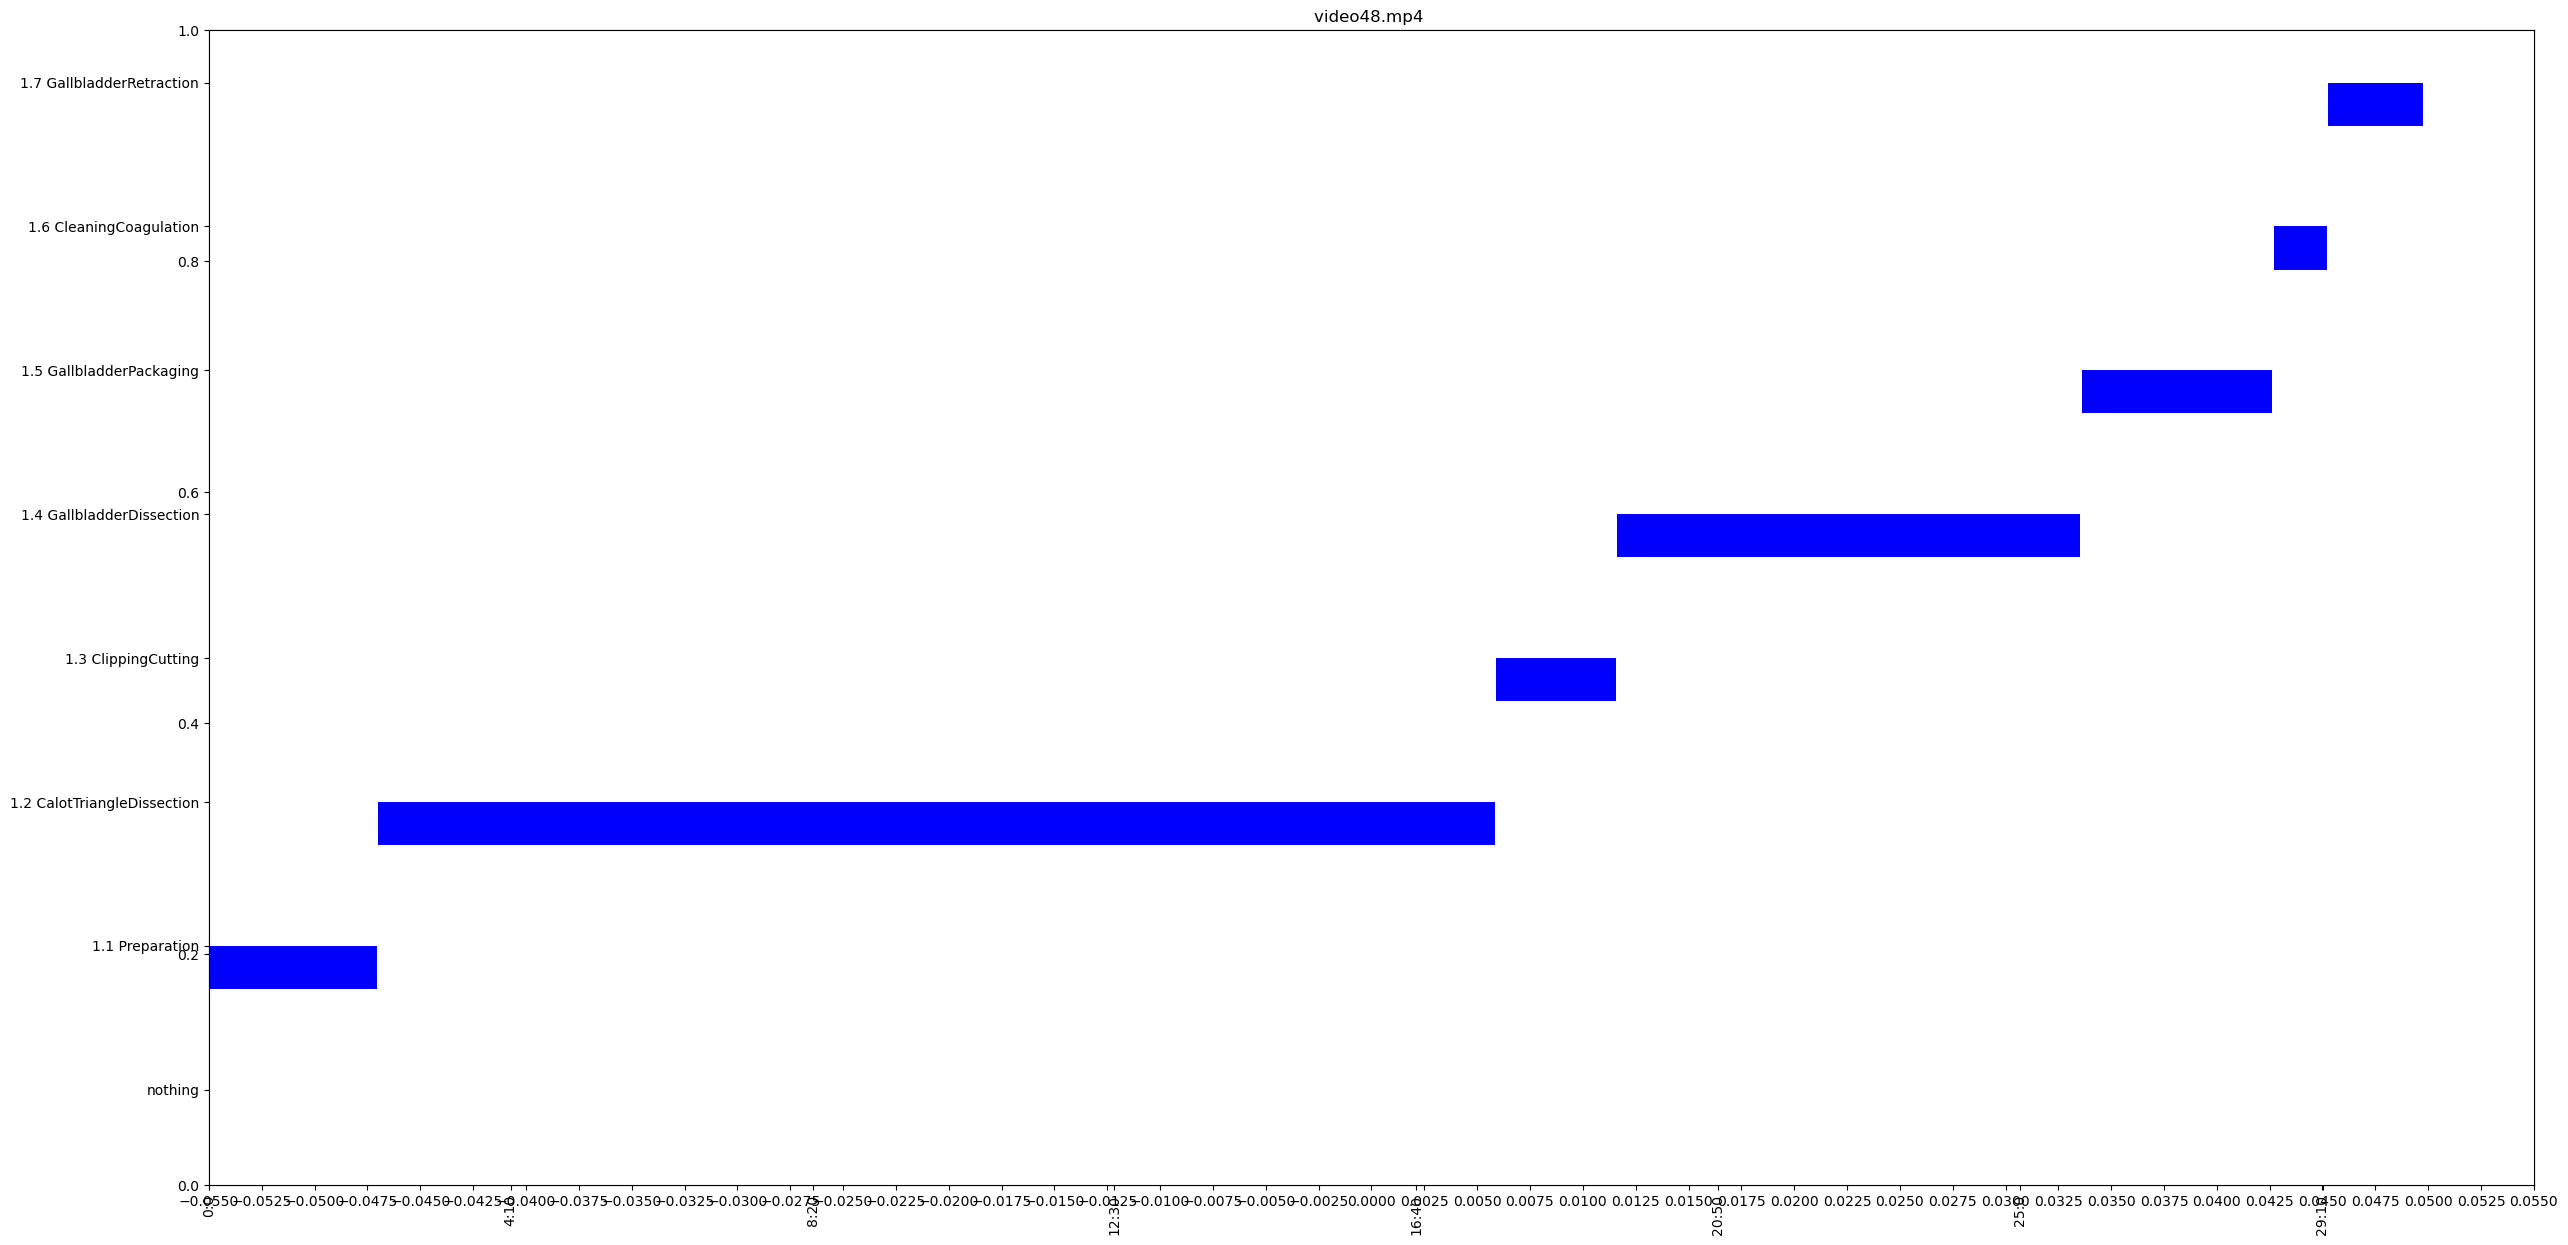

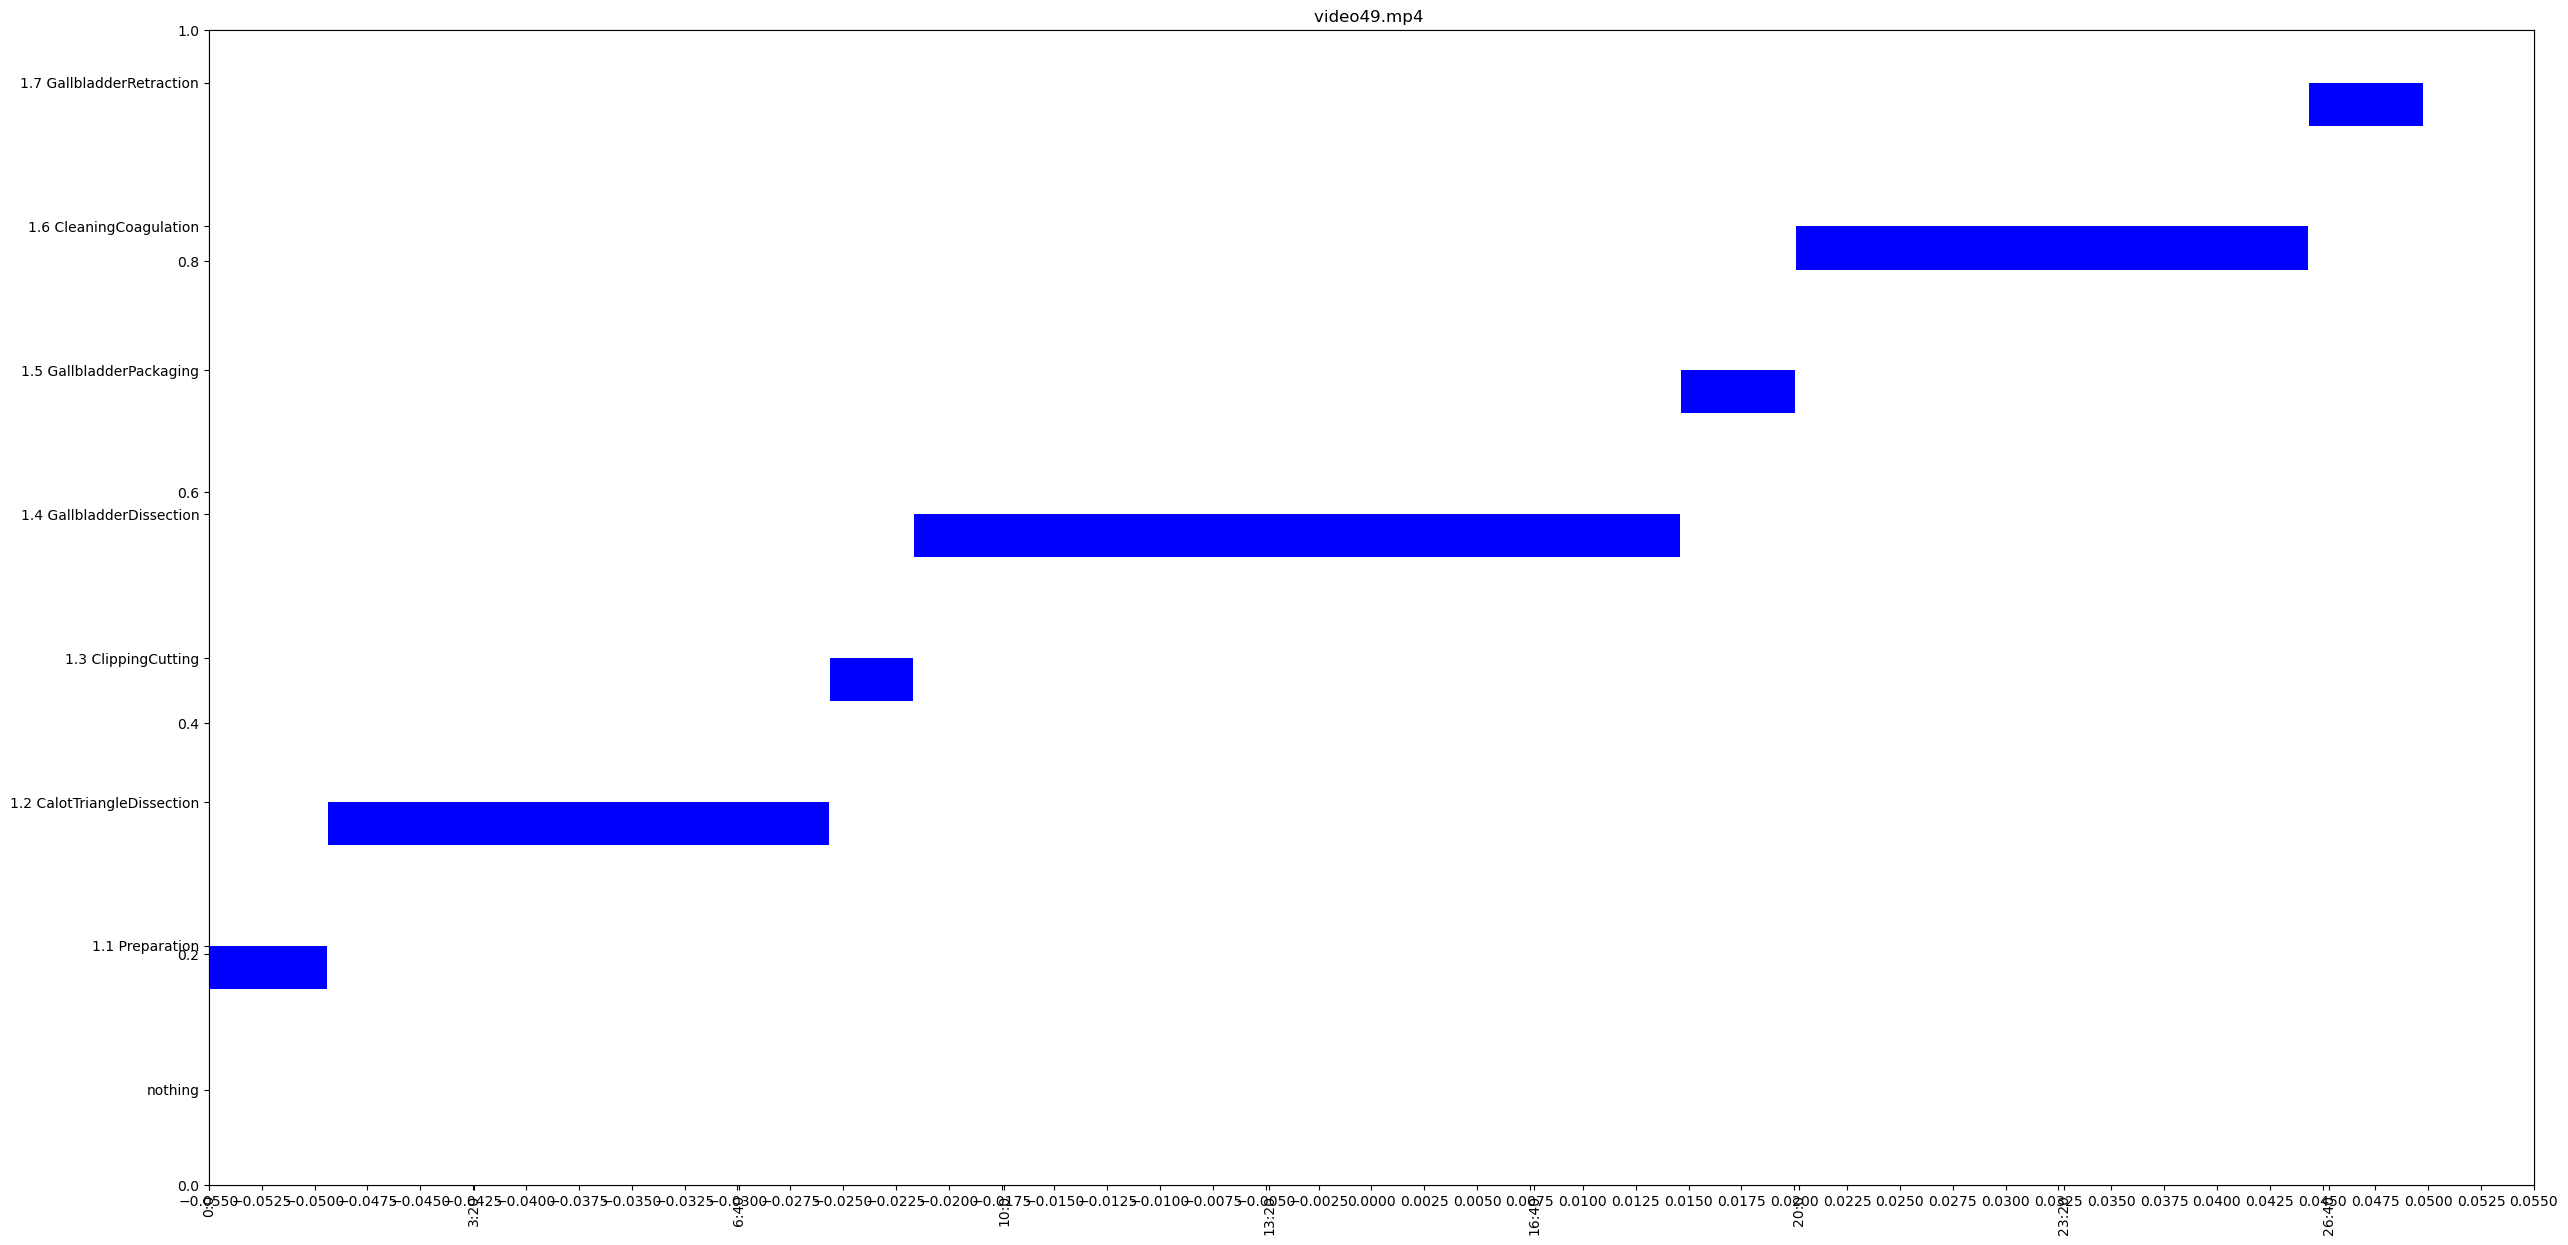

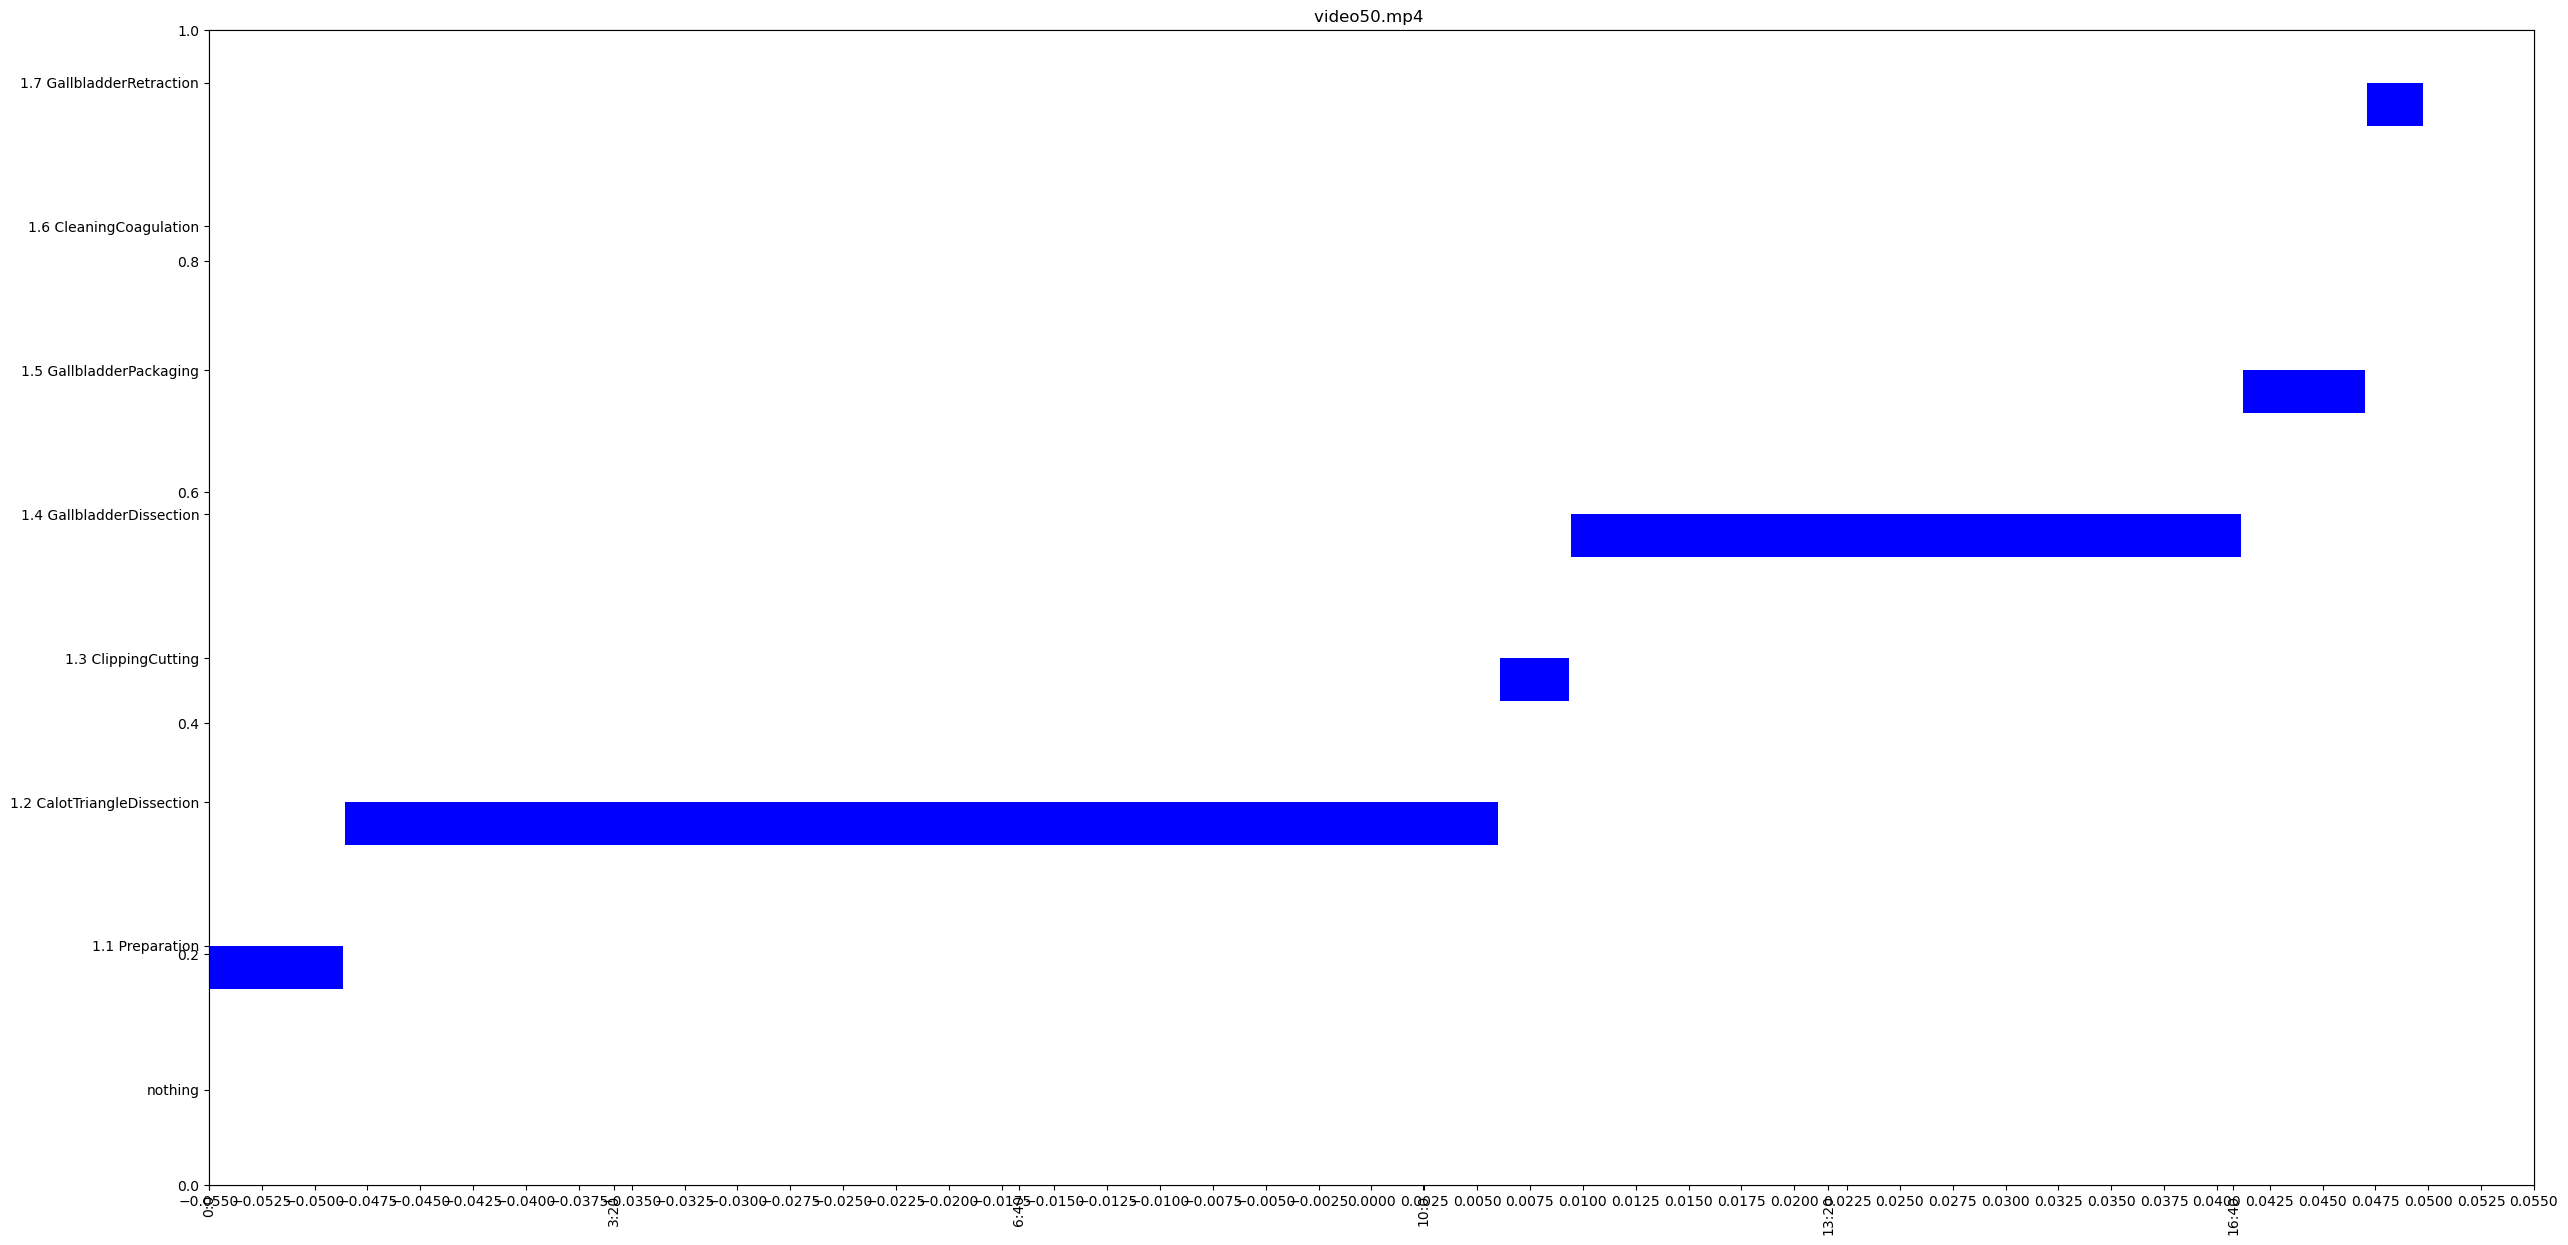

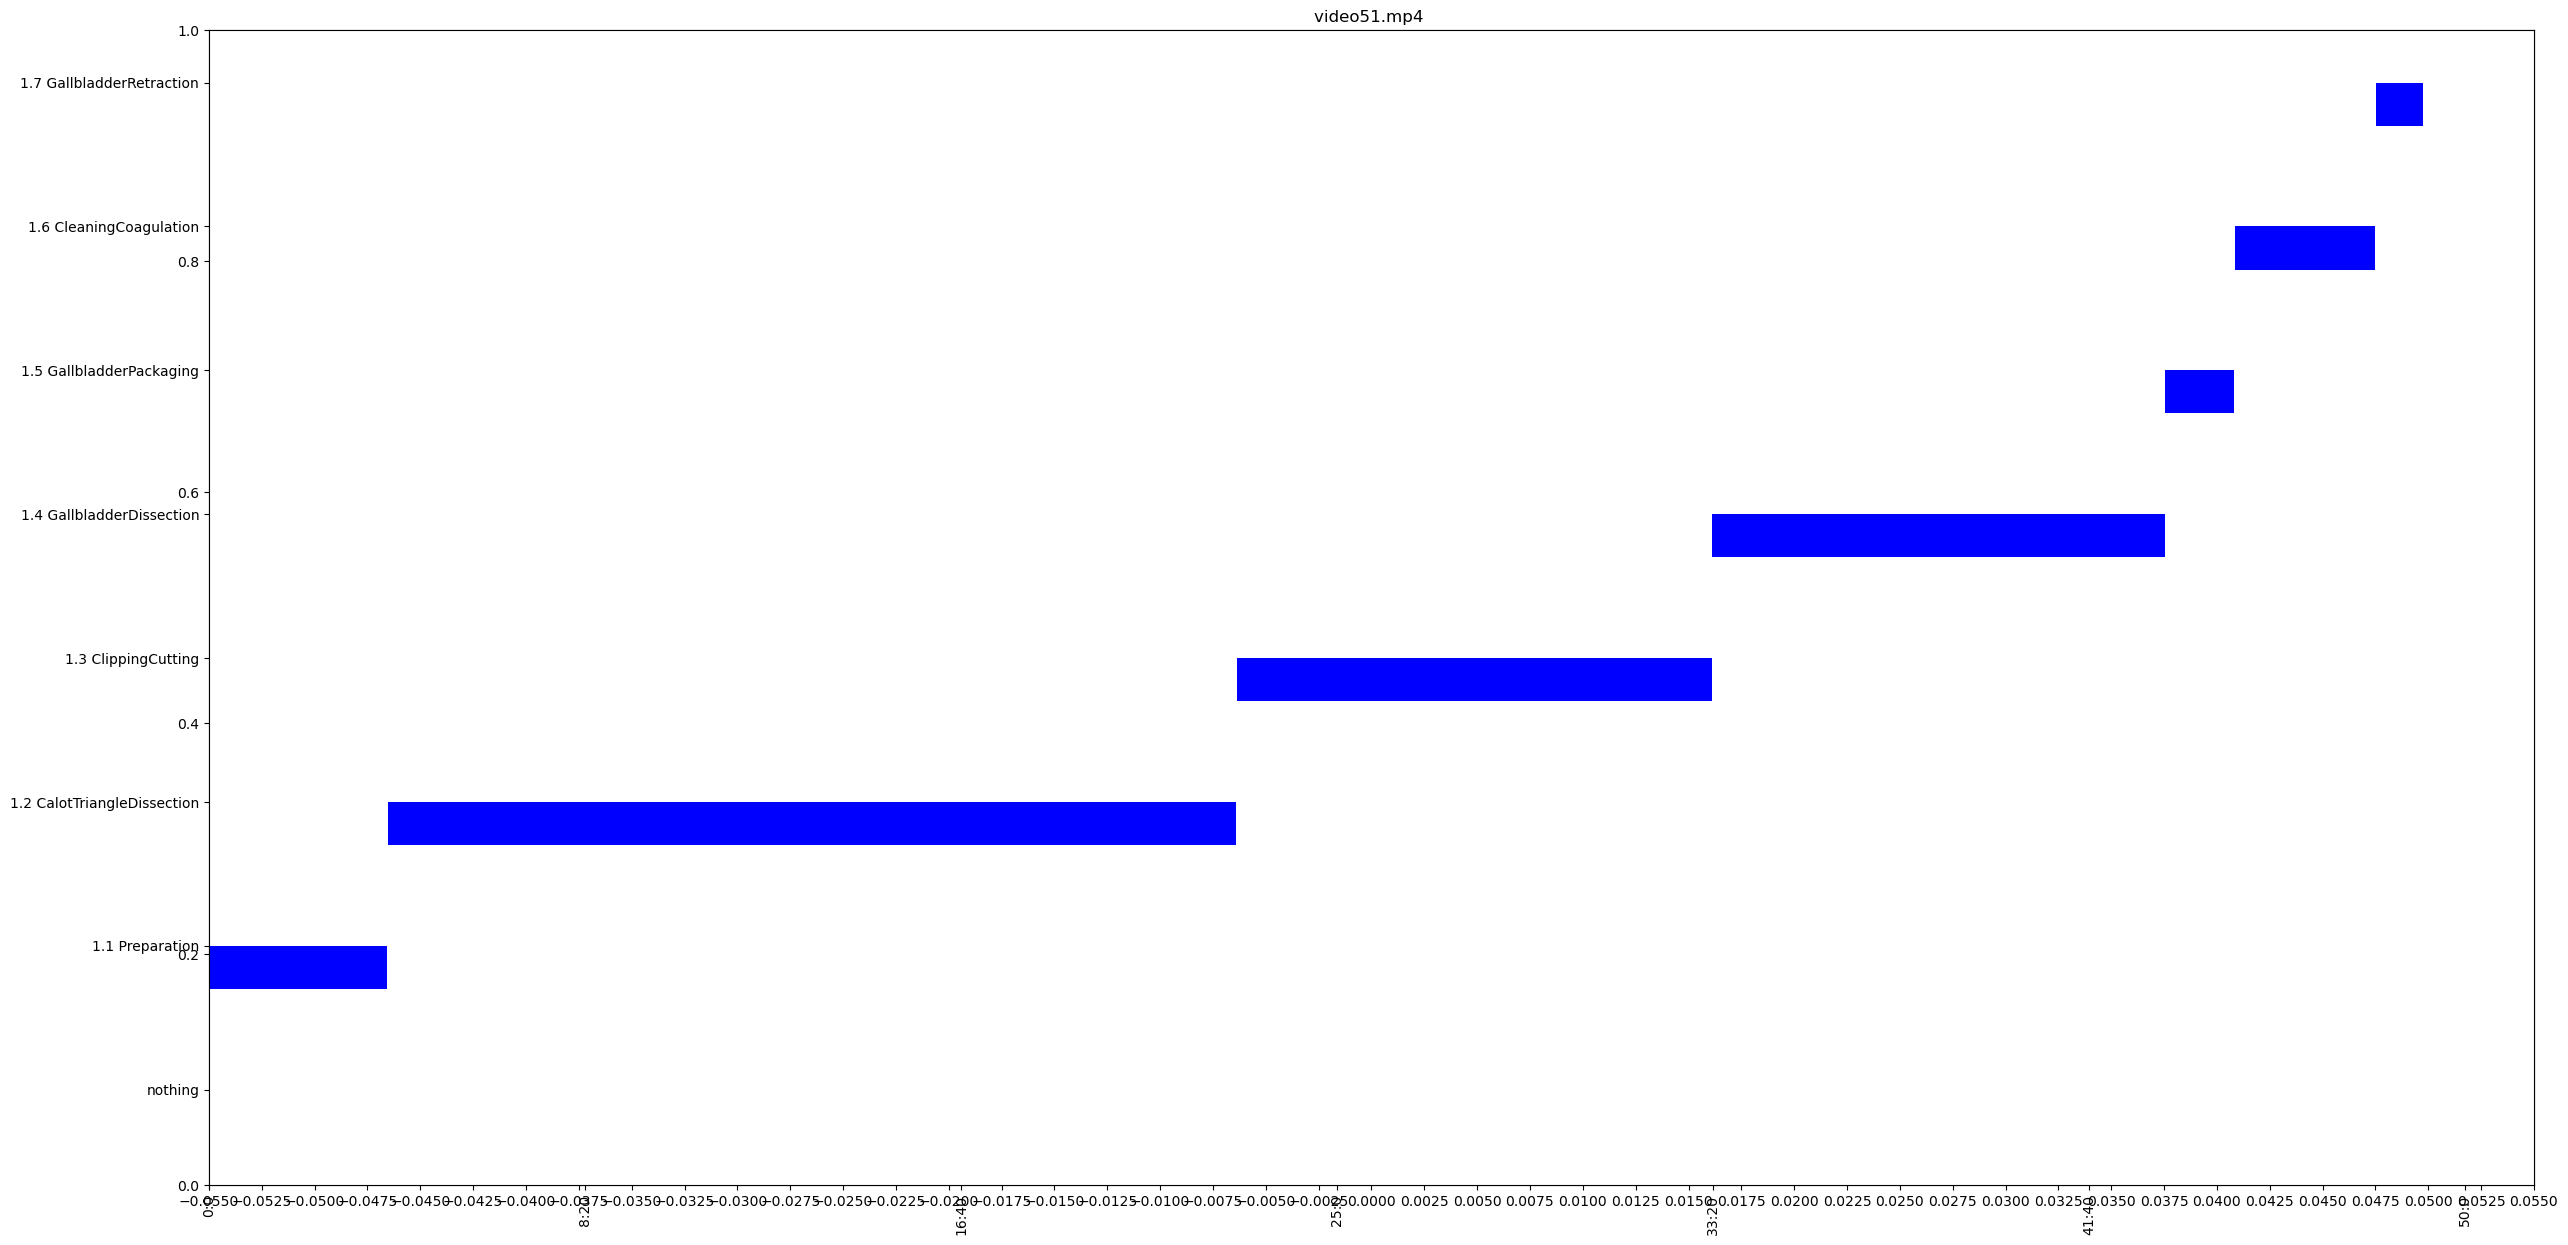

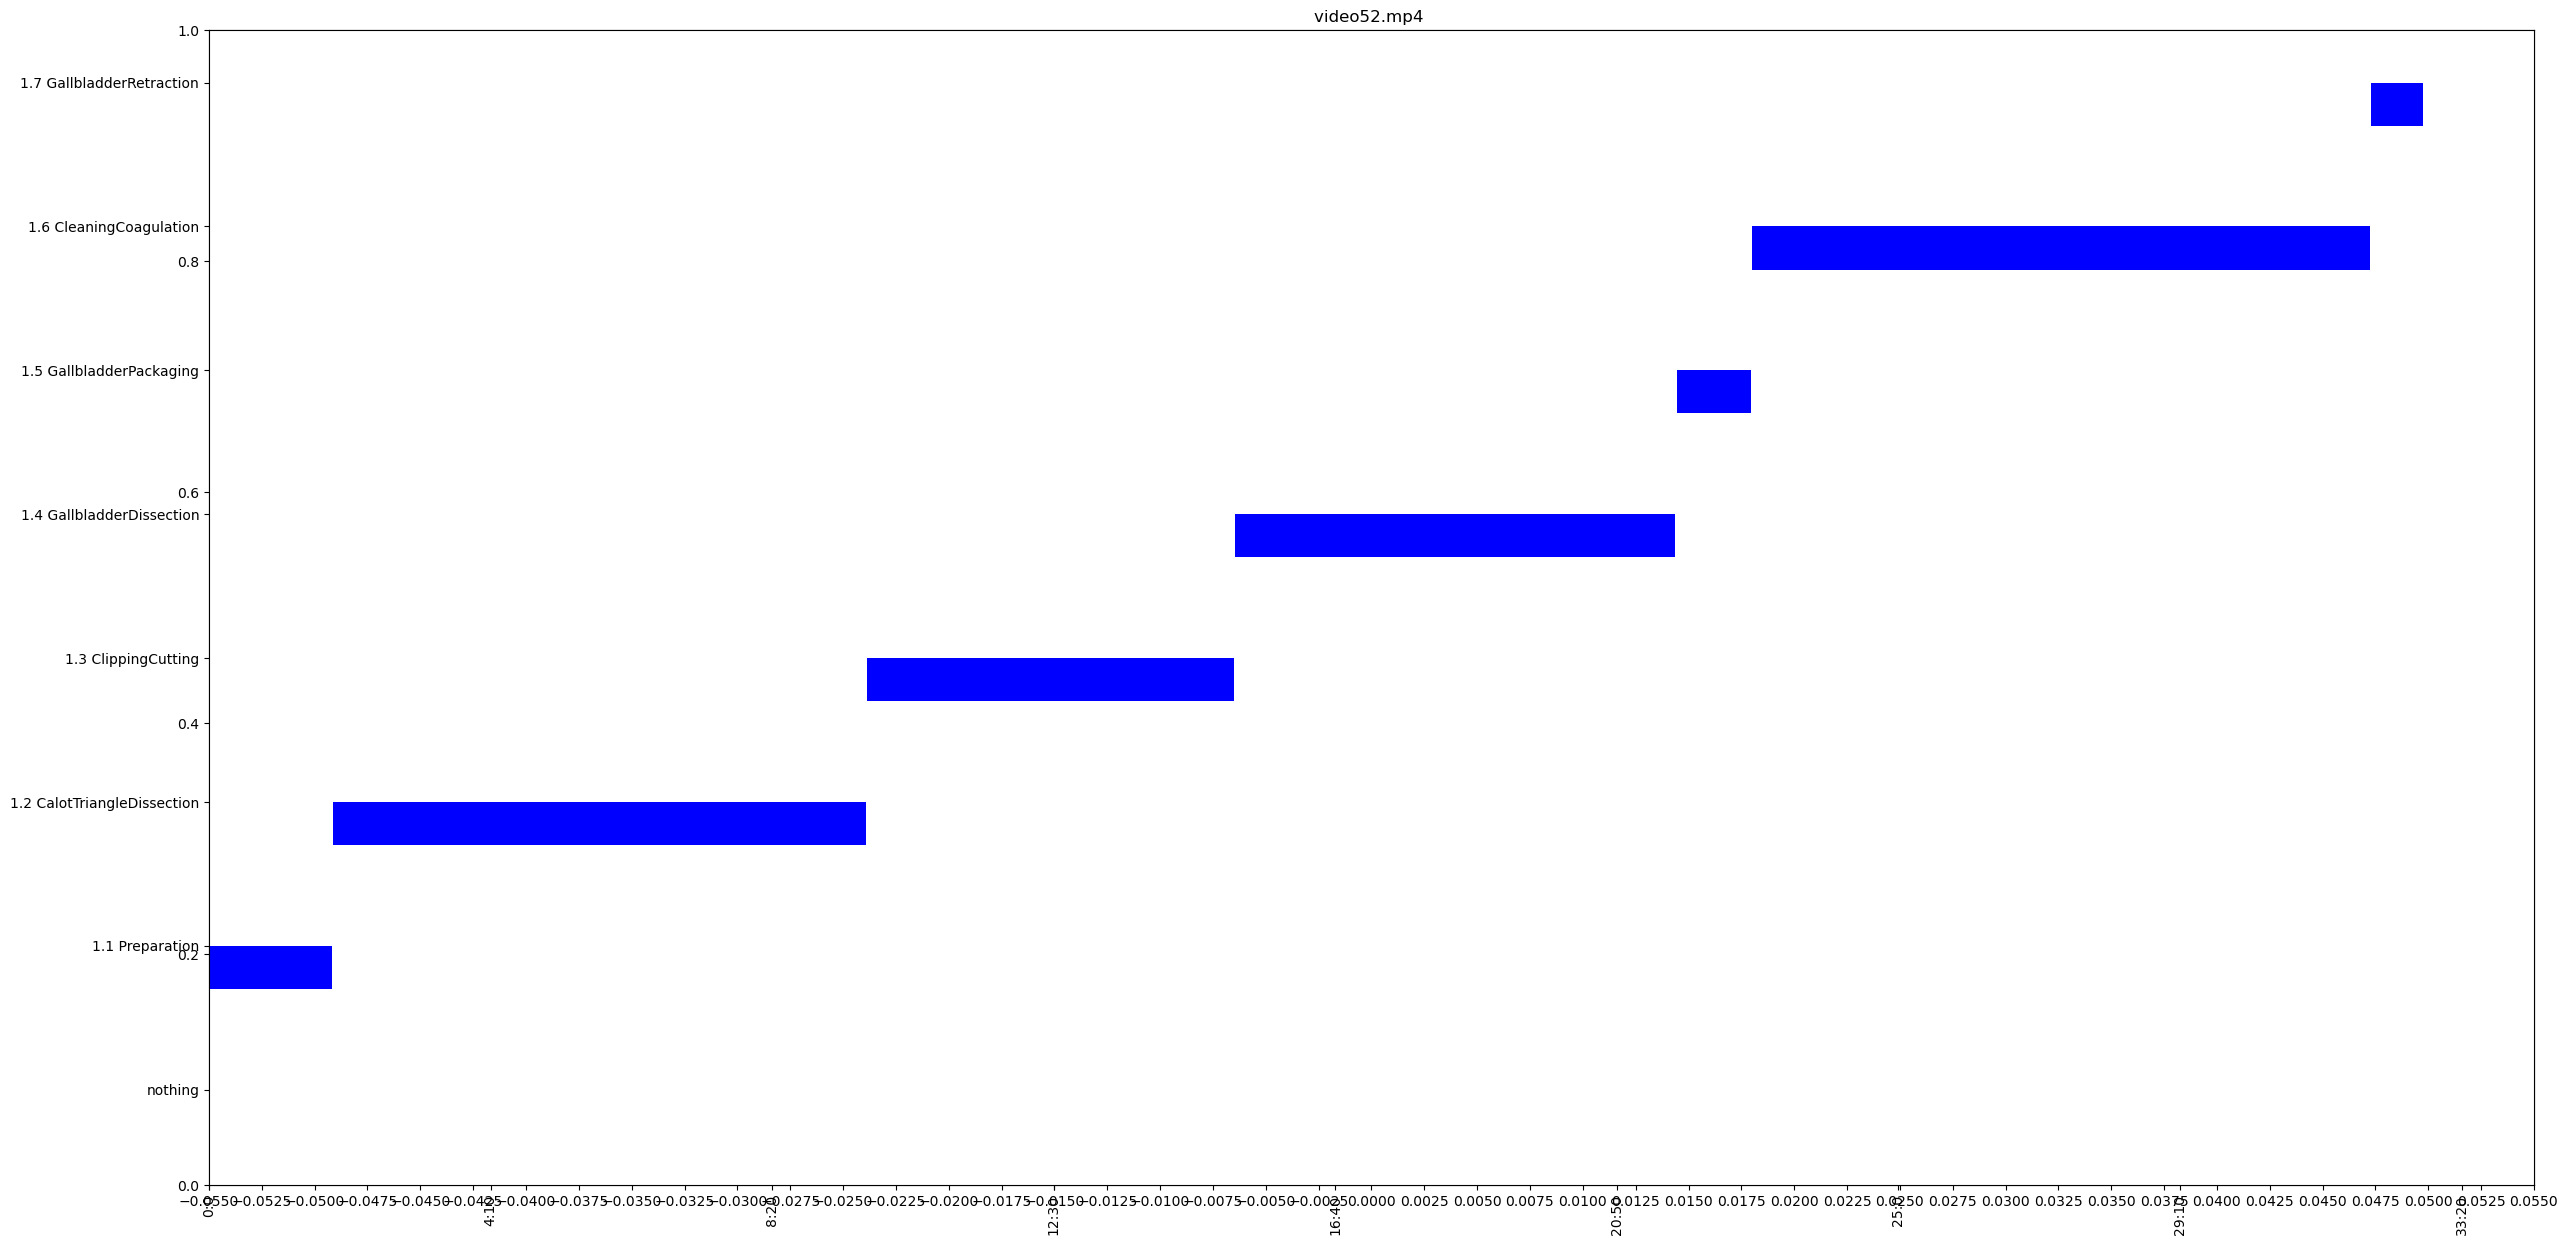

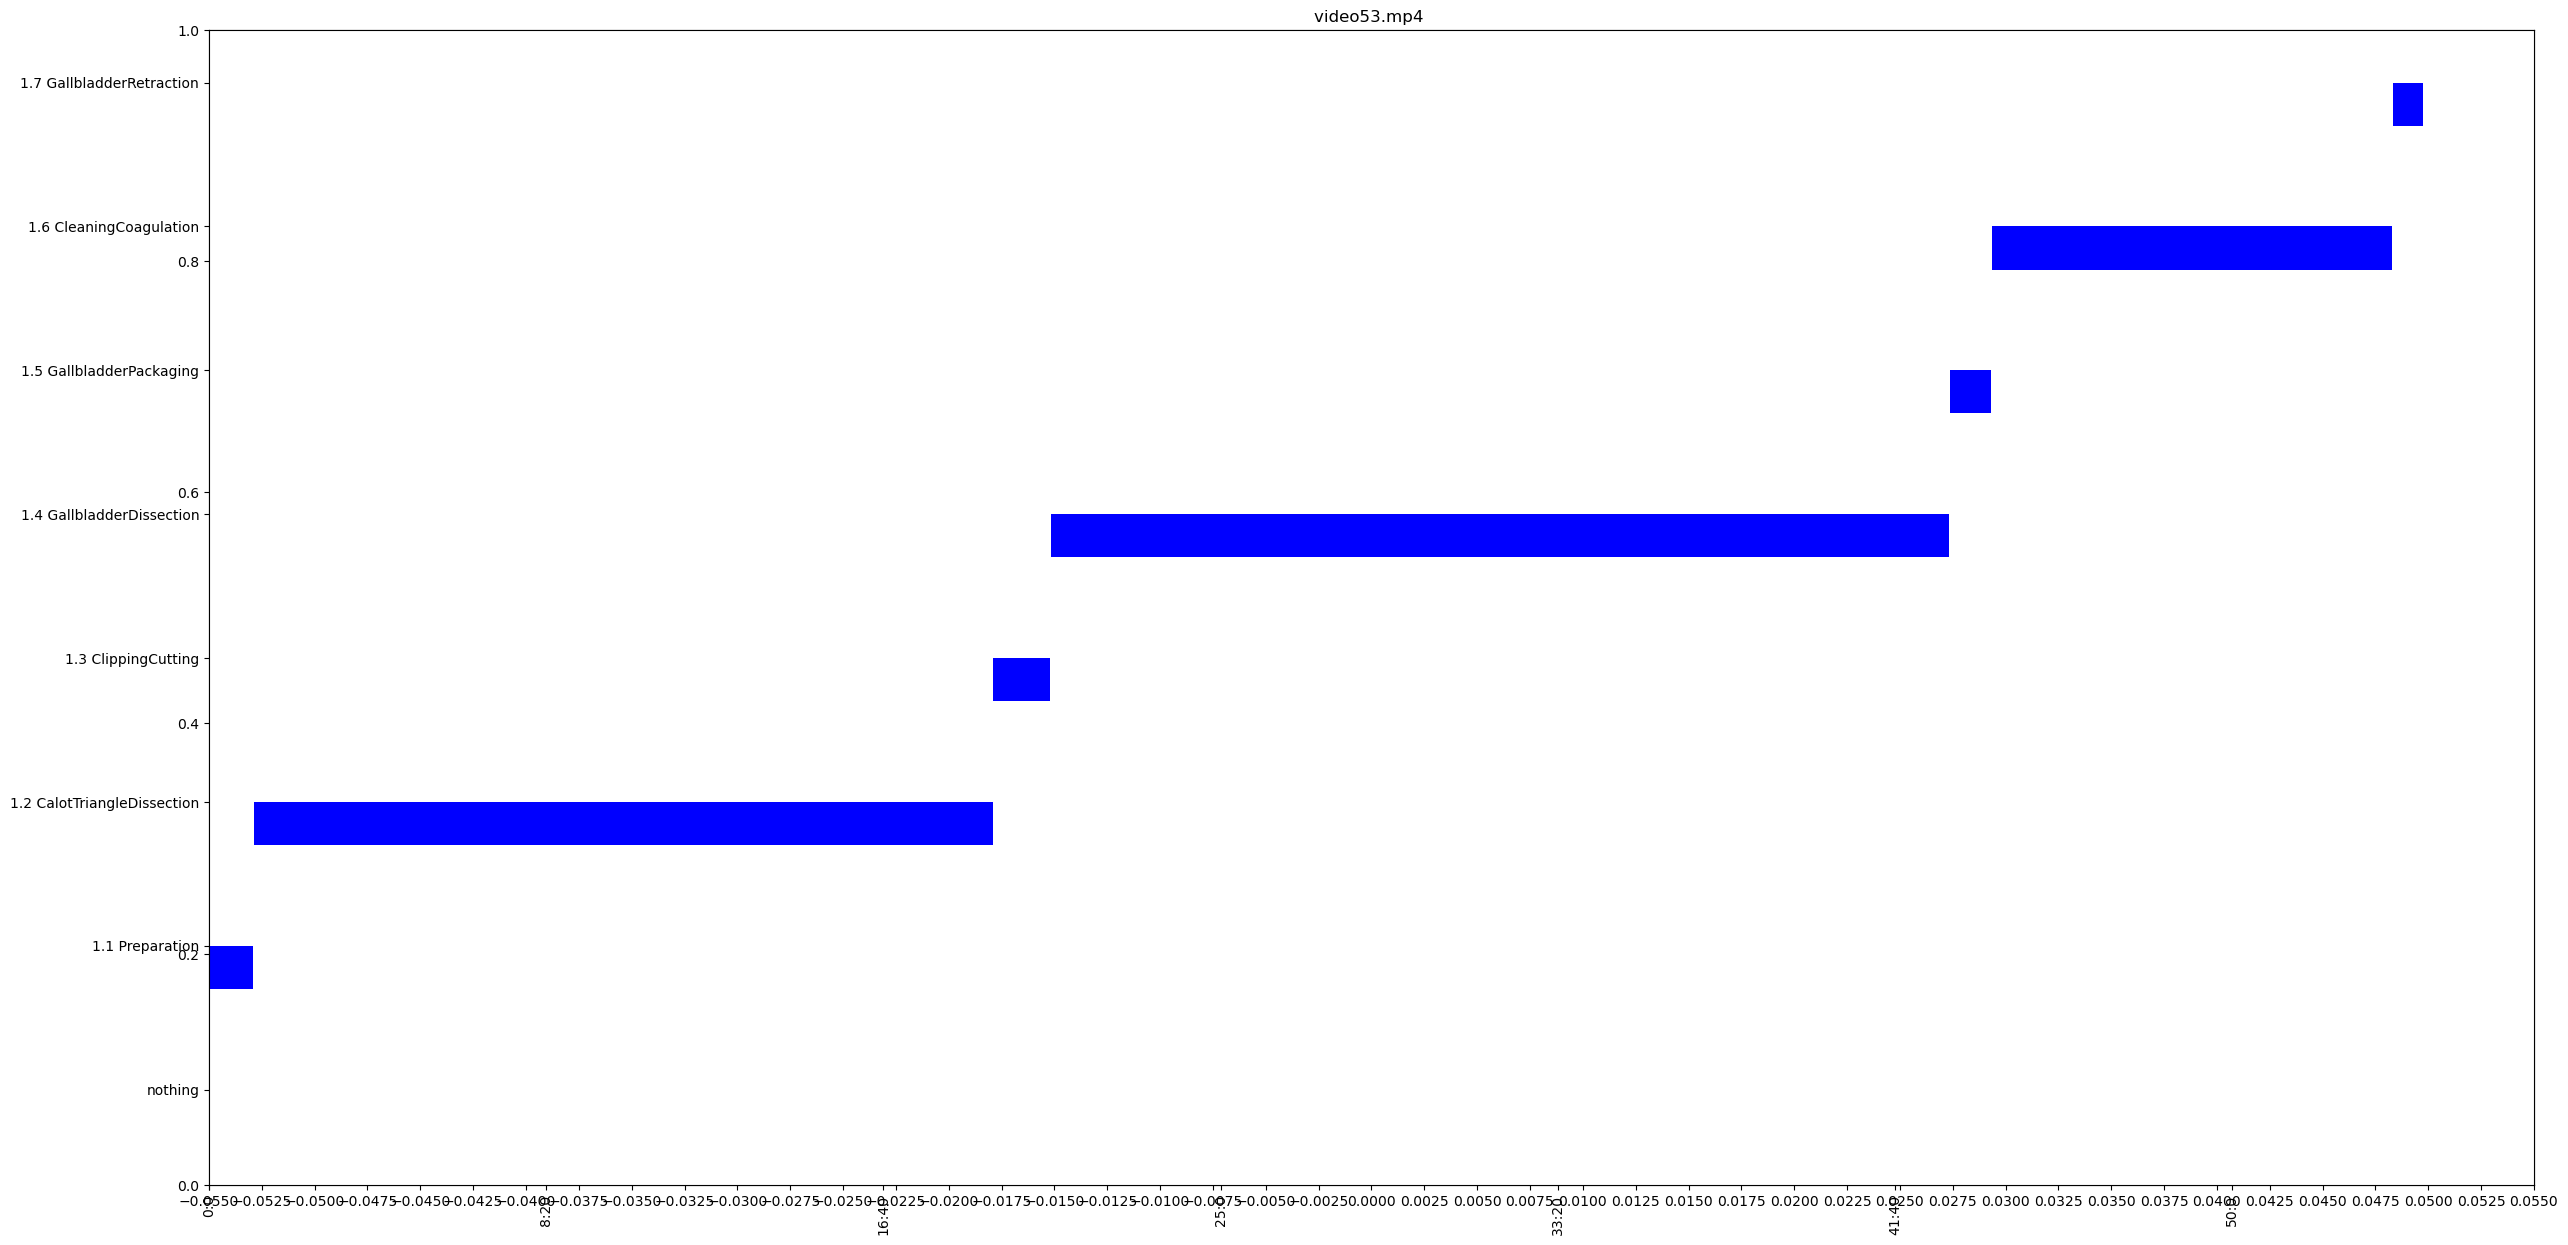

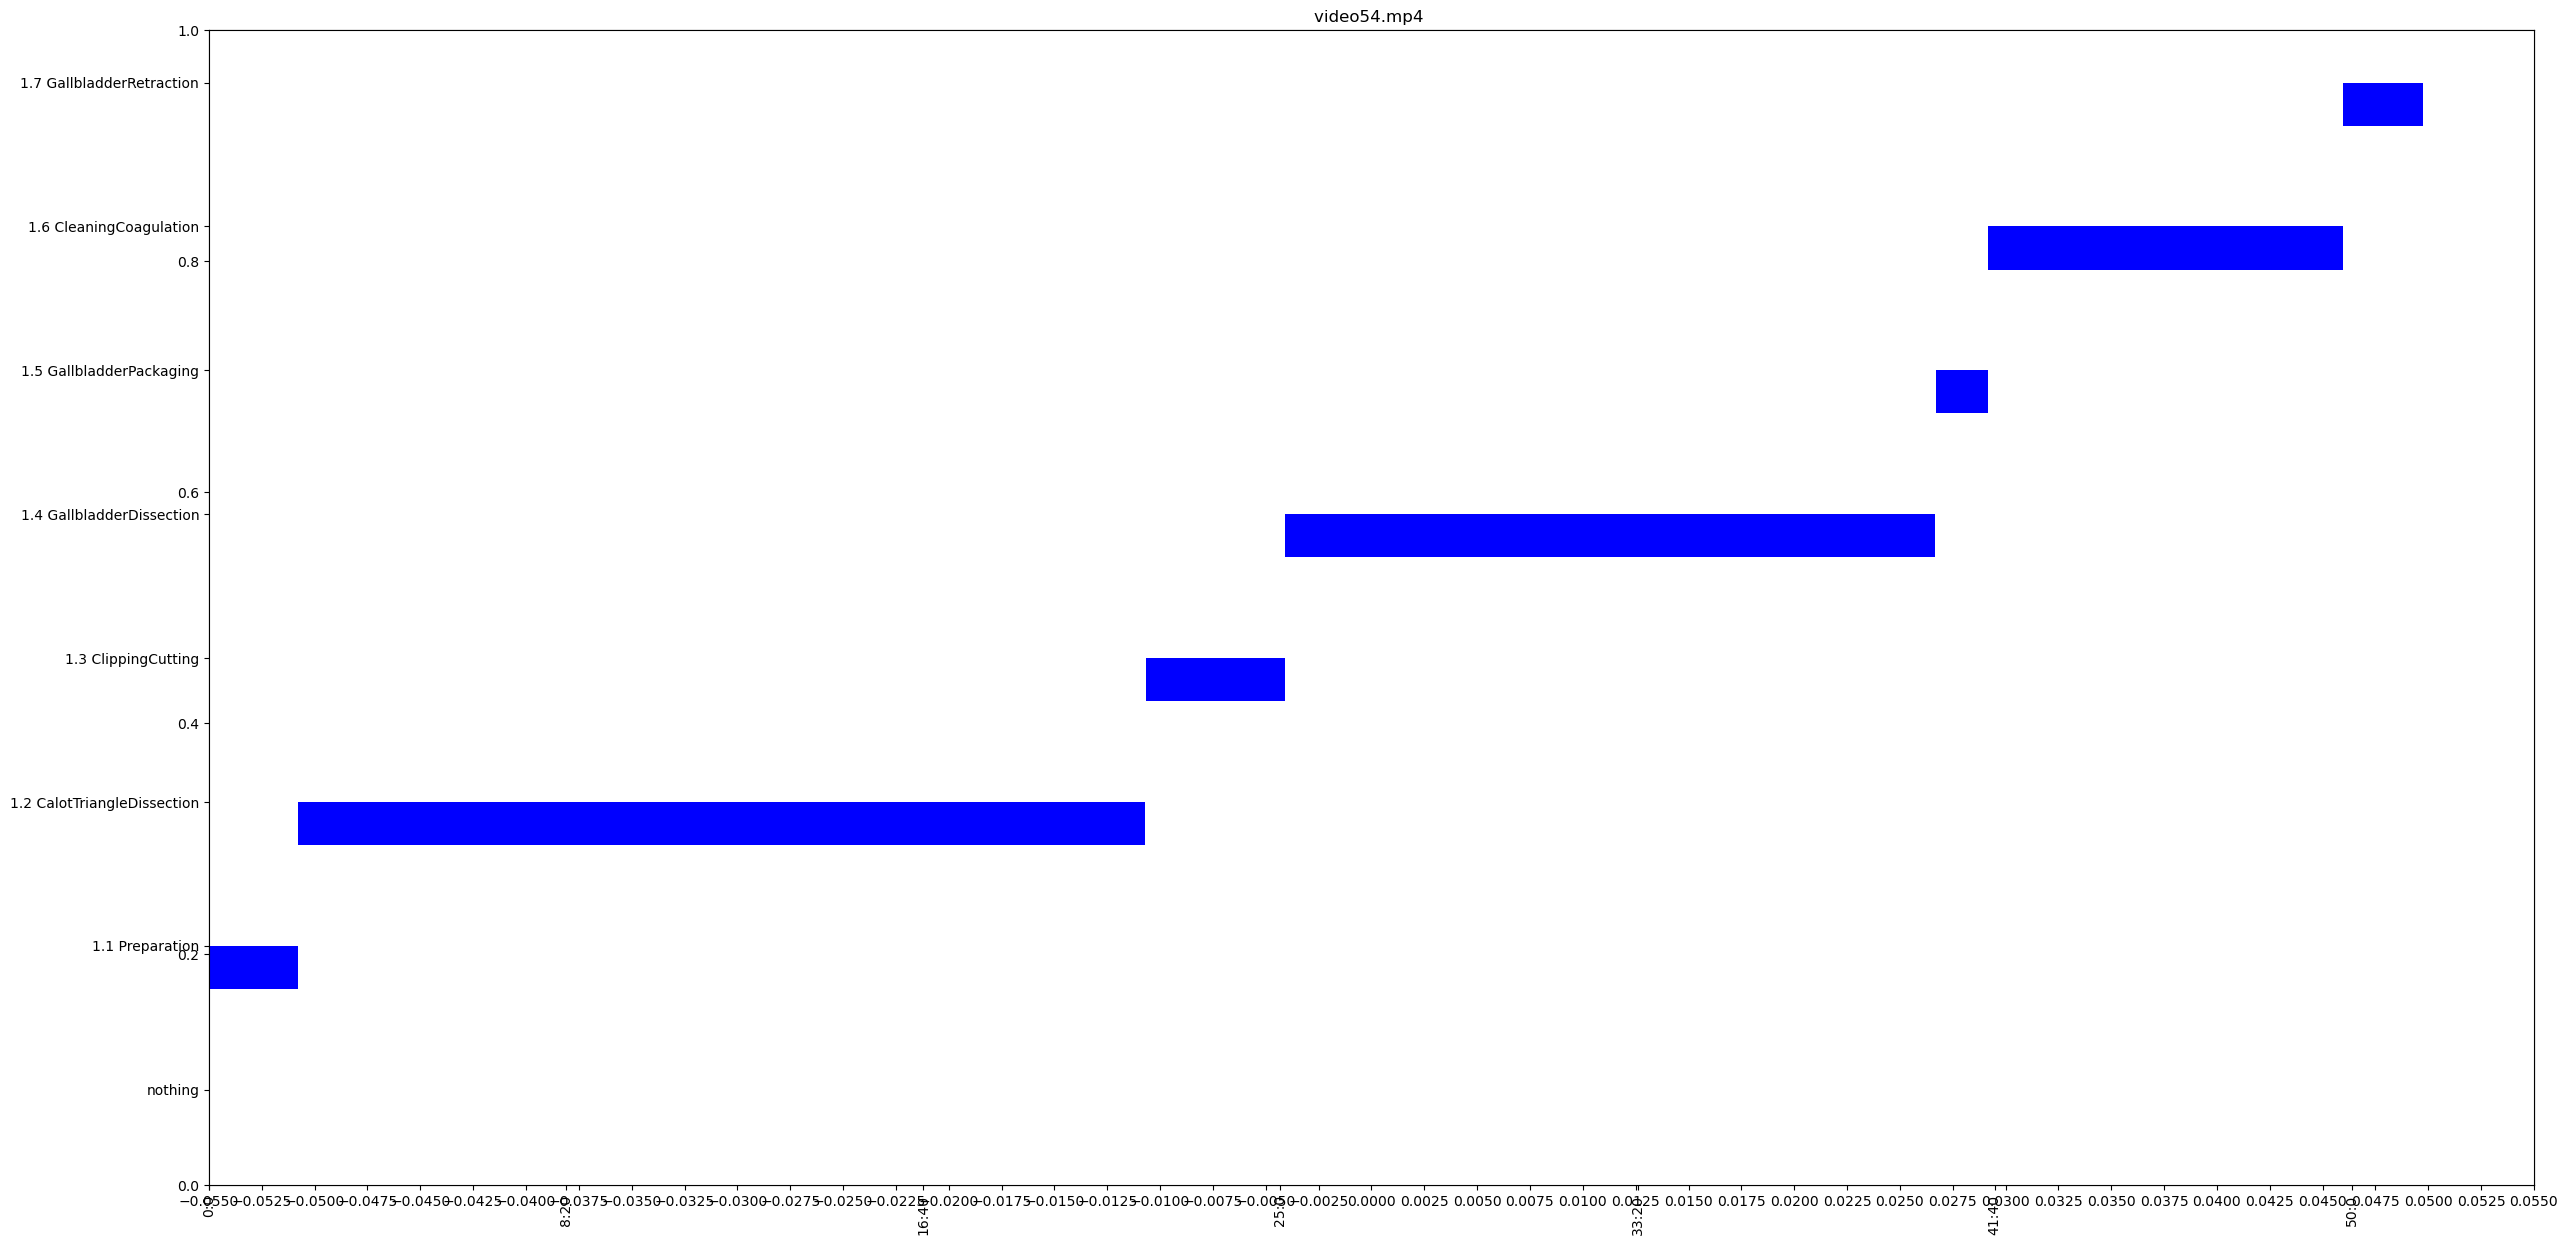

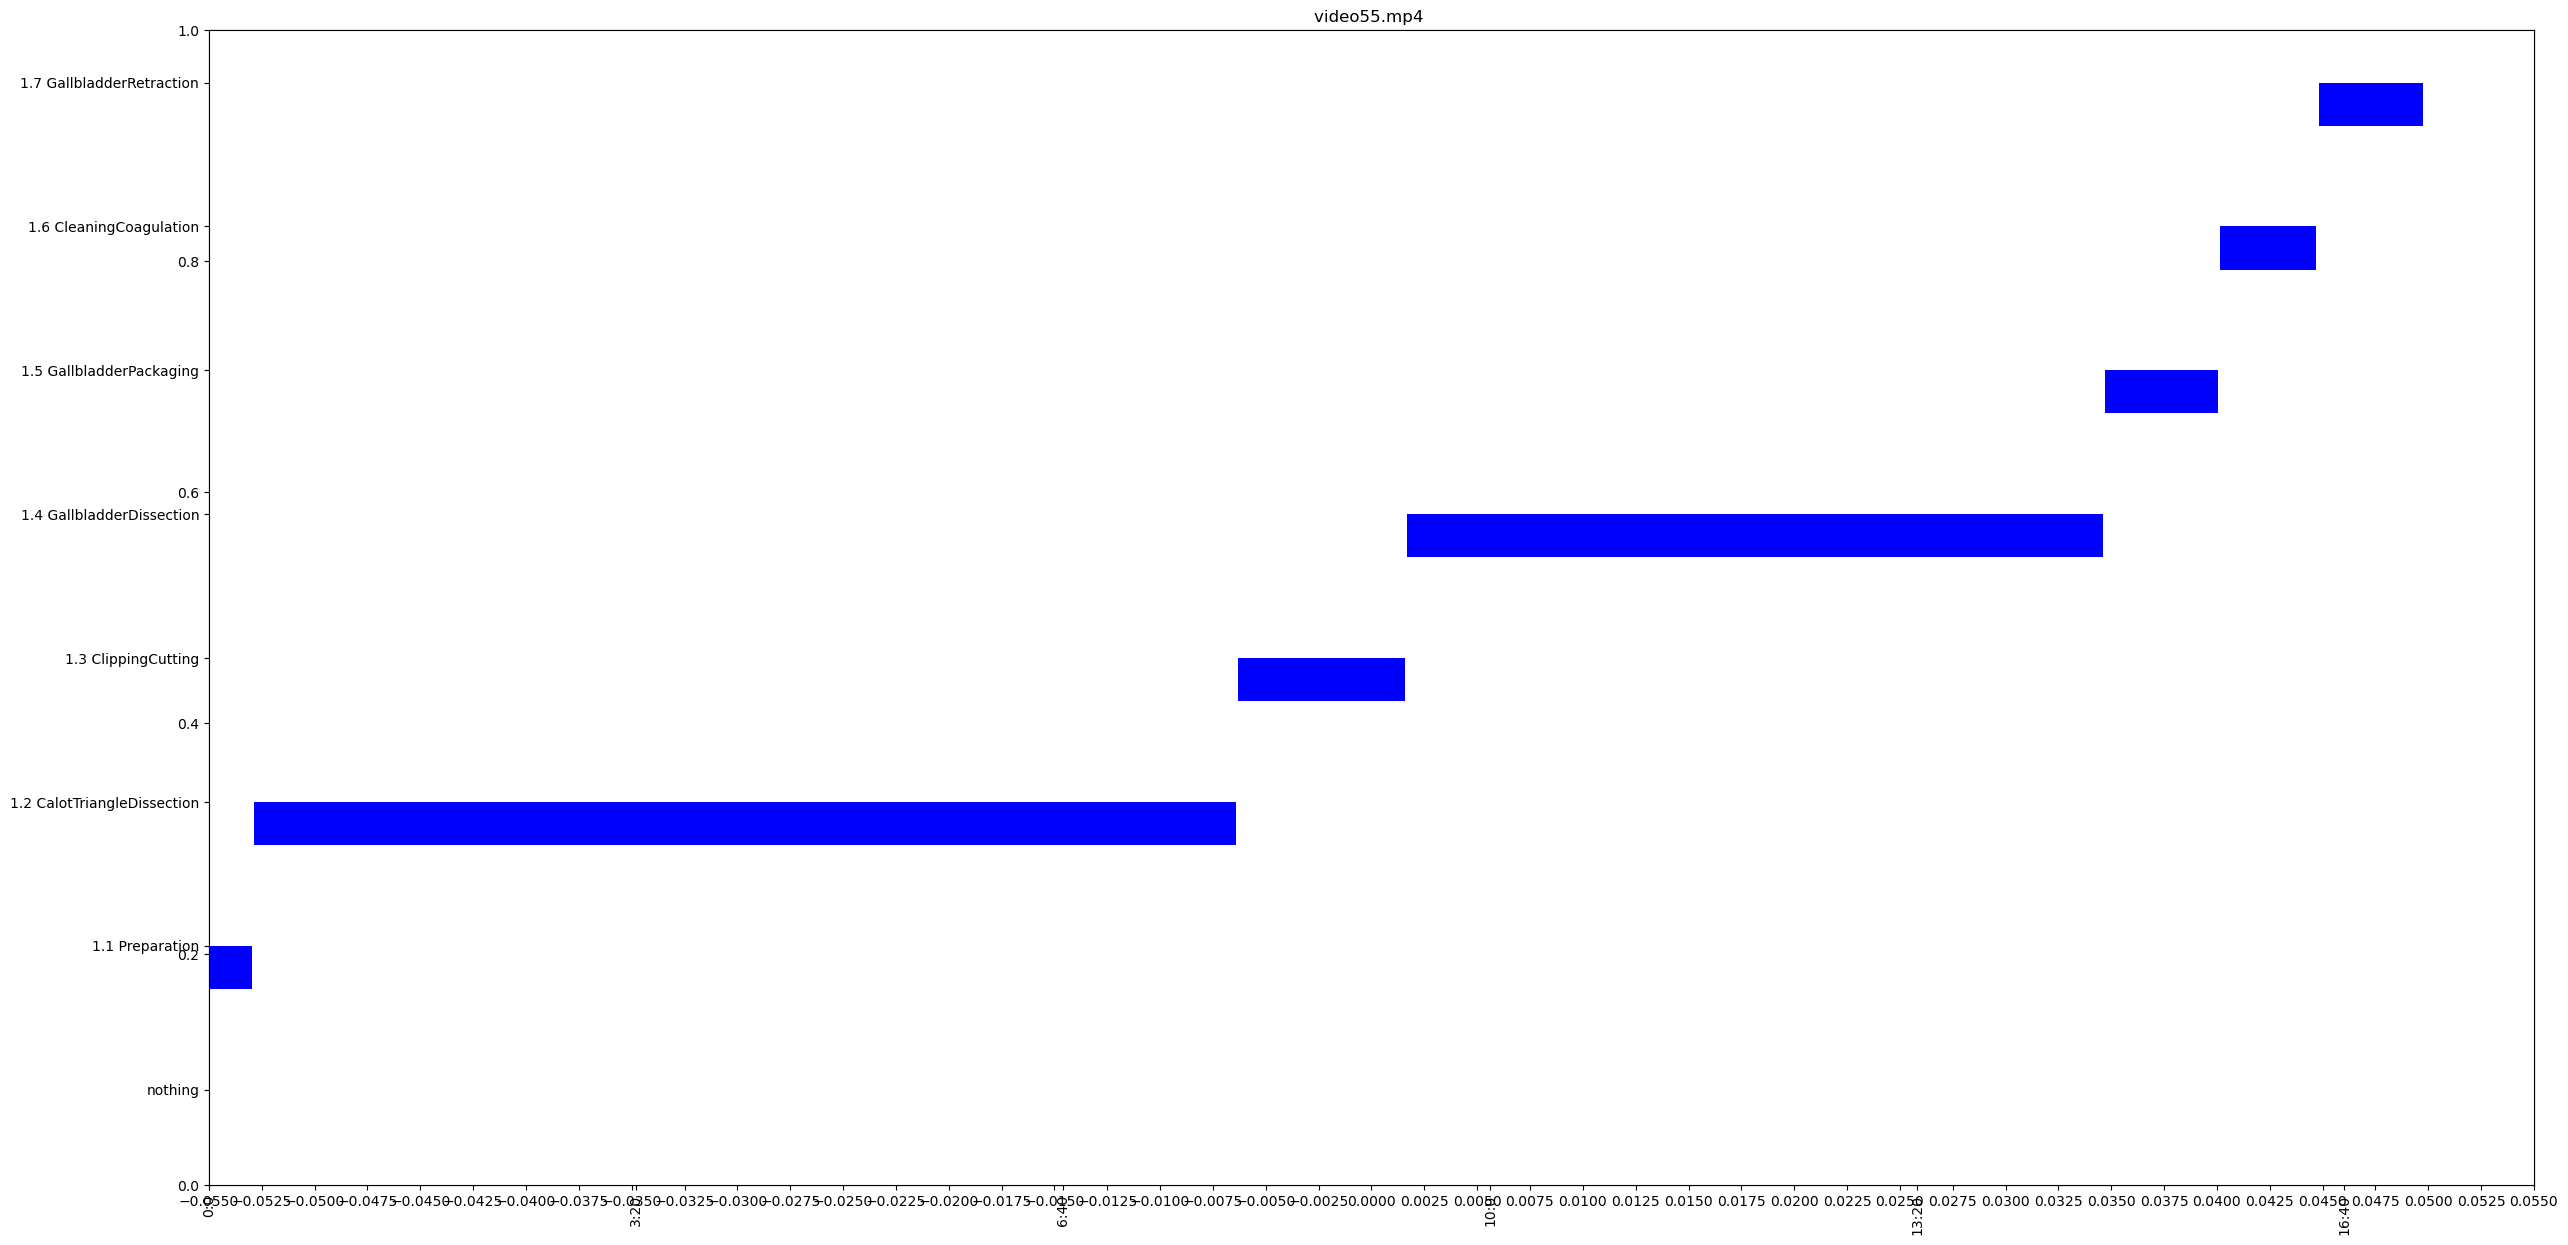

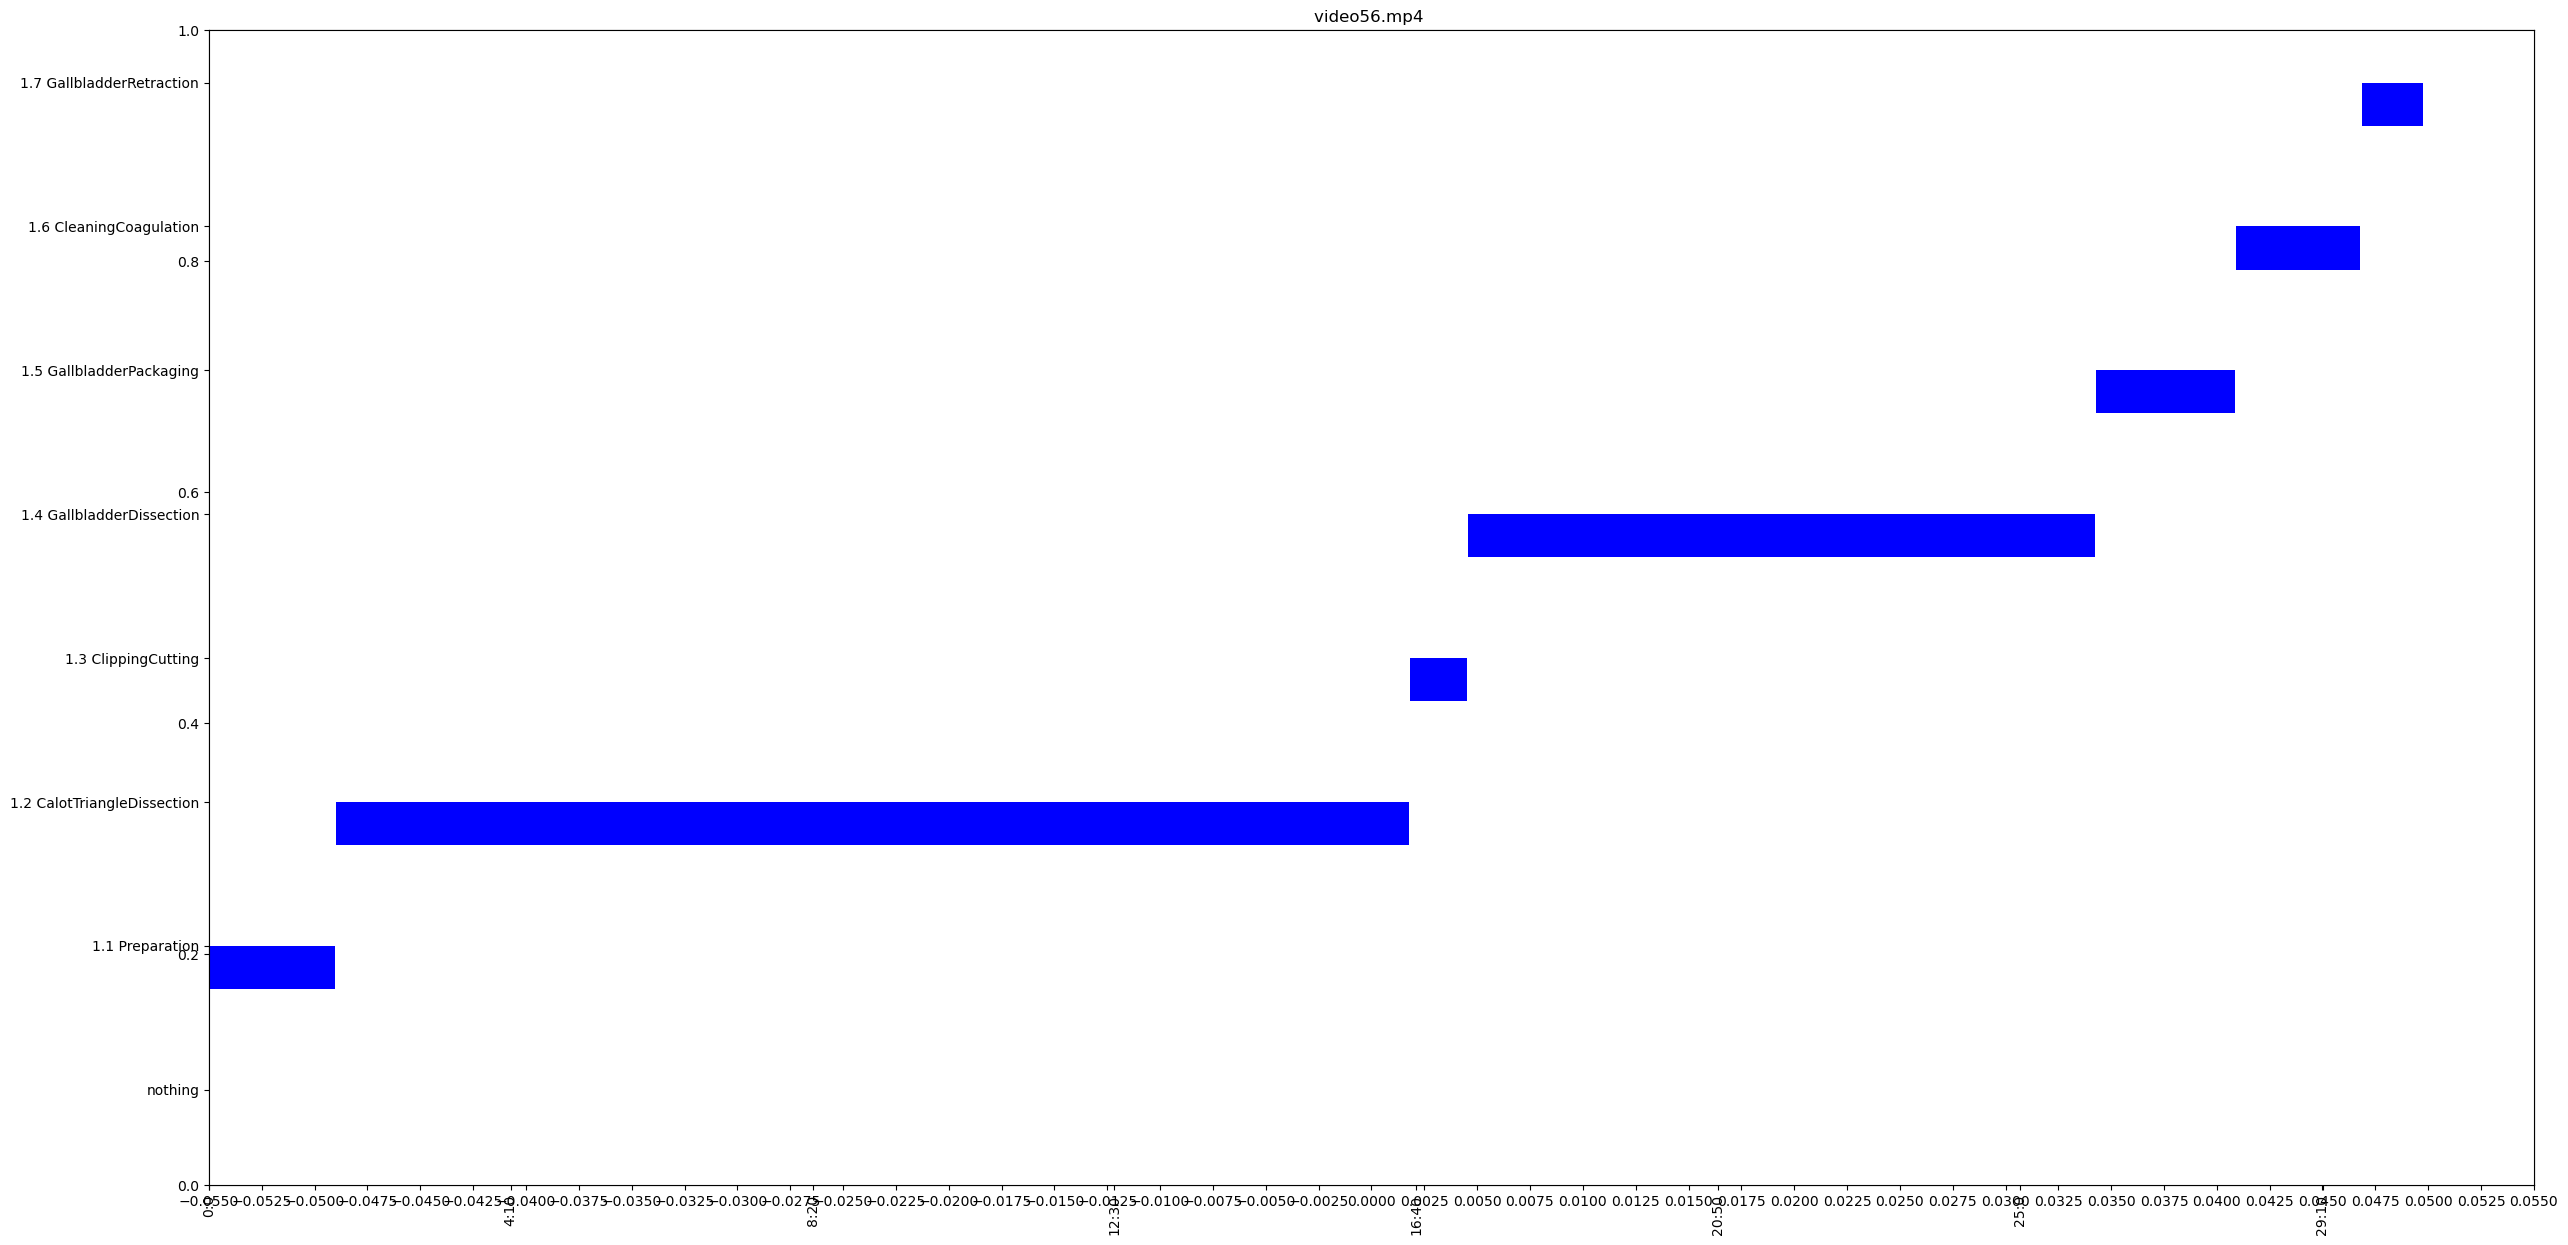

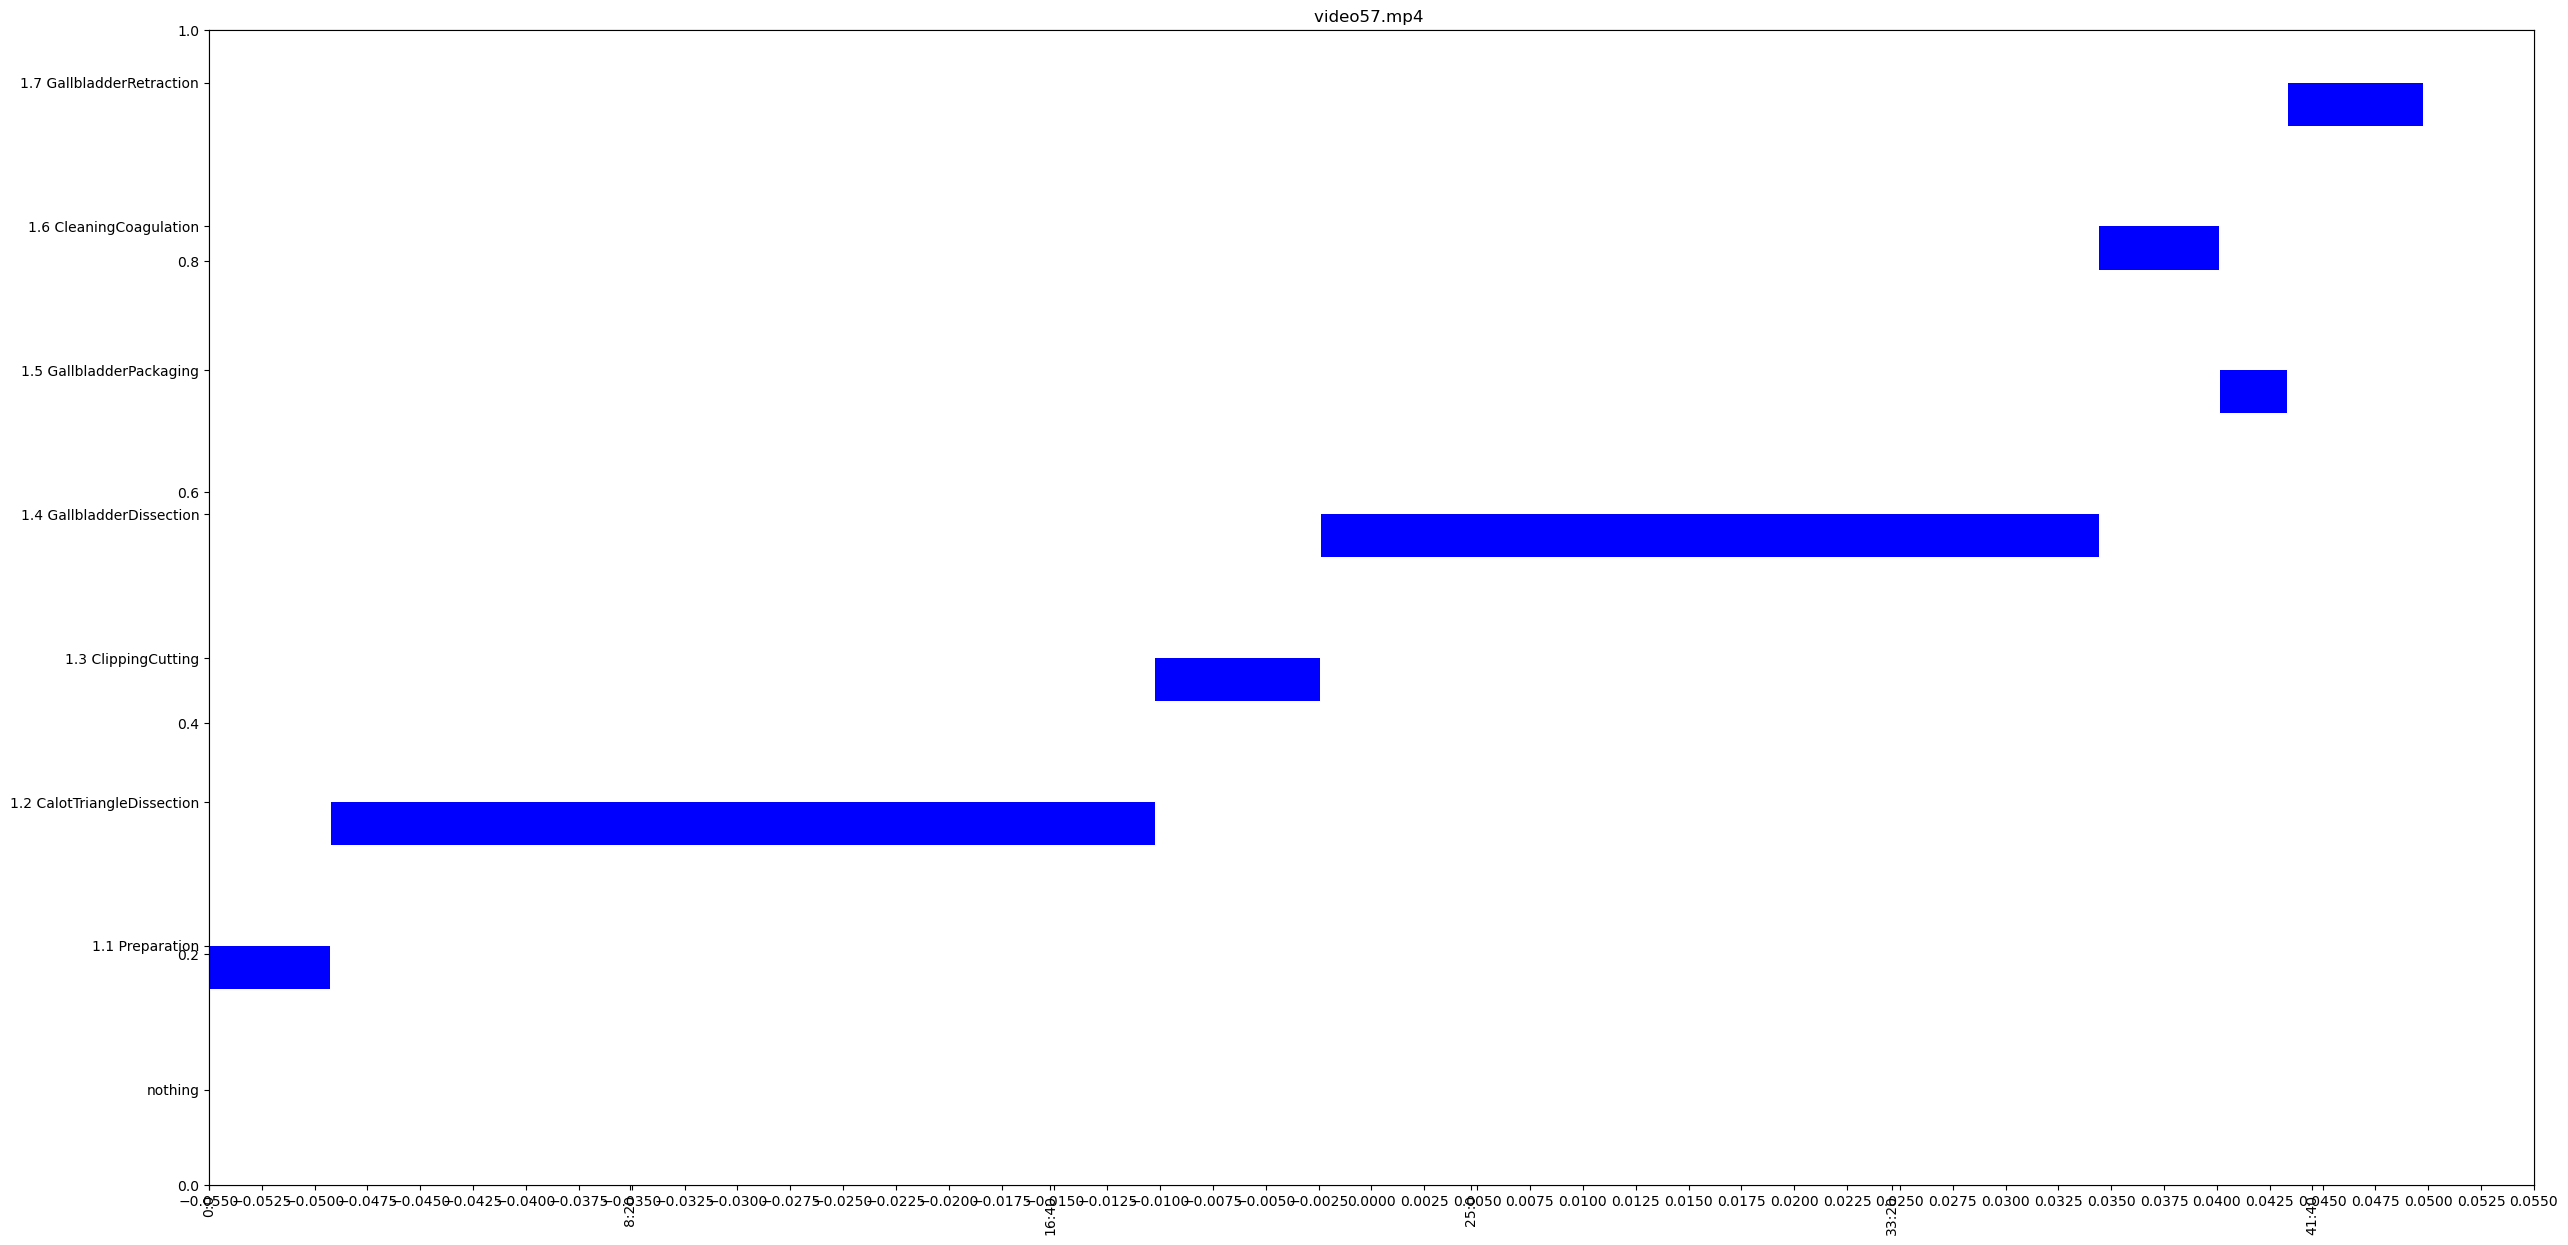

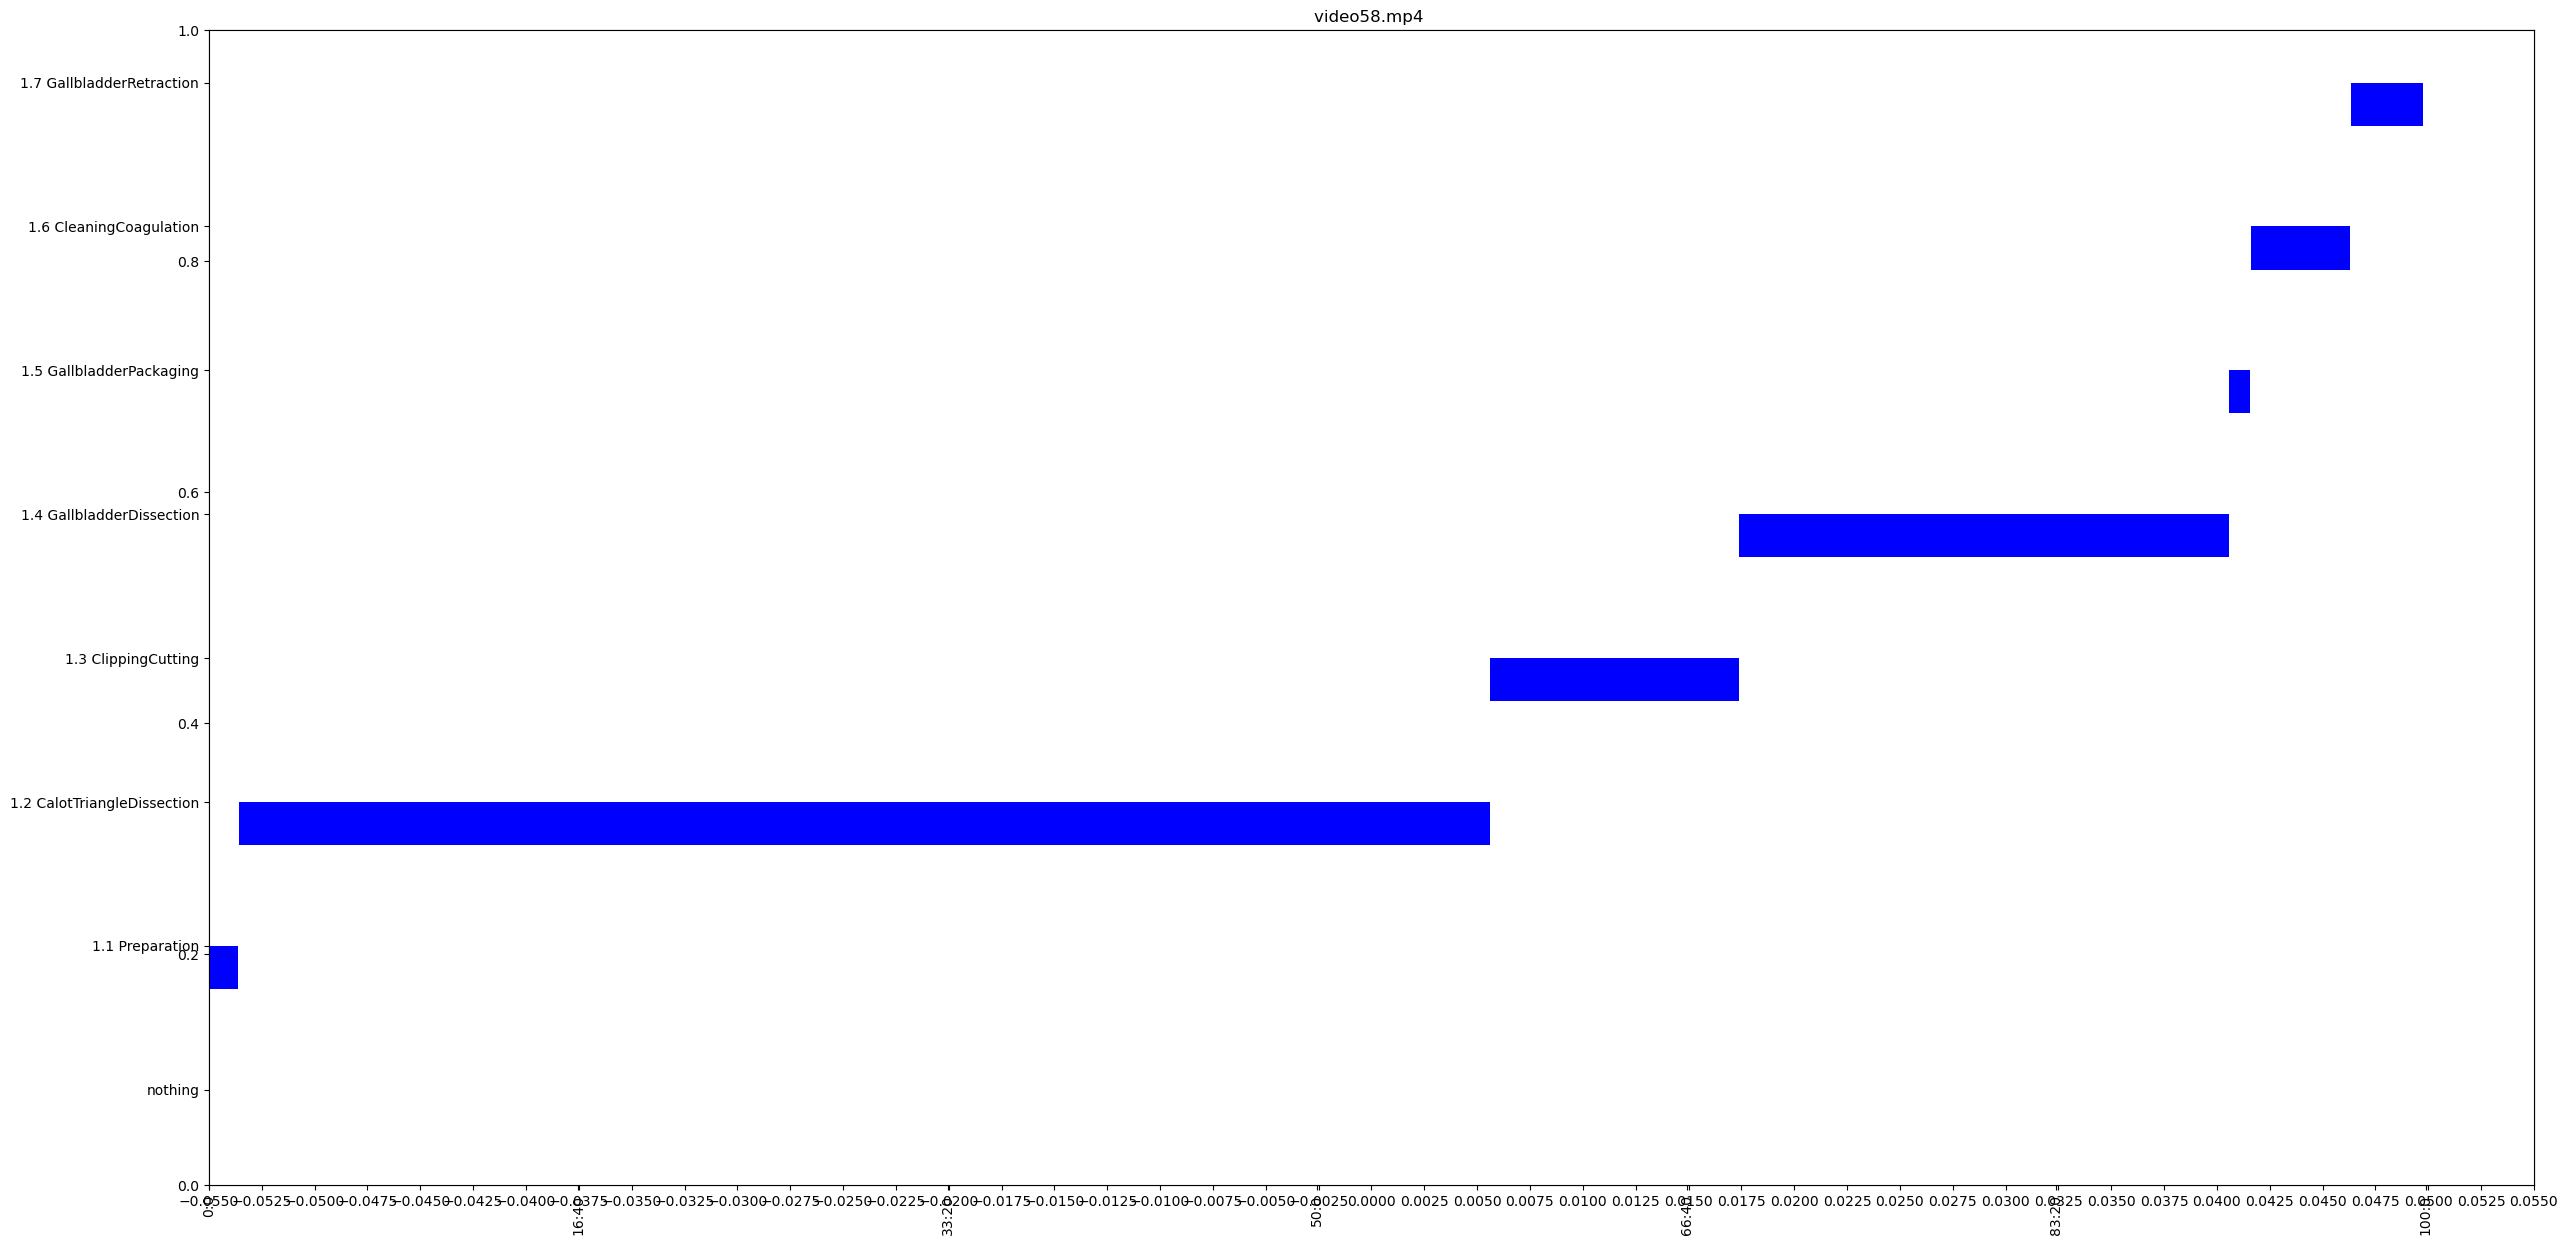

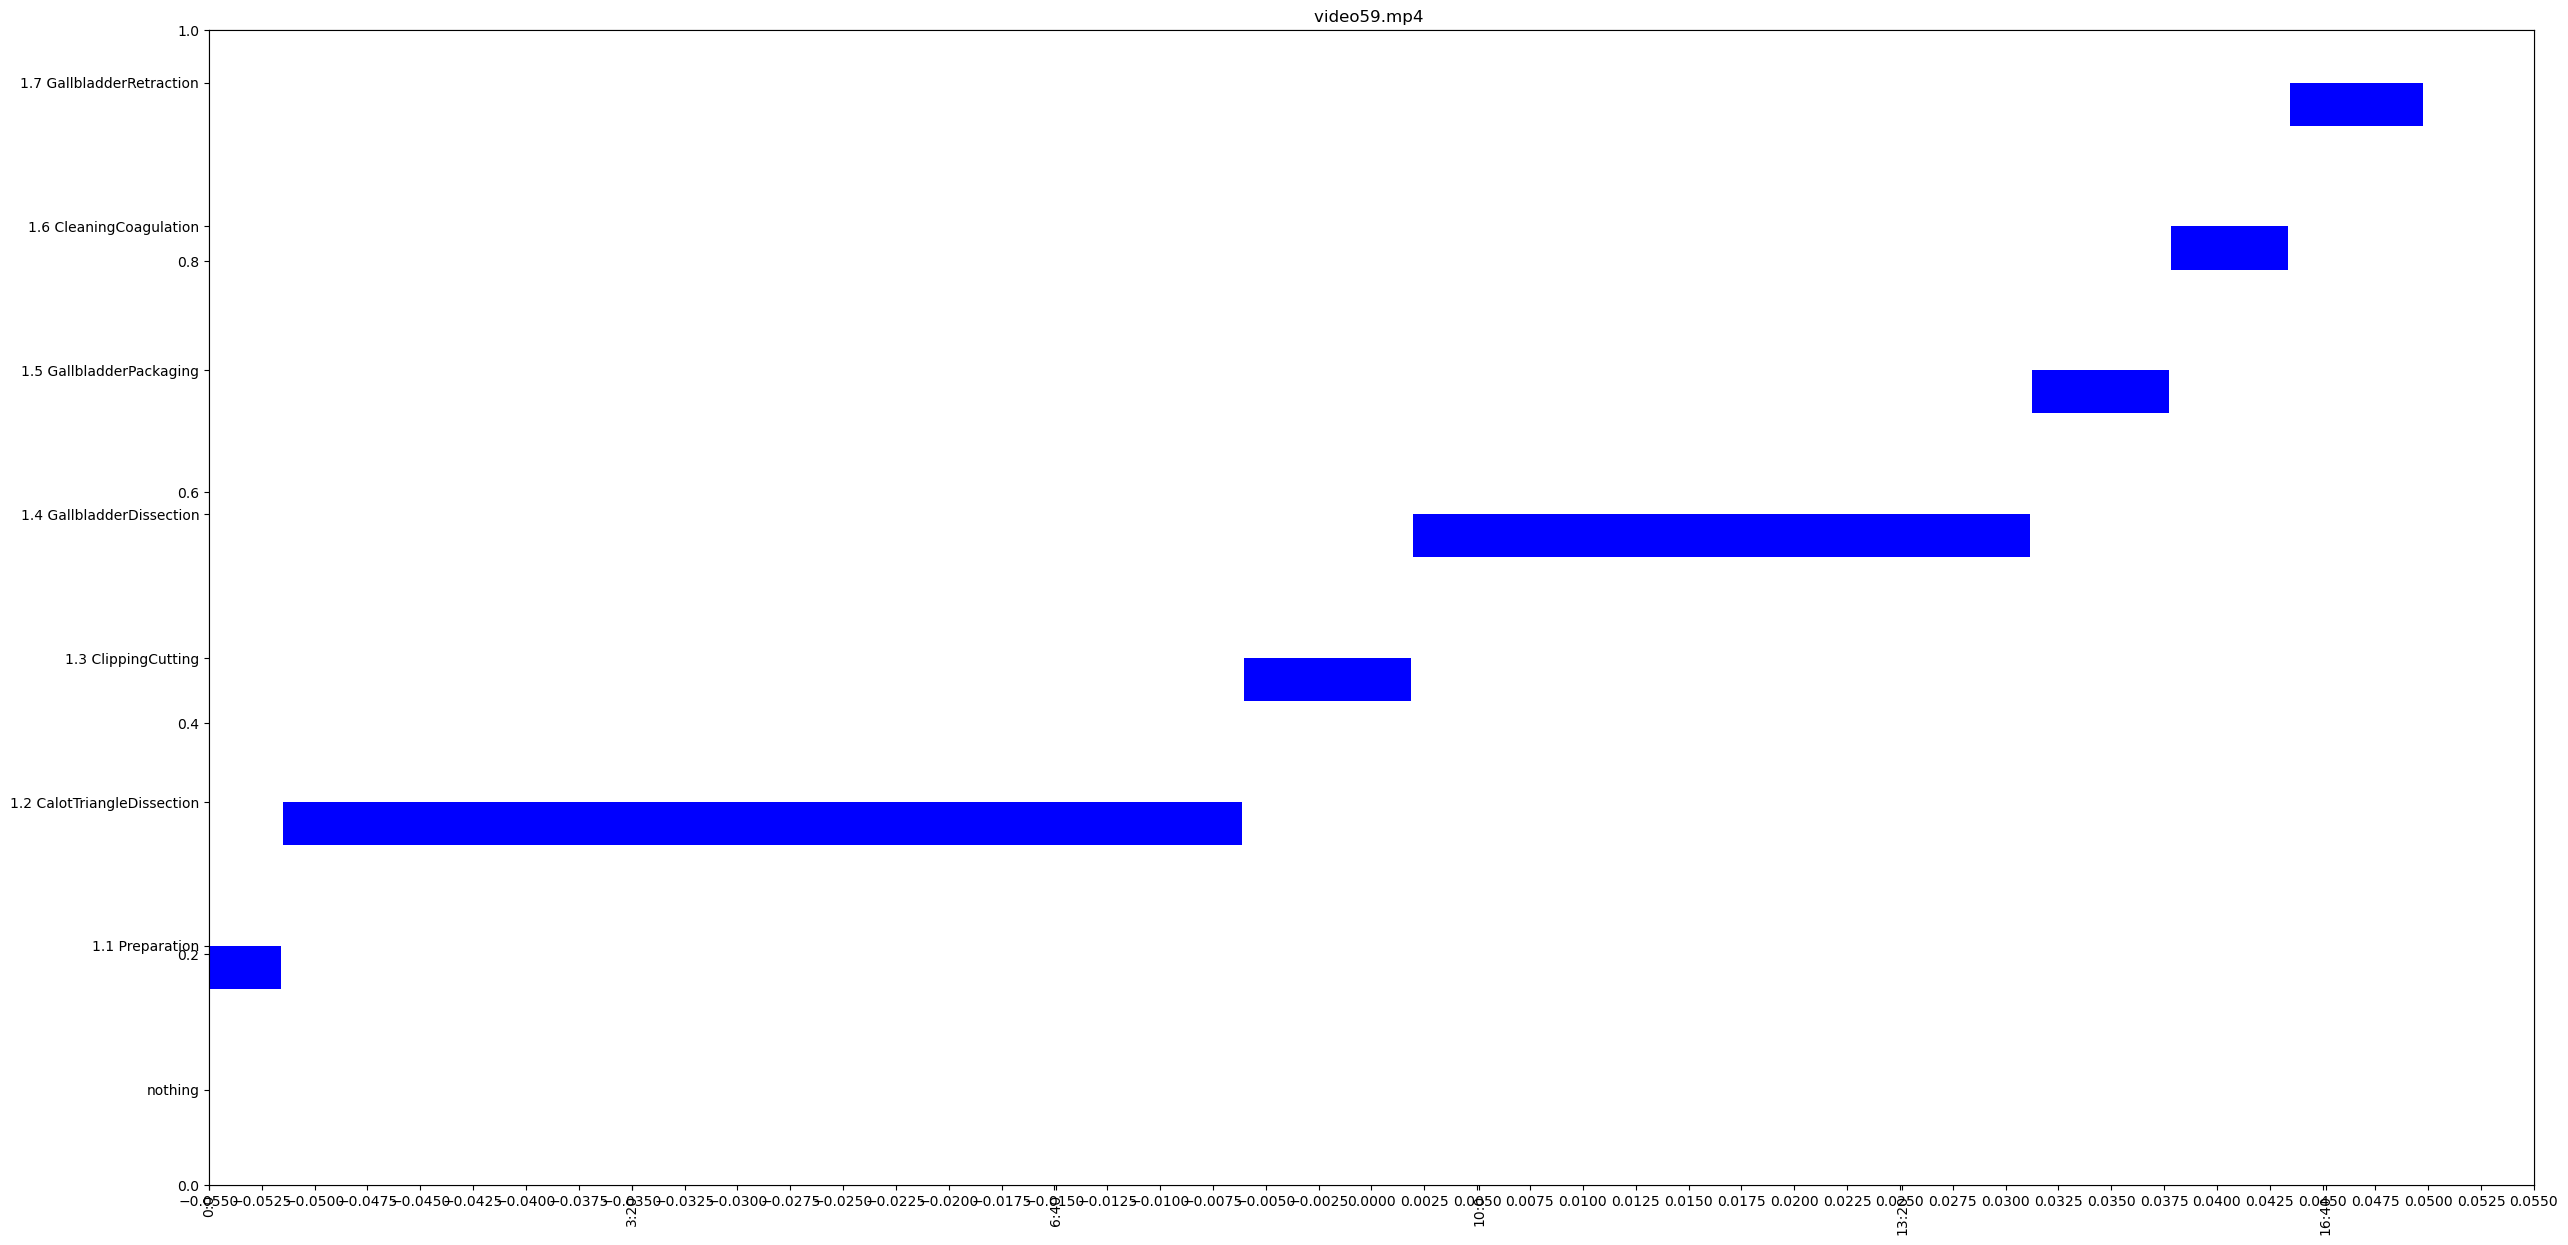

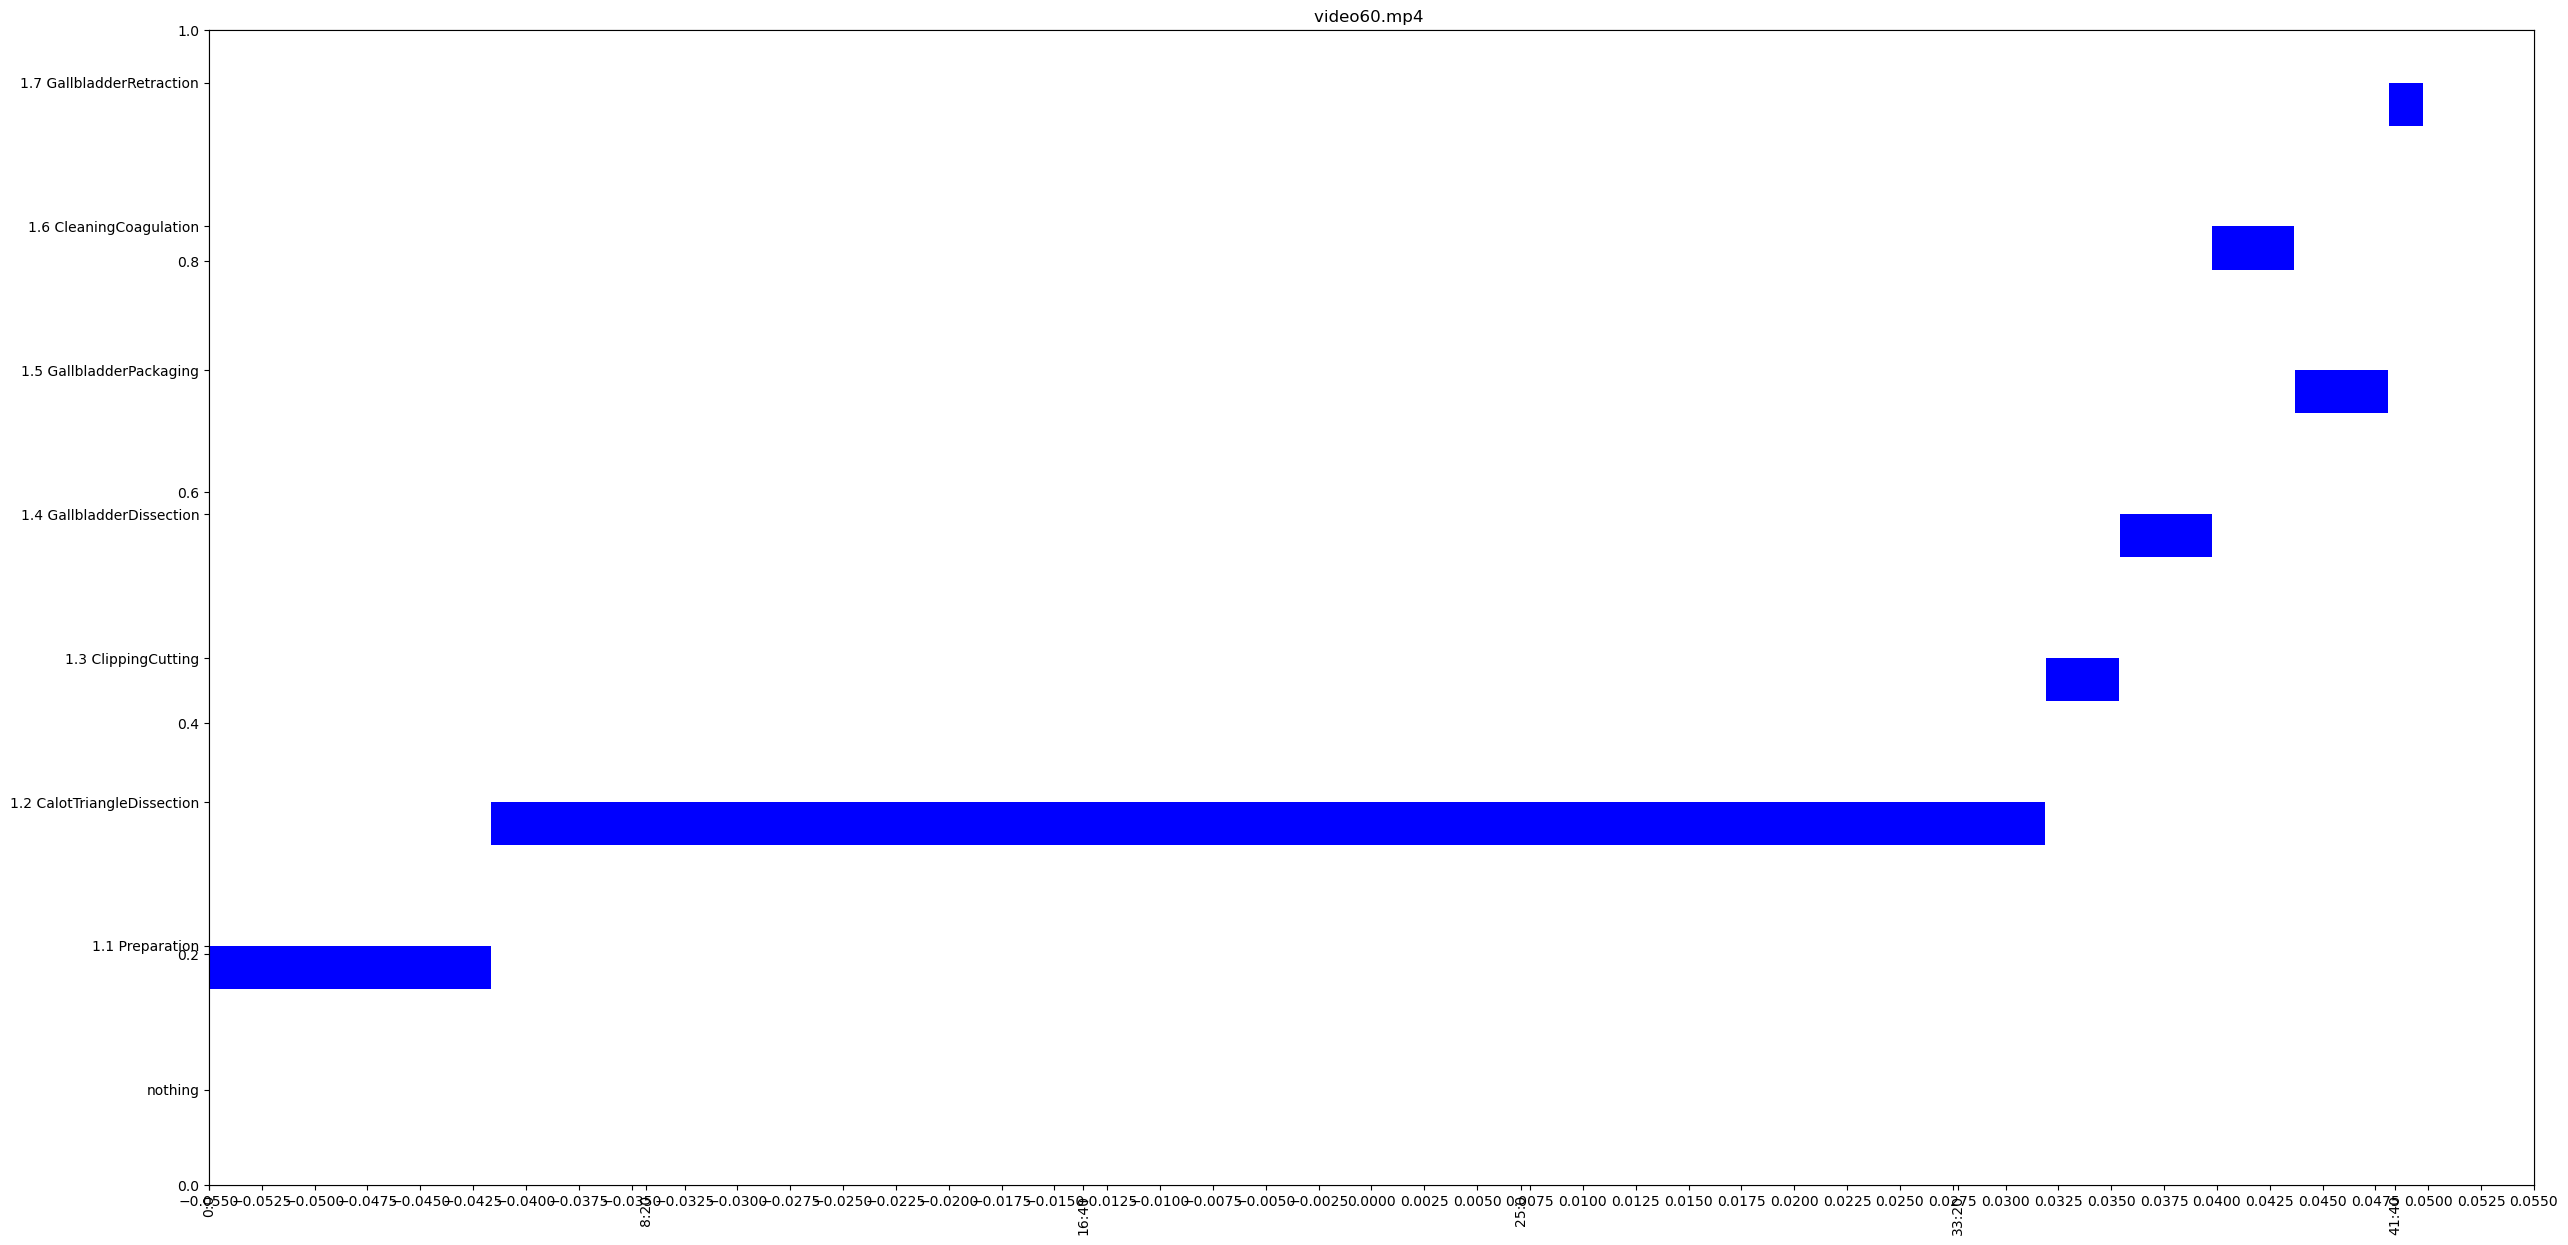

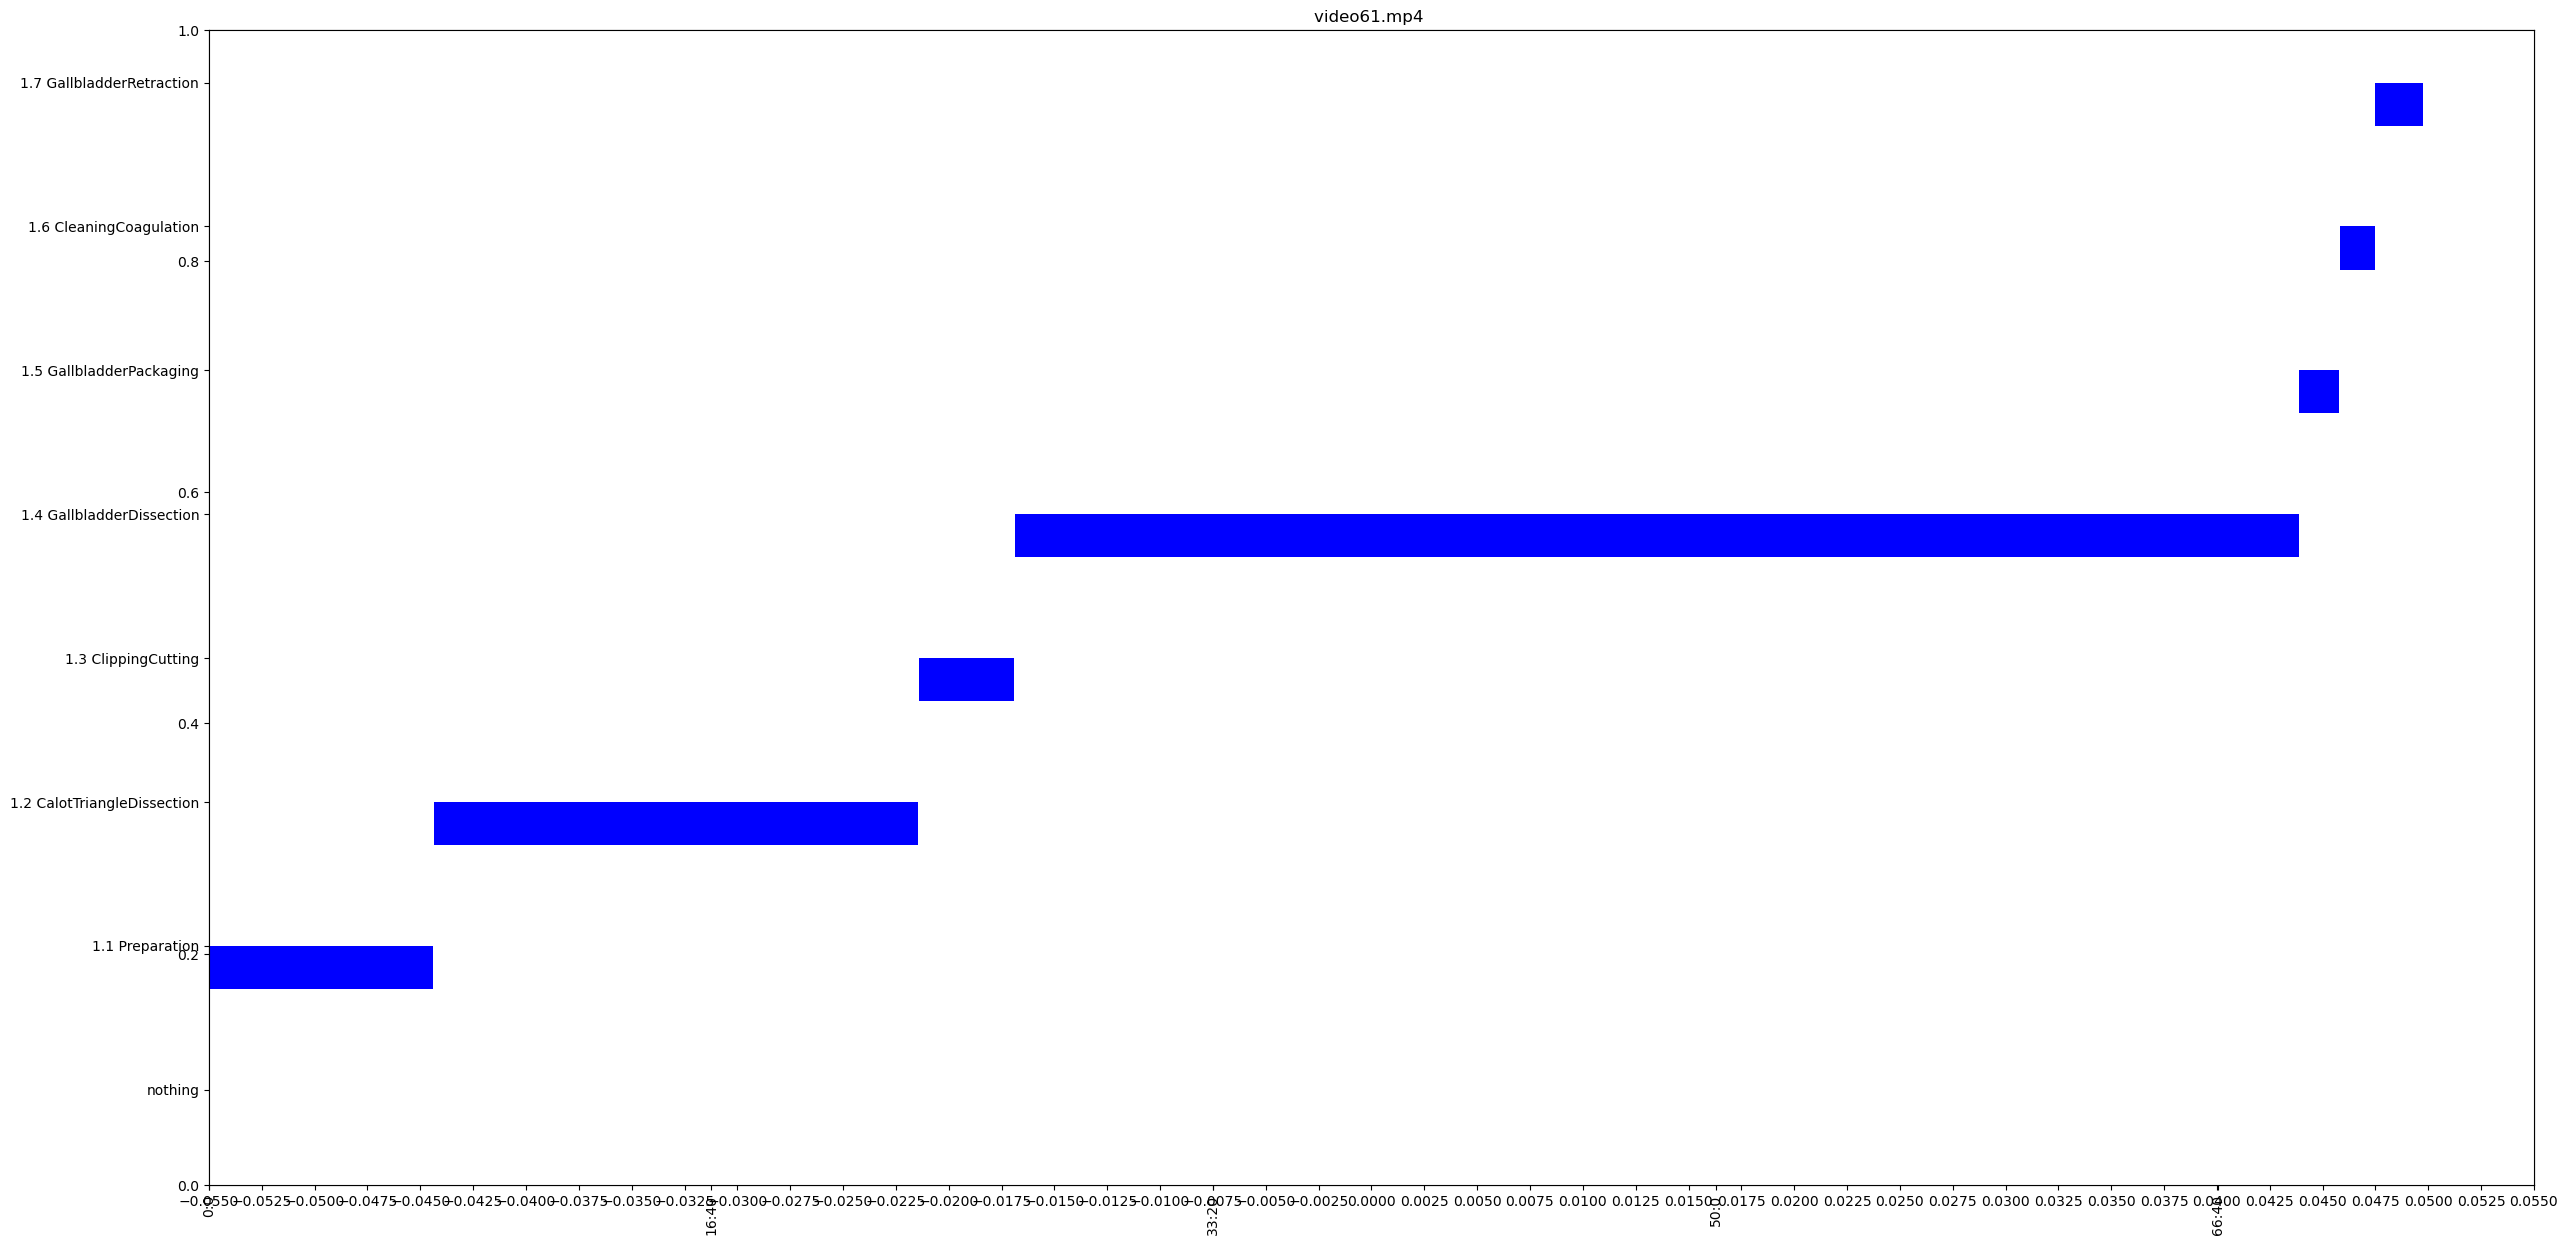

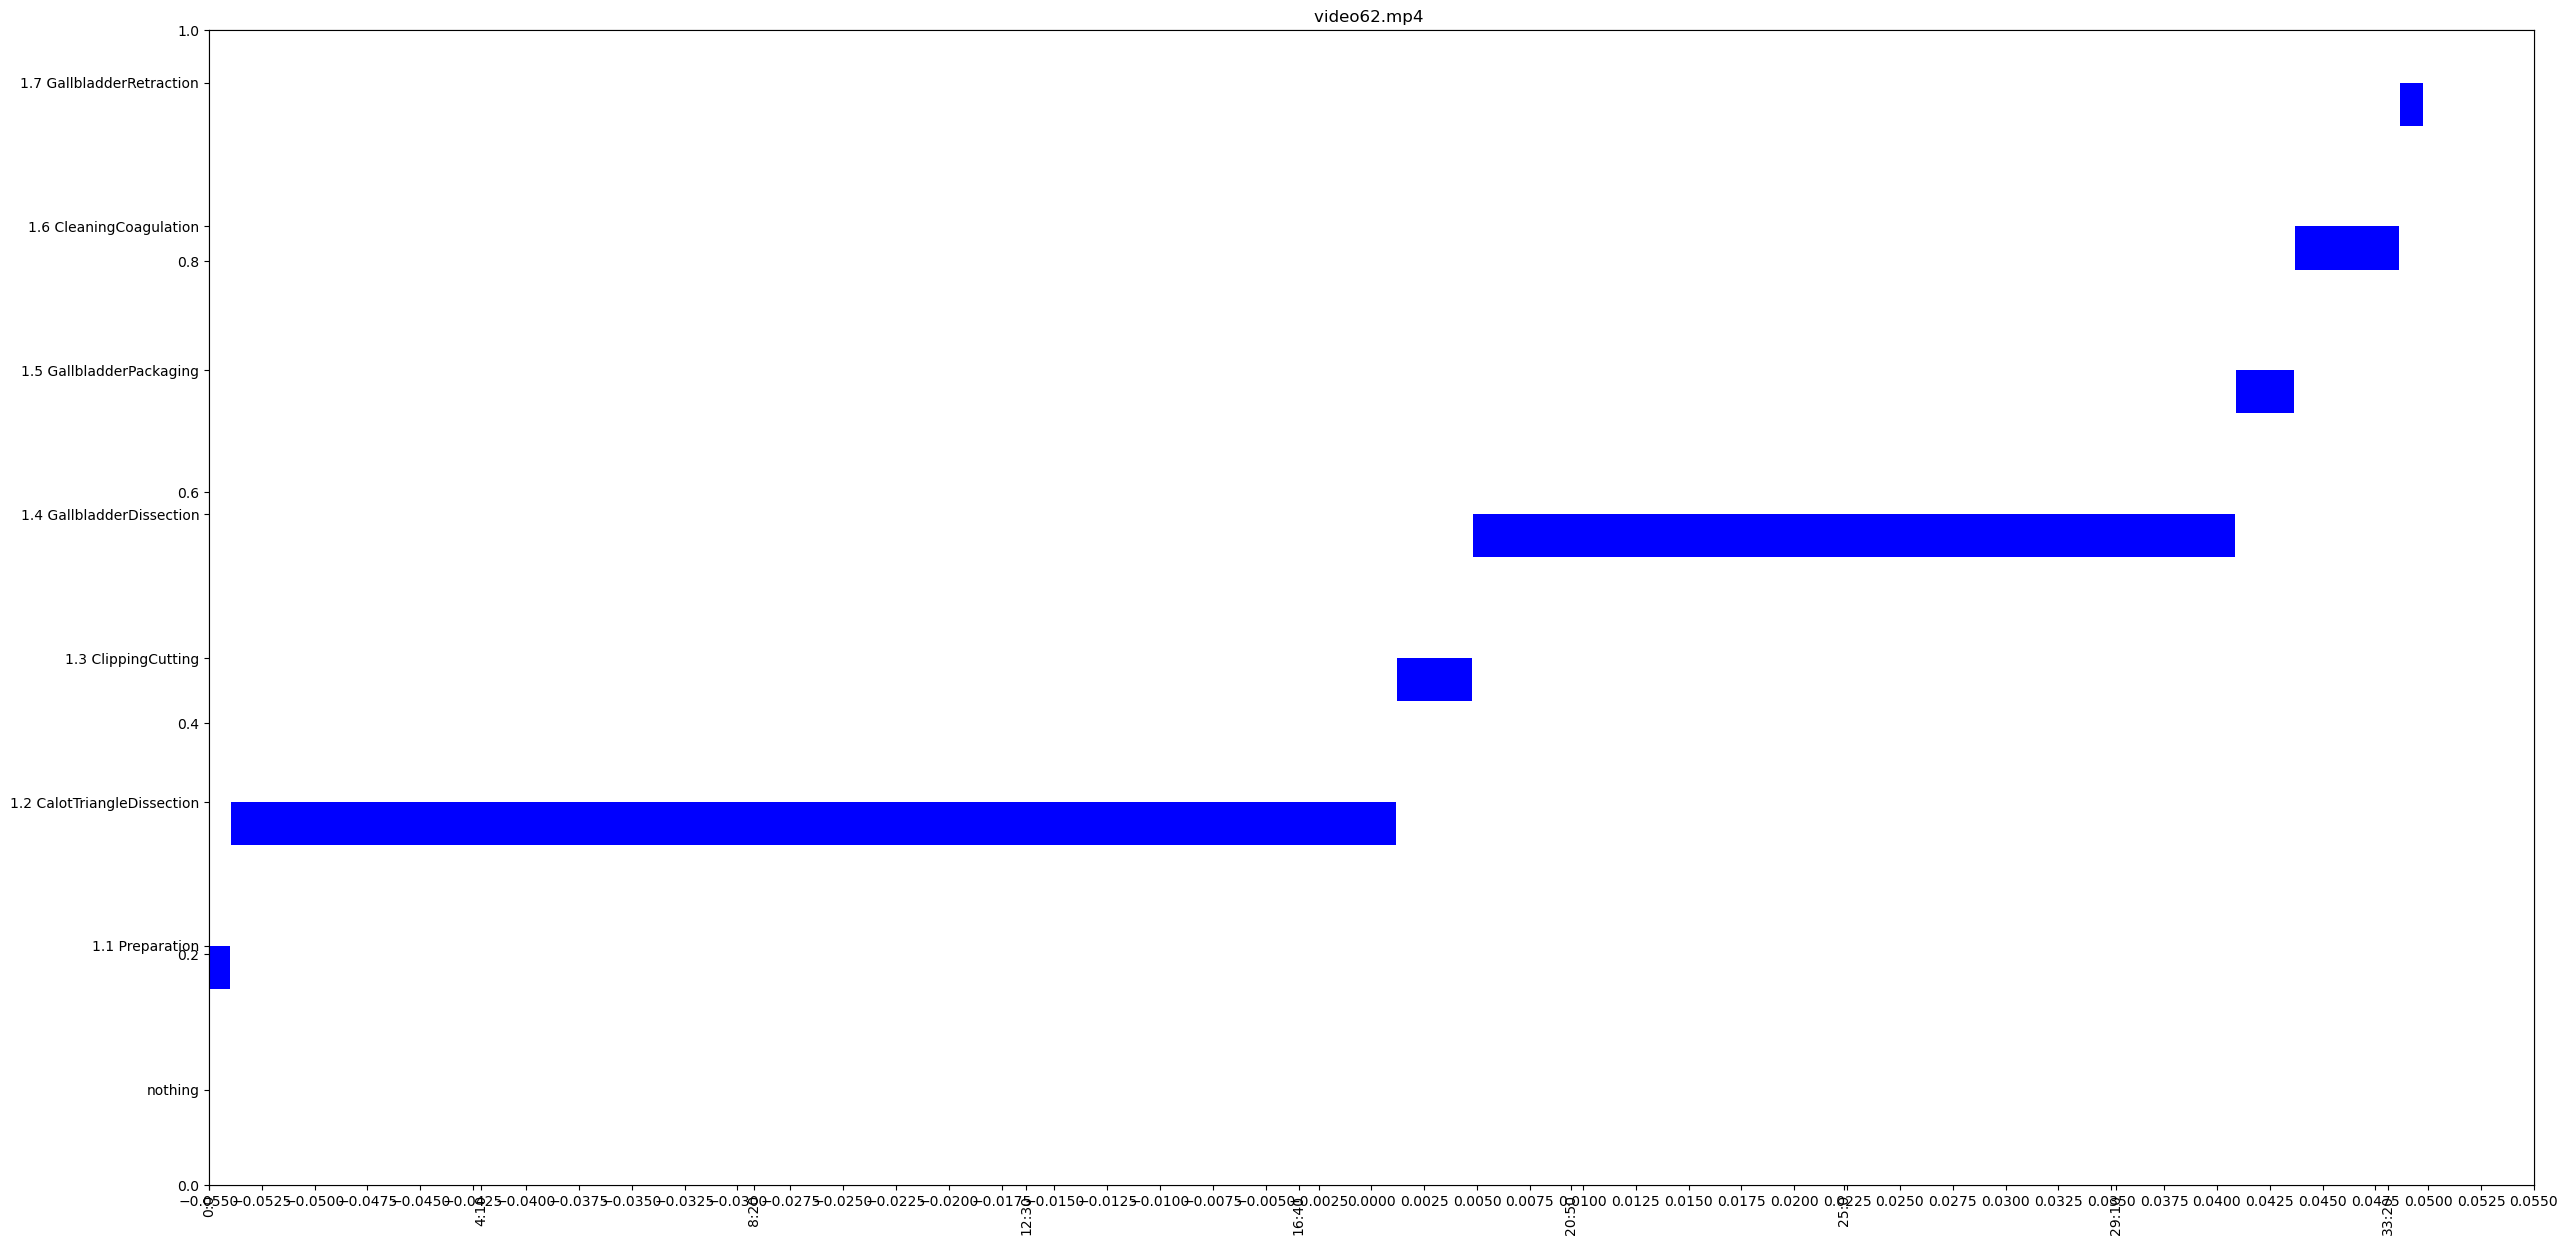

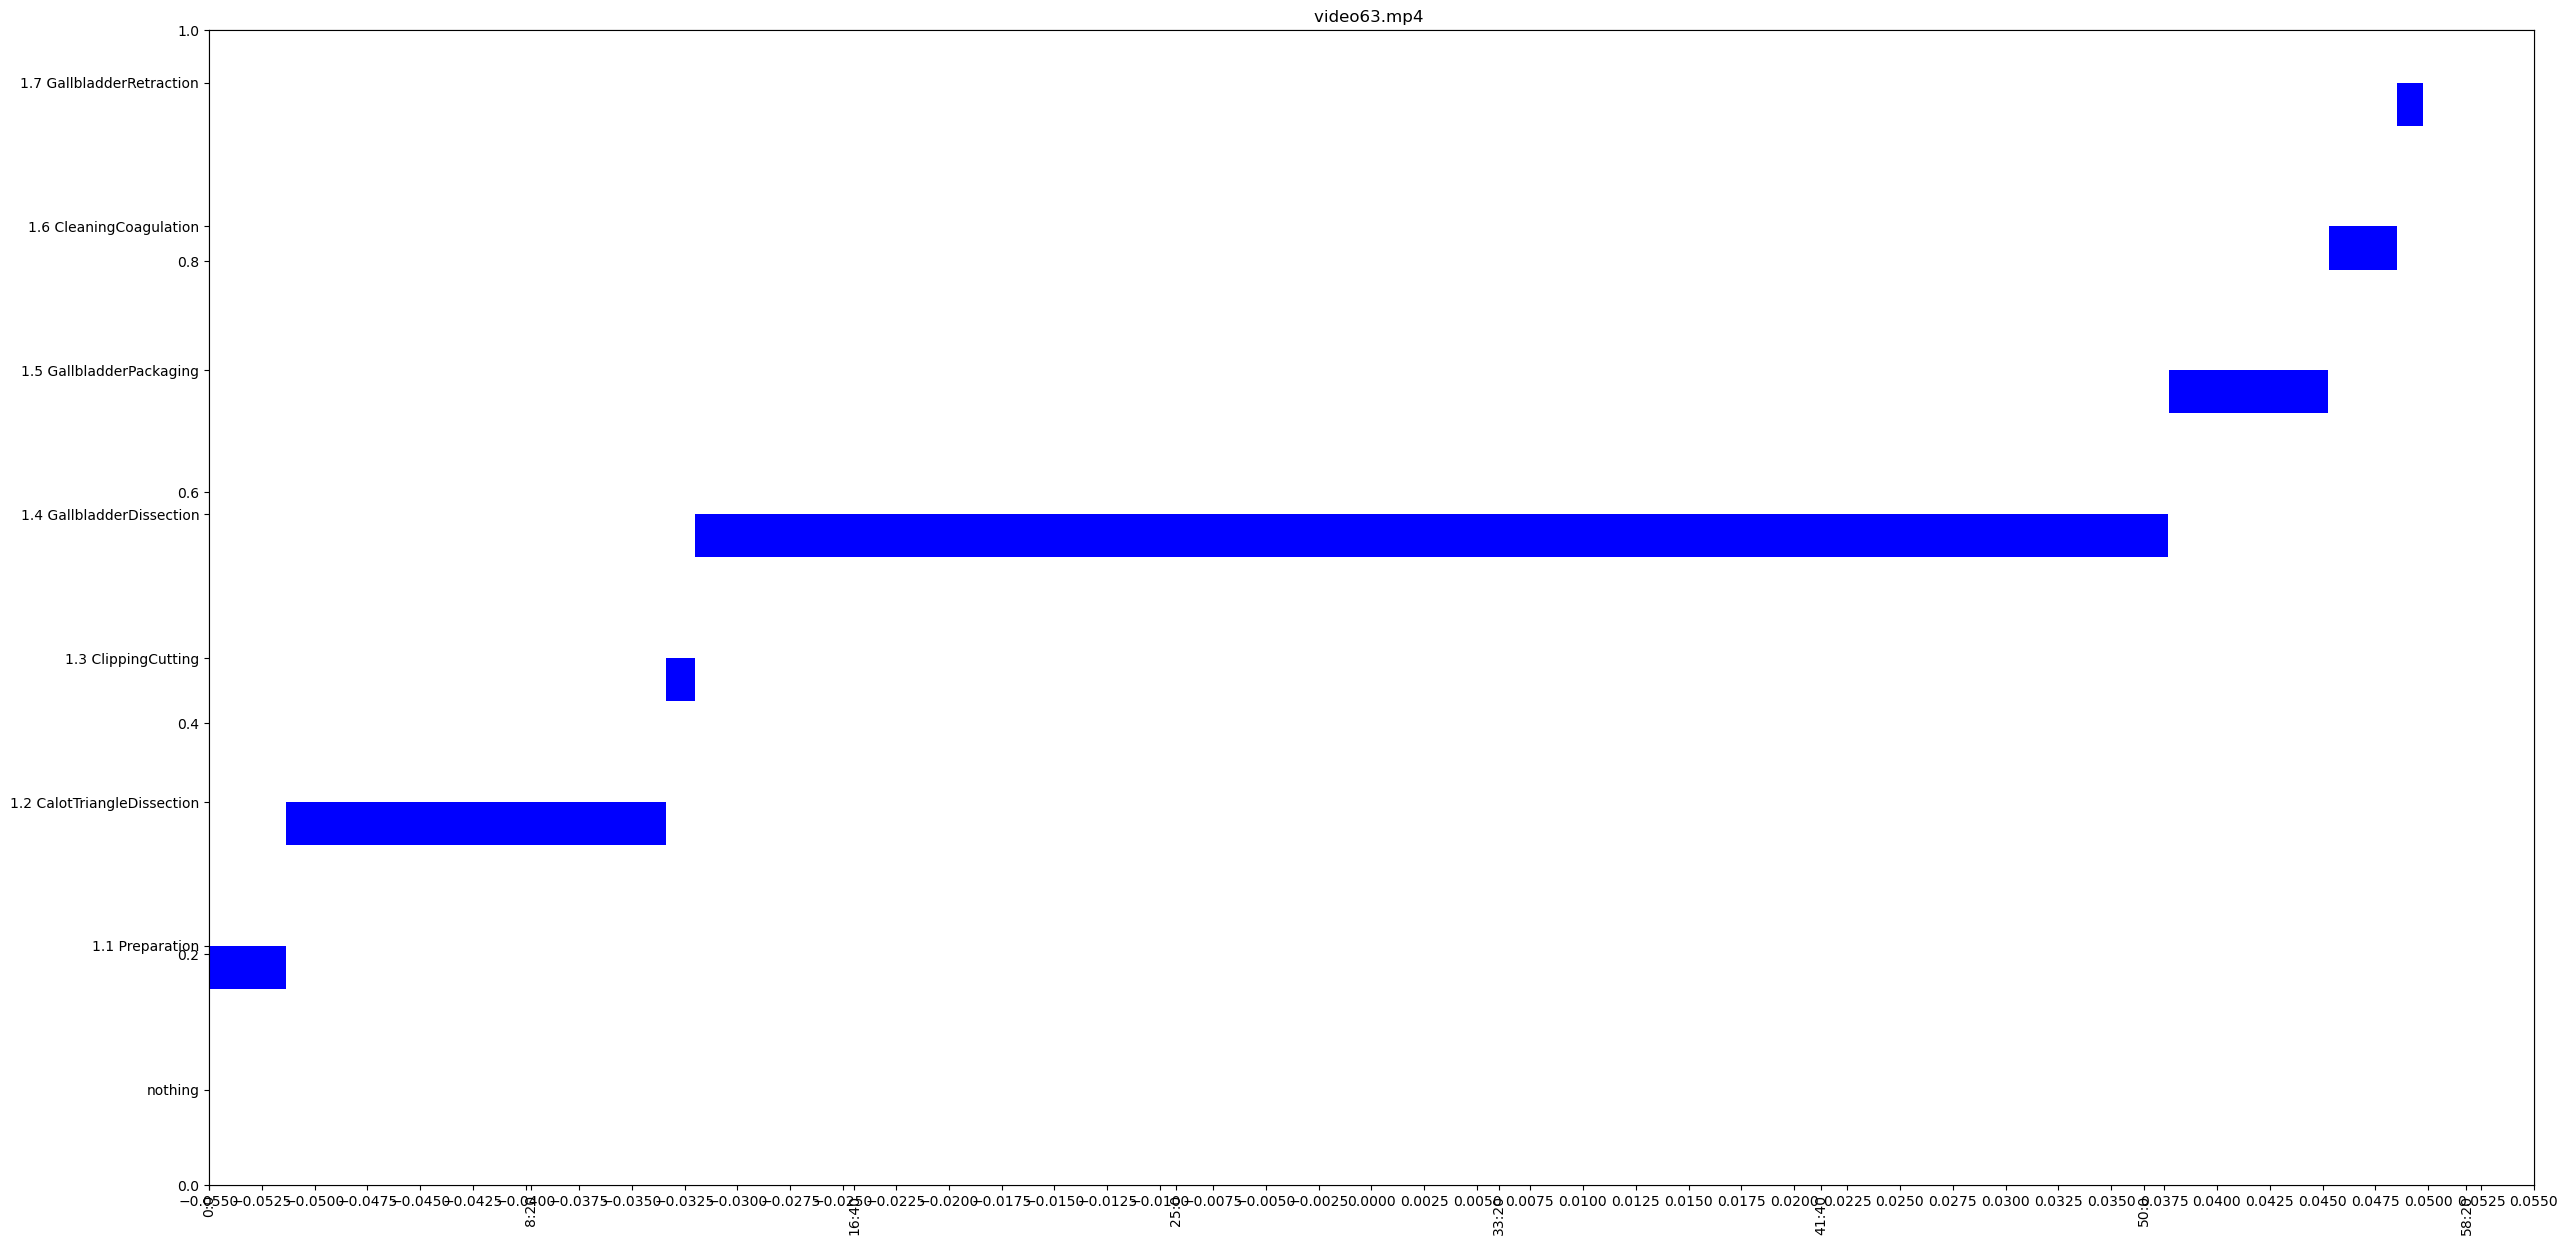

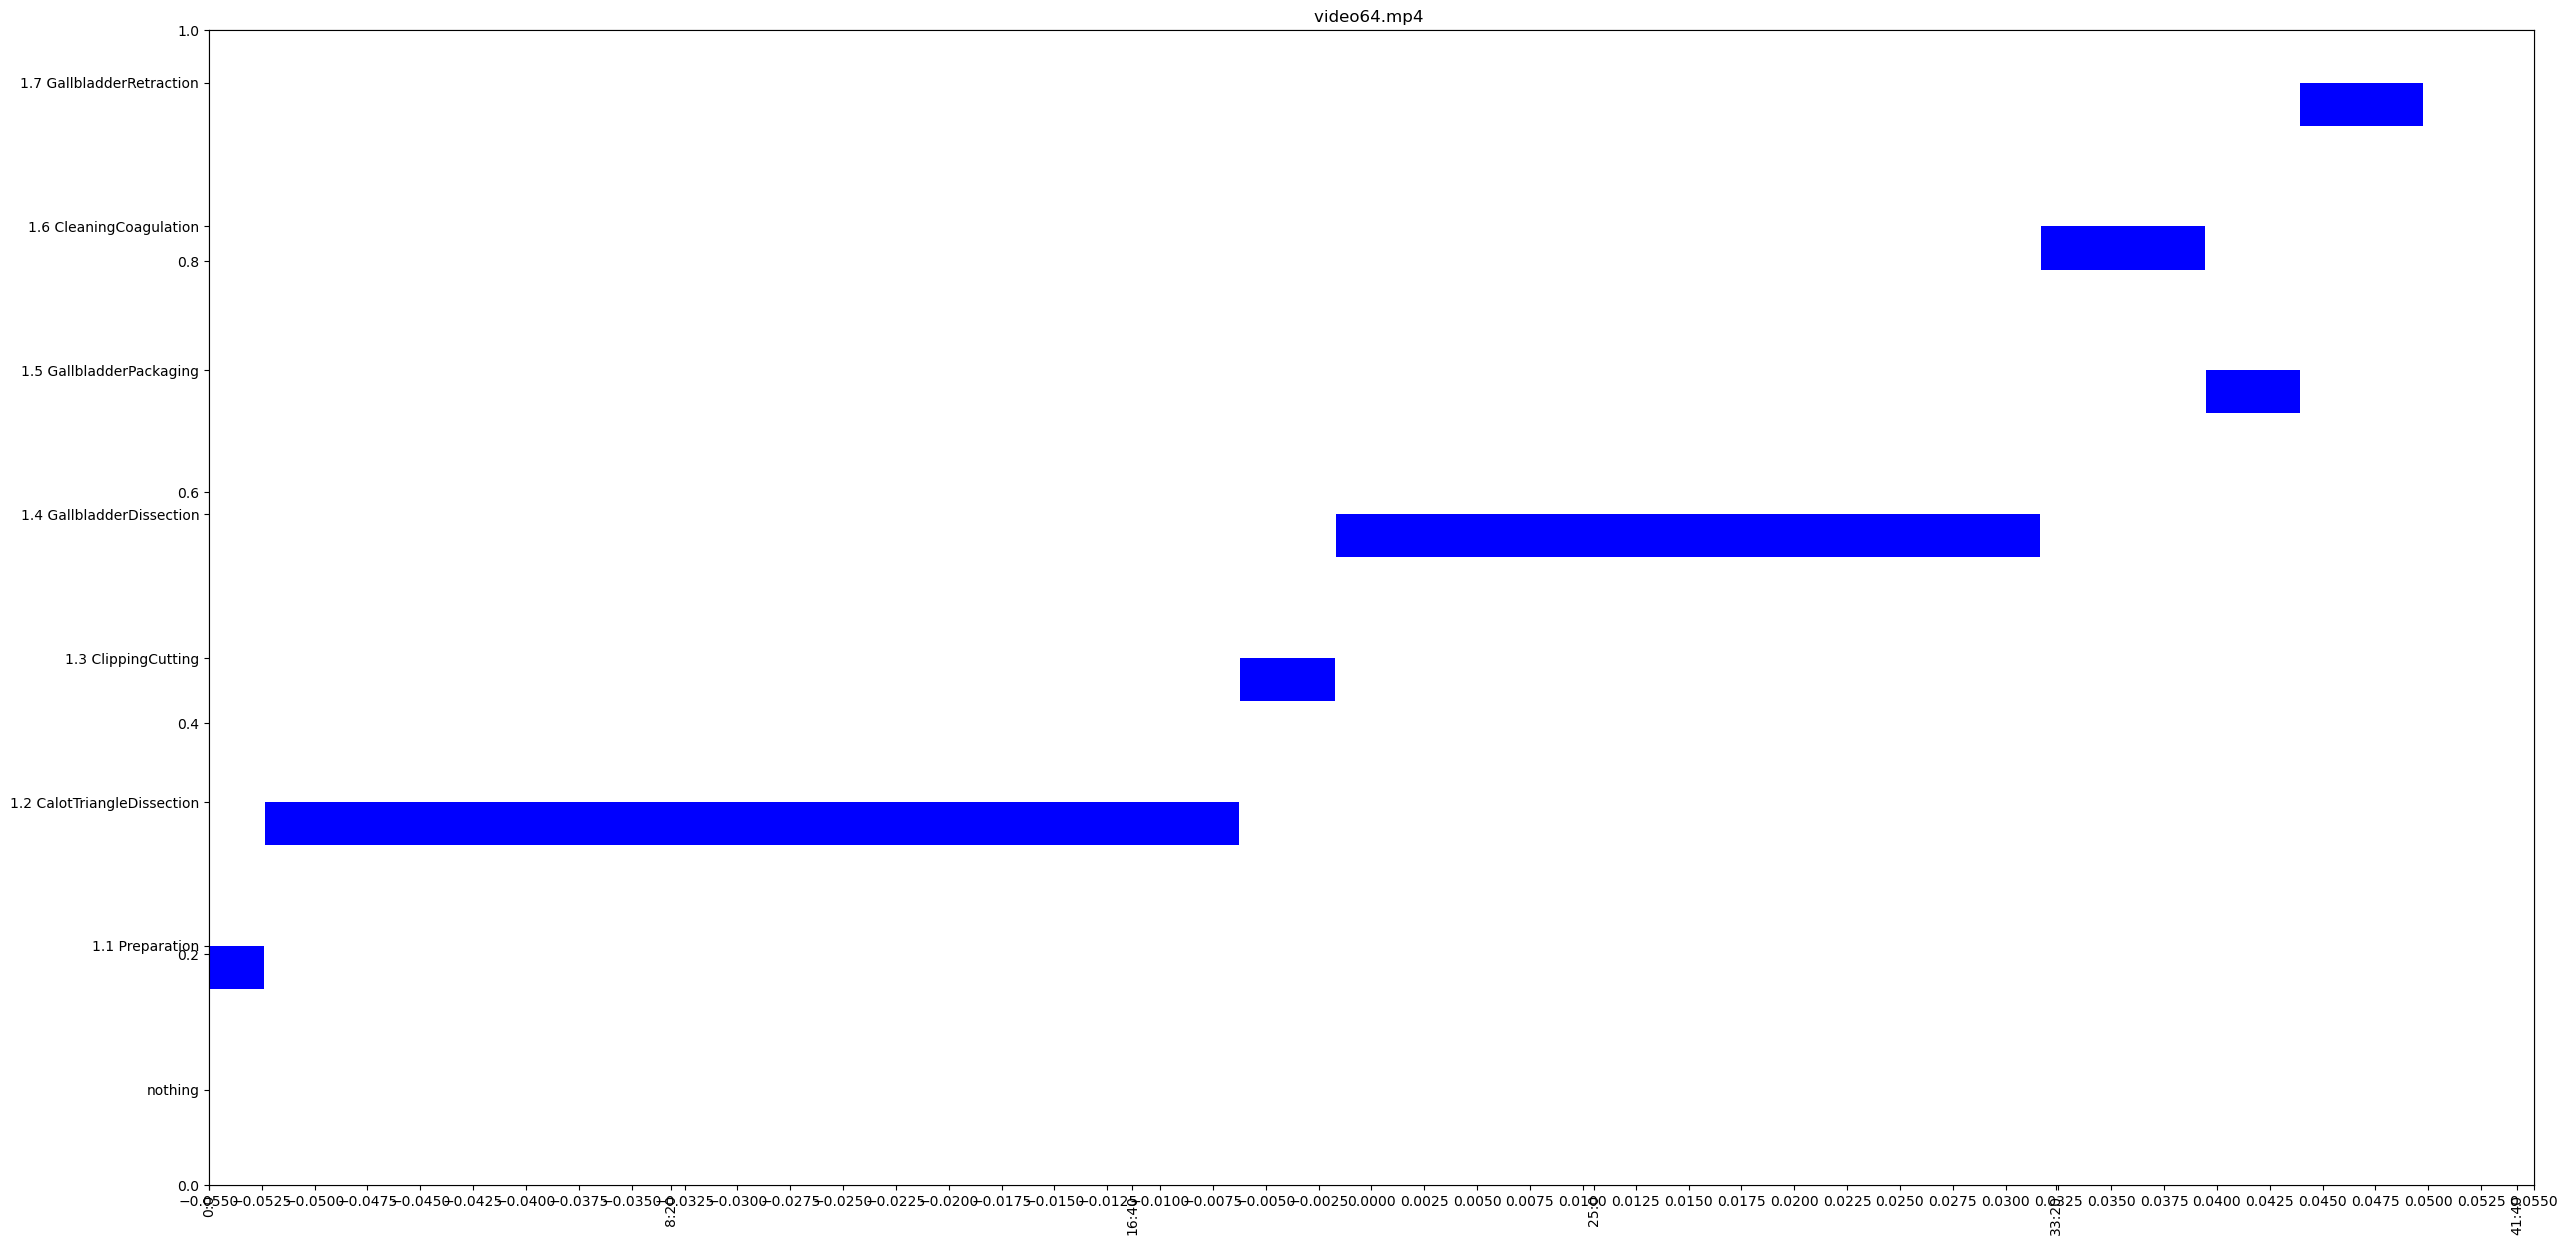

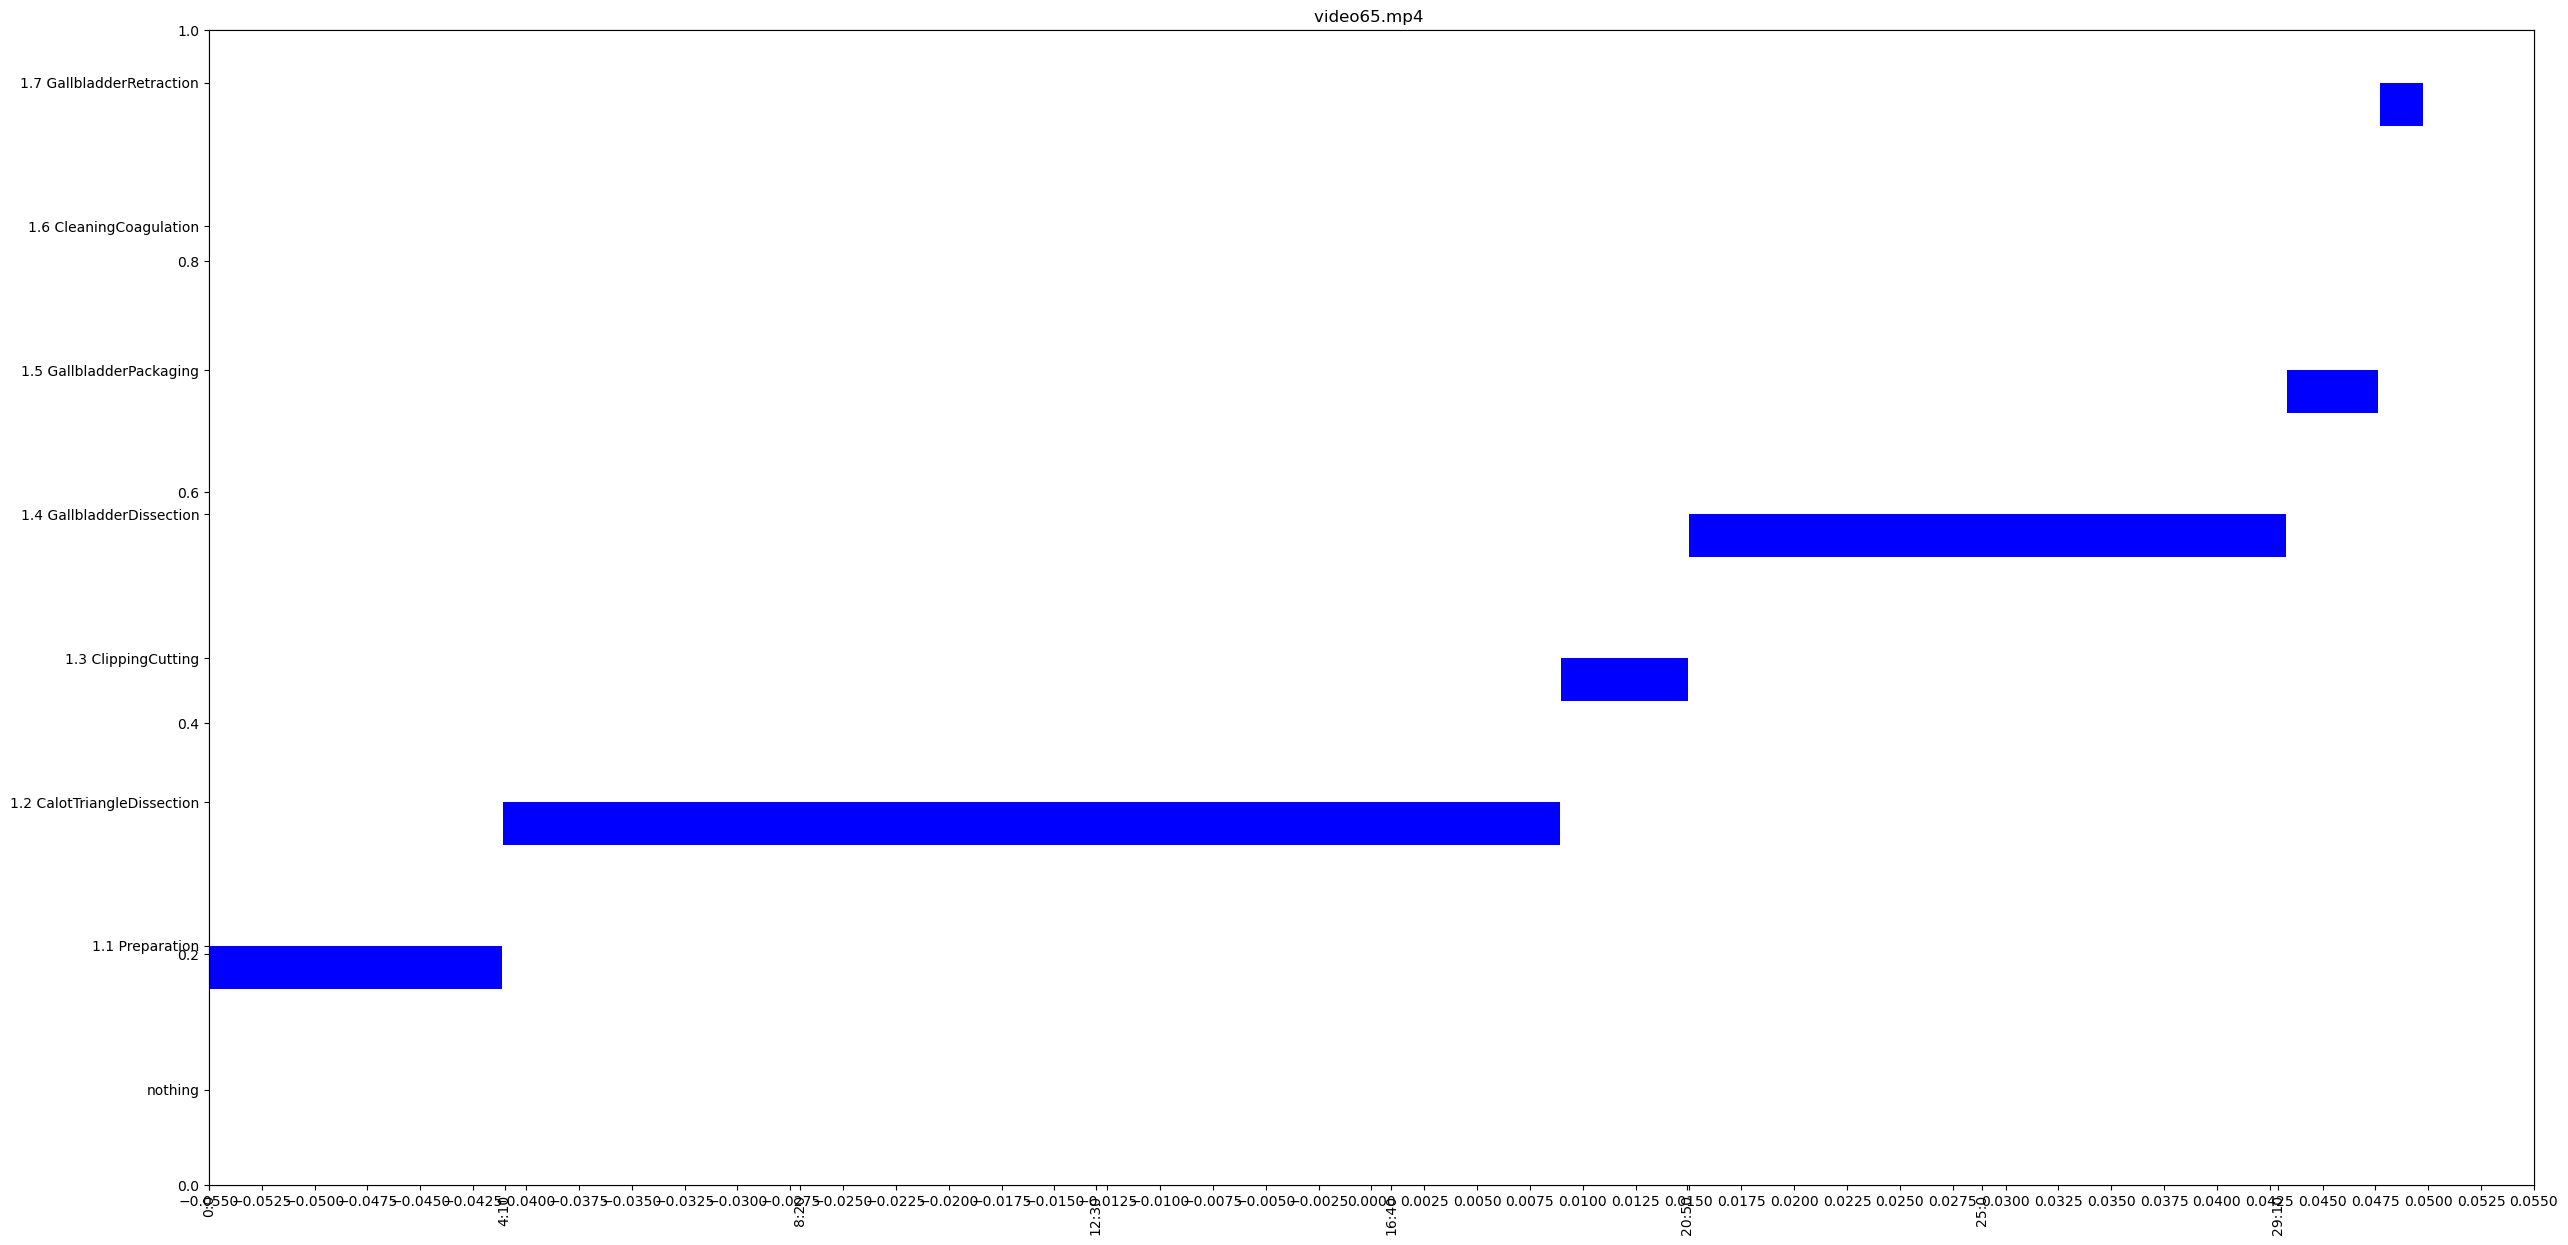

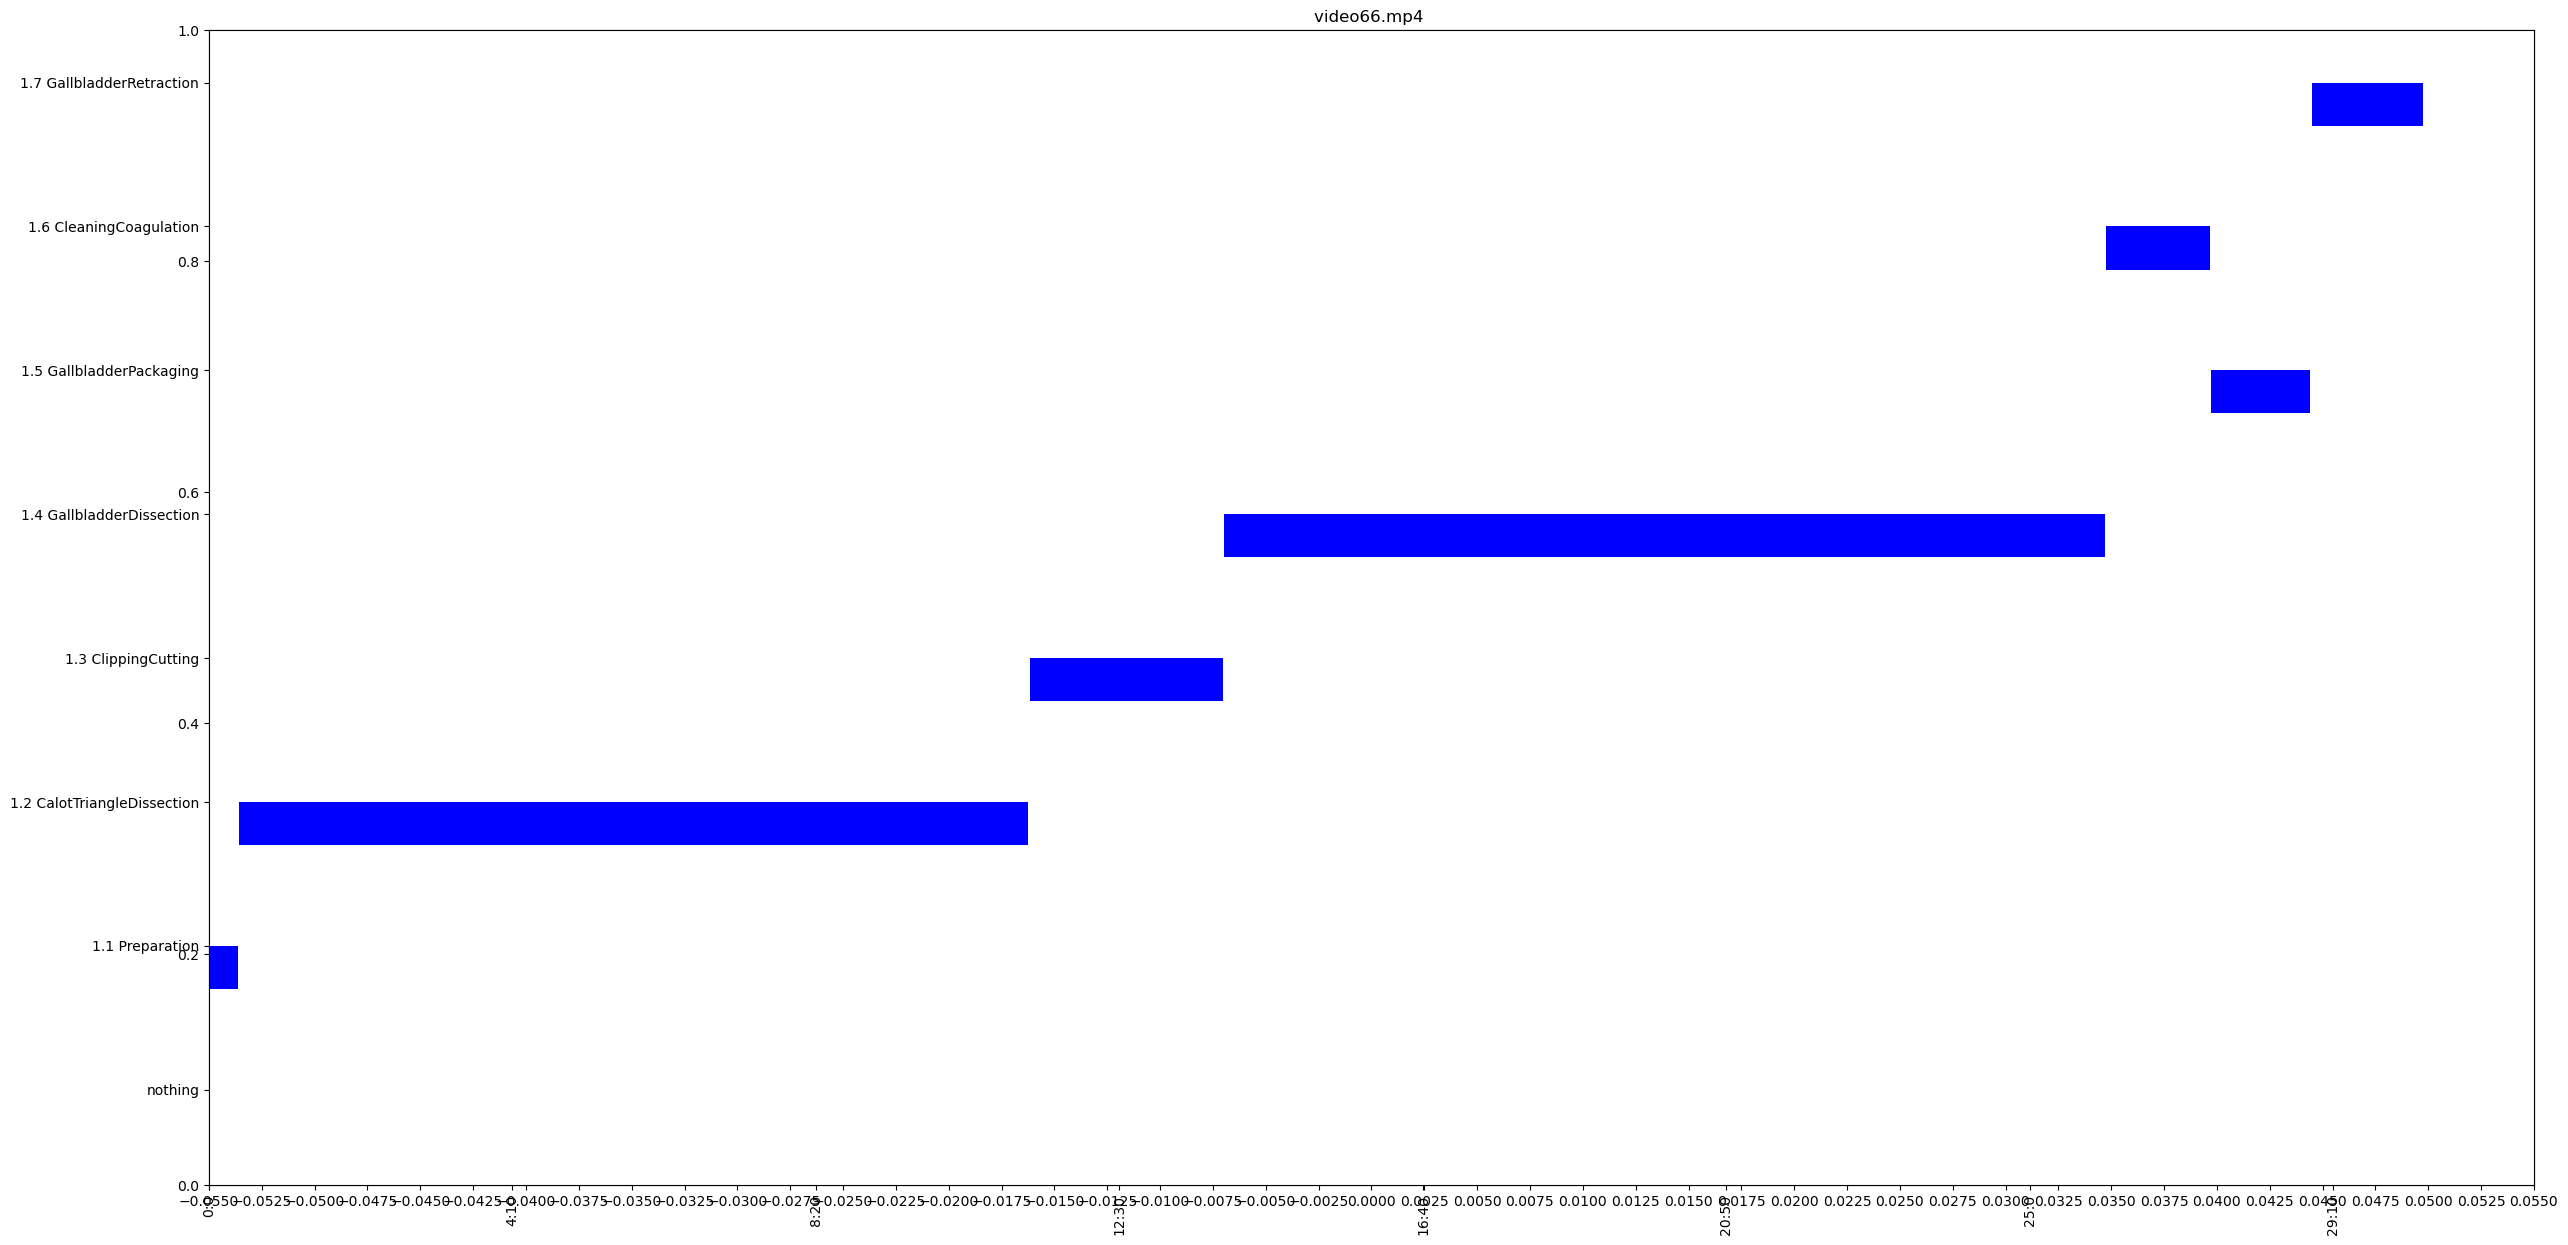

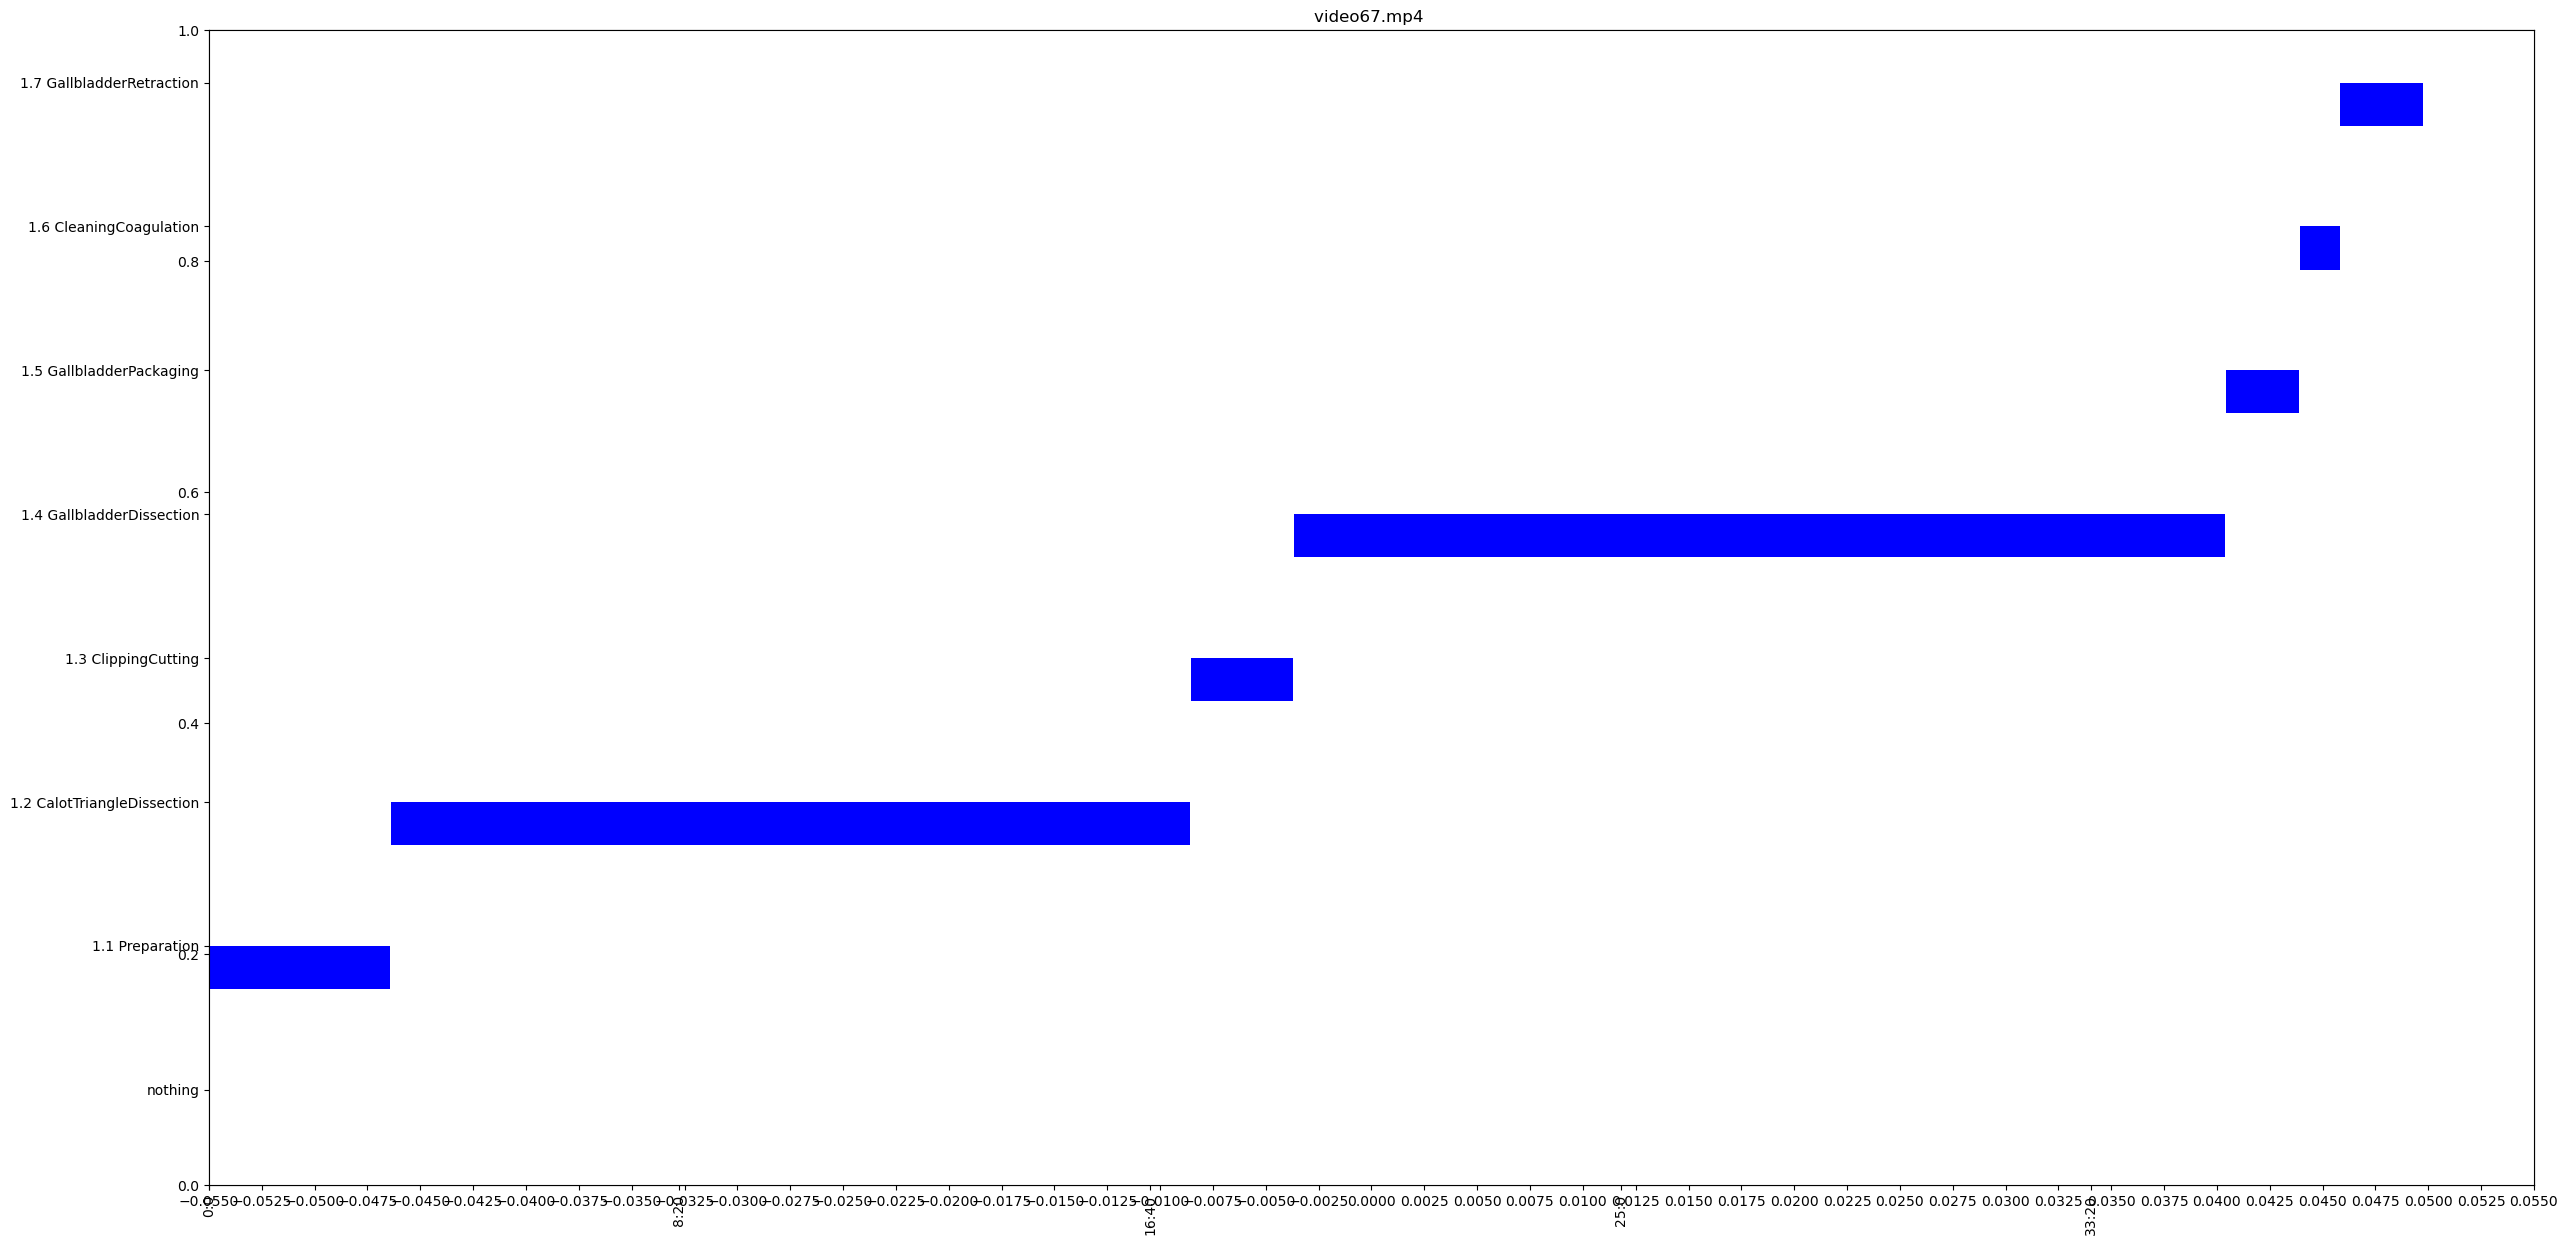

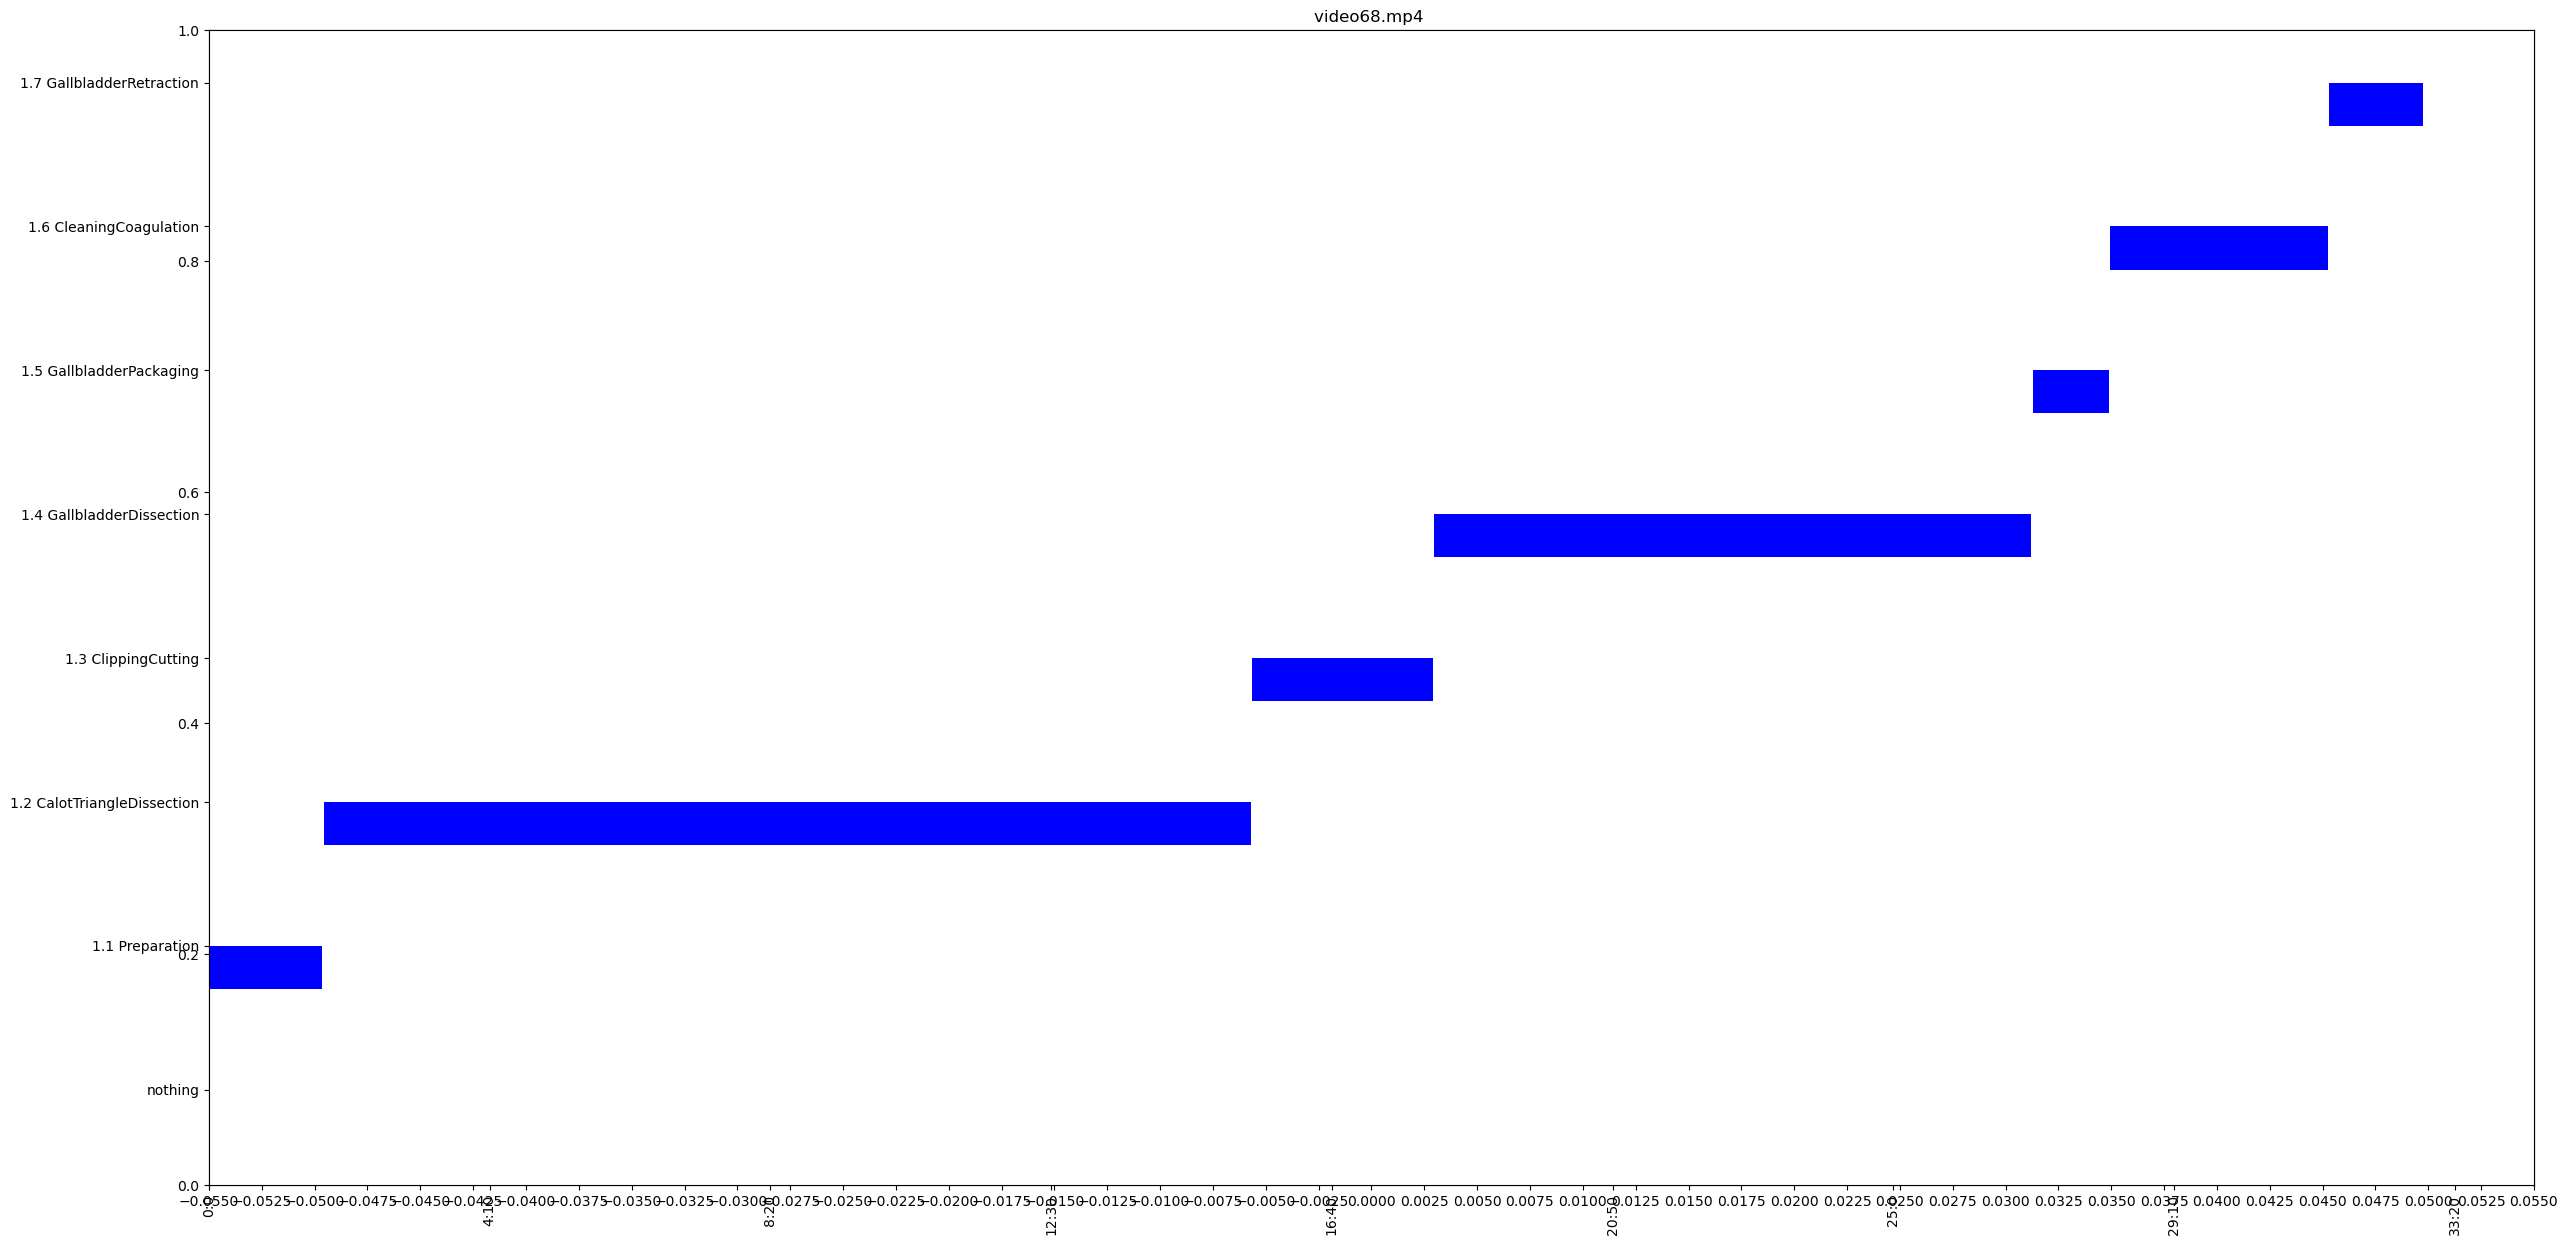

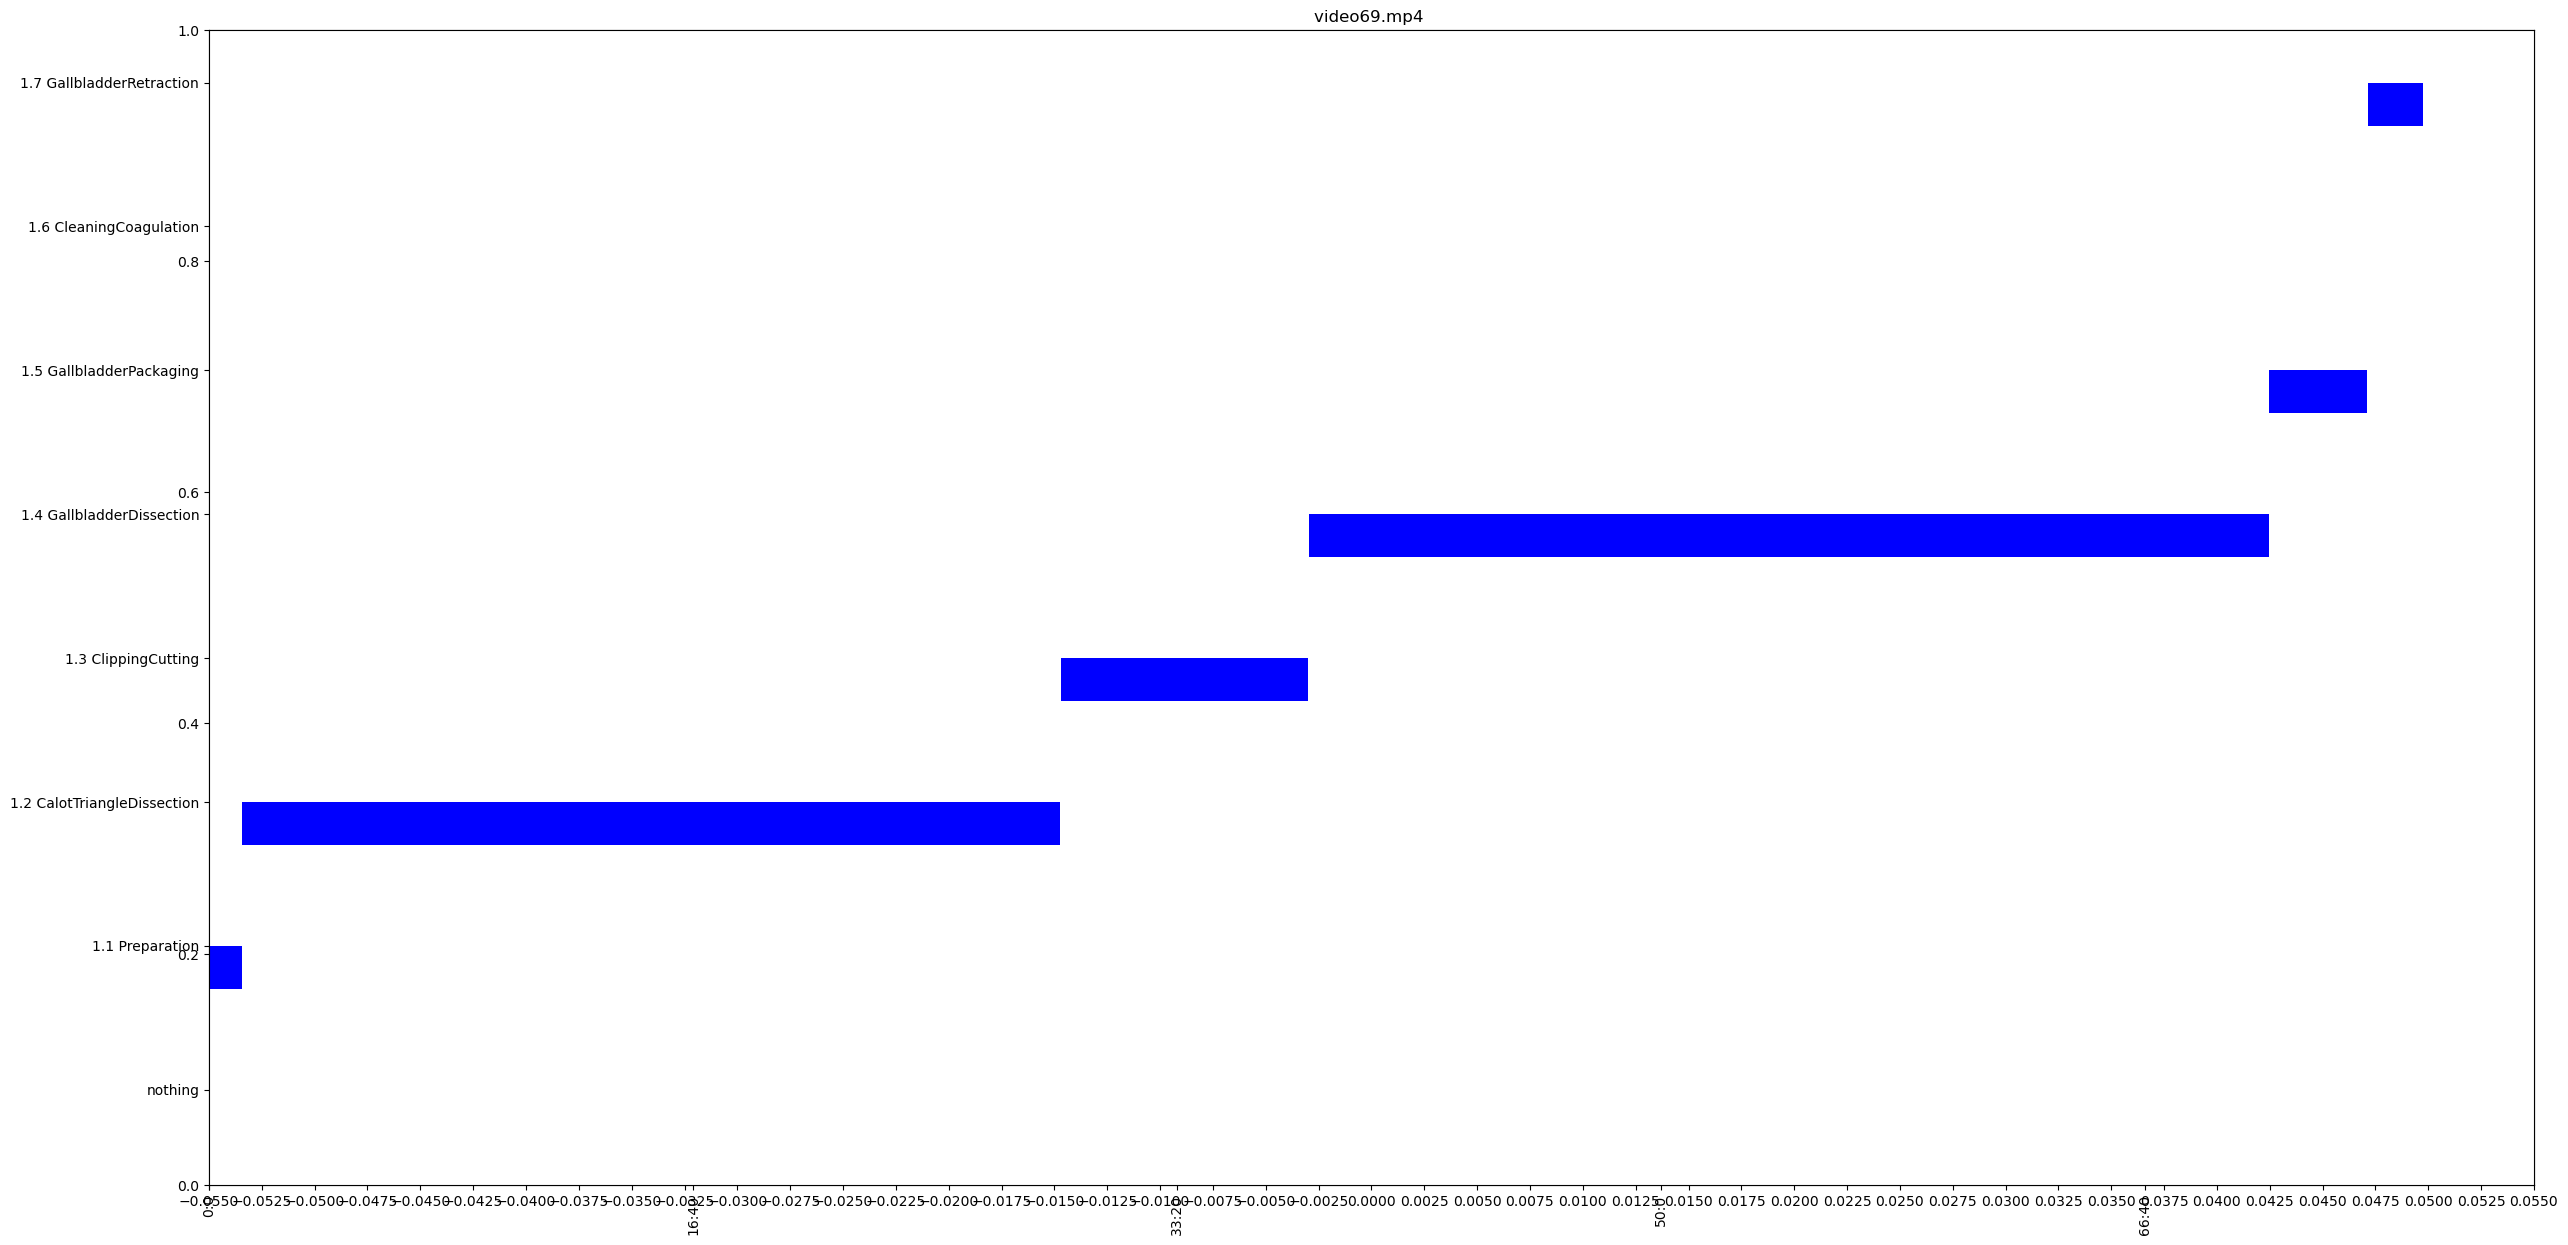

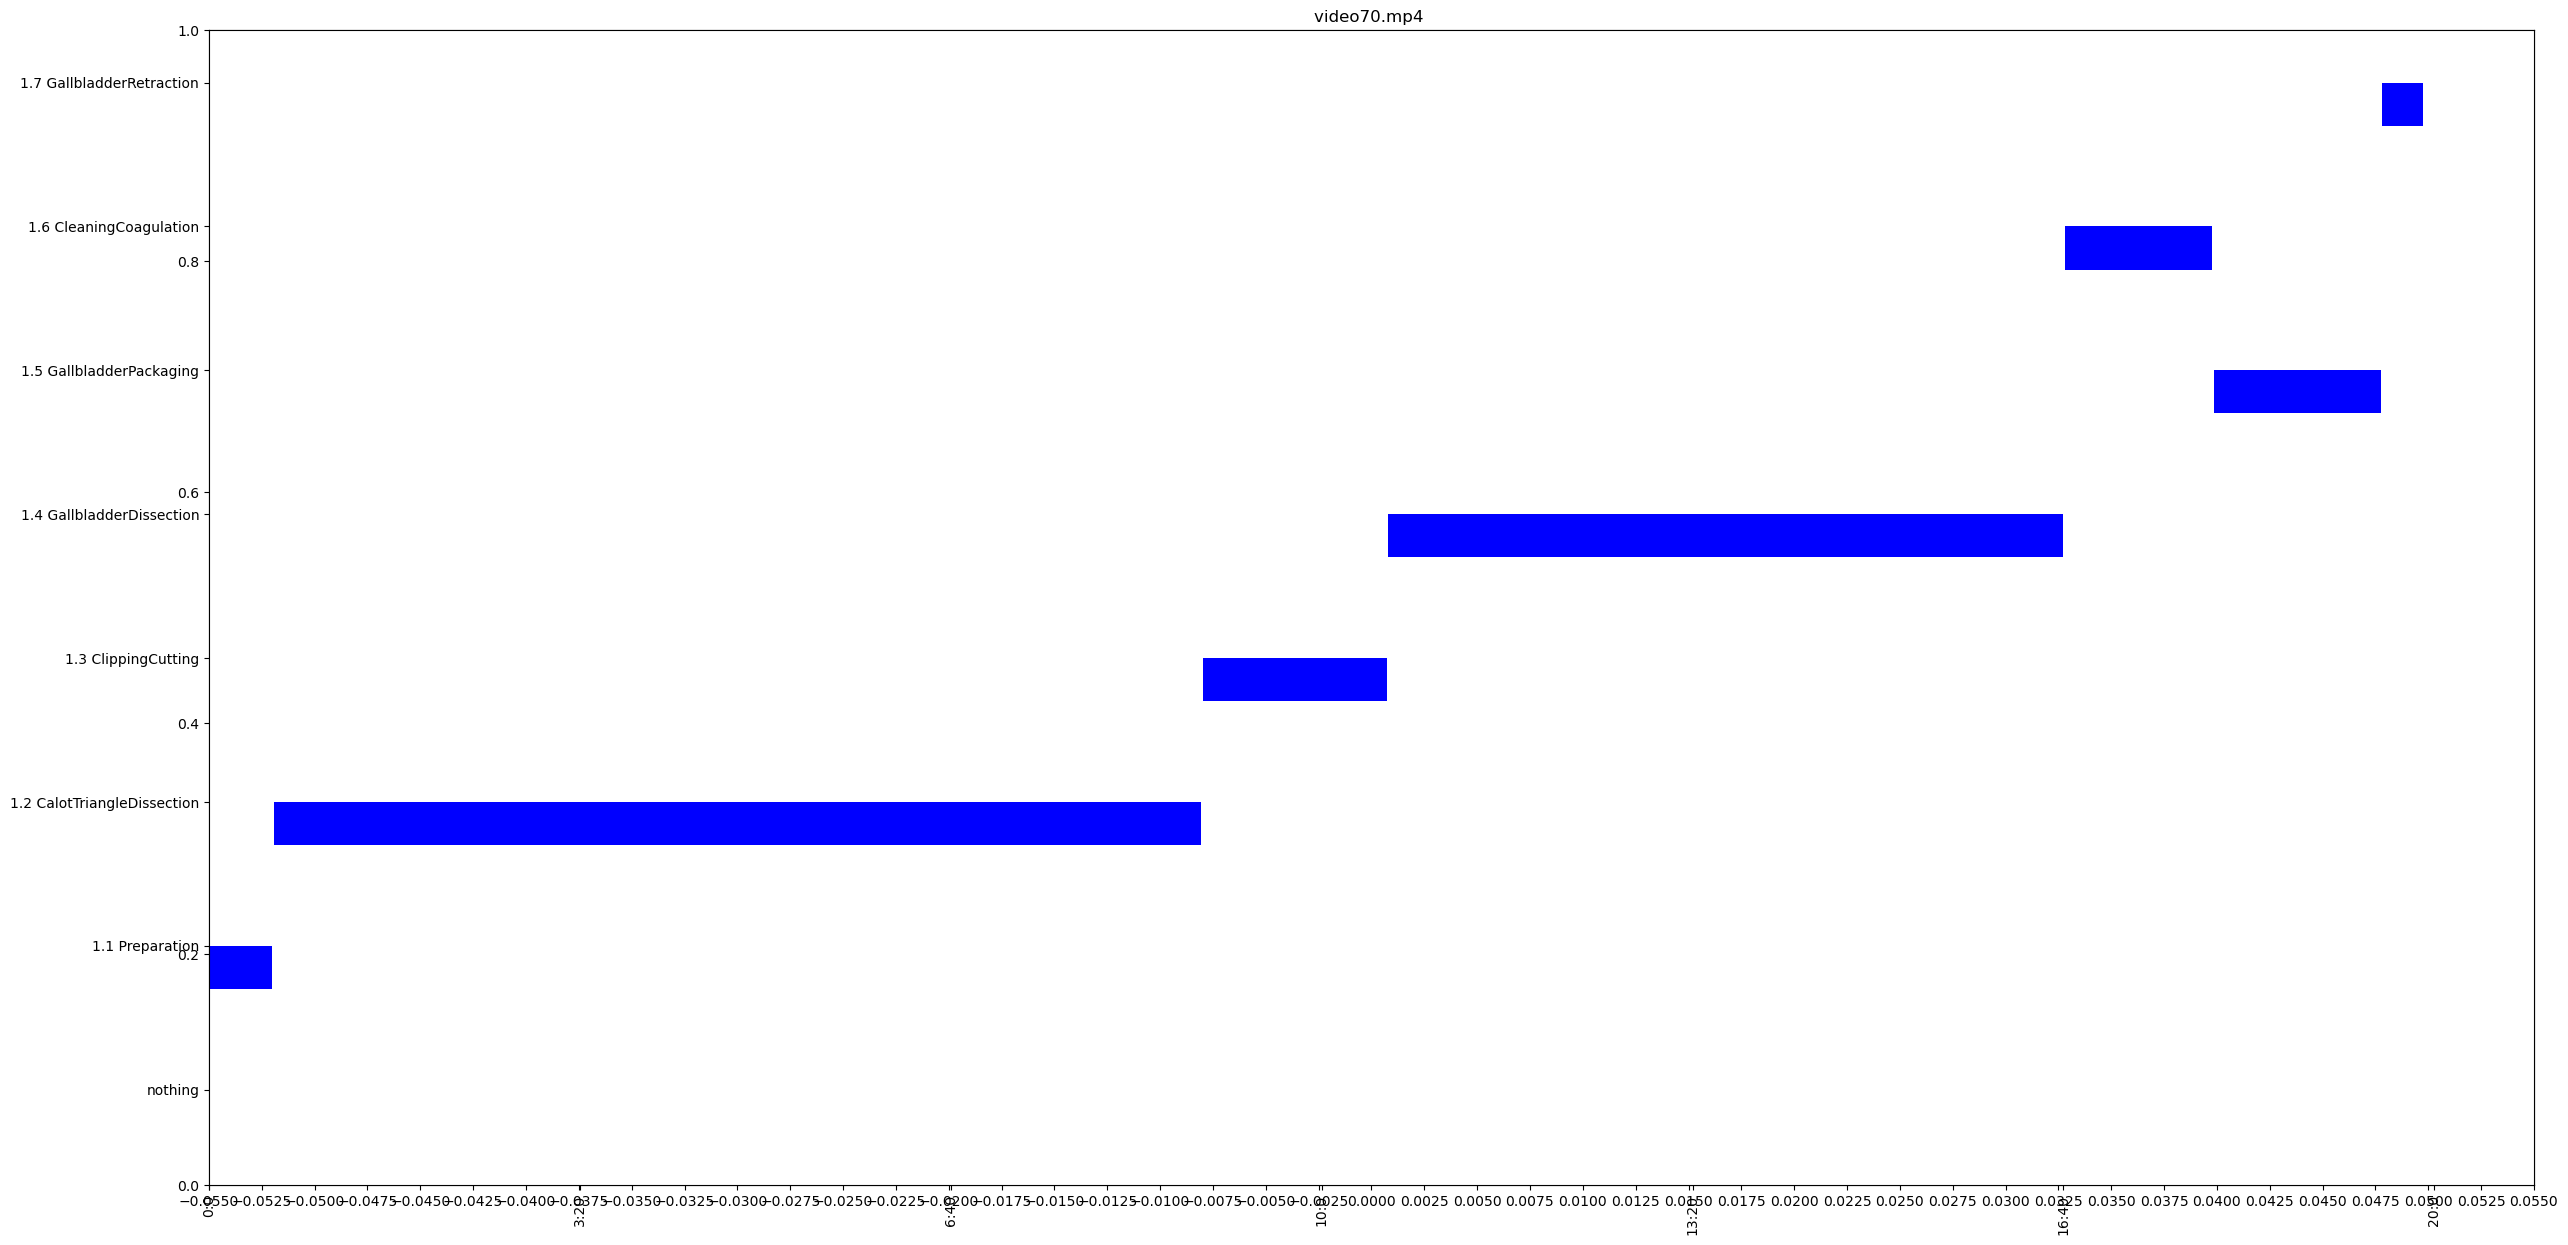

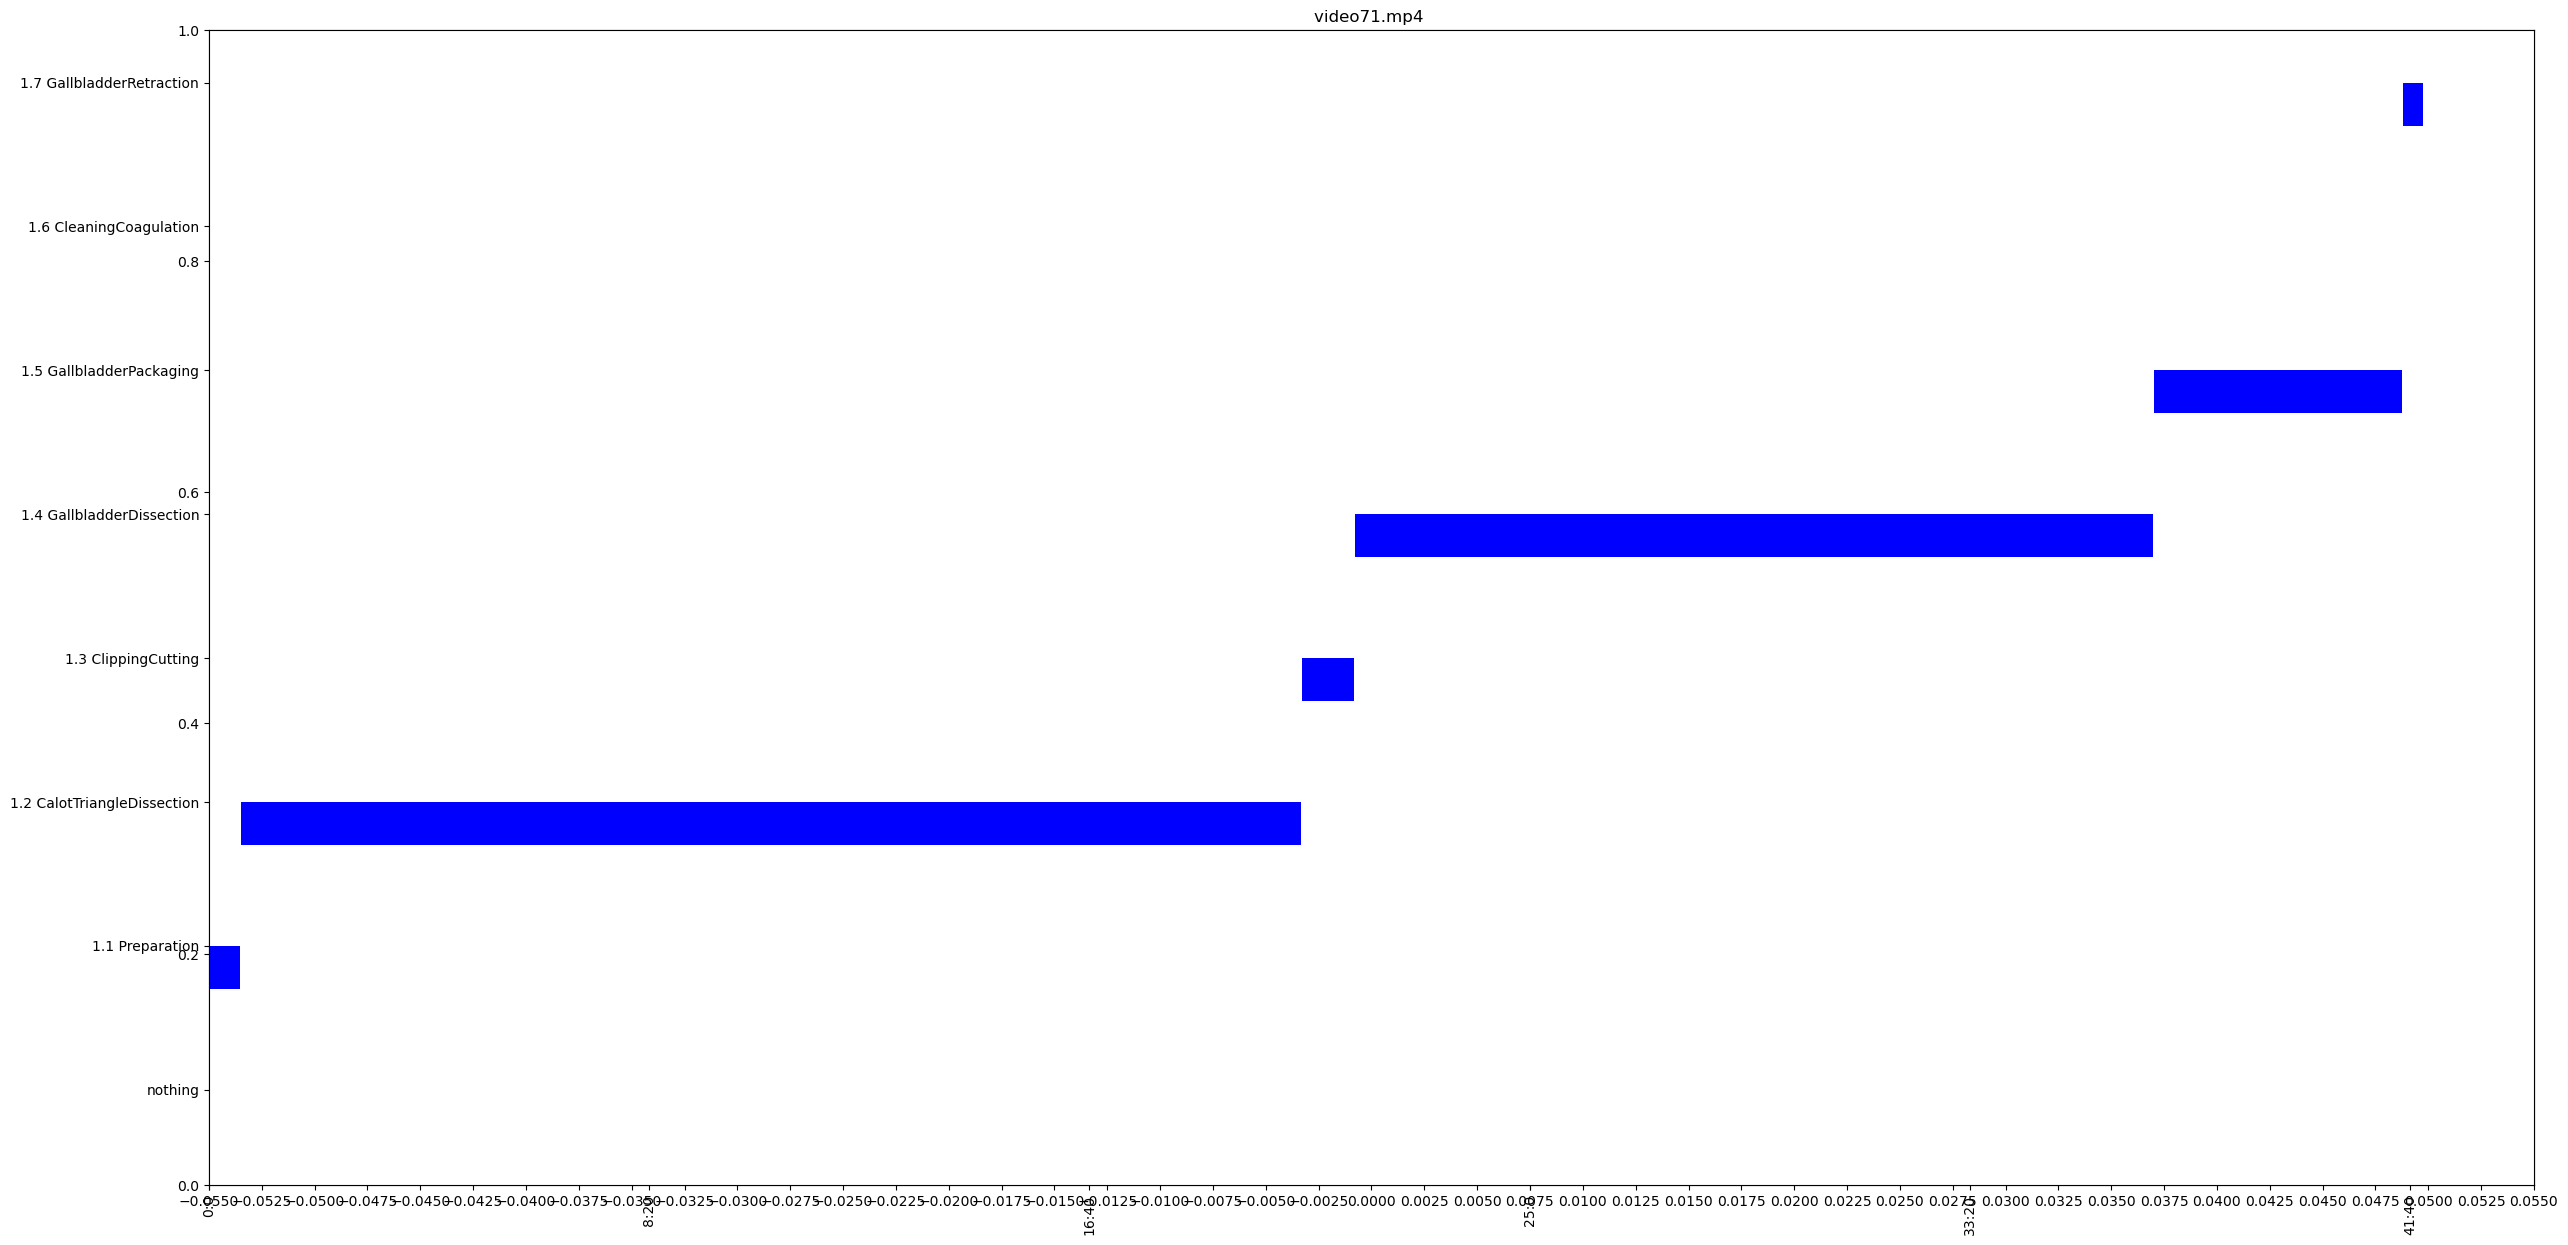

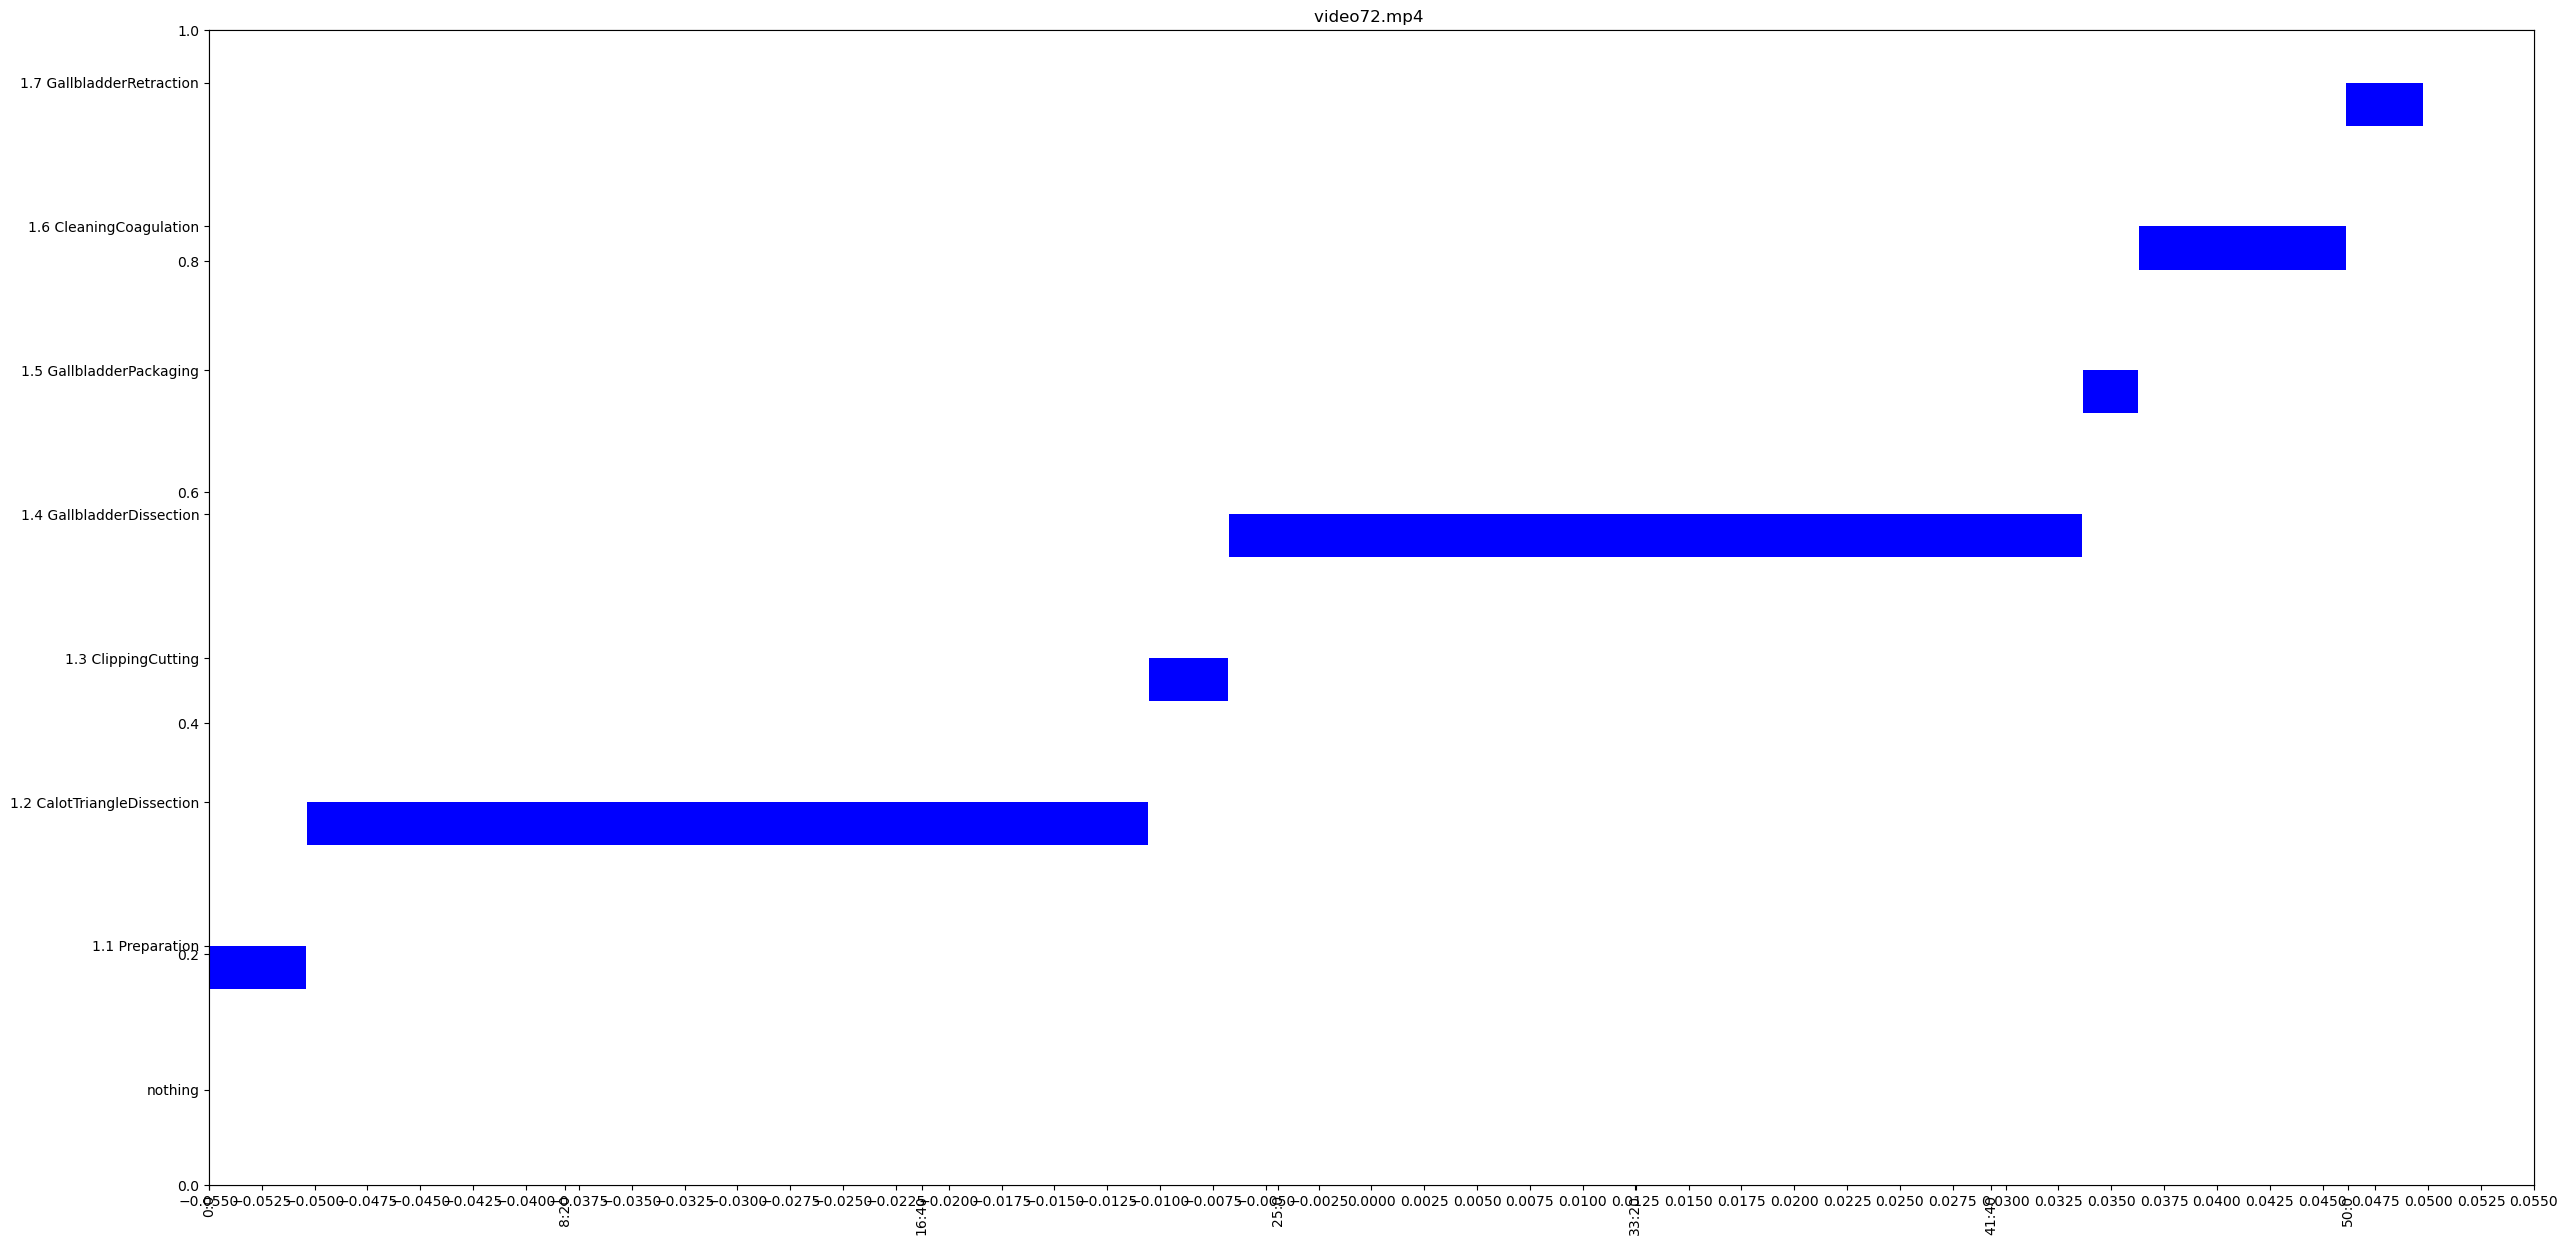

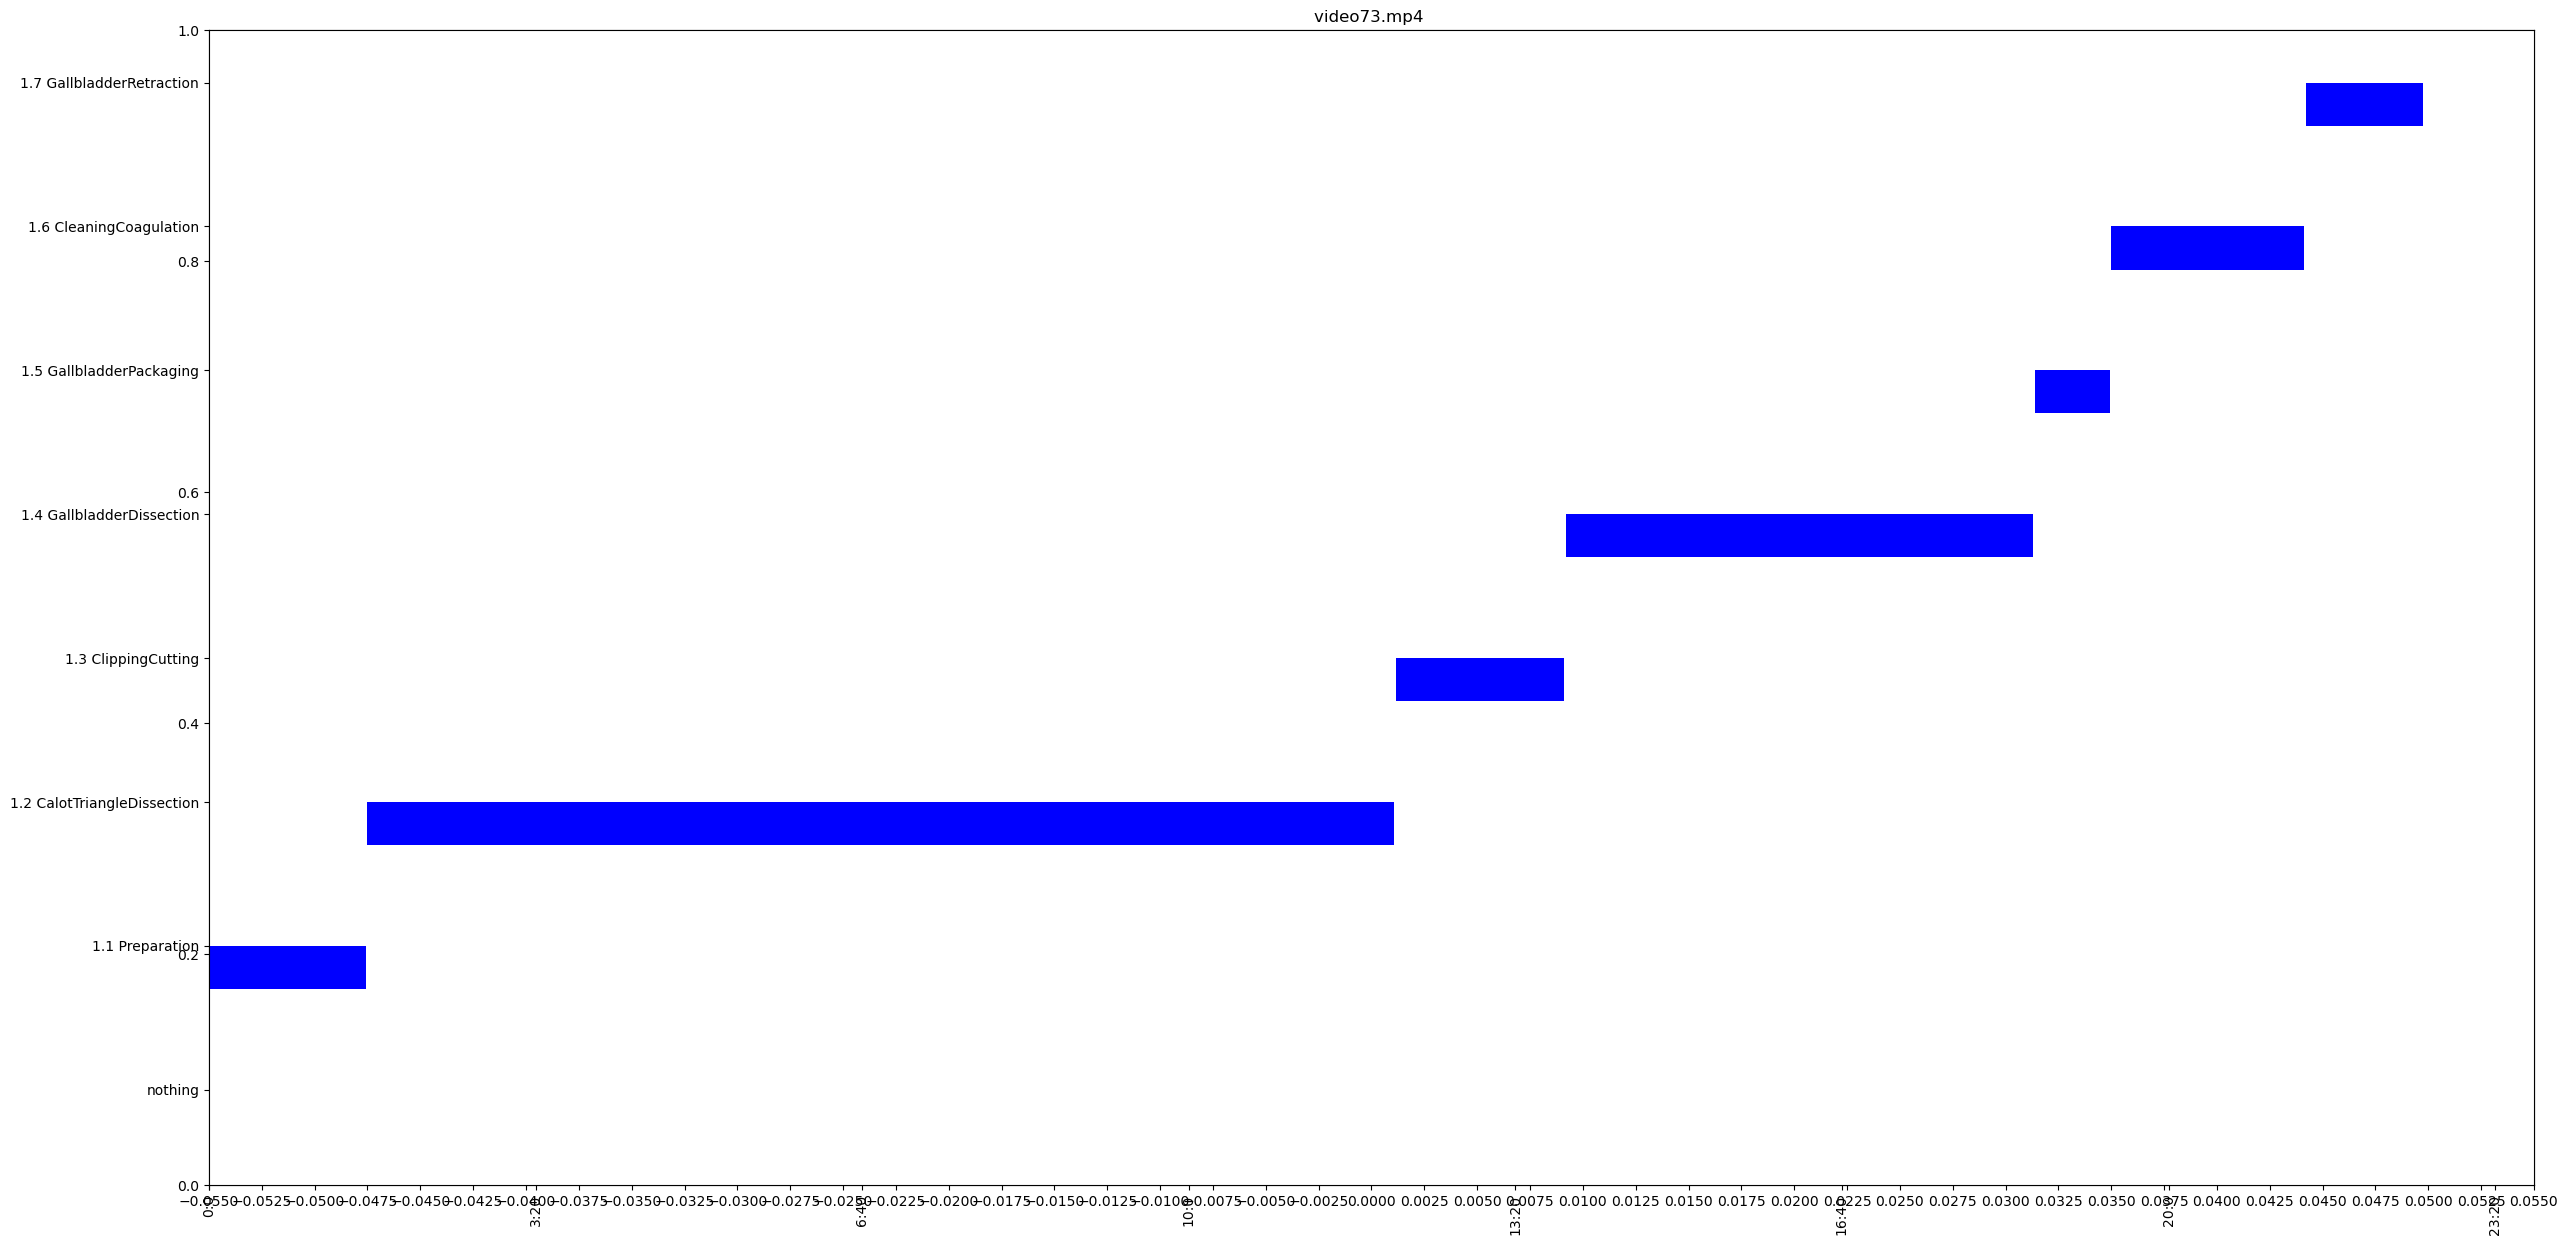

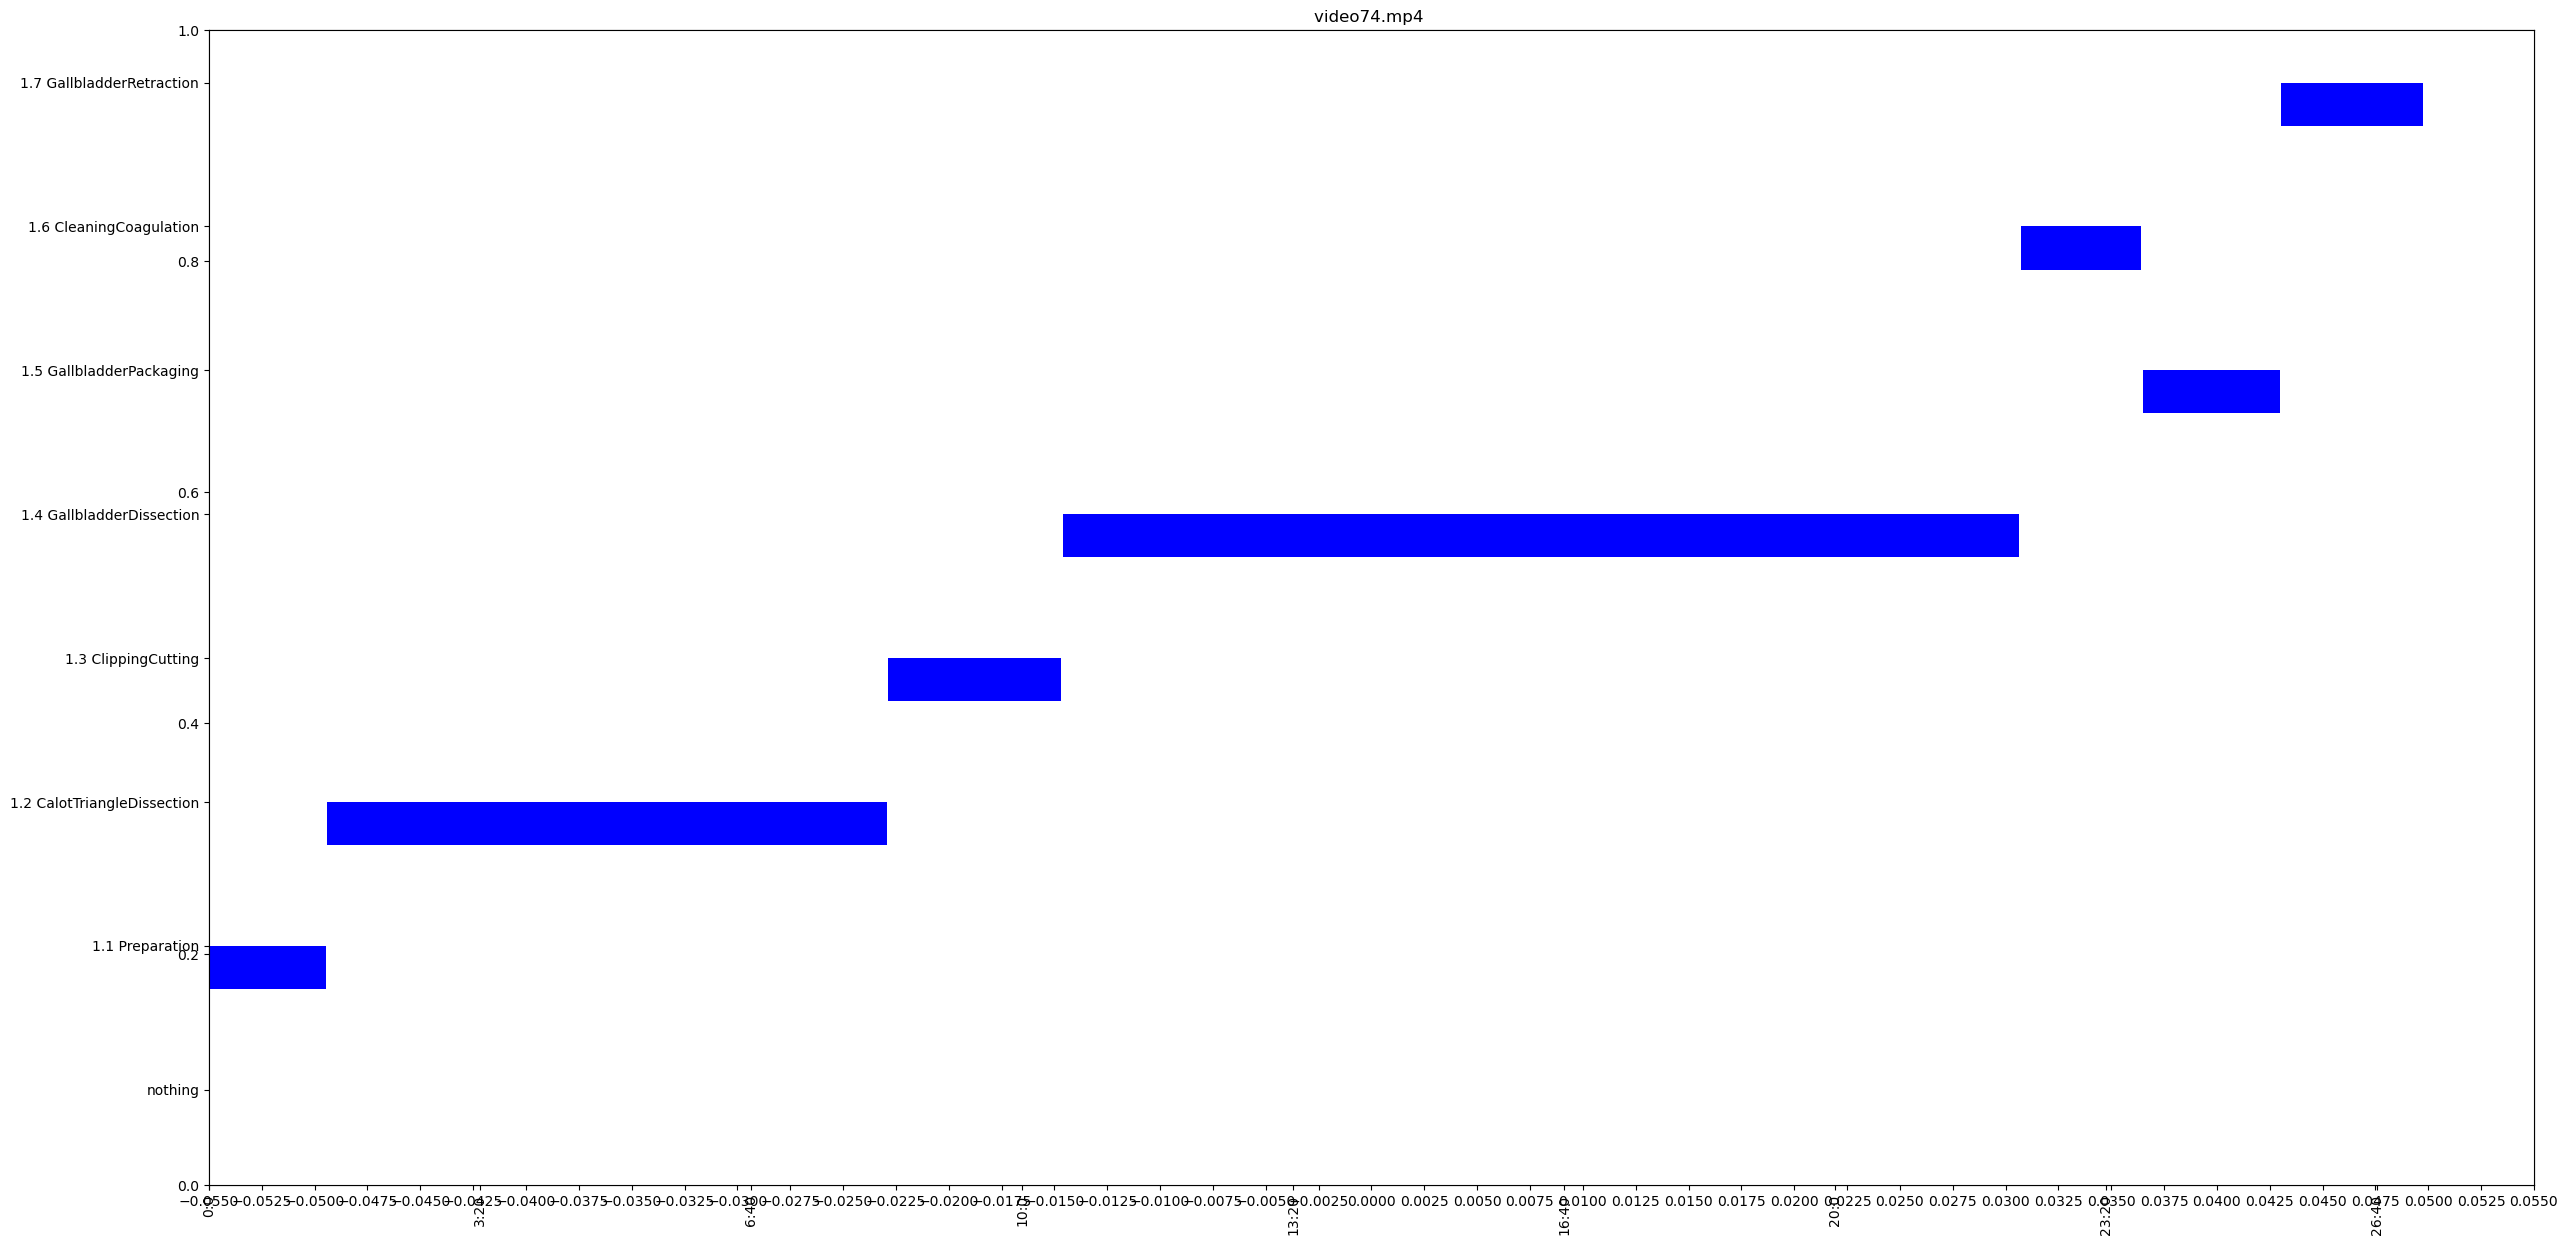

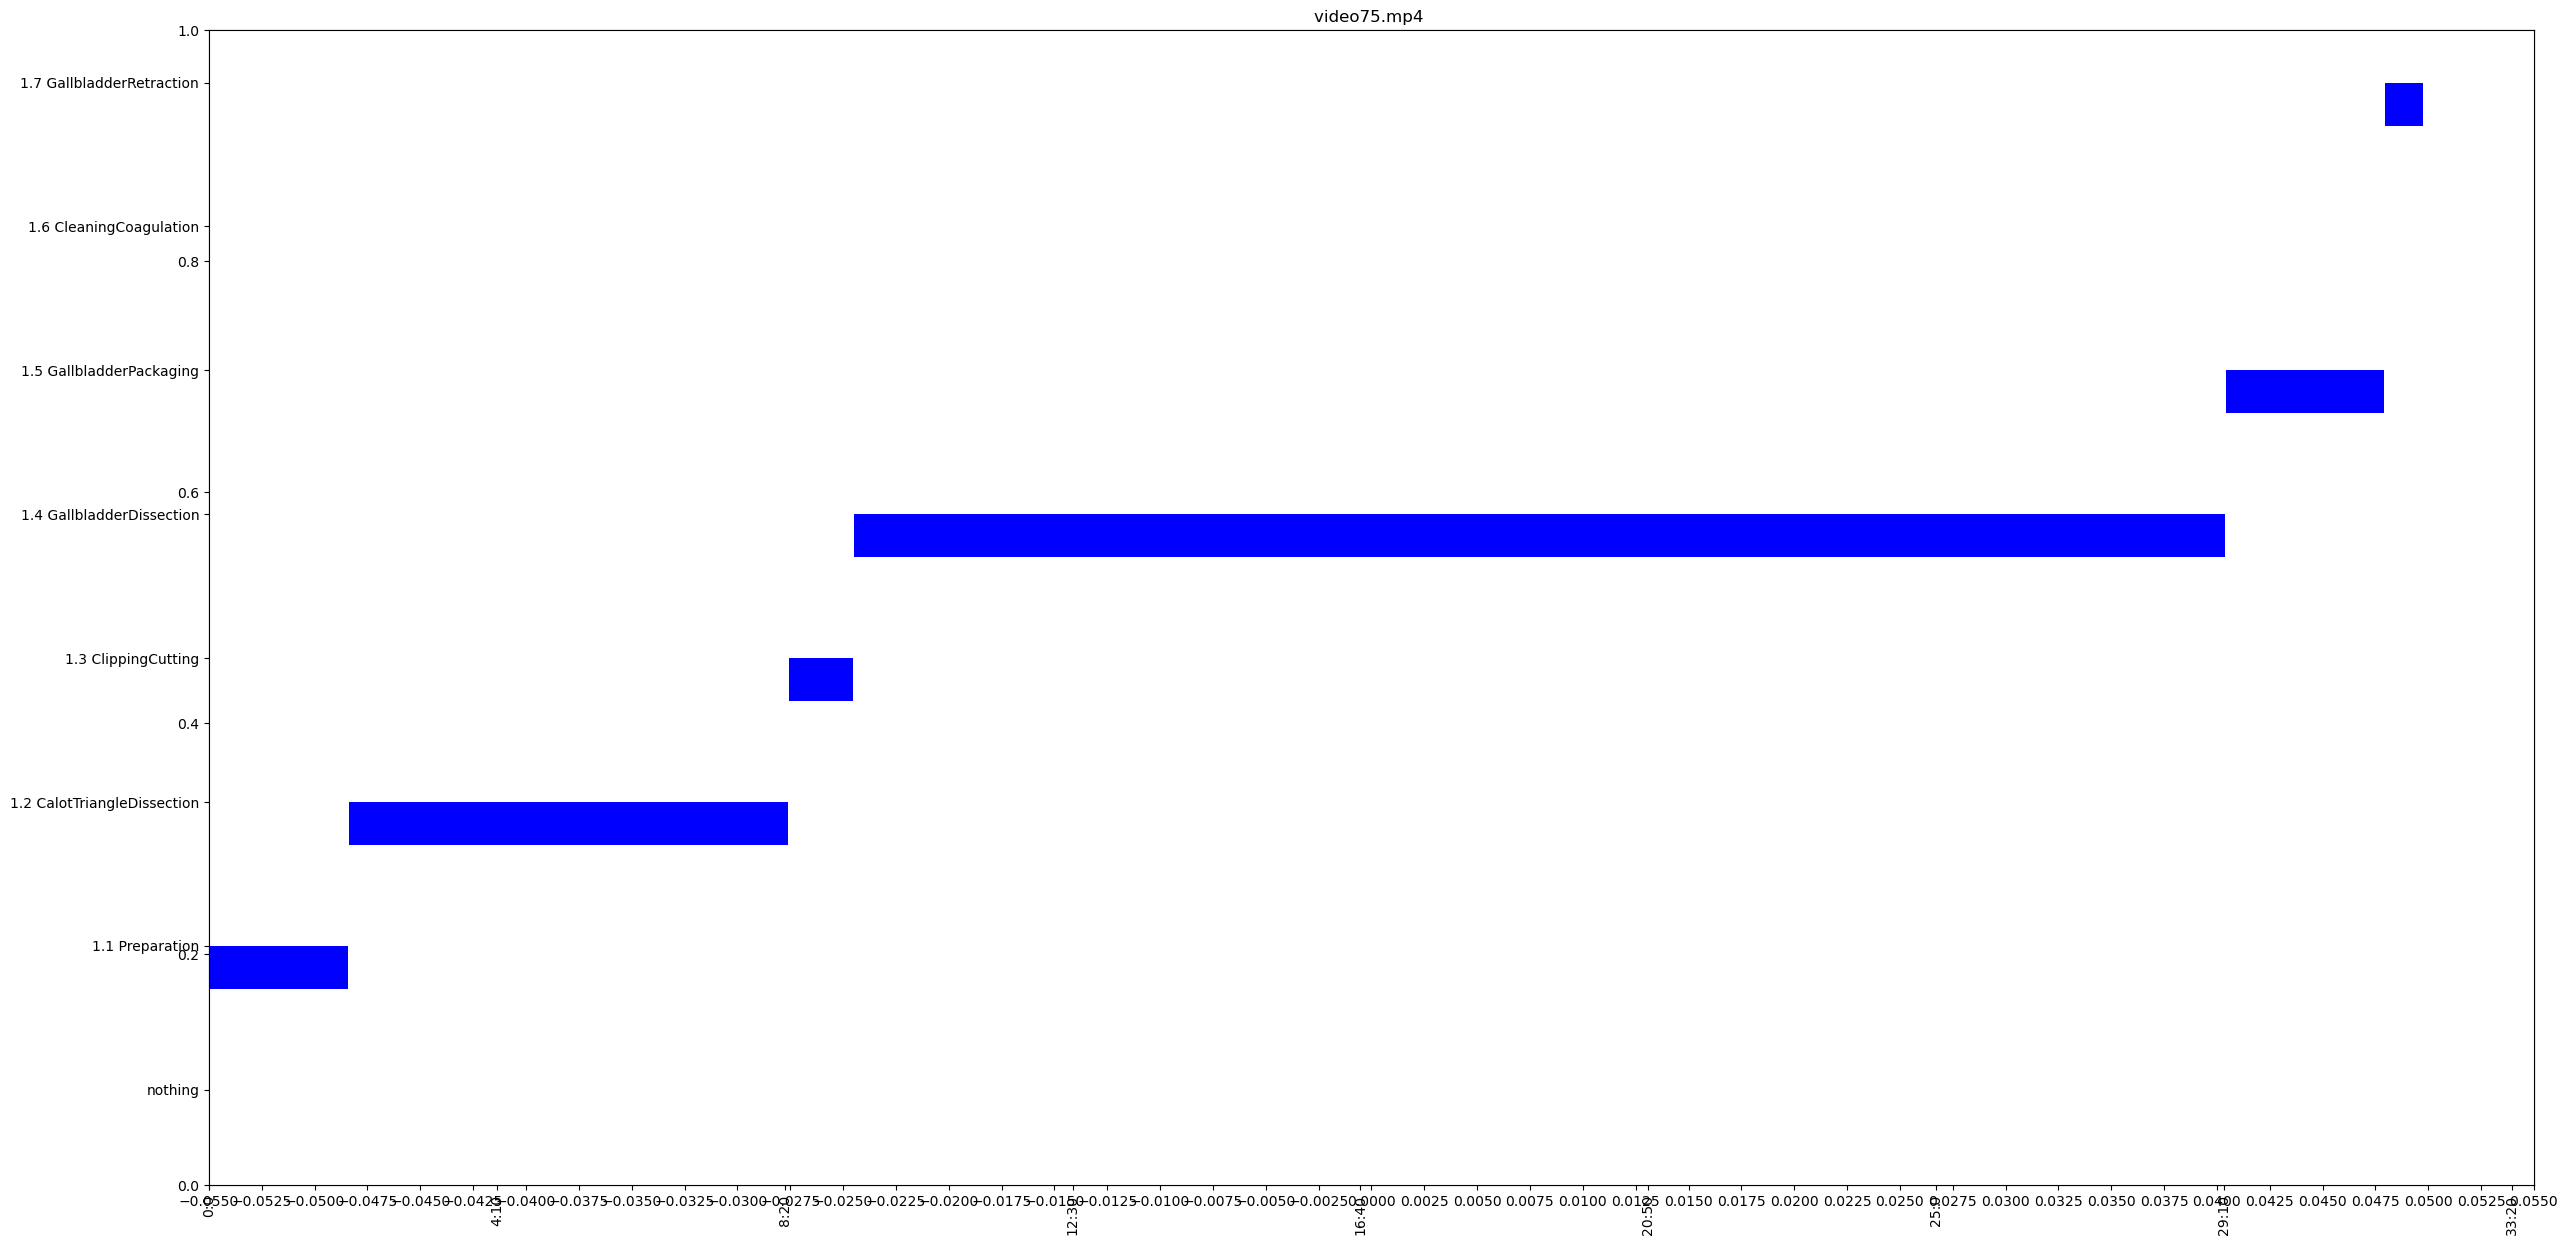

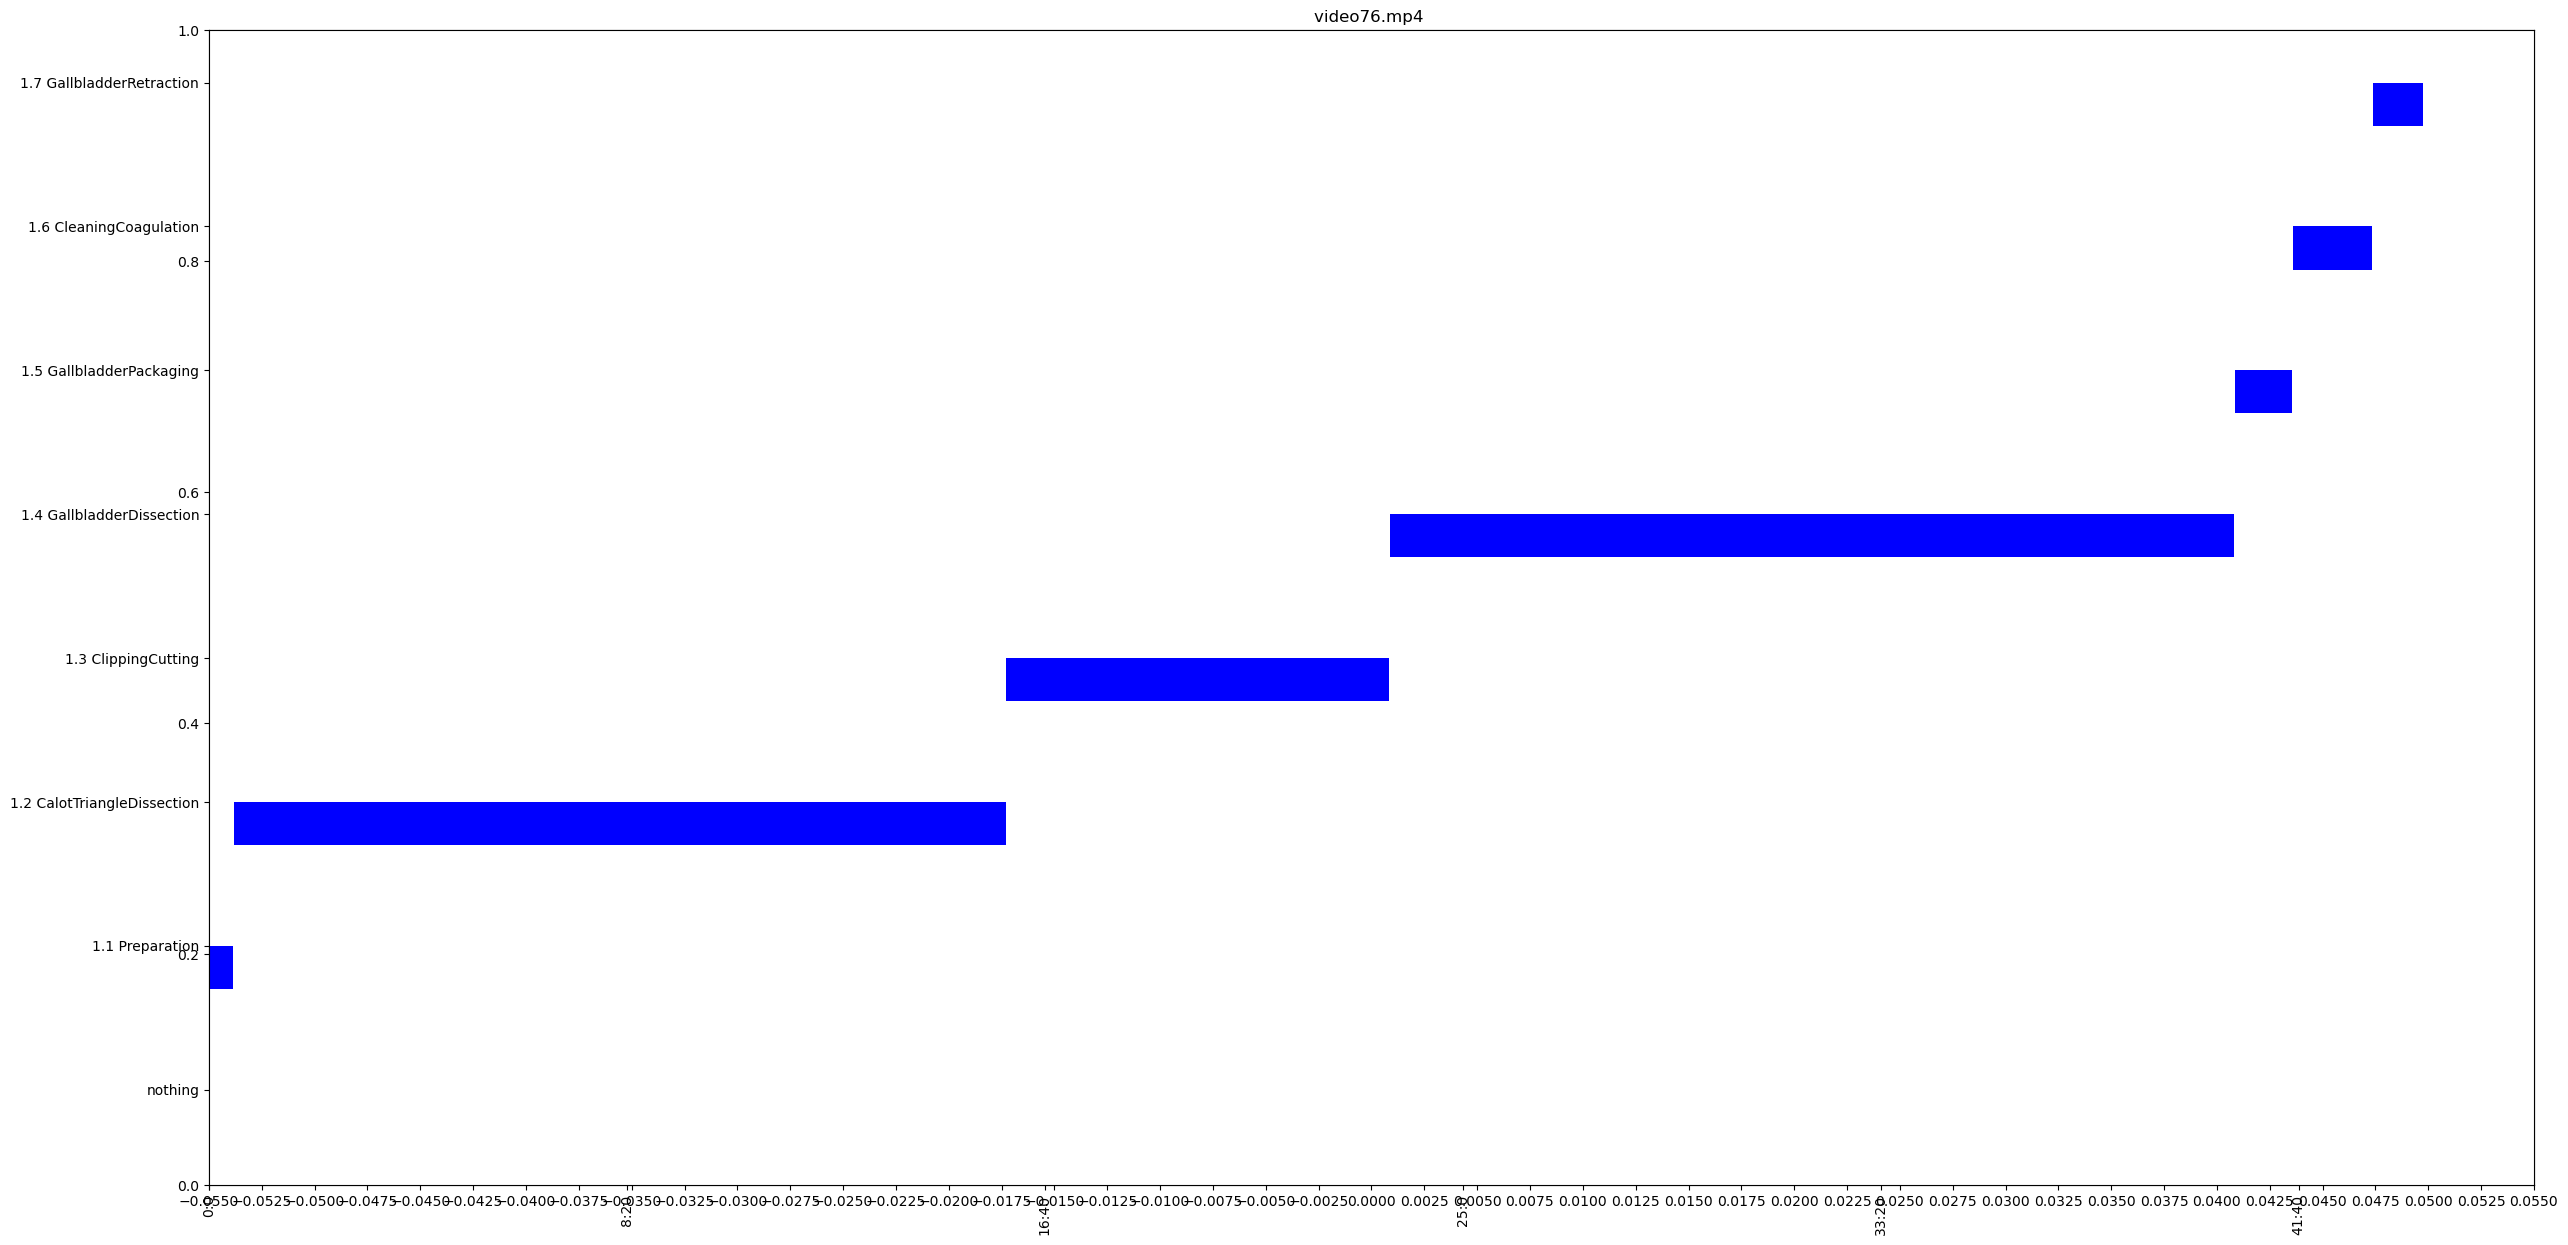

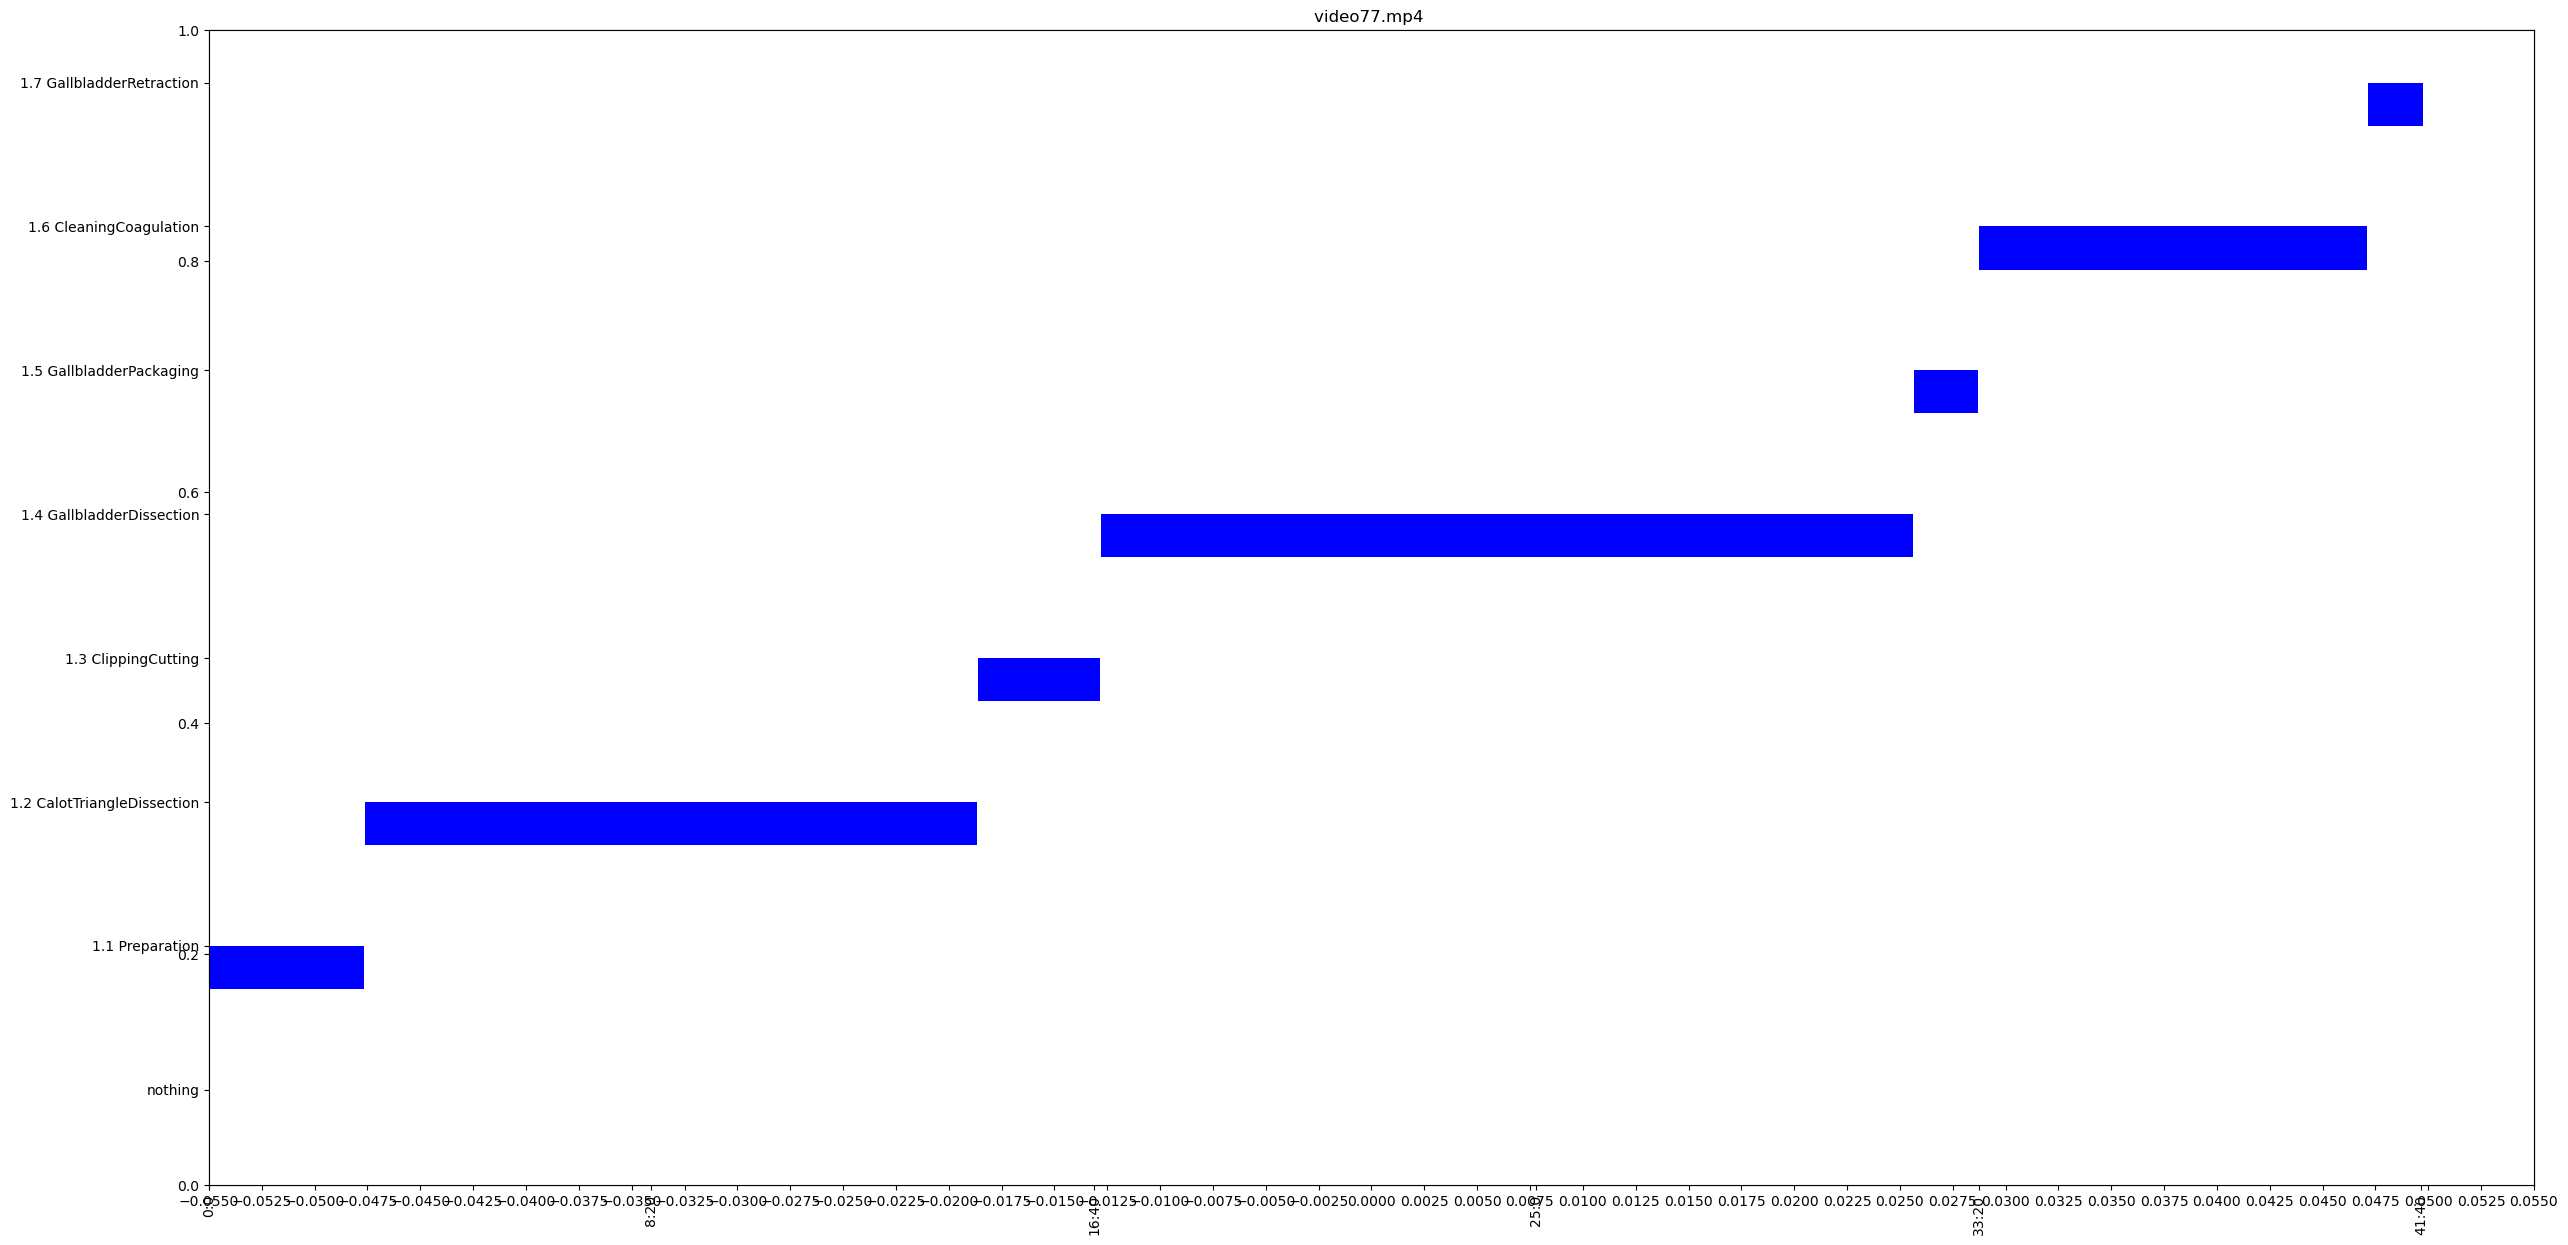

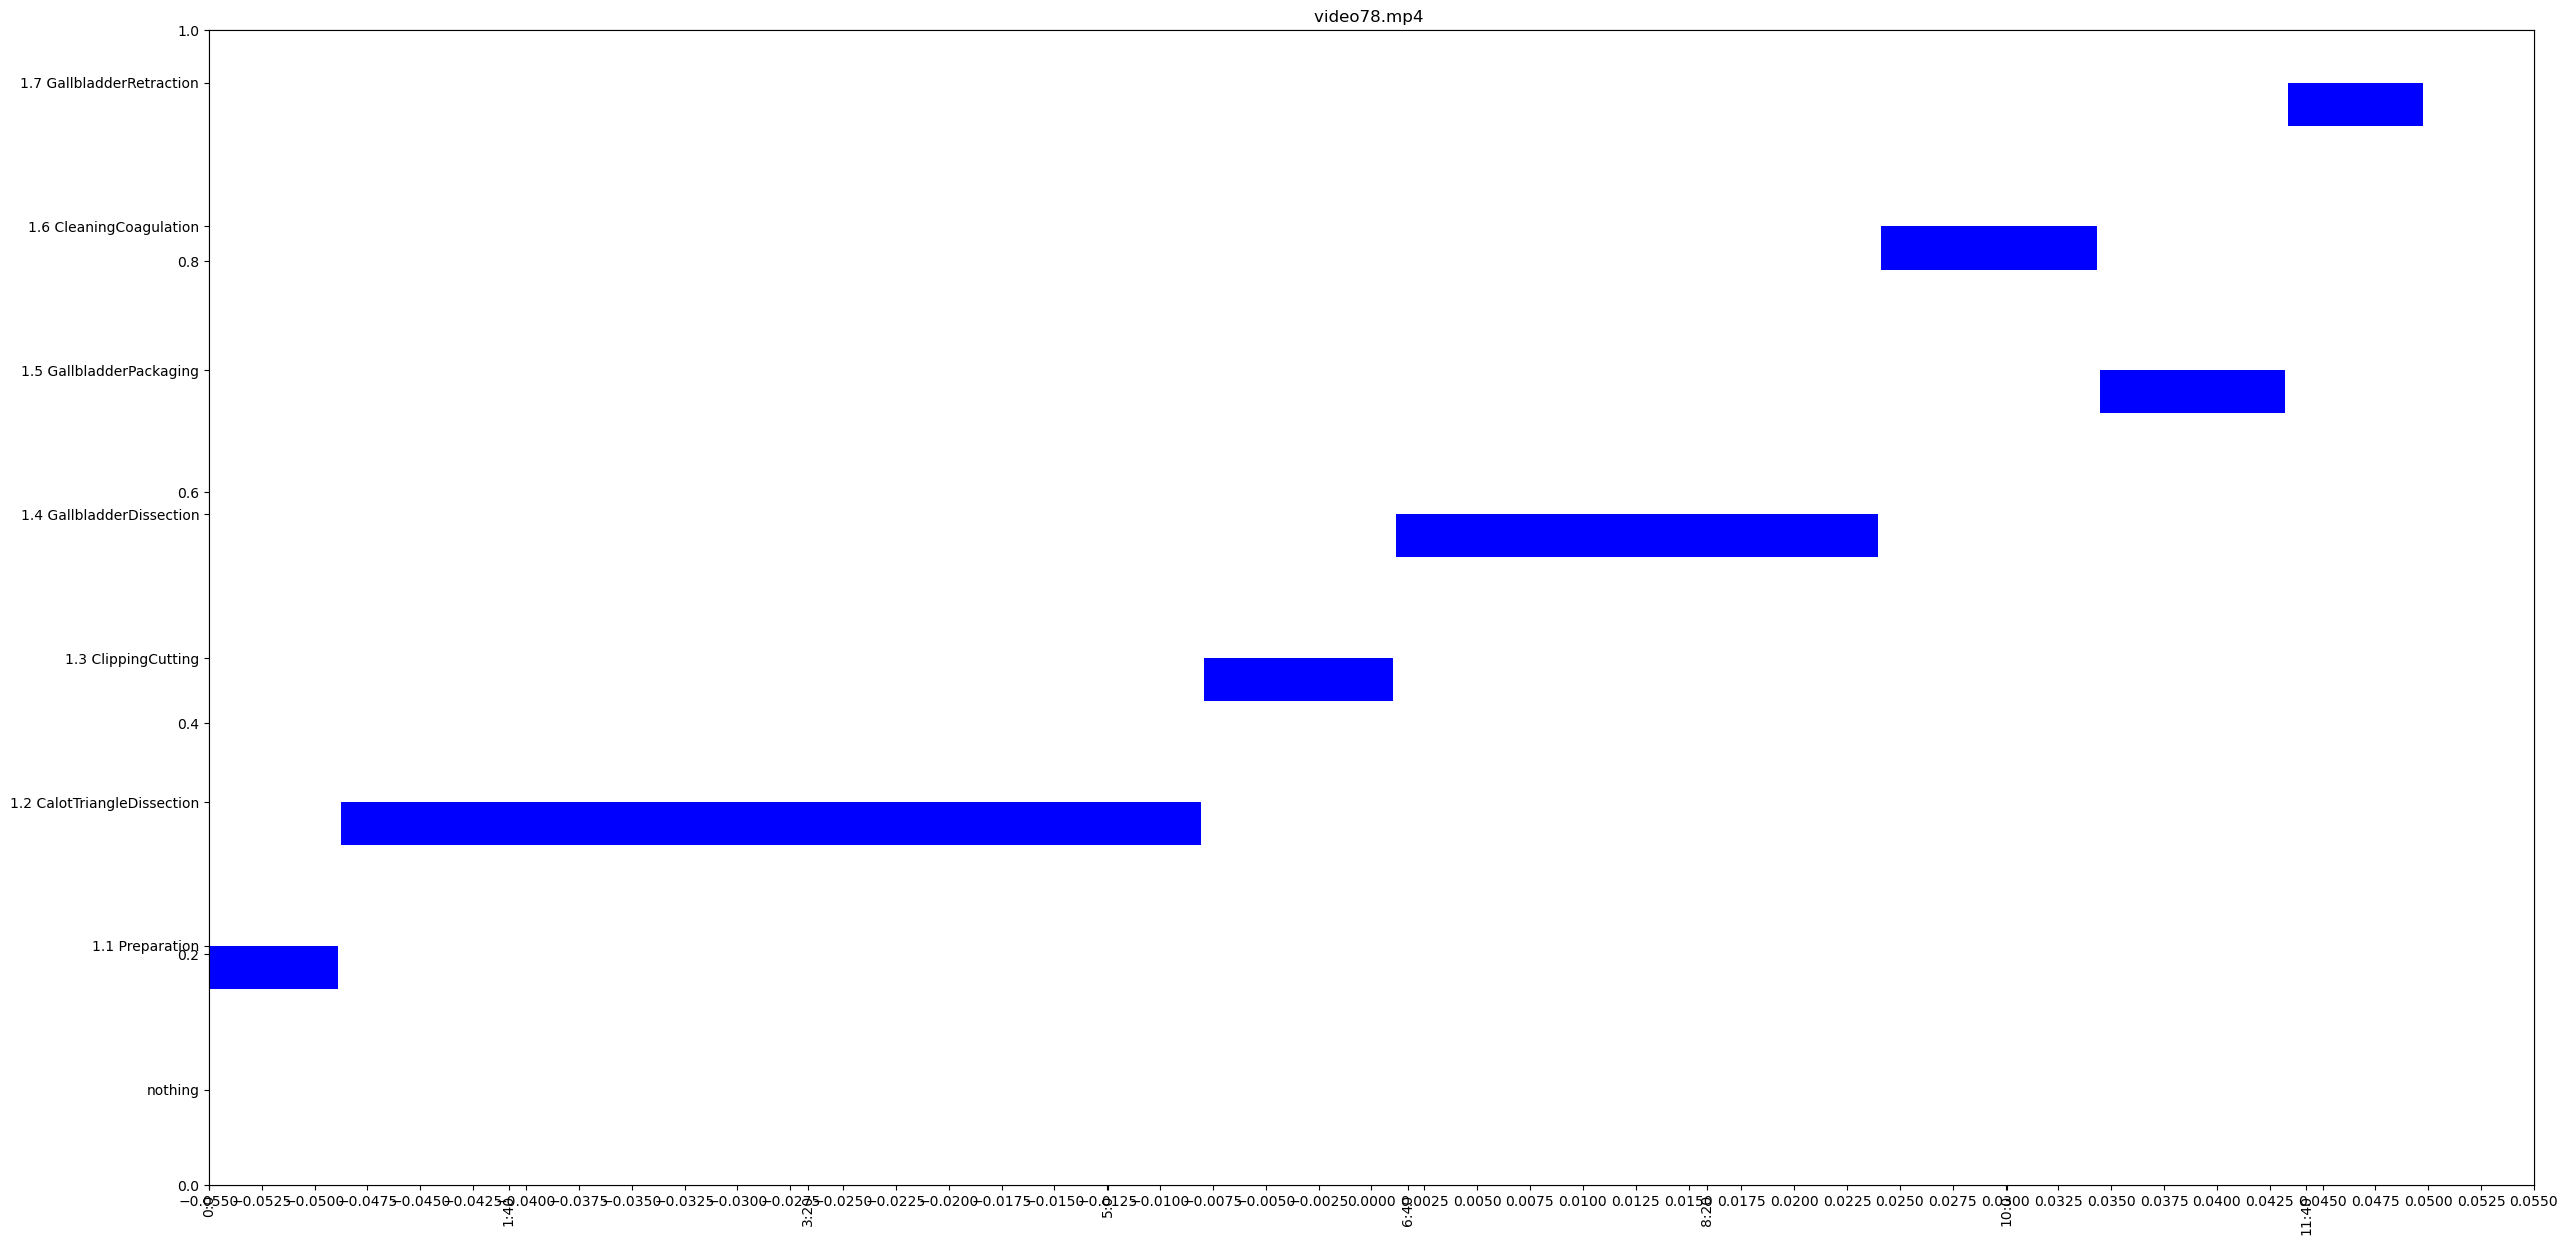

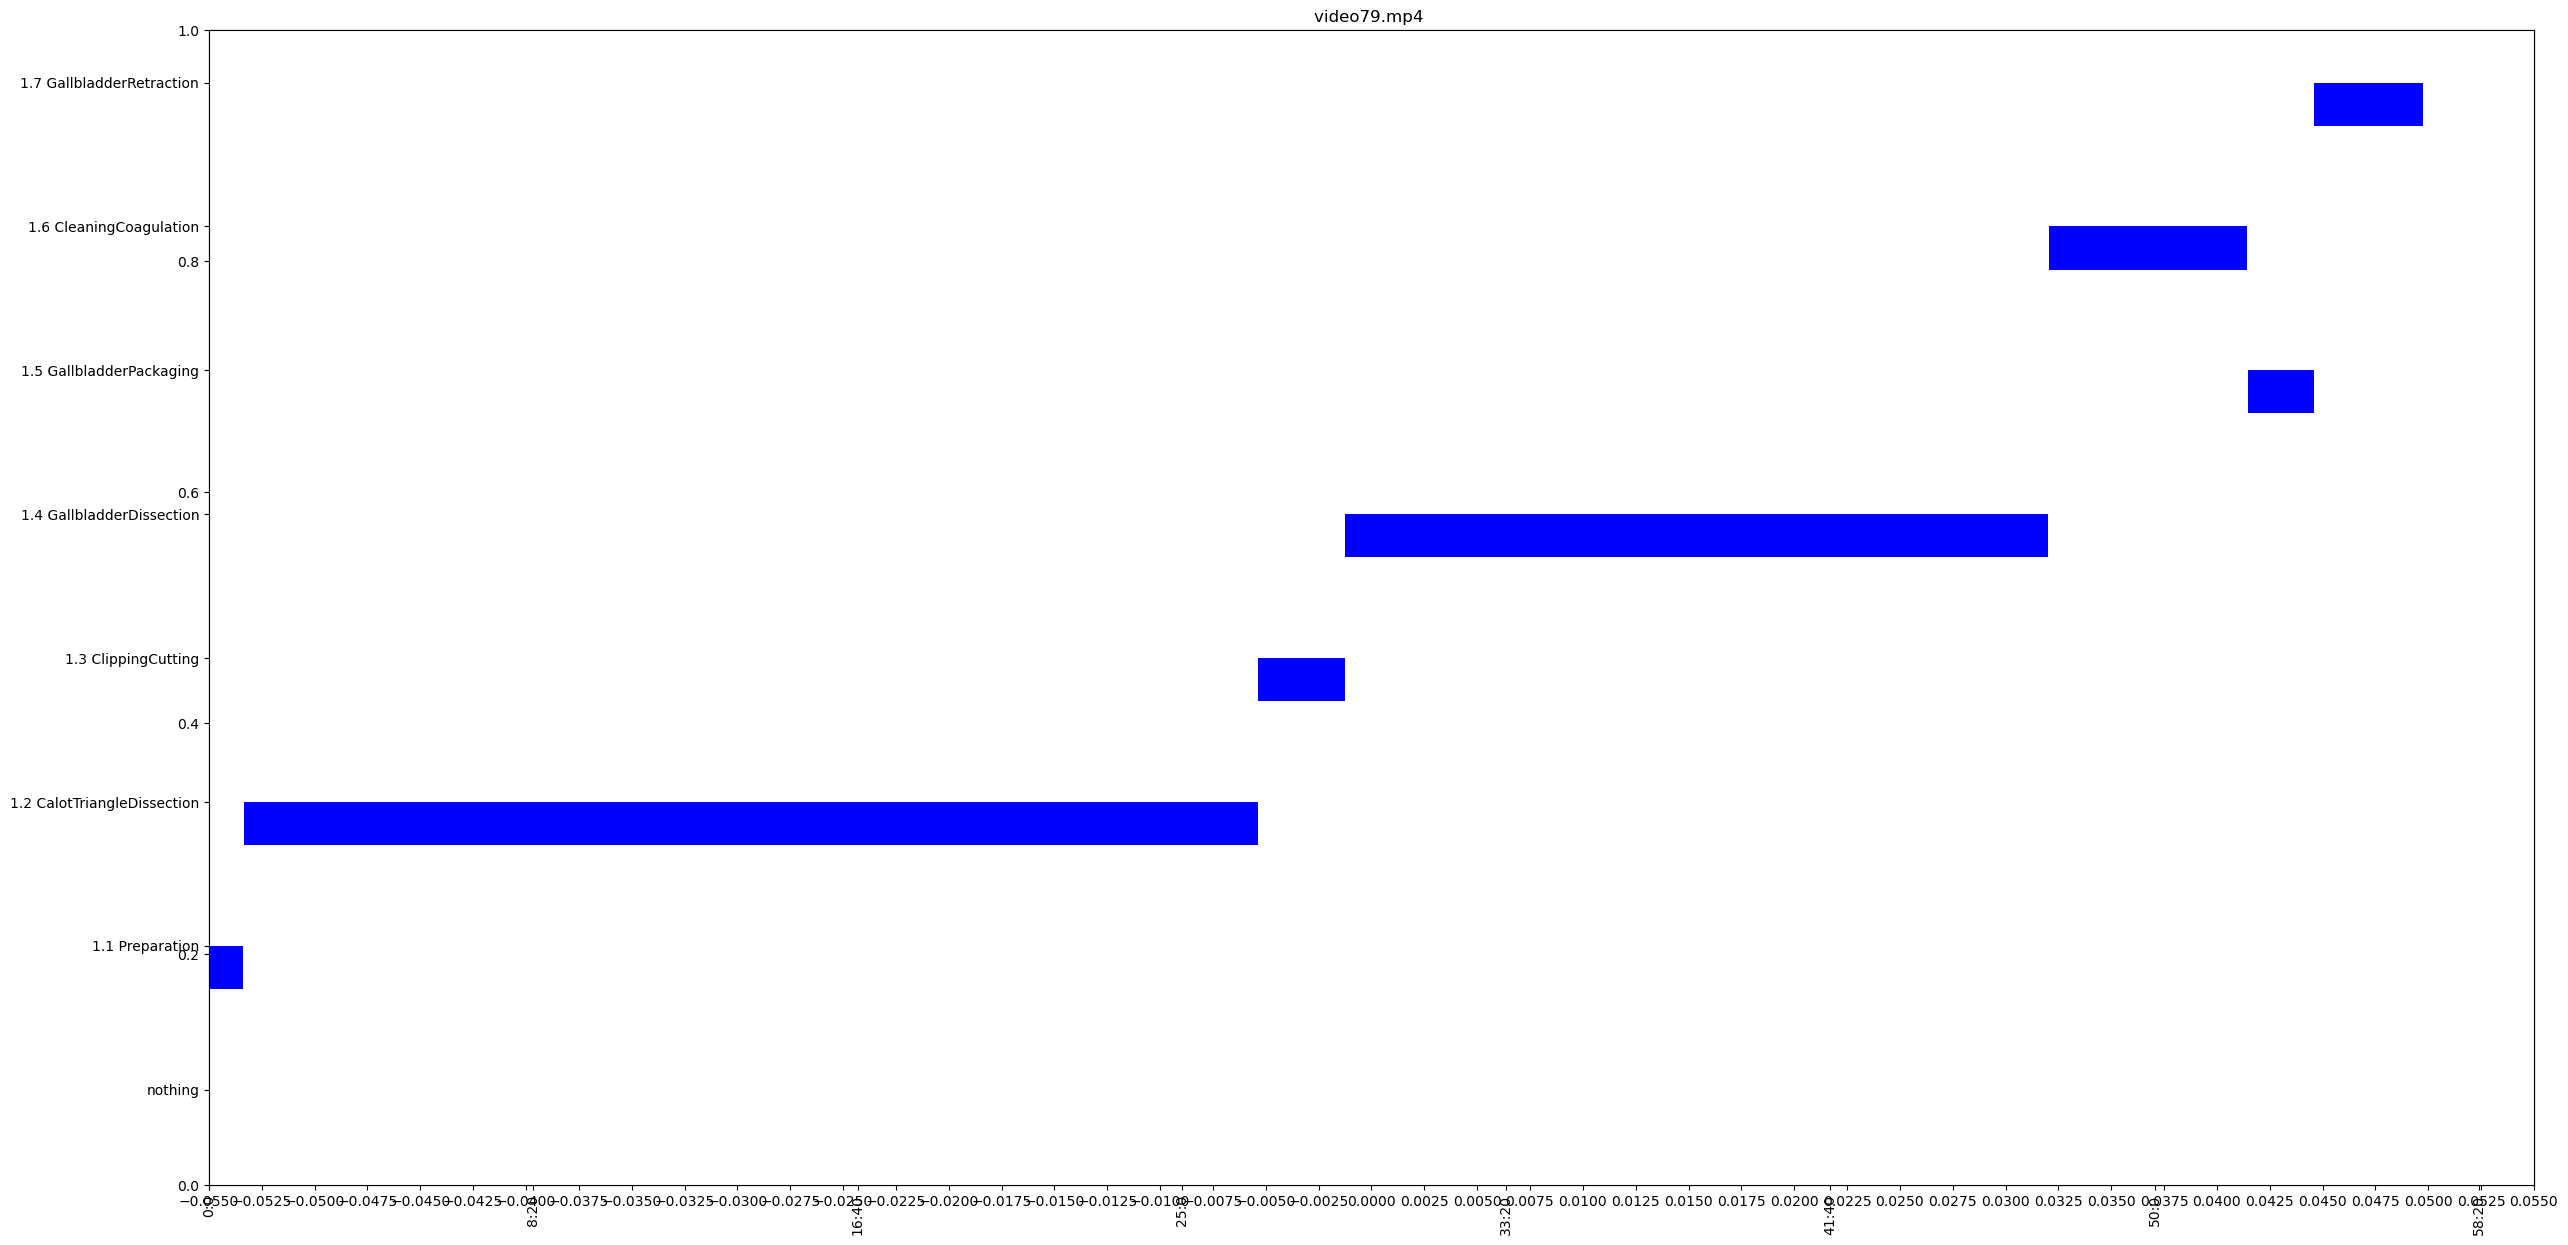

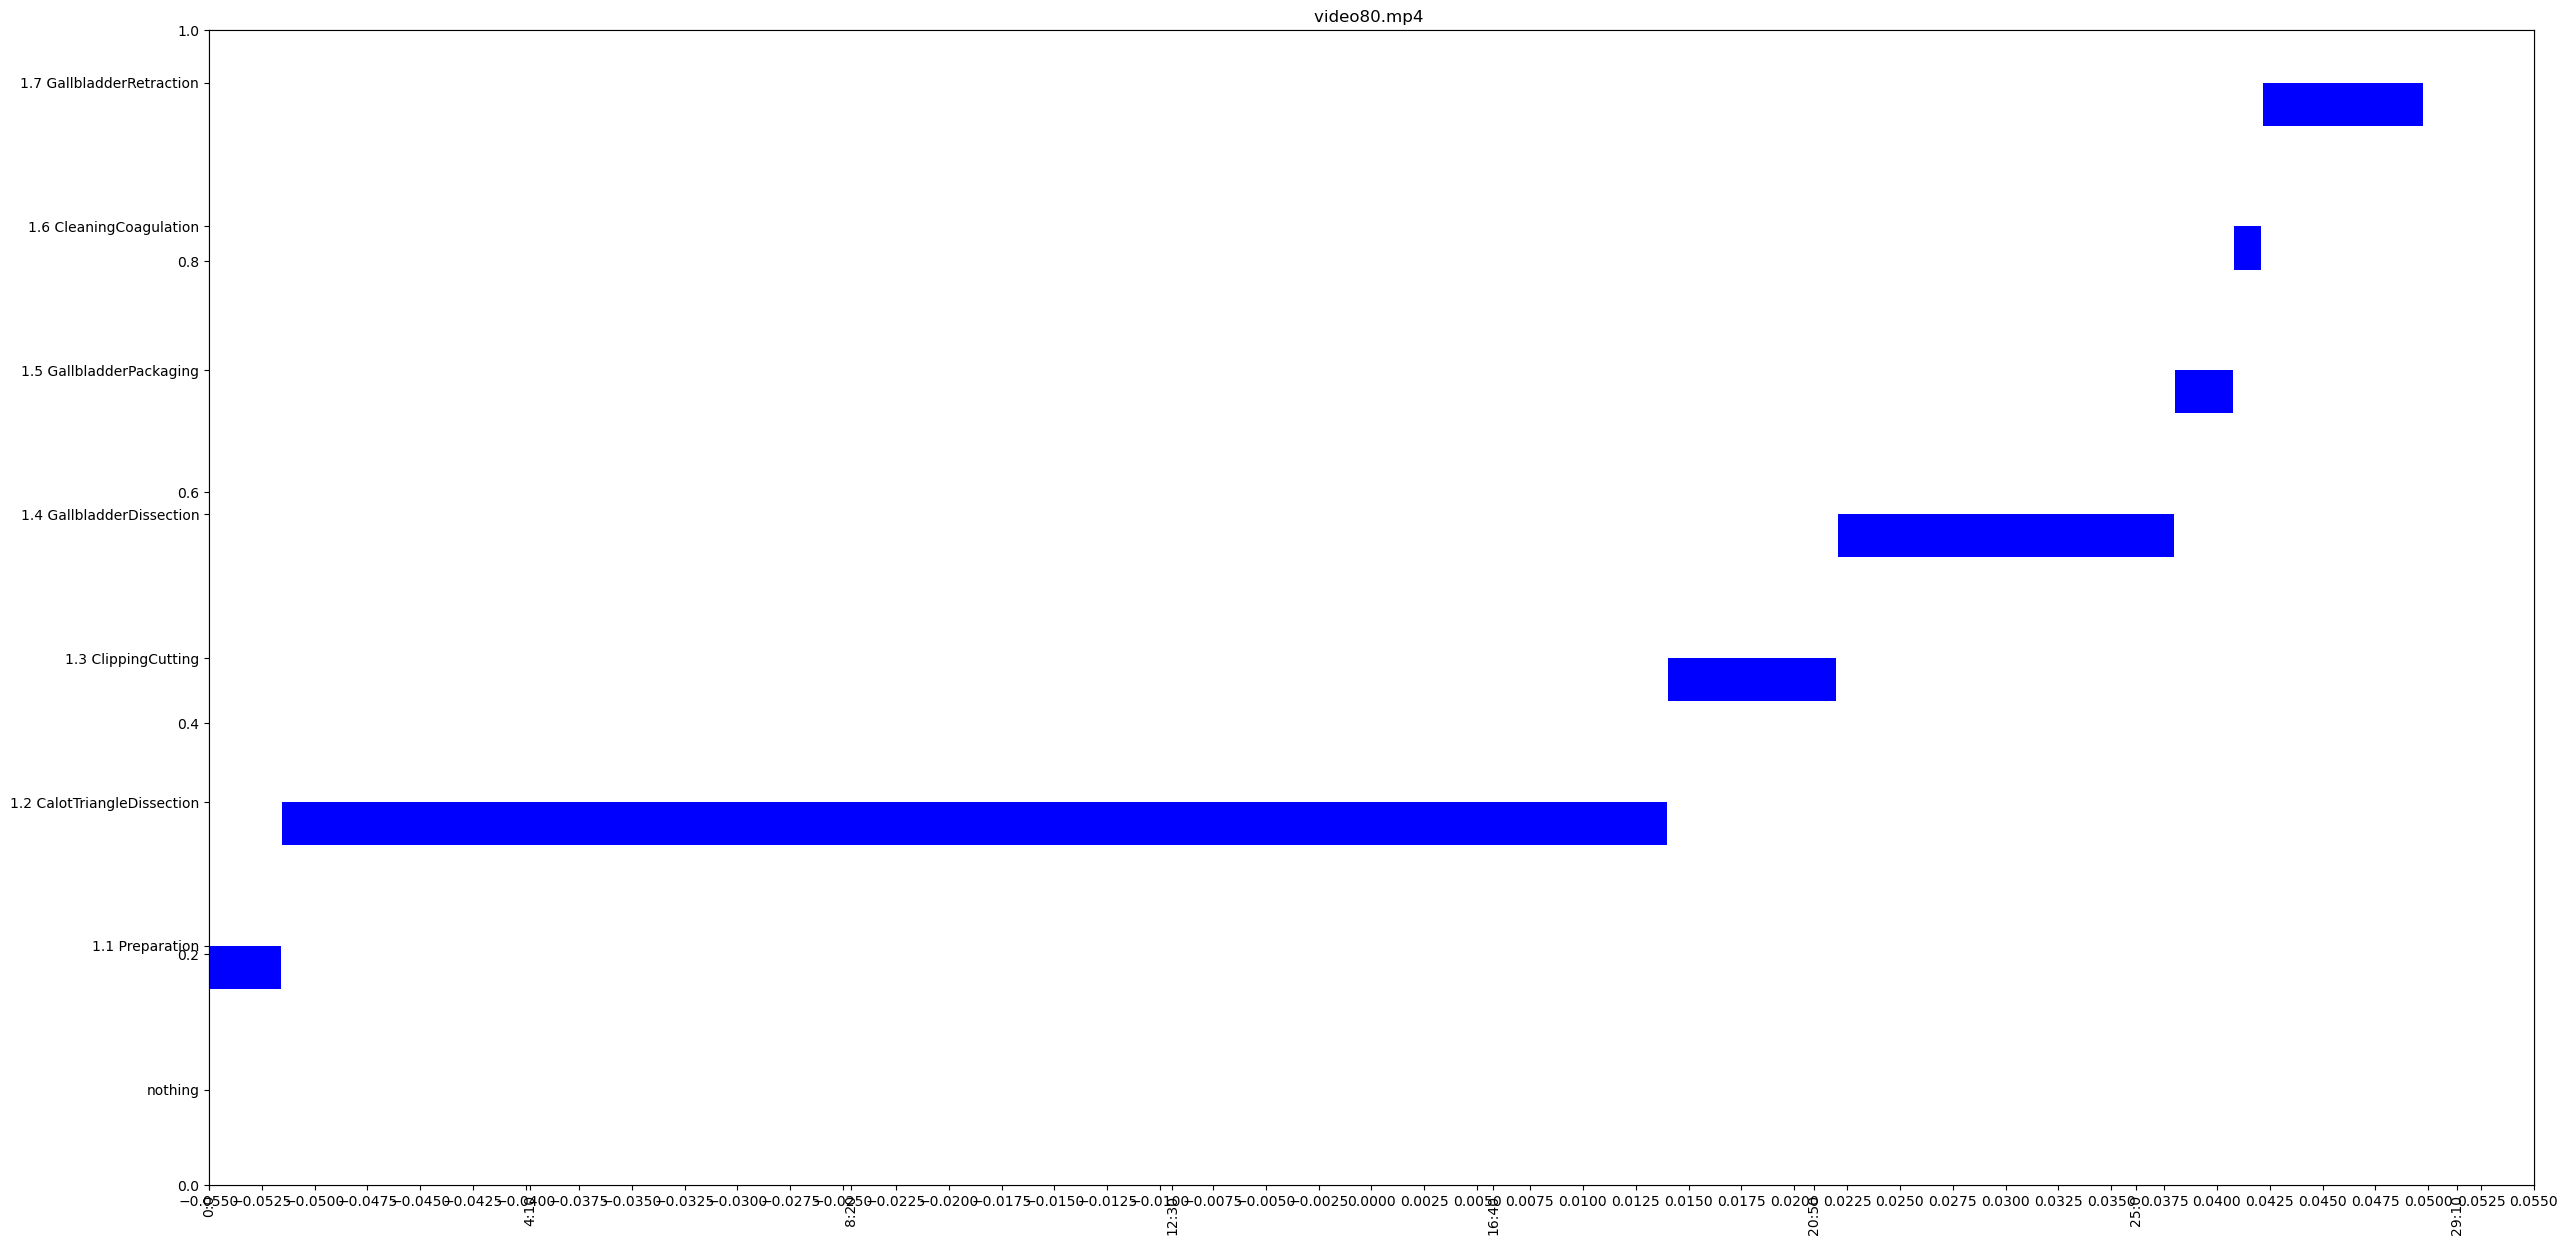

In [3]:
# Plot timeline of steps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import glob

height = 0.3
path = "D:/Research/Cholec80/1 - New Annotations"

file_list = glob.glob(f"{path}/*/GJ.txt")
# file_list = file_list + glob.glob(f'{path}/*/*/*.txt')
print(len(file_list))
videos = []

for file in file_list:
    videos.append(str(file.split("\\")[-2]))

print(len(videos))


def convert_time_to_sec(time):
    if time != "0":
        h, m, s = str(time).split(":")
        return int(h) * 3600 + int(m) * 60 + int(s)
    else:
        return int(0)


def convert_sec_to_time(sec):
    m, s = divmod(sec, 60)
    return f"{int(m)}:{int(s)}"

task_names = [
    task.split("#")[0].split("\n")[0].rstrip()
    for task in open("GJ_steps.txt", "r").readlines()
]
print(task_names)

tasks_dic = dict(zip(task_names, list(range(1, len(task_names) + 1))))
tasks_dic["nothing"] = 0
print(tasks_dic)

for video in videos:
    print(video)
    for t in ["task"]:
        duration = 0
        with open(path + f"/{video}/GJ.txt", "r") as f:
            lines = f.readlines()
            for line in lines:
                try:
                    end = convert_time_to_sec(
                        line.split(" : ")[1].split("(")[1].split(",")[1].split(")")[0]
                    )
                except:
                    print("err", video)
                if end > duration:
                    duration = end

        x = [None] * (duration)
        y = [None] * (len(task_names) + 1)
        for i in list(range(duration)):
            x[i] = convert_sec_to_time(i)
        for key, value in tasks_dic.items():
            y[value] = key.rstrip()
        #
        plt.figure(figsize=(30, 15))
        plt.locator_params(axis="x", nbins=50, tight=True)
        # axes = plt.axes()
        plt.grid(True)
        axes = plt.axes()
        # print(axes.get_xticks())
        # axes.set_xticklabels([2,3,4])
        # axes.set_xticklabels(x)
        #
        with open(path + f"/{video}/GJ.txt", "r") as f:
            lines = f.readlines()
            for line in lines:
                Y = np.arange(len(task_names) + 1)
                X_left = np.zeros(len(task_names) + 1, dtype=int)
                X_diff = np.zeros(len(task_names) + 1, dtype=int)
                task_name = line.split(" : ")[0].rstrip()
                start = convert_time_to_sec(
                    line.split(" : ")[1].split("(")[1].split(",")[0]
                )
                end = convert_time_to_sec(
                    line.split(" : ")[1].split("(")[1].split(",")[1].split(")")[0]
                )
                diff = end - start
                X_left[tasks_dic[task_name]] = start
                X_diff[tasks_dic[task_name]] = diff
                plt.barh(
                    y=Y - height / 2,
                    width=X_diff,
                    left=X_left,
                    height=height,
                    color="blue",
                    label="steps",
                )

        plt.title(f"{video} ")
        ticks = axes.get_xticks()
        x_label = []
        for i in list(range(len(ticks))):
            x_label.append(convert_sec_to_time(ticks[i]))
        plt.xticks(ticks, x_label, rotation="vertical")
        plt.yticks(list(range(len(task_names) + 1)), y)

        # axes.set_xticklabels(x)
        plt.locator_params(axis="x", nbins=100, tight=True)
        # axes.locator_params(axis="x", nbins=50)
        ##plt.locator_params(axis="y", nbins=21)

        # plt.savefig(f"D:/plots_new1/{video}.png")
# plt.show()
